In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleToyCtf-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
plots_dir = "notebooks/output/toyctf_dql/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

In [8]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=20,iteration_count=500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

/mnt/c/Users/cabin/git_repo/CyberSecurity-RL/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/libtorch_1751464468084/work/torch/csrc/utils/tensor_new.cpp:254.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 26|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   22.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:   22.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:   33.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:   44.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:   44.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:   58.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 112|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 1|Iteration 115|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 1|Iteration 118|reward:  108.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 1|Iteration 124|reward:  122.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 1|Iteration 124|reward:  122.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 1|Iteration 129|reward:  122.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 1|Iteration 151|reward:  122.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 1|Iteration 154|reward:  128.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 1|Iteration 154|reward:  128.0|last_reward_at:  154|Elapsed Time: 0:00:02||

Episode 1|Iteration 171|reward:  128.0|last_reward_at:  154|Elapsed Time: 0:00:02||

Episode 1|Iteration 175|reward:  128.0|last_reward_at:  154|Elapsed Time: 0:00:02||

Episode 1|Iteration 180|reward:  128.0|last_reward_at:  154|Elapsed Time: 0:00:02||

Episode 1|Iteration 188|reward:  178.0|last_reward_at:  154|Elapsed Time: 0:00:02||

Episode 1|Iteration 188|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:02||

Episode 1|Iteration 203|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:02||

Episode 1|Iteration 218|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:02||

Episode 1|Iteration 231|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 235|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 238|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 251|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 253|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 258|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 273|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 276|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 281|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 285|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 1|Iteration 291|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 1|Iteration 298|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 1|Iteration 303|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 1|Iteration 310|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 1|Iteration 323|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 1|Iteration 328|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 1|Iteration 337|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 1|Iteration 342|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 344|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 349|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 361|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 367|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 371|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 372|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 380|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:05||

Episode 1|Iteration 380|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 1|Iteration 387|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 1|Iteration 391|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 1|Iteration 392|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 1|Iteration 393|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:06||

Episode 1|Iteration 399|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 1|Iteration 402|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 1|Iteration 403|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 1|Iteration 404|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:07||

Episode 1|Iteration 406|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 1|Iteration 412|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 1|Iteration 414|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 1|Iteration 417|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 1|Iteration 418|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:08||

Episode 1|Iteration 420|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 1|Iteration 422|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 1|Iteration 428|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 1|Iteration 430|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 1|Iteration 437|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 1|Iteration 439|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:09||

Episode 1|Iteration 450|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 1|Iteration 456|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 1|Iteration 459|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 1|Iteration 462|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:10||

Episode 1|Iteration 467|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 1|Iteration 471|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 1|Iteration 473|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 1|Iteration 482|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 1|Iteration 485|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 1|Iteration 486|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:11||

Episode 1|Iteration 487|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:12||

Episode 1|Iteration 491|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:28||

Episode 1|Iteration 492|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:32||

Episode 1|Iteration 493|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:36||

Episode 1|Iteration 494|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:40||

Episode 1|Iteration 495|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:44||

Episode 1|Iteration 496|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:48||

Episode 1|Iteration 497|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:53||

Episode 1|Iteration 498|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:00:58||

Episode 1|Iteration 499|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:01:02||

Episode 1|Iteration 500|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:01:07||

Episode 1|Iteration 500|reward:  178.0|last_reward_at:  188|Elapsed Time: 0:01:07||

  Episode 1 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/36 (0.03)
    explore-remote: 5/213 (0.02)
    explore-connect: 2/173 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/69 (0.01)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 6
  ## Episode: 2/20 'DQL' ϵ=0.8240, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:08||

Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:08||

Episode 2|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:13||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:17||

Episode 2|Iteration 5|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:22||

Episode 2|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:27||

Episode 2|Iteration 7|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:31||

Episode 2|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:36||

Episode 2|Iteration 9|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:41||

Episode 2|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:46||

Episode 2|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:46||

Episode 2|Iteration 11|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:51||

Episode 2|Iteration 12|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:56||

Episode 2|Iteration 13|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:00||

Episode 2|Iteration 14|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:05||

Episode 2|Iteration 15|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:10||

Episode 2|Iteration 16|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:15||

Episode 2|Iteration 17|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:25||

Episode 2|Iteration 18|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:30||

Episode 2|Iteration 19|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:35||

Episode 2|Iteration 20|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:01:39||

Episode 2|Iteration 21|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:01:44||

Episode 2|Iteration 21|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:01:44||

Episode 2|Iteration 22|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:01:49||

Episode 2|Iteration 23|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:01:54||

Episode 2|Iteration 24|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:01:59||

Episode 2|Iteration 25|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:04||

Episode 2|Iteration 26|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:08||

Episode 2|Iteration 27|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:13||

Episode 2|Iteration 28|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:18||

Episode 2|Iteration 29|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:23||

Episode 2|Iteration 30|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:28||

Episode 2|Iteration 31|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:32||

Episode 2|Iteration 32|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:36||

Episode 2|Iteration 33|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:41||

Episode 2|Iteration 34|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:46||

Episode 2|Iteration 35|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:51||

Episode 2|Iteration 36|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:02:56||

Episode 2|Iteration 37|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:01||

Episode 2|Iteration 38|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:06||

Episode 2|Iteration 39|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:11||

Episode 2|Iteration 40|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:16||

Episode 2|Iteration 41|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:21||

Episode 2|Iteration 42|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:26||

Episode 2|Iteration 43|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:31||

Episode 2|Iteration 44|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:36||

Episode 2|Iteration 45|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:41||

Episode 2|Iteration 46|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:46||

Episode 2|Iteration 47|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:51||

Episode 2|Iteration 48|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:03:56||

Episode 2|Iteration 49|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:04:02||

Episode 2|Iteration 50|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:04:07||

Episode 2|Iteration 51|reward:   86.0|last_reward_at:   21|Elapsed Time: 0:04:12||

Episode 2|Iteration 51|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:12||

Episode 2|Iteration 52|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:17||

Episode 2|Iteration 53|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:23||

Episode 2|Iteration 54|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:28||

Episode 2|Iteration 55|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:32||

Episode 2|Iteration 56|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:37||

Episode 2|Iteration 57|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:42||

Episode 2|Iteration 58|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:47||

Episode 2|Iteration 59|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:52||

Episode 2|Iteration 60|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:04:57||

Episode 2|Iteration 61|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:01||

Episode 2|Iteration 62|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:07||

Episode 2|Iteration 63|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:12||

Episode 2|Iteration 64|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:17||

Episode 2|Iteration 65|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:22||

Episode 2|Iteration 66|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:27||

Episode 2|Iteration 67|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:33||

Episode 2|Iteration 68|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:38||

Episode 2|Iteration 69|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:43||

Episode 2|Iteration 70|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:49||

Episode 2|Iteration 71|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:05:55||

Episode 2|Iteration 72|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:00||

Episode 2|Iteration 73|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:06||

Episode 2|Iteration 74|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:11||

Episode 2|Iteration 75|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:16||

Episode 2|Iteration 76|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:21||

Episode 2|Iteration 77|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:27||

Episode 2|Iteration 78|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:31||

Episode 2|Iteration 79|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:36||

Episode 2|Iteration 80|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:41||

Episode 2|Iteration 81|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:46||

Episode 2|Iteration 82|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:52||

Episode 2|Iteration 83|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:06:57||

Episode 2|Iteration 84|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:02||

Episode 2|Iteration 85|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:07||

Episode 2|Iteration 86|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:12||

Episode 2|Iteration 87|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:27||

Episode 2|Iteration 88|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:32||

Episode 2|Iteration 89|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:38||

Episode 2|Iteration 90|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:42||

Episode 2|Iteration 91|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:48||

Episode 2|Iteration 92|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:53||

Episode 2|Iteration 93|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:07:58||

Episode 2|Iteration 94|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:08:04||

Episode 2|Iteration 95|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:08:09||

Episode 2|Iteration 96|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:08:23||

Episode 2|Iteration 97|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:08:38||

Episode 2|Iteration 98|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:08:43||

Episode 2|Iteration 99|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:08:48||

Episode 2|Iteration 100|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:08:53||

Episode 2|Iteration 101|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:09:08||

Episode 2|Iteration 102|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:09:13||

Episode 2|Iteration 103|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:09:27||

Episode 2|Iteration 104|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:09:32||

Episode 2|Iteration 105|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:09:37||

Episode 2|Iteration 106|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:09:42||

Episode 2|Iteration 107|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:09:57||

Episode 2|Iteration 108|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:02||

Episode 2|Iteration 109|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:07||

Episode 2|Iteration 110|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:12||

Episode 2|Iteration 111|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:17||

Episode 2|Iteration 112|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:22||

Episode 2|Iteration 113|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:27||

Episode 2|Iteration 114|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:44||

Episode 2|Iteration 115|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:10:59||

Episode 2|Iteration 116|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:04||

Episode 2|Iteration 117|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:10||

Episode 2|Iteration 118|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:14||

Episode 2|Iteration 119|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:29||

Episode 2|Iteration 120|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:34||

Episode 2|Iteration 121|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:39||

Episode 2|Iteration 122|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:54||

Episode 2|Iteration 123|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:11:58||

Episode 2|Iteration 124|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:03||

Episode 2|Iteration 125|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:20||

Episode 2|Iteration 126|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:25||

Episode 2|Iteration 127|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:29||

Episode 2|Iteration 128|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:34||

Episode 2|Iteration 129|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:39||

Episode 2|Iteration 130|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:44||

Episode 2|Iteration 131|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:50||

Episode 2|Iteration 132|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:55||

Episode 2|Iteration 133|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:12:59||

Episode 2|Iteration 134|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:05||

Episode 2|Iteration 135|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:10||

Episode 2|Iteration 136|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:16||

Episode 2|Iteration 137|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:20||

Episode 2|Iteration 138|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:25||

Episode 2|Iteration 139|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:30||

Episode 2|Iteration 140|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:34||

Episode 2|Iteration 141|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:39||

Episode 2|Iteration 142|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:44||

Episode 2|Iteration 143|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:49||

Episode 2|Iteration 144|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:54||

Episode 2|Iteration 145|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:13:59||

Episode 2|Iteration 146|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:04||

Episode 2|Iteration 147|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:09||

Episode 2|Iteration 148|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:14||

Episode 2|Iteration 149|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:19||

Episode 2|Iteration 150|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:24||

Episode 2|Iteration 151|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:29||

Episode 2|Iteration 152|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:33||

Episode 2|Iteration 153|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:38||

Episode 2|Iteration 154|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:43||

Episode 2|Iteration 155|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:48||

Episode 2|Iteration 156|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:53||

Episode 2|Iteration 157|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:14:58||

Episode 2|Iteration 158|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:02||

Episode 2|Iteration 159|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:06||

Episode 2|Iteration 160|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:11||

Episode 2|Iteration 161|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:17||

Episode 2|Iteration 162|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:22||

Episode 2|Iteration 163|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:27||

Episode 2|Iteration 164|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:32||

Episode 2|Iteration 165|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:36||

Episode 2|Iteration 166|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:41||

Episode 2|Iteration 167|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:46||

Episode 2|Iteration 168|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:51||

Episode 2|Iteration 169|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:15:57||

Episode 2|Iteration 170|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:02||

Episode 2|Iteration 171|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:07||

Episode 2|Iteration 172|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:11||

Episode 2|Iteration 173|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:16||

Episode 2|Iteration 174|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:21||

Episode 2|Iteration 175|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:26||

Episode 2|Iteration 176|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:31||

Episode 2|Iteration 177|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:36||

Episode 2|Iteration 178|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:41||

Episode 2|Iteration 179|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:46||

Episode 2|Iteration 180|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:51||

Episode 2|Iteration 181|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:16:56||

Episode 2|Iteration 182|reward:   86.0|last_reward_at:   51|Elapsed Time: 0:17:01||

Episode 2|Iteration 183|reward:   97.0|last_reward_at:   51|Elapsed Time: 0:17:06||

Episode 2|Iteration 183|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:06||

Episode 2|Iteration 184|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:11||

Episode 2|Iteration 185|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:15||

Episode 2|Iteration 186|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:20||

Episode 2|Iteration 187|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:25||

Episode 2|Iteration 188|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:30||

Episode 2|Iteration 189|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:45||

Episode 2|Iteration 190|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:50||

Episode 2|Iteration 191|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:54||

Episode 2|Iteration 192|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:17:59||

Episode 2|Iteration 193|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:04||

Episode 2|Iteration 194|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:10||

Episode 2|Iteration 195|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:15||

Episode 2|Iteration 196|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:19||

Episode 2|Iteration 197|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:25||

Episode 2|Iteration 198|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:30||

Episode 2|Iteration 199|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:40||

Episode 2|Iteration 200|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:49||

Episode 2|Iteration 201|reward:   97.0|last_reward_at:  183|Elapsed Time: 0:18:54||

Episode 2|Iteration 202|reward:  108.0|last_reward_at:  183|Elapsed Time: 0:18:59||

Episode 2|Iteration 202|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:18:59||

Episode 2|Iteration 203|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:04||

Episode 2|Iteration 204|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:13||

Episode 2|Iteration 205|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:18||

Episode 2|Iteration 206|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:23||

Episode 2|Iteration 207|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:28||

Episode 2|Iteration 208|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:33||

Episode 2|Iteration 209|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:39||

Episode 2|Iteration 210|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:49||

Episode 2|Iteration 211|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:53||

Episode 2|Iteration 212|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:19:58||

Episode 2|Iteration 213|reward:  108.0|last_reward_at:  202|Elapsed Time: 0:20:03||

Episode 2|Iteration 214|reward:  114.0|last_reward_at:  202|Elapsed Time: 0:20:08||

Episode 2|Iteration 214|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:08||

Episode 2|Iteration 215|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:13||

Episode 2|Iteration 216|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:18||

Episode 2|Iteration 217|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:27||

Episode 2|Iteration 218|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:33||

Episode 2|Iteration 219|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:42||

Episode 2|Iteration 220|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:47||

Episode 2|Iteration 221|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:52||

Episode 2|Iteration 222|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:20:57||

Episode 2|Iteration 223|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:21:02||

Episode 2|Iteration 224|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:21:07||

Episode 2|Iteration 225|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:21:12||

Episode 2|Iteration 226|reward:  114.0|last_reward_at:  214|Elapsed Time: 0:21:17||

Episode 2|Iteration 227|reward:  128.0|last_reward_at:  214|Elapsed Time: 0:21:22||

Episode 2|Iteration 227|reward:  128.0|last_reward_at:  227|Elapsed Time: 0:21:22||

Episode 2|Iteration 228|reward:  128.0|last_reward_at:  227|Elapsed Time: 0:21:27||

Episode 2|Iteration 229|reward:  128.0|last_reward_at:  227|Elapsed Time: 0:21:32||

Episode 2|Iteration 230|reward:  128.0|last_reward_at:  227|Elapsed Time: 0:21:37||

Episode 2|Iteration 231|reward:  128.0|last_reward_at:  227|Elapsed Time: 0:21:42||

Episode 2|Iteration 232|reward:  128.0|last_reward_at:  227|Elapsed Time: 0:21:47||

Episode 2|Iteration 233|reward:  128.0|last_reward_at:  227|Elapsed Time: 0:21:52||

Episode 2|Iteration 234|reward:  178.0|last_reward_at:  227|Elapsed Time: 0:21:57||

Episode 2|Iteration 234|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:21:57||

Episode 2|Iteration 235|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:01||

Episode 2|Iteration 236|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:06||

Episode 2|Iteration 237|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:11||

Episode 2|Iteration 238|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:17||

Episode 2|Iteration 239|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:27||

Episode 2|Iteration 240|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:31||

Episode 2|Iteration 241|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:41||

Episode 2|Iteration 242|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:47||

Episode 2|Iteration 243|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:22:51||

Episode 2|Iteration 244|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:01||

Episode 2|Iteration 245|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:06||

Episode 2|Iteration 246|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:11||

Episode 2|Iteration 247|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:16||

Episode 2|Iteration 248|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:21||

Episode 2|Iteration 249|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:26||

Episode 2|Iteration 250|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:31||

Episode 2|Iteration 251|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:35||

Episode 2|Iteration 252|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:40||

Episode 2|Iteration 253|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:45||

Episode 2|Iteration 254|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:50||

Episode 2|Iteration 255|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:23:55||

Episode 2|Iteration 256|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:00||

Episode 2|Iteration 257|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:05||

Episode 2|Iteration 258|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:10||

Episode 2|Iteration 259|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:15||

Episode 2|Iteration 260|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:20||

Episode 2|Iteration 261|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:25||

Episode 2|Iteration 262|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:30||

Episode 2|Iteration 263|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:35||

Episode 2|Iteration 264|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:24:40||

Episode 2|Iteration 265|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:25:00||

Episode 2|Iteration 266|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:25:04||

Episode 2|Iteration 267|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:25:24||

Episode 2|Iteration 268|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:25:29||

Episode 2|Iteration 269|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:25:34||

Episode 2|Iteration 270|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:25:39||

Episode 2|Iteration 271|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:25:58||

Episode 2|Iteration 272|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:03||

Episode 2|Iteration 273|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:07||

Episode 2|Iteration 274|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:12||

Episode 2|Iteration 275|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:17||

Episode 2|Iteration 276|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:23||

Episode 2|Iteration 277|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:27||

Episode 2|Iteration 278|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:32||

Episode 2|Iteration 279|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:37||

Episode 2|Iteration 280|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:42||

Episode 2|Iteration 281|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:47||

Episode 2|Iteration 282|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:52||

Episode 2|Iteration 283|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:26:57||

Episode 2|Iteration 284|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:01||

Episode 2|Iteration 285|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:06||

Episode 2|Iteration 286|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:11||

Episode 2|Iteration 287|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:16||

Episode 2|Iteration 288|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:21||

Episode 2|Iteration 289|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:40||

Episode 2|Iteration 290|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:45||

Episode 2|Iteration 291|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:51||

Episode 2|Iteration 292|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:27:56||

Episode 2|Iteration 293|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:16||

Episode 2|Iteration 294|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:21||

Episode 2|Iteration 295|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:26||

Episode 2|Iteration 296|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:31||

Episode 2|Iteration 297|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:35||

Episode 2|Iteration 298|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:40||

Episode 2|Iteration 299|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:45||

Episode 2|Iteration 300|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:50||

Episode 2|Iteration 301|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:28:56||

Episode 2|Iteration 302|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:16||

Episode 2|Iteration 303|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:21||

Episode 2|Iteration 304|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:26||

Episode 2|Iteration 305|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:31||

Episode 2|Iteration 306|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:36||

Episode 2|Iteration 307|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:41||

Episode 2|Iteration 308|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:46||

Episode 2|Iteration 309|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:29:51||

Episode 2|Iteration 310|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:09||

Episode 2|Iteration 311|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:14||

Episode 2|Iteration 312|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:19||

Episode 2|Iteration 313|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:25||

Episode 2|Iteration 314|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:30||

Episode 2|Iteration 315|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:35||

Episode 2|Iteration 316|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:39||

Episode 2|Iteration 317|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:44||

Episode 2|Iteration 318|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:48||

Episode 2|Iteration 319|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:54||

Episode 2|Iteration 320|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:30:59||

Episode 2|Iteration 321|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:04||

Episode 2|Iteration 322|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:08||

Episode 2|Iteration 323|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:13||

Episode 2|Iteration 324|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:18||

Episode 2|Iteration 325|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:23||

Episode 2|Iteration 326|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:42||

Episode 2|Iteration 327|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:47||

Episode 2|Iteration 328|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:52||

Episode 2|Iteration 329|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:57||

Episode 2|Iteration 330|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:31:57||

Episode 2|Iteration 330|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:02||

Episode 2|Iteration 331|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:06||

Episode 2|Iteration 332|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:12||

Episode 2|Iteration 333|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:16||

Episode 2|Iteration 334|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:20||

Episode 2|Iteration 335|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:25||

Episode 2|Iteration 336|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:30||

Episode 2|Iteration 337|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:35||

Episode 2|Iteration 338|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:40||

Episode 2|Iteration 339|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:45||

Episode 2|Iteration 340|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:49||

Episode 2|Iteration 341|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:54||

Episode 2|Iteration 342|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:32:59||

Episode 2|Iteration 343|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:04||

Episode 2|Iteration 344|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:09||

Episode 2|Iteration 345|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:14||

Episode 2|Iteration 346|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:33||

Episode 2|Iteration 347|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:38||

Episode 2|Iteration 348|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:43||

Episode 2|Iteration 349|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:48||

Episode 2|Iteration 350|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:52||

Episode 2|Iteration 351|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:33:57||

Episode 2|Iteration 352|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:02||

Episode 2|Iteration 353|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:07||

Episode 2|Iteration 354|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:12||

Episode 2|Iteration 355|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:17||

Episode 2|Iteration 356|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:21||

Episode 2|Iteration 357|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:41||

Episode 2|Iteration 358|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:45||

Episode 2|Iteration 359|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:51||

Episode 2|Iteration 360|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:34:55||

Episode 2|Iteration 361|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:00||

Episode 2|Iteration 362|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:05||

Episode 2|Iteration 363|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:11||

Episode 2|Iteration 364|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:16||

Episode 2|Iteration 365|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:21||

Episode 2|Iteration 366|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:26||

Episode 2|Iteration 367|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:30||

Episode 2|Iteration 368|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:35||

Episode 2|Iteration 369|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:40||

Episode 2|Iteration 370|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:45||

Episode 2|Iteration 371|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:51||

Episode 2|Iteration 372|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:35:55||

Episode 2|Iteration 373|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:00||

Episode 2|Iteration 374|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:05||

Episode 2|Iteration 375|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:09||

Episode 2|Iteration 376|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:14||

Episode 2|Iteration 377|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:19||

Episode 2|Iteration 378|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:24||

Episode 2|Iteration 379|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:29||

Episode 2|Iteration 380|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:34||

Episode 2|Iteration 381|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:53||

Episode 2|Iteration 382|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:36:58||

Episode 2|Iteration 383|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:02||

Episode 2|Iteration 384|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:07||

Episode 2|Iteration 385|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:13||

Episode 2|Iteration 386|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:18||

Episode 2|Iteration 387|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:23||

Episode 2|Iteration 388|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:28||

Episode 2|Iteration 389|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:33||

Episode 2|Iteration 390|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:38||

Episode 2|Iteration 391|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:43||

Episode 2|Iteration 392|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:48||

Episode 2|Iteration 393|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:54||

Episode 2|Iteration 394|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:37:58||

Episode 2|Iteration 395|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:03||

Episode 2|Iteration 396|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:08||

Episode 2|Iteration 397|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:13||

Episode 2|Iteration 398|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:18||

Episode 2|Iteration 399|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:23||

Episode 2|Iteration 400|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:28||

Episode 2|Iteration 401|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:33||

Episode 2|Iteration 402|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:38||

Episode 2|Iteration 403|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:43||

Episode 2|Iteration 404|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:48||

Episode 2|Iteration 405|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:53||

Episode 2|Iteration 406|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:38:58||

Episode 2|Iteration 407|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:39:03||

Episode 2|Iteration 408|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:39:07||

Episode 2|Iteration 409|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:39:27||

Episode 2|Iteration 410|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:39:46||

Episode 2|Iteration 411|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:39:51||

Episode 2|Iteration 412|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:39:56||

Episode 2|Iteration 413|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:01||

Episode 2|Iteration 414|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:06||

Episode 2|Iteration 415|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:11||

Episode 2|Iteration 416|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:17||

Episode 2|Iteration 417|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:22||

Episode 2|Iteration 418|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:26||

Episode 2|Iteration 419|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:31||

Episode 2|Iteration 420|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:37||

Episode 2|Iteration 421|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:42||

Episode 2|Iteration 422|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:47||

Episode 2|Iteration 423|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:52||

Episode 2|Iteration 424|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:40:56||

Episode 2|Iteration 425|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:01||

Episode 2|Iteration 426|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:07||

Episode 2|Iteration 427|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:12||

Episode 2|Iteration 428|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:17||

Episode 2|Iteration 429|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:36||

Episode 2|Iteration 430|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:41||

Episode 2|Iteration 431|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:46||

Episode 2|Iteration 432|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:51||

Episode 2|Iteration 433|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:41:56||

Episode 2|Iteration 434|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:42:00||

Episode 2|Iteration 435|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:42:20||

Episode 2|Iteration 436|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:42:25||

Episode 2|Iteration 437|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:42:31||

Episode 2|Iteration 438|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:42:50||

Episode 2|Iteration 439|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:42:55||

Episode 2|Iteration 440|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:01||

Episode 2|Iteration 441|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:05||

Episode 2|Iteration 442|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:10||

Episode 2|Iteration 443|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:15||

Episode 2|Iteration 444|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:19||

Episode 2|Iteration 445|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:24||

Episode 2|Iteration 446|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:29||

Episode 2|Iteration 447|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:34||

Episode 2|Iteration 448|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:39||

Episode 2|Iteration 449|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:43||

Episode 2|Iteration 450|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:48||

Episode 2|Iteration 451|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:53||

Episode 2|Iteration 452|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:43:58||

Episode 2|Iteration 453|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:03||

Episode 2|Iteration 454|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:22||

Episode 2|Iteration 455|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:28||

Episode 2|Iteration 456|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:33||

Episode 2|Iteration 457|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:38||

Episode 2|Iteration 458|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:42||

Episode 2|Iteration 459|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:47||

Episode 2|Iteration 460|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:52||

Episode 2|Iteration 461|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:44:57||

Episode 2|Iteration 462|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:02||

Episode 2|Iteration 463|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:08||

Episode 2|Iteration 464|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:12||

Episode 2|Iteration 465|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:17||

Episode 2|Iteration 466|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:22||

Episode 2|Iteration 467|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:27||

Episode 2|Iteration 468|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:32||

Episode 2|Iteration 469|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:37||

Episode 2|Iteration 470|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:42||

Episode 2|Iteration 471|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:46||

Episode 2|Iteration 472|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:51||

Episode 2|Iteration 473|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:45:56||

Episode 2|Iteration 474|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:01||

Episode 2|Iteration 475|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:05||

Episode 2|Iteration 476|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:10||

Episode 2|Iteration 477|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:15||

Episode 2|Iteration 478|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:34||

Episode 2|Iteration 479|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:40||

Episode 2|Iteration 480|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:45||

Episode 2|Iteration 481|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:50||

Episode 2|Iteration 482|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:46:55||

Episode 2|Iteration 483|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:00||

Episode 2|Iteration 484|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:04||

Episode 2|Iteration 485|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:09||

Episode 2|Iteration 486|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:15||

Episode 2|Iteration 487|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:20||

Episode 2|Iteration 488|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:25||

Episode 2|Iteration 489|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:30||

Episode 2|Iteration 490|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:34||

Episode 2|Iteration 491|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:39||

Episode 2|Iteration 492|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:44||

Episode 2|Iteration 493|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:49||

Episode 2|Iteration 494|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:54||

Episode 2|Iteration 495|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:47:59||

Episode 2|Iteration 496|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:48:18||

Episode 2|Iteration 497|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:48:23||

Episode 2|Iteration 498|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:48:28||

Episode 2|Iteration 499|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:48:33||

Episode 2|Iteration 500|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:48:37||

Episode 2|Iteration 500|reward:  178.0|last_reward_at:  234|Elapsed Time: 0:48:37||

  Episode 2 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 5/194 (0.03)
    explore-connect: 1/193 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/77 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 32
  ## Episode: 3/20 'DQL' ϵ=0.7551, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 3|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 3|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 3|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:15||

Episode 3|Iteration 4|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:20||

Episode 3|Iteration 5|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:25||

Episode 3|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:30||

Episode 3|Iteration 7|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:35||

Episode 3|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:40||

Episode 3|Iteration 9|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:45||

Episode 3|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:50||

Episode 3|Iteration 11|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:55||

Episode 3|Iteration 12|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:01:00||

Episode 3|Iteration 13|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:01:04||

Episode 3|Iteration 14|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:01:09||

Episode 3|Iteration 15|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:01:14||

Episode 3|Iteration 16|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:18||

Episode 3|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:01:18||

Episode 3|Iteration 17|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:01:23||

Episode 3|Iteration 18|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:01:28||

Episode 3|Iteration 19|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:01:32||

Episode 3|Iteration 20|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:01:38||

Episode 3|Iteration 21|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:01:43||

Episode 3|Iteration 22|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:01:48||

Episode 3|Iteration 22|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:01:48||

Episode 3|Iteration 23|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:01:53||

Episode 3|Iteration 24|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:01:58||

Episode 3|Iteration 25|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:03||

Episode 3|Iteration 26|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:07||

Episode 3|Iteration 27|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:12||

Episode 3|Iteration 28|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:17||

Episode 3|Iteration 29|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:22||

Episode 3|Iteration 30|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:27||

Episode 3|Iteration 31|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:32||

Episode 3|Iteration 32|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:36||

Episode 3|Iteration 33|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:41||

Episode 3|Iteration 34|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:46||

Episode 3|Iteration 35|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:51||

Episode 3|Iteration 36|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:02:56||

Episode 3|Iteration 37|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:01||

Episode 3|Iteration 38|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:06||

Episode 3|Iteration 39|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:10||

Episode 3|Iteration 40|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:15||

Episode 3|Iteration 41|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:20||

Episode 3|Iteration 42|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:25||

Episode 3|Iteration 43|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:30||

Episode 3|Iteration 44|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:34||

Episode 3|Iteration 45|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:39||

Episode 3|Iteration 46|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:43||

Episode 3|Iteration 47|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:48||

Episode 3|Iteration 48|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:53||

Episode 3|Iteration 49|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:03:58||

Episode 3|Iteration 50|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:03||

Episode 3|Iteration 51|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:08||

Episode 3|Iteration 52|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:13||

Episode 3|Iteration 53|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:18||

Episode 3|Iteration 54|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:23||

Episode 3|Iteration 55|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:28||

Episode 3|Iteration 56|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:33||

Episode 3|Iteration 57|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:38||

Episode 3|Iteration 58|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:04:42||

Episode 3|Iteration 59|reward:   86.0|last_reward_at:   22|Elapsed Time: 0:04:47||

Episode 3|Iteration 59|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:04:47||

Episode 3|Iteration 60|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:04:53||

Episode 3|Iteration 61|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:02||

Episode 3|Iteration 62|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:07||

Episode 3|Iteration 63|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:12||

Episode 3|Iteration 64|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:17||

Episode 3|Iteration 65|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:22||

Episode 3|Iteration 66|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:27||

Episode 3|Iteration 67|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:31||

Episode 3|Iteration 68|reward:   86.0|last_reward_at:   59|Elapsed Time: 0:05:36||

Episode 3|Iteration 69|reward:   97.0|last_reward_at:   59|Elapsed Time: 0:05:41||

Episode 3|Iteration 69|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:05:41||

Episode 3|Iteration 70|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:05:46||

Episode 3|Iteration 71|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:05:51||

Episode 3|Iteration 72|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:05:57||

Episode 3|Iteration 73|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:06:01||

Episode 3|Iteration 74|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:06:05||

Episode 3|Iteration 75|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:06:10||

Episode 3|Iteration 76|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:06:15||

Episode 3|Iteration 77|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:06:20||

Episode 3|Iteration 78|reward:   97.0|last_reward_at:   69|Elapsed Time: 0:06:25||

Episode 3|Iteration 79|reward:  108.0|last_reward_at:   69|Elapsed Time: 0:06:30||

Episode 3|Iteration 79|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:06:30||

Episode 3|Iteration 80|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:06:34||

Episode 3|Iteration 81|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:06:39||

Episode 3|Iteration 82|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:06:44||

Episode 3|Iteration 83|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:06:49||

Episode 3|Iteration 84|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:06:54||

Episode 3|Iteration 85|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:06:59||

Episode 3|Iteration 86|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:04||

Episode 3|Iteration 87|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:09||

Episode 3|Iteration 88|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:14||

Episode 3|Iteration 89|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:19||

Episode 3|Iteration 90|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:24||

Episode 3|Iteration 91|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:29||

Episode 3|Iteration 92|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:34||

Episode 3|Iteration 93|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:38||

Episode 3|Iteration 94|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:43||

Episode 3|Iteration 95|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:48||

Episode 3|Iteration 96|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:53||

Episode 3|Iteration 97|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:07:58||

Episode 3|Iteration 98|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:03||

Episode 3|Iteration 99|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:08||

Episode 3|Iteration 100|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:13||

Episode 3|Iteration 101|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:18||

Episode 3|Iteration 102|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:23||

Episode 3|Iteration 103|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:28||

Episode 3|Iteration 104|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:33||

Episode 3|Iteration 105|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:38||

Episode 3|Iteration 106|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:42||

Episode 3|Iteration 107|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:47||

Episode 3|Iteration 108|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:52||

Episode 3|Iteration 109|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:08:57||

Episode 3|Iteration 110|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:02||

Episode 3|Iteration 111|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:07||

Episode 3|Iteration 112|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:12||

Episode 3|Iteration 113|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:16||

Episode 3|Iteration 114|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:21||

Episode 3|Iteration 115|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:26||

Episode 3|Iteration 116|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:32||

Episode 3|Iteration 117|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:37||

Episode 3|Iteration 118|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:41||

Episode 3|Iteration 119|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:46||

Episode 3|Iteration 120|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:09:50||

Episode 3|Iteration 121|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:06||

Episode 3|Iteration 122|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:11||

Episode 3|Iteration 123|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:16||

Episode 3|Iteration 124|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:20||

Episode 3|Iteration 125|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:25||

Episode 3|Iteration 126|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:30||

Episode 3|Iteration 127|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:35||

Episode 3|Iteration 128|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:40||

Episode 3|Iteration 129|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:46||

Episode 3|Iteration 130|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:50||

Episode 3|Iteration 131|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:10:55||

Episode 3|Iteration 132|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:00||

Episode 3|Iteration 133|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:06||

Episode 3|Iteration 134|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:10||

Episode 3|Iteration 135|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:15||

Episode 3|Iteration 136|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:20||

Episode 3|Iteration 137|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:25||

Episode 3|Iteration 138|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:30||

Episode 3|Iteration 139|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:35||

Episode 3|Iteration 140|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:40||

Episode 3|Iteration 141|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:45||

Episode 3|Iteration 142|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:50||

Episode 3|Iteration 143|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:11:55||

Episode 3|Iteration 144|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:12:00||

Episode 3|Iteration 145|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:12:15||

Episode 3|Iteration 146|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:12:20||

Episode 3|Iteration 147|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:12:35||

Episode 3|Iteration 148|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:12:49||

Episode 3|Iteration 149|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:12:54||

Episode 3|Iteration 150|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:12:58||

Episode 3|Iteration 151|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:04||

Episode 3|Iteration 152|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:09||

Episode 3|Iteration 153|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:13||

Episode 3|Iteration 154|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:19||

Episode 3|Iteration 155|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:23||

Episode 3|Iteration 156|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:28||

Episode 3|Iteration 157|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:33||

Episode 3|Iteration 158|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:38||

Episode 3|Iteration 159|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:43||

Episode 3|Iteration 160|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:48||

Episode 3|Iteration 161|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:53||

Episode 3|Iteration 162|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:13:58||

Episode 3|Iteration 163|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:03||

Episode 3|Iteration 164|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:07||

Episode 3|Iteration 165|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:12||

Episode 3|Iteration 166|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:17||

Episode 3|Iteration 167|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:22||

Episode 3|Iteration 168|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:27||

Episode 3|Iteration 169|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:32||

Episode 3|Iteration 170|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:37||

Episode 3|Iteration 171|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:42||

Episode 3|Iteration 172|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:47||

Episode 3|Iteration 173|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:51||

Episode 3|Iteration 174|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:14:56||

Episode 3|Iteration 175|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:01||

Episode 3|Iteration 176|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:05||

Episode 3|Iteration 177|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:10||

Episode 3|Iteration 178|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:15||

Episode 3|Iteration 179|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:20||

Episode 3|Iteration 180|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:25||

Episode 3|Iteration 181|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:30||

Episode 3|Iteration 182|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:35||

Episode 3|Iteration 183|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:40||

Episode 3|Iteration 184|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:44||

Episode 3|Iteration 185|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:49||

Episode 3|Iteration 186|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:54||

Episode 3|Iteration 187|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:15:59||

Episode 3|Iteration 188|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:04||

Episode 3|Iteration 189|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:09||

Episode 3|Iteration 190|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:14||

Episode 3|Iteration 191|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:18||

Episode 3|Iteration 192|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:23||

Episode 3|Iteration 193|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:29||

Episode 3|Iteration 194|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:33||

Episode 3|Iteration 195|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:38||

Episode 3|Iteration 196|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:43||

Episode 3|Iteration 197|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:48||

Episode 3|Iteration 198|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:53||

Episode 3|Iteration 199|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:16:58||

Episode 3|Iteration 200|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:03||

Episode 3|Iteration 201|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:07||

Episode 3|Iteration 202|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:12||

Episode 3|Iteration 203|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:17||

Episode 3|Iteration 204|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:22||

Episode 3|Iteration 205|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:27||

Episode 3|Iteration 206|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:32||

Episode 3|Iteration 207|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:37||

Episode 3|Iteration 208|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:41||

Episode 3|Iteration 209|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:46||

Episode 3|Iteration 210|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:51||

Episode 3|Iteration 211|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:17:56||

Episode 3|Iteration 212|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:02||

Episode 3|Iteration 213|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:06||

Episode 3|Iteration 214|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:11||

Episode 3|Iteration 215|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:16||

Episode 3|Iteration 216|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:21||

Episode 3|Iteration 217|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:26||

Episode 3|Iteration 218|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:31||

Episode 3|Iteration 219|reward:  108.0|last_reward_at:   79|Elapsed Time: 0:18:36||

Episode 3|Iteration 220|reward:  122.0|last_reward_at:   79|Elapsed Time: 0:18:41||

Episode 3|Iteration 220|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:18:41||

Episode 3|Iteration 221|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:18:45||

Episode 3|Iteration 222|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:18:50||

Episode 3|Iteration 223|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:18:56||

Episode 3|Iteration 224|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:01||

Episode 3|Iteration 225|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:06||

Episode 3|Iteration 226|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:11||

Episode 3|Iteration 227|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:16||

Episode 3|Iteration 228|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:20||

Episode 3|Iteration 229|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:25||

Episode 3|Iteration 230|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:30||

Episode 3|Iteration 231|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:35||

Episode 3|Iteration 232|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:40||

Episode 3|Iteration 233|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:45||

Episode 3|Iteration 234|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:49||

Episode 3|Iteration 235|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:19:55||

Episode 3|Iteration 236|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:20:00||

Episode 3|Iteration 237|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:20:04||

Episode 3|Iteration 238|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:20:10||

Episode 3|Iteration 239|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:20:15||

Episode 3|Iteration 240|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:20:20||

Episode 3|Iteration 241|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:20:24||

Episode 3|Iteration 242|reward:  122.0|last_reward_at:  220|Elapsed Time: 0:20:29||

Episode 3|Iteration 243|reward:  131.0|last_reward_at:  220|Elapsed Time: 0:20:34||

Episode 3|Iteration 243|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:20:34||

Episode 3|Iteration 244|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:20:39||

Episode 3|Iteration 245|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:20:44||

Episode 3|Iteration 246|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:20:49||

Episode 3|Iteration 247|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:20:53||

Episode 3|Iteration 248|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:20:59||

Episode 3|Iteration 249|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:04||

Episode 3|Iteration 250|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:09||

Episode 3|Iteration 251|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:14||

Episode 3|Iteration 252|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:18||

Episode 3|Iteration 253|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:24||

Episode 3|Iteration 254|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:28||

Episode 3|Iteration 255|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:32||

Episode 3|Iteration 256|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:38||

Episode 3|Iteration 257|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:43||

Episode 3|Iteration 258|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:47||

Episode 3|Iteration 259|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:52||

Episode 3|Iteration 260|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:21:57||

Episode 3|Iteration 261|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:01||

Episode 3|Iteration 262|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:07||

Episode 3|Iteration 263|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:11||

Episode 3|Iteration 264|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:16||

Episode 3|Iteration 265|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:21||

Episode 3|Iteration 266|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:27||

Episode 3|Iteration 267|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:32||

Episode 3|Iteration 268|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:36||

Episode 3|Iteration 269|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:41||

Episode 3|Iteration 270|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:46||

Episode 3|Iteration 271|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:51||

Episode 3|Iteration 272|reward:  131.0|last_reward_at:  243|Elapsed Time: 0:22:56||

Episode 3|Iteration 273|reward:  181.0|last_reward_at:  243|Elapsed Time: 0:23:00||

Episode 3|Iteration 273|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:00||

Episode 3|Iteration 274|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:05||

Episode 3|Iteration 275|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:11||

Episode 3|Iteration 276|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:16||

Episode 3|Iteration 277|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:20||

Episode 3|Iteration 278|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:25||

Episode 3|Iteration 279|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:30||

Episode 3|Iteration 280|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:36||

Episode 3|Iteration 281|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:40||

Episode 3|Iteration 282|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:45||

Episode 3|Iteration 283|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:49||

Episode 3|Iteration 284|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:54||

Episode 3|Iteration 285|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:23:59||

Episode 3|Iteration 286|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:09||

Episode 3|Iteration 287|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:15||

Episode 3|Iteration 288|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:19||

Episode 3|Iteration 289|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:24||

Episode 3|Iteration 290|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:29||

Episode 3|Iteration 291|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:34||

Episode 3|Iteration 292|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:39||

Episode 3|Iteration 293|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:44||

Episode 3|Iteration 294|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:49||

Episode 3|Iteration 295|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:53||

Episode 3|Iteration 296|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:24:58||

Episode 3|Iteration 297|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:04||

Episode 3|Iteration 298|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:08||

Episode 3|Iteration 299|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:13||

Episode 3|Iteration 300|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:18||

Episode 3|Iteration 301|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:22||

Episode 3|Iteration 302|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:28||

Episode 3|Iteration 303|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:33||

Episode 3|Iteration 304|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:38||

Episode 3|Iteration 305|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:43||

Episode 3|Iteration 306|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:48||

Episode 3|Iteration 307|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:53||

Episode 3|Iteration 308|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:25:58||

Episode 3|Iteration 309|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:03||

Episode 3|Iteration 310|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:08||

Episode 3|Iteration 311|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:13||

Episode 3|Iteration 312|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:18||

Episode 3|Iteration 313|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:23||

Episode 3|Iteration 314|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:27||

Episode 3|Iteration 315|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:33||

Episode 3|Iteration 316|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:38||

Episode 3|Iteration 317|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:42||

Episode 3|Iteration 318|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:47||

Episode 3|Iteration 319|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:52||

Episode 3|Iteration 320|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:26:57||

Episode 3|Iteration 321|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:02||

Episode 3|Iteration 322|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:07||

Episode 3|Iteration 323|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:13||

Episode 3|Iteration 324|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:17||

Episode 3|Iteration 325|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:22||

Episode 3|Iteration 326|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:28||

Episode 3|Iteration 327|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:32||

Episode 3|Iteration 328|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:37||

Episode 3|Iteration 329|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:42||

Episode 3|Iteration 330|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:48||

Episode 3|Iteration 331|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:53||

Episode 3|Iteration 332|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:27:58||

Episode 3|Iteration 333|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:02||

Episode 3|Iteration 334|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:07||

Episode 3|Iteration 335|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:12||

Episode 3|Iteration 336|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:17||

Episode 3|Iteration 337|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:22||

Episode 3|Iteration 338|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:27||

Episode 3|Iteration 339|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:32||

Episode 3|Iteration 340|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:36||

Episode 3|Iteration 341|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:41||

Episode 3|Iteration 342|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:46||

Episode 3|Iteration 343|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:51||

Episode 3|Iteration 344|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:28:56||

Episode 3|Iteration 345|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:01||

Episode 3|Iteration 346|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:05||

Episode 3|Iteration 347|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:10||

Episode 3|Iteration 348|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:15||

Episode 3|Iteration 349|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:20||

Episode 3|Iteration 350|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:25||

Episode 3|Iteration 351|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:30||

Episode 3|Iteration 352|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:35||

Episode 3|Iteration 353|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:40||

Episode 3|Iteration 354|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:44||

Episode 3|Iteration 355|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:50||

Episode 3|Iteration 356|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:29:55||

Episode 3|Iteration 357|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:00||

Episode 3|Iteration 358|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:05||

Episode 3|Iteration 359|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:09||

Episode 3|Iteration 360|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:14||

Episode 3|Iteration 361|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:18||

Episode 3|Iteration 362|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:23||

Episode 3|Iteration 363|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:28||

Episode 3|Iteration 364|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:33||

Episode 3|Iteration 365|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:38||

Episode 3|Iteration 366|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:43||

Episode 3|Iteration 367|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:47||

Episode 3|Iteration 368|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:53||

Episode 3|Iteration 369|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:30:58||

Episode 3|Iteration 370|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:03||

Episode 3|Iteration 371|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:07||

Episode 3|Iteration 372|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:12||

Episode 3|Iteration 373|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:17||

Episode 3|Iteration 374|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:22||

Episode 3|Iteration 375|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:27||

Episode 3|Iteration 376|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:32||

Episode 3|Iteration 377|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:37||

Episode 3|Iteration 378|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:43||

Episode 3|Iteration 379|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:47||

Episode 3|Iteration 380|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:52||

Episode 3|Iteration 381|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:31:57||

Episode 3|Iteration 382|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:02||

Episode 3|Iteration 383|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:06||

Episode 3|Iteration 384|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:11||

Episode 3|Iteration 385|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:16||

Episode 3|Iteration 386|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:21||

Episode 3|Iteration 387|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:26||

Episode 3|Iteration 388|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:31||

Episode 3|Iteration 389|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:37||

Episode 3|Iteration 390|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:41||

Episode 3|Iteration 391|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:46||

Episode 3|Iteration 392|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:51||

Episode 3|Iteration 393|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:32:56||

Episode 3|Iteration 394|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:33:01||

Episode 3|Iteration 395|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:33:06||

Episode 3|Iteration 396|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:33:11||

Episode 3|Iteration 397|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:33:16||

Episode 3|Iteration 398|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:33:20||

Episode 3|Iteration 399|reward:  181.0|last_reward_at:  273|Elapsed Time: 0:33:26||

Episode 3|Iteration 400|reward:  187.0|last_reward_at:  273|Elapsed Time: 0:33:31||

Episode 3|Iteration 400|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:33:31||

Episode 3|Iteration 401|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:33:35||

Episode 3|Iteration 402|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:33:39||

Episode 3|Iteration 403|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:33:44||

Episode 3|Iteration 404|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:33:49||

Episode 3|Iteration 405|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:33:53||

Episode 3|Iteration 406|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:33:58||

Episode 3|Iteration 407|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:03||

Episode 3|Iteration 408|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:08||

Episode 3|Iteration 409|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:13||

Episode 3|Iteration 410|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:17||

Episode 3|Iteration 411|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:22||

Episode 3|Iteration 412|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:26||

Episode 3|Iteration 413|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:31||

Episode 3|Iteration 414|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:36||

Episode 3|Iteration 415|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:40||

Episode 3|Iteration 416|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:45||

Episode 3|Iteration 417|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:50||

Episode 3|Iteration 418|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:54||

Episode 3|Iteration 419|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:34:59||

Episode 3|Iteration 420|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:04||

Episode 3|Iteration 421|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:09||

Episode 3|Iteration 422|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:14||

Episode 3|Iteration 423|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:19||

Episode 3|Iteration 424|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:23||

Episode 3|Iteration 425|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:28||

Episode 3|Iteration 426|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:33||

Episode 3|Iteration 427|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:38||

Episode 3|Iteration 428|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:43||

Episode 3|Iteration 429|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:49||

Episode 3|Iteration 430|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:54||

Episode 3|Iteration 431|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:35:58||

Episode 3|Iteration 432|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:03||

Episode 3|Iteration 433|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:09||

Episode 3|Iteration 434|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:13||

Episode 3|Iteration 435|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:18||

Episode 3|Iteration 436|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:24||

Episode 3|Iteration 437|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:28||

Episode 3|Iteration 438|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:33||

Episode 3|Iteration 439|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:38||

Episode 3|Iteration 440|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:43||

Episode 3|Iteration 441|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:49||

Episode 3|Iteration 442|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:54||

Episode 3|Iteration 443|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:36:59||

Episode 3|Iteration 444|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:37:03||

Episode 3|Iteration 445|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:37:08||

Episode 3|Iteration 446|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:37:13||

Episode 3|Iteration 447|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:37:18||

Episode 3|Iteration 448|reward:  187.0|last_reward_at:  400|Elapsed Time: 0:37:23||

Episode 3|Iteration 449|reward:  287.0|last_reward_at:  400|Elapsed Time: 0:37:28||

Episode 3|Iteration 449|reward:  287.0|last_reward_at:  449|Elapsed Time: 0:37:28||

Episode 3|Iteration 450|reward:  287.0|last_reward_at:  449|Elapsed Time: 0:37:33||

Episode 3|Iteration 451|reward:  287.0|last_reward_at:  449|Elapsed Time: 0:37:38||

Episode 3|Iteration 452|reward:  287.0|last_reward_at:  449|Elapsed Time: 0:37:43||

Episode 3|Iteration 453|reward:  287.0|last_reward_at:  449|Elapsed Time: 0:37:48||

Episode 3|Iteration 454|reward:  287.0|last_reward_at:  449|Elapsed Time: 0:37:53||

Episode 3|Iteration 455|reward:  287.0|last_reward_at:  449|Elapsed Time: 0:37:58||

Episode 3|Iteration 456|reward:  301.0|last_reward_at:  449|Elapsed Time: 0:38:03||

Episode 3|Iteration 456|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:03||

Episode 3|Iteration 457|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:07||

Episode 3|Iteration 458|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:12||

Episode 3|Iteration 459|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:17||

Episode 3|Iteration 460|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:22||

Episode 3|Iteration 461|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:42||

Episode 3|Iteration 462|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:47||

Episode 3|Iteration 463|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:52||

Episode 3|Iteration 464|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:38:57||

Episode 3|Iteration 465|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:02||

Episode 3|Iteration 466|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:17||

Episode 3|Iteration 467|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:22||

Episode 3|Iteration 468|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:26||

Episode 3|Iteration 469|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:31||

Episode 3|Iteration 470|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:36||

Episode 3|Iteration 471|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:41||

Episode 3|Iteration 472|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:46||

Episode 3|Iteration 473|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:51||

Episode 3|Iteration 474|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:39:56||

Episode 3|Iteration 475|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:00||

Episode 3|Iteration 476|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:06||

Episode 3|Iteration 477|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:10||

Episode 3|Iteration 478|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:16||

Episode 3|Iteration 479|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:21||

Episode 3|Iteration 480|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:25||

Episode 3|Iteration 481|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:30||

Episode 3|Iteration 482|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:36||

Episode 3|Iteration 483|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:40||

Episode 3|Iteration 484|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:50||

Episode 3|Iteration 485|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:40:56||

Episode 3|Iteration 486|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:00||

Episode 3|Iteration 487|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:06||

Episode 3|Iteration 488|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:11||

Episode 3|Iteration 489|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:20||

Episode 3|Iteration 490|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:25||

Episode 3|Iteration 491|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:30||

Episode 3|Iteration 492|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:35||

Episode 3|Iteration 493|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:41||

Episode 3|Iteration 494|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:45||

Episode 3|Iteration 495|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:50||

Episode 3|Iteration 496|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:41:55||

Episode 3|Iteration 497|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:42:00||

Episode 3|Iteration 498|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:42:05||

Episode 3|Iteration 499|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:42:10||

Episode 3|Iteration 500|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:42:14||

Episode 3|Iteration 500|reward:  301.0|last_reward_at:  456|Elapsed Time: 0:42:14||

  Episode 3 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/28 (0.03)
    explore-remote: 7/161 (0.04)
    explore-connect: 1/160 (0.01)
    exploit-local: 1/8 (0.11)
    exploit-remote: 0/111 (0.00)
    exploit-connect: 2/20 (0.09)
  exploit deflected to exploration: 4
  ## Episode: 4/20 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:04||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:09||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:09||

Episode 4|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:14||

Episode 4|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:19||

Episode 4|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:23||

Episode 4|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:34||

Episode 4|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:38||

Episode 4|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:48||

Episode 4|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:53||

Episode 4|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:59||

Episode 4|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:04||

Episode 4|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:08||

Episode 4|Iteration 13|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:13||

Episode 4|Iteration 14|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:18||

Episode 4|Iteration 15|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:23||

Episode 4|Iteration 16|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:28||

Episode 4|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:33||

Episode 4|Iteration 18|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:38||

Episode 4|Iteration 19|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:01:42||

Episode 4|Iteration 19|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:01:42||

Episode 4|Iteration 20|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:01:47||

Episode 4|Iteration 21|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:01:57||

Episode 4|Iteration 22|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:02||

Episode 4|Iteration 23|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:07||

Episode 4|Iteration 24|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:10||

Episode 4|Iteration 25|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:14||

Episode 4|Iteration 26|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:17||

Episode 4|Iteration 27|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:22||

Episode 4|Iteration 28|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:26||

Episode 4|Iteration 29|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:32||

Episode 4|Iteration 30|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:37||

Episode 4|Iteration 31|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:41||

Episode 4|Iteration 32|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:47||

Episode 4|Iteration 33|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:51||

Episode 4|Iteration 34|reward:   36.0|last_reward_at:   19|Elapsed Time: 0:02:56||

Episode 4|Iteration 35|reward:   86.0|last_reward_at:   19|Elapsed Time: 0:03:02||

Episode 4|Iteration 35|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:03:02||

Episode 4|Iteration 36|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:03:07||

Episode 4|Iteration 37|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:03:12||

Episode 4|Iteration 38|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:03:26||

Episode 4|Iteration 39|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:03:41||

Episode 4|Iteration 40|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:03:46||

Episode 4|Iteration 41|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:03:51||

Episode 4|Iteration 42|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:06||

Episode 4|Iteration 43|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:11||

Episode 4|Iteration 44|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:26||

Episode 4|Iteration 45|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:31||

Episode 4|Iteration 46|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:36||

Episode 4|Iteration 47|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:41||

Episode 4|Iteration 48|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:46||

Episode 4|Iteration 49|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:51||

Episode 4|Iteration 50|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:04:56||

Episode 4|Iteration 51|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:01||

Episode 4|Iteration 52|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:07||

Episode 4|Iteration 53|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:12||

Episode 4|Iteration 54|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:17||

Episode 4|Iteration 55|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:22||

Episode 4|Iteration 56|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:26||

Episode 4|Iteration 57|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:32||

Episode 4|Iteration 58|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:37||

Episode 4|Iteration 59|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:42||

Episode 4|Iteration 60|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:47||

Episode 4|Iteration 61|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:52||

Episode 4|Iteration 62|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:05:57||

Episode 4|Iteration 63|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:01||

Episode 4|Iteration 64|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:17||

Episode 4|Iteration 65|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:31||

Episode 4|Iteration 66|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:36||

Episode 4|Iteration 67|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:41||

Episode 4|Iteration 68|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:46||

Episode 4|Iteration 69|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:51||

Episode 4|Iteration 70|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:06:55||

Episode 4|Iteration 71|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:00||

Episode 4|Iteration 72|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:05||

Episode 4|Iteration 73|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:10||

Episode 4|Iteration 74|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:15||

Episode 4|Iteration 75|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:20||

Episode 4|Iteration 76|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:25||

Episode 4|Iteration 77|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:30||

Episode 4|Iteration 78|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:45||

Episode 4|Iteration 79|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:50||

Episode 4|Iteration 80|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:07:55||

Episode 4|Iteration 81|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:08:00||

Episode 4|Iteration 82|reward:   86.0|last_reward_at:   35|Elapsed Time: 0:08:06||

Episode 4|Iteration 83|reward:   92.0|last_reward_at:   35|Elapsed Time: 0:08:11||

Episode 4|Iteration 83|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:11||

Episode 4|Iteration 84|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:16||

Episode 4|Iteration 85|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:21||

Episode 4|Iteration 86|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:26||

Episode 4|Iteration 87|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:31||

Episode 4|Iteration 88|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:35||

Episode 4|Iteration 89|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:41||

Episode 4|Iteration 90|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:46||

Episode 4|Iteration 91|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:08:51||

Episode 4|Iteration 92|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:09:06||

Episode 4|Iteration 93|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:09:11||

Episode 4|Iteration 94|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:09:16||

Episode 4|Iteration 95|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:09:31||

Episode 4|Iteration 96|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:09:36||

Episode 4|Iteration 97|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:09:50||

Episode 4|Iteration 98|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:09:55||

Episode 4|Iteration 99|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:00||

Episode 4|Iteration 100|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:04||

Episode 4|Iteration 101|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:09||

Episode 4|Iteration 102|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:14||

Episode 4|Iteration 103|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:19||

Episode 4|Iteration 104|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:34||

Episode 4|Iteration 105|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:39||

Episode 4|Iteration 106|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:44||

Episode 4|Iteration 107|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:49||

Episode 4|Iteration 108|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:54||

Episode 4|Iteration 109|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:10:59||

Episode 4|Iteration 110|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:04||

Episode 4|Iteration 111|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:09||

Episode 4|Iteration 112|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:14||

Episode 4|Iteration 113|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:19||

Episode 4|Iteration 114|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:24||

Episode 4|Iteration 115|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:29||

Episode 4|Iteration 116|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:43||

Episode 4|Iteration 117|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:48||

Episode 4|Iteration 118|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:11:53||

Episode 4|Iteration 119|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:08||

Episode 4|Iteration 120|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:13||

Episode 4|Iteration 121|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:17||

Episode 4|Iteration 122|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:23||

Episode 4|Iteration 123|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:28||

Episode 4|Iteration 124|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:33||

Episode 4|Iteration 125|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:38||

Episode 4|Iteration 126|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:43||

Episode 4|Iteration 127|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:12:48||

Episode 4|Iteration 128|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:02||

Episode 4|Iteration 129|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:07||

Episode 4|Iteration 130|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:12||

Episode 4|Iteration 131|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:27||

Episode 4|Iteration 132|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:32||

Episode 4|Iteration 133|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:36||

Episode 4|Iteration 134|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:41||

Episode 4|Iteration 135|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:46||

Episode 4|Iteration 136|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:13:51||

Episode 4|Iteration 137|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:06||

Episode 4|Iteration 138|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:11||

Episode 4|Iteration 139|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:26||

Episode 4|Iteration 140|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:31||

Episode 4|Iteration 141|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:36||

Episode 4|Iteration 142|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:41||

Episode 4|Iteration 143|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:46||

Episode 4|Iteration 144|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:51||

Episode 4|Iteration 145|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:14:56||

Episode 4|Iteration 146|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:01||

Episode 4|Iteration 147|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:06||

Episode 4|Iteration 148|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:12||

Episode 4|Iteration 149|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:17||

Episode 4|Iteration 150|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:22||

Episode 4|Iteration 151|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:27||

Episode 4|Iteration 152|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:32||

Episode 4|Iteration 153|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:37||

Episode 4|Iteration 154|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:42||

Episode 4|Iteration 155|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:47||

Episode 4|Iteration 156|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:52||

Episode 4|Iteration 157|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:15:57||

Episode 4|Iteration 158|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:16:02||

Episode 4|Iteration 159|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:16:07||

Episode 4|Iteration 160|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:16:12||

Episode 4|Iteration 161|reward:  103.0|last_reward_at:   83|Elapsed Time: 0:16:18||

Episode 4|Iteration 161|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:18||

Episode 4|Iteration 162|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:23||

Episode 4|Iteration 163|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:27||

Episode 4|Iteration 164|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:33||

Episode 4|Iteration 165|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:38||

Episode 4|Iteration 166|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:43||

Episode 4|Iteration 167|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:48||

Episode 4|Iteration 168|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:53||

Episode 4|Iteration 169|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:16:58||

Episode 4|Iteration 170|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:02||

Episode 4|Iteration 171|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:07||

Episode 4|Iteration 172|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:12||

Episode 4|Iteration 173|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:17||

Episode 4|Iteration 174|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:22||

Episode 4|Iteration 175|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:27||

Episode 4|Iteration 176|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:32||

Episode 4|Iteration 177|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:37||

Episode 4|Iteration 178|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:42||

Episode 4|Iteration 179|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:47||

Episode 4|Iteration 180|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:51||

Episode 4|Iteration 181|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:17:56||

Episode 4|Iteration 182|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:01||

Episode 4|Iteration 183|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:16||

Episode 4|Iteration 184|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:21||

Episode 4|Iteration 185|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:26||

Episode 4|Iteration 186|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:31||

Episode 4|Iteration 187|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:36||

Episode 4|Iteration 188|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:41||

Episode 4|Iteration 189|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:18:46||

Episode 4|Iteration 190|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:01||

Episode 4|Iteration 191|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:06||

Episode 4|Iteration 192|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:11||

Episode 4|Iteration 193|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:16||

Episode 4|Iteration 194|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:21||

Episode 4|Iteration 195|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:26||

Episode 4|Iteration 196|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:32||

Episode 4|Iteration 197|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:37||

Episode 4|Iteration 198|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:41||

Episode 4|Iteration 199|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:46||

Episode 4|Iteration 200|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:19:51||

Episode 4|Iteration 201|reward:  103.0|last_reward_at:  161|Elapsed Time: 0:20:06||

Episode 4|Iteration 202|reward:  114.0|last_reward_at:  161|Elapsed Time: 0:20:10||

Episode 4|Iteration 202|reward:  114.0|last_reward_at:  202|Elapsed Time: 0:20:10||

Episode 4|Iteration 203|reward:  114.0|last_reward_at:  202|Elapsed Time: 0:20:15||

Episode 4|Iteration 204|reward:  114.0|last_reward_at:  202|Elapsed Time: 0:20:20||

Episode 4|Iteration 205|reward:  114.0|last_reward_at:  202|Elapsed Time: 0:20:25||

Episode 4|Iteration 206|reward:  114.0|last_reward_at:  202|Elapsed Time: 0:20:30||

Episode 4|Iteration 207|reward:  114.0|last_reward_at:  202|Elapsed Time: 0:20:35||

Episode 4|Iteration 208|reward:  128.0|last_reward_at:  202|Elapsed Time: 0:20:40||

Episode 4|Iteration 208|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:20:40||

Episode 4|Iteration 209|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:20:44||

Episode 4|Iteration 210|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:20:49||

Episode 4|Iteration 211|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:20:55||

Episode 4|Iteration 212|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:00||

Episode 4|Iteration 213|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:05||

Episode 4|Iteration 214|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:10||

Episode 4|Iteration 215|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:14||

Episode 4|Iteration 216|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:19||

Episode 4|Iteration 217|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:24||

Episode 4|Iteration 218|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:29||

Episode 4|Iteration 219|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:34||

Episode 4|Iteration 220|reward:  128.0|last_reward_at:  208|Elapsed Time: 0:21:38||

Episode 4|Iteration 221|reward:  178.0|last_reward_at:  208|Elapsed Time: 0:21:44||

Episode 4|Iteration 221|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:21:44||

Episode 4|Iteration 222|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:21:48||

Episode 4|Iteration 223|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:10||

Episode 4|Iteration 224|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:15||

Episode 4|Iteration 225|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:19||

Episode 4|Iteration 226|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:24||

Episode 4|Iteration 227|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:29||

Episode 4|Iteration 228|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:34||

Episode 4|Iteration 229|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:39||

Episode 4|Iteration 230|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:44||

Episode 4|Iteration 231|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:48||

Episode 4|Iteration 232|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:53||

Episode 4|Iteration 233|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:22:58||

Episode 4|Iteration 234|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:04||

Episode 4|Iteration 235|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:09||

Episode 4|Iteration 236|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:14||

Episode 4|Iteration 237|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:34||

Episode 4|Iteration 238|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:39||

Episode 4|Iteration 239|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:44||

Episode 4|Iteration 240|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:49||

Episode 4|Iteration 241|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:54||

Episode 4|Iteration 242|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:23:59||

Episode 4|Iteration 243|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:04||

Episode 4|Iteration 244|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:09||

Episode 4|Iteration 245|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:14||

Episode 4|Iteration 246|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:19||

Episode 4|Iteration 247|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:23||

Episode 4|Iteration 248|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:28||

Episode 4|Iteration 249|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:33||

Episode 4|Iteration 250|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:24:54||

Episode 4|Iteration 251|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:25:14||

Episode 4|Iteration 252|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:25:19||

Episode 4|Iteration 253|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:25:24||

Episode 4|Iteration 254|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:25:29||

Episode 4|Iteration 255|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:25:34||

Episode 4|Iteration 256|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:25:39||

Episode 4|Iteration 257|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:25:58||

Episode 4|Iteration 258|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:03||

Episode 4|Iteration 259|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:08||

Episode 4|Iteration 260|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:13||

Episode 4|Iteration 261|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:18||

Episode 4|Iteration 262|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:23||

Episode 4|Iteration 263|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:28||

Episode 4|Iteration 264|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:33||

Episode 4|Iteration 265|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:38||

Episode 4|Iteration 266|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:43||

Episode 4|Iteration 267|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:26:48||

Episode 4|Iteration 268|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:27:08||

Episode 4|Iteration 269|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:27:12||

Episode 4|Iteration 270|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:27:18||

Episode 4|Iteration 271|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:27:23||

Episode 4|Iteration 272|reward:  178.0|last_reward_at:  221|Elapsed Time: 0:27:28||

Episode 4|Iteration 273|reward:  189.0|last_reward_at:  221|Elapsed Time: 0:27:33||

Episode 4|Iteration 273|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:27:33||

Episode 4|Iteration 274|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:27:37||

Episode 4|Iteration 275|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:27:42||

Episode 4|Iteration 276|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:27:47||

Episode 4|Iteration 277|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:07||

Episode 4|Iteration 278|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:12||

Episode 4|Iteration 279|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:17||

Episode 4|Iteration 280|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:23||

Episode 4|Iteration 281|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:28||

Episode 4|Iteration 282|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:33||

Episode 4|Iteration 283|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:37||

Episode 4|Iteration 284|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:42||

Episode 4|Iteration 285|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:47||

Episode 4|Iteration 286|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:52||

Episode 4|Iteration 287|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:28:57||

Episode 4|Iteration 288|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:02||

Episode 4|Iteration 289|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:22||

Episode 4|Iteration 290|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:27||

Episode 4|Iteration 291|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:32||

Episode 4|Iteration 292|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:37||

Episode 4|Iteration 293|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:42||

Episode 4|Iteration 294|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:47||

Episode 4|Iteration 295|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:52||

Episode 4|Iteration 296|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:29:57||

Episode 4|Iteration 297|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:01||

Episode 4|Iteration 298|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:07||

Episode 4|Iteration 299|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:11||

Episode 4|Iteration 300|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:16||

Episode 4|Iteration 301|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:21||

Episode 4|Iteration 302|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:26||

Episode 4|Iteration 303|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:32||

Episode 4|Iteration 304|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:37||

Episode 4|Iteration 305|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:42||

Episode 4|Iteration 306|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:47||

Episode 4|Iteration 307|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:52||

Episode 4|Iteration 308|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:30:57||

Episode 4|Iteration 309|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:02||

Episode 4|Iteration 310|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:07||

Episode 4|Iteration 311|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:12||

Episode 4|Iteration 312|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:16||

Episode 4|Iteration 313|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:21||

Episode 4|Iteration 314|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:26||

Episode 4|Iteration 315|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:32||

Episode 4|Iteration 316|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:37||

Episode 4|Iteration 317|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:42||

Episode 4|Iteration 318|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:47||

Episode 4|Iteration 319|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:51||

Episode 4|Iteration 320|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:31:56||

Episode 4|Iteration 321|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:00||

Episode 4|Iteration 322|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:06||

Episode 4|Iteration 323|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:11||

Episode 4|Iteration 324|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:16||

Episode 4|Iteration 325|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:21||

Episode 4|Iteration 326|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:26||

Episode 4|Iteration 327|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:31||

Episode 4|Iteration 328|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:36||

Episode 4|Iteration 329|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:41||

Episode 4|Iteration 330|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:45||

Episode 4|Iteration 331|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:50||

Episode 4|Iteration 332|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:32:55||

Episode 4|Iteration 333|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:00||

Episode 4|Iteration 334|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:05||

Episode 4|Iteration 335|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:10||

Episode 4|Iteration 336|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:15||

Episode 4|Iteration 337|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:19||

Episode 4|Iteration 338|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:24||

Episode 4|Iteration 339|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:29||

Episode 4|Iteration 340|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:34||

Episode 4|Iteration 341|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:39||

Episode 4|Iteration 342|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:44||

Episode 4|Iteration 343|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:49||

Episode 4|Iteration 344|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:54||

Episode 4|Iteration 345|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:33:59||

Episode 4|Iteration 346|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:04||

Episode 4|Iteration 347|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:09||

Episode 4|Iteration 348|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:14||

Episode 4|Iteration 349|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:20||

Episode 4|Iteration 350|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:25||

Episode 4|Iteration 351|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:30||

Episode 4|Iteration 352|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:35||

Episode 4|Iteration 353|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:40||

Episode 4|Iteration 354|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:45||

Episode 4|Iteration 355|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:50||

Episode 4|Iteration 356|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:34:55||

Episode 4|Iteration 357|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:00||

Episode 4|Iteration 358|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:05||

Episode 4|Iteration 359|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:09||

Episode 4|Iteration 360|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:15||

Episode 4|Iteration 361|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:19||

Episode 4|Iteration 362|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:25||

Episode 4|Iteration 363|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:30||

Episode 4|Iteration 364|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:34||

Episode 4|Iteration 365|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:40||

Episode 4|Iteration 366|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:45||

Episode 4|Iteration 367|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:50||

Episode 4|Iteration 368|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:35:55||

Episode 4|Iteration 369|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:01||

Episode 4|Iteration 370|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:05||

Episode 4|Iteration 371|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:09||

Episode 4|Iteration 372|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:29||

Episode 4|Iteration 373|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:34||

Episode 4|Iteration 374|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:38||

Episode 4|Iteration 375|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:44||

Episode 4|Iteration 376|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:49||

Episode 4|Iteration 377|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:54||

Episode 4|Iteration 378|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:36:58||

Episode 4|Iteration 379|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:37:04||

Episode 4|Iteration 380|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:37:08||

Episode 4|Iteration 381|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:37:28||

Episode 4|Iteration 382|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:37:33||

Episode 4|Iteration 383|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:37:52||

Episode 4|Iteration 384|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:37:57||

Episode 4|Iteration 385|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:38:02||

Episode 4|Iteration 386|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:38:07||

Episode 4|Iteration 387|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:38:12||

Episode 4|Iteration 388|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:38:17||

Episode 4|Iteration 389|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:38:38||

Episode 4|Iteration 390|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:38:43||

Episode 4|Iteration 391|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:03||

Episode 4|Iteration 392|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:08||

Episode 4|Iteration 393|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:12||

Episode 4|Iteration 394|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:17||

Episode 4|Iteration 395|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:22||

Episode 4|Iteration 396|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:27||

Episode 4|Iteration 397|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:32||

Episode 4|Iteration 398|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:37||

Episode 4|Iteration 399|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:42||

Episode 4|Iteration 400|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:46||

Episode 4|Iteration 401|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:51||

Episode 4|Iteration 402|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:39:57||

Episode 4|Iteration 403|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:02||

Episode 4|Iteration 404|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:07||

Episode 4|Iteration 405|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:13||

Episode 4|Iteration 406|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:17||

Episode 4|Iteration 407|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:22||

Episode 4|Iteration 408|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:28||

Episode 4|Iteration 409|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:33||

Episode 4|Iteration 410|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:38||

Episode 4|Iteration 411|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:43||

Episode 4|Iteration 412|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:48||

Episode 4|Iteration 413|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:53||

Episode 4|Iteration 414|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:40:58||

Episode 4|Iteration 415|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:03||

Episode 4|Iteration 416|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:07||

Episode 4|Iteration 417|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:13||

Episode 4|Iteration 418|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:18||

Episode 4|Iteration 419|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:22||

Episode 4|Iteration 420|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:28||

Episode 4|Iteration 421|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:33||

Episode 4|Iteration 422|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:38||

Episode 4|Iteration 423|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:43||

Episode 4|Iteration 424|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:48||

Episode 4|Iteration 425|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:52||

Episode 4|Iteration 426|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:41:58||

Episode 4|Iteration 427|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:03||

Episode 4|Iteration 428|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:08||

Episode 4|Iteration 429|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:13||

Episode 4|Iteration 430|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:18||

Episode 4|Iteration 431|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:23||

Episode 4|Iteration 432|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:27||

Episode 4|Iteration 433|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:32||

Episode 4|Iteration 434|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:37||

Episode 4|Iteration 435|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:42:42||

Episode 4|Iteration 436|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:02||

Episode 4|Iteration 437|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:07||

Episode 4|Iteration 438|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:12||

Episode 4|Iteration 439|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:17||

Episode 4|Iteration 440|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:22||

Episode 4|Iteration 441|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:27||

Episode 4|Iteration 442|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:31||

Episode 4|Iteration 443|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:36||

Episode 4|Iteration 444|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:41||

Episode 4|Iteration 445|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:47||

Episode 4|Iteration 446|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:43:52||

Episode 4|Iteration 447|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:12||

Episode 4|Iteration 448|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:17||

Episode 4|Iteration 449|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:22||

Episode 4|Iteration 450|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:27||

Episode 4|Iteration 451|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:32||

Episode 4|Iteration 452|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:37||

Episode 4|Iteration 453|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:42||

Episode 4|Iteration 454|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:47||

Episode 4|Iteration 455|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:44:52||

Episode 4|Iteration 456|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:45:11||

Episode 4|Iteration 457|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:45:17||

Episode 4|Iteration 458|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:45:22||

Episode 4|Iteration 459|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:45:27||

Episode 4|Iteration 460|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:45:32||

Episode 4|Iteration 461|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:45:37||

Episode 4|Iteration 462|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:45:58||

Episode 4|Iteration 463|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:46:02||

Episode 4|Iteration 464|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:46:22||

Episode 4|Iteration 465|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:46:27||

Episode 4|Iteration 466|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:46:46||

Episode 4|Iteration 467|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:46:51||

Episode 4|Iteration 468|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:47:11||

Episode 4|Iteration 469|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:47:16||

Episode 4|Iteration 470|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:47:36||

Episode 4|Iteration 471|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:47:41||

Episode 4|Iteration 472|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:01||

Episode 4|Iteration 473|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:06||

Episode 4|Iteration 474|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:11||

Episode 4|Iteration 475|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:16||

Episode 4|Iteration 476|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:21||

Episode 4|Iteration 477|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:26||

Episode 4|Iteration 478|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:31||

Episode 4|Iteration 479|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:50||

Episode 4|Iteration 480|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:48:55||

Episode 4|Iteration 481|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:00||

Episode 4|Iteration 482|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:05||

Episode 4|Iteration 483|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:10||

Episode 4|Iteration 484|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:15||

Episode 4|Iteration 485|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:19||

Episode 4|Iteration 486|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:24||

Episode 4|Iteration 487|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:30||

Episode 4|Iteration 488|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:35||

Episode 4|Iteration 489|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:40||

Episode 4|Iteration 490|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:46||

Episode 4|Iteration 491|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:50||

Episode 4|Iteration 492|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:49:55||

Episode 4|Iteration 493|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:00||

Episode 4|Iteration 494|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:06||

Episode 4|Iteration 495|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:11||

Episode 4|Iteration 496|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:16||

Episode 4|Iteration 497|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:20||

Episode 4|Iteration 498|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:25||

Episode 4|Iteration 499|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:30||

Episode 4|Iteration 500|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:50||

Episode 4|Iteration 500|reward:  189.0|last_reward_at:  273|Elapsed Time: 0:50:50||

  Episode 4 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 5/170 (0.03)
    explore-connect: 1/180 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 2/117 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 47
  ## Episode: 5/20 'DQL' ϵ=0.6364, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 5|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:09||

Episode 5|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:14||

Episode 5|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:14||

Episode 5|Iteration 4|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:19||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:24||

Episode 5|Iteration 6|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:29||

Episode 5|Iteration 7|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:33||

Episode 5|Iteration 8|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:38||

Episode 5|Iteration 9|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:43||

Episode 5|Iteration 10|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:48||

Episode 5|Iteration 11|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:53||

Episode 5|Iteration 12|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:58||

Episode 5|Iteration 13|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:01:03||

Episode 5|Iteration 14|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:01:07||

Episode 5|Iteration 15|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:01:18||

Episode 5|Iteration 16|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:01:23||

Episode 5|Iteration 17|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:01:28||

Episode 5|Iteration 18|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:01:33||

Episode 5|Iteration 19|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:01:37||

Episode 5|Iteration 19|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:01:37||

Episode 5|Iteration 20|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:01:42||

Episode 5|Iteration 21|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:01:47||

Episode 5|Iteration 22|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:01:52||

Episode 5|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:01:52||

Episode 5|Iteration 23|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:01:57||

Episode 5|Iteration 24|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:02:01||

Episode 5|Iteration 25|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:02:07||

Episode 5|Iteration 26|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:02:11||

Episode 5|Iteration 27|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:02:17||

Episode 5|Iteration 28|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:02:22||

Episode 5|Iteration 28|reward:   44.0|last_reward_at:   28|Elapsed Time: 0:02:22||

Episode 5|Iteration 29|reward:   44.0|last_reward_at:   28|Elapsed Time: 0:02:27||

Episode 5|Iteration 30|reward:   58.0|last_reward_at:   28|Elapsed Time: 0:02:32||

Episode 5|Iteration 30|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:02:32||

Episode 5|Iteration 31|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:02:37||

Episode 5|Iteration 32|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:02:41||

Episode 5|Iteration 33|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:02:46||

Episode 5|Iteration 34|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:02:51||

Episode 5|Iteration 35|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:02:56||

Episode 5|Iteration 36|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:01||

Episode 5|Iteration 37|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:06||

Episode 5|Iteration 38|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:11||

Episode 5|Iteration 39|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:15||

Episode 5|Iteration 40|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:26||

Episode 5|Iteration 41|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:31||

Episode 5|Iteration 42|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:41||

Episode 5|Iteration 43|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:45||

Episode 5|Iteration 44|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:03:55||

Episode 5|Iteration 45|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:04:01||

Episode 5|Iteration 46|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:04:06||

Episode 5|Iteration 47|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:04:11||

Episode 5|Iteration 48|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:04:15||

Episode 5|Iteration 49|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:04:20||

Episode 5|Iteration 50|reward:  108.0|last_reward_at:   30|Elapsed Time: 0:04:25||

Episode 5|Iteration 50|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:04:25||

Episode 5|Iteration 51|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:04:30||

Episode 5|Iteration 52|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:04:35||

Episode 5|Iteration 53|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:04:40||

Episode 5|Iteration 54|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:04:45||

Episode 5|Iteration 55|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:04:48||

Episode 5|Iteration 56|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:04:58||

Episode 5|Iteration 57|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:04||

Episode 5|Iteration 58|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:09||

Episode 5|Iteration 59|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:14||

Episode 5|Iteration 60|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:18||

Episode 5|Iteration 61|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:24||

Episode 5|Iteration 62|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:28||

Episode 5|Iteration 63|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:33||

Episode 5|Iteration 64|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:39||

Episode 5|Iteration 65|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:44||

Episode 5|Iteration 66|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:49||

Episode 5|Iteration 67|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:54||

Episode 5|Iteration 68|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:05:59||

Episode 5|Iteration 69|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:04||

Episode 5|Iteration 70|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:09||

Episode 5|Iteration 71|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:14||

Episode 5|Iteration 72|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:20||

Episode 5|Iteration 73|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:34||

Episode 5|Iteration 74|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:39||

Episode 5|Iteration 75|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:43||

Episode 5|Iteration 76|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:48||

Episode 5|Iteration 77|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:53||

Episode 5|Iteration 78|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:06:58||

Episode 5|Iteration 79|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:03||

Episode 5|Iteration 80|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:08||

Episode 5|Iteration 81|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:13||

Episode 5|Iteration 82|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:17||

Episode 5|Iteration 83|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:22||

Episode 5|Iteration 84|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:27||

Episode 5|Iteration 85|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:32||

Episode 5|Iteration 86|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:37||

Episode 5|Iteration 87|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:43||

Episode 5|Iteration 88|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:48||

Episode 5|Iteration 89|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:07:53||

Episode 5|Iteration 90|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:08||

Episode 5|Iteration 91|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:12||

Episode 5|Iteration 92|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:17||

Episode 5|Iteration 93|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:22||

Episode 5|Iteration 94|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:27||

Episode 5|Iteration 95|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:32||

Episode 5|Iteration 96|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:37||

Episode 5|Iteration 97|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:42||

Episode 5|Iteration 98|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:47||

Episode 5|Iteration 99|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:52||

Episode 5|Iteration 100|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:08:57||

Episode 5|Iteration 101|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:02||

Episode 5|Iteration 102|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:07||

Episode 5|Iteration 103|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:12||

Episode 5|Iteration 104|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:17||

Episode 5|Iteration 105|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:32||

Episode 5|Iteration 106|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:37||

Episode 5|Iteration 107|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:42||

Episode 5|Iteration 108|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:48||

Episode 5|Iteration 109|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:09:53||

Episode 5|Iteration 110|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:07||

Episode 5|Iteration 111|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:12||

Episode 5|Iteration 112|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:18||

Episode 5|Iteration 113|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:22||

Episode 5|Iteration 114|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:27||

Episode 5|Iteration 115|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:32||

Episode 5|Iteration 116|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:36||

Episode 5|Iteration 117|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:41||

Episode 5|Iteration 118|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:46||

Episode 5|Iteration 119|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:51||

Episode 5|Iteration 120|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:10:56||

Episode 5|Iteration 121|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:01||

Episode 5|Iteration 122|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:16||

Episode 5|Iteration 123|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:21||

Episode 5|Iteration 124|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:26||

Episode 5|Iteration 125|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:31||

Episode 5|Iteration 126|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:36||

Episode 5|Iteration 127|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:40||

Episode 5|Iteration 128|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:45||

Episode 5|Iteration 129|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:51||

Episode 5|Iteration 130|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:11:56||

Episode 5|Iteration 131|reward:  122.0|last_reward_at:   50|Elapsed Time: 0:12:01||

Episode 5|Iteration 131|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:01||

Episode 5|Iteration 132|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:06||

Episode 5|Iteration 133|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:10||

Episode 5|Iteration 134|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:15||

Episode 5|Iteration 135|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:20||

Episode 5|Iteration 136|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:25||

Episode 5|Iteration 137|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:30||

Episode 5|Iteration 138|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:35||

Episode 5|Iteration 139|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:40||

Episode 5|Iteration 140|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:44||

Episode 5|Iteration 141|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:49||

Episode 5|Iteration 142|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:12:55||

Episode 5|Iteration 143|reward:  122.0|last_reward_at:  131|Elapsed Time: 0:13:00||

Episode 5|Iteration 144|reward:  133.0|last_reward_at:  131|Elapsed Time: 0:13:05||

Episode 5|Iteration 144|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:05||

Episode 5|Iteration 145|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:10||

Episode 5|Iteration 146|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:14||

Episode 5|Iteration 147|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:19||

Episode 5|Iteration 148|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:24||

Episode 5|Iteration 149|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:30||

Episode 5|Iteration 150|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:35||

Episode 5|Iteration 151|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:40||

Episode 5|Iteration 152|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:45||

Episode 5|Iteration 153|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:49||

Episode 5|Iteration 154|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:54||

Episode 5|Iteration 155|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:13:59||

Episode 5|Iteration 156|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:04||

Episode 5|Iteration 157|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:09||

Episode 5|Iteration 158|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:14||

Episode 5|Iteration 159|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:18||

Episode 5|Iteration 160|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:23||

Episode 5|Iteration 161|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:28||

Episode 5|Iteration 162|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:33||

Episode 5|Iteration 163|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:38||

Episode 5|Iteration 164|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:43||

Episode 5|Iteration 165|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:48||

Episode 5|Iteration 166|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:53||

Episode 5|Iteration 167|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:14:58||

Episode 5|Iteration 168|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:15:03||

Episode 5|Iteration 169|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:15:08||

Episode 5|Iteration 170|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:15:13||

Episode 5|Iteration 171|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:15:18||

Episode 5|Iteration 172|reward:  133.0|last_reward_at:  144|Elapsed Time: 0:15:23||

Episode 5|Iteration 173|reward:  183.0|last_reward_at:  144|Elapsed Time: 0:15:28||

Episode 5|Iteration 173|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:15:28||

Episode 5|Iteration 174|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:15:33||

Episode 5|Iteration 175|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:15:38||

Episode 5|Iteration 176|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:15:58||

Episode 5|Iteration 177|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:04||

Episode 5|Iteration 178|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:09||

Episode 5|Iteration 179|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:14||

Episode 5|Iteration 180|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:19||

Episode 5|Iteration 181|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:24||

Episode 5|Iteration 182|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:29||

Episode 5|Iteration 183|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:34||

Episode 5|Iteration 184|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:40||

Episode 5|Iteration 185|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:45||

Episode 5|Iteration 186|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:50||

Episode 5|Iteration 187|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:16:55||

Episode 5|Iteration 188|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:17:00||

Episode 5|Iteration 189|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:17:05||

Episode 5|Iteration 190|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:17:10||

Episode 5|Iteration 191|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:17:16||

Episode 5|Iteration 192|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:17:21||

Episode 5|Iteration 193|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:17:41||

Episode 5|Iteration 194|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:17:46||

Episode 5|Iteration 195|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:06||

Episode 5|Iteration 196|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:11||

Episode 5|Iteration 197|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:16||

Episode 5|Iteration 198|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:21||

Episode 5|Iteration 199|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:26||

Episode 5|Iteration 200|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:31||

Episode 5|Iteration 201|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:51||

Episode 5|Iteration 202|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:18:55||

Episode 5|Iteration 203|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:19:01||

Episode 5|Iteration 204|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:19:05||

Episode 5|Iteration 205|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:19:10||

Episode 5|Iteration 206|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:19:15||

Episode 5|Iteration 207|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:19:20||

Episode 5|Iteration 208|reward:  183.0|last_reward_at:  173|Elapsed Time: 0:19:40||

Episode 5|Iteration 209|reward:  189.0|last_reward_at:  173|Elapsed Time: 0:20:00||

Episode 5|Iteration 209|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:00||

Episode 5|Iteration 210|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:05||

Episode 5|Iteration 211|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:10||

Episode 5|Iteration 212|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:30||

Episode 5|Iteration 213|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:35||

Episode 5|Iteration 214|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:39||

Episode 5|Iteration 215|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:45||

Episode 5|Iteration 216|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:50||

Episode 5|Iteration 217|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:20:55||

Episode 5|Iteration 218|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:00||

Episode 5|Iteration 219|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:05||

Episode 5|Iteration 220|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:10||

Episode 5|Iteration 221|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:15||

Episode 5|Iteration 222|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:20||

Episode 5|Iteration 223|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:25||

Episode 5|Iteration 224|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:30||

Episode 5|Iteration 225|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:49||

Episode 5|Iteration 226|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:21:54||

Episode 5|Iteration 227|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:22:00||

Episode 5|Iteration 228|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:22:05||

Episode 5|Iteration 229|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:22:10||

Episode 5|Iteration 230|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:22:30||

Episode 5|Iteration 231|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:22:35||

Episode 5|Iteration 232|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:22:41||

Episode 5|Iteration 233|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:00||

Episode 5|Iteration 234|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:05||

Episode 5|Iteration 235|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:10||

Episode 5|Iteration 236|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:14||

Episode 5|Iteration 237|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:18||

Episode 5|Iteration 238|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:24||

Episode 5|Iteration 239|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:29||

Episode 5|Iteration 240|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:34||

Episode 5|Iteration 241|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:39||

Episode 5|Iteration 242|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:44||

Episode 5|Iteration 243|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:50||

Episode 5|Iteration 244|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:54||

Episode 5|Iteration 245|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:23:59||

Episode 5|Iteration 246|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:04||

Episode 5|Iteration 247|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:09||

Episode 5|Iteration 248|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:14||

Episode 5|Iteration 249|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:19||

Episode 5|Iteration 250|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:24||

Episode 5|Iteration 251|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:29||

Episode 5|Iteration 252|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:34||

Episode 5|Iteration 253|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:39||

Episode 5|Iteration 254|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:44||

Episode 5|Iteration 255|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:49||

Episode 5|Iteration 256|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:54||

Episode 5|Iteration 257|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:24:59||

Episode 5|Iteration 258|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:04||

Episode 5|Iteration 259|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:09||

Episode 5|Iteration 260|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:14||

Episode 5|Iteration 261|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:20||

Episode 5|Iteration 262|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:25||

Episode 5|Iteration 263|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:29||

Episode 5|Iteration 264|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:34||

Episode 5|Iteration 265|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:39||

Episode 5|Iteration 266|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:44||

Episode 5|Iteration 267|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:49||

Episode 5|Iteration 268|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:54||

Episode 5|Iteration 269|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:25:59||

Episode 5|Iteration 270|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:04||

Episode 5|Iteration 271|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:09||

Episode 5|Iteration 272|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:14||

Episode 5|Iteration 273|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:19||

Episode 5|Iteration 274|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:24||

Episode 5|Iteration 275|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:29||

Episode 5|Iteration 276|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:34||

Episode 5|Iteration 277|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:39||

Episode 5|Iteration 278|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:44||

Episode 5|Iteration 279|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:49||

Episode 5|Iteration 280|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:54||

Episode 5|Iteration 281|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:26:59||

Episode 5|Iteration 282|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:04||

Episode 5|Iteration 283|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:09||

Episode 5|Iteration 284|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:14||

Episode 5|Iteration 285|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:33||

Episode 5|Iteration 286|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:38||

Episode 5|Iteration 287|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:44||

Episode 5|Iteration 288|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:48||

Episode 5|Iteration 289|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:53||

Episode 5|Iteration 290|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:27:58||

Episode 5|Iteration 291|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:03||

Episode 5|Iteration 292|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:08||

Episode 5|Iteration 293|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:13||

Episode 5|Iteration 294|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:18||

Episode 5|Iteration 295|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:22||

Episode 5|Iteration 296|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:27||

Episode 5|Iteration 297|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:32||

Episode 5|Iteration 298|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:37||

Episode 5|Iteration 299|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:42||

Episode 5|Iteration 300|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:47||

Episode 5|Iteration 301|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:52||

Episode 5|Iteration 302|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:28:56||

Episode 5|Iteration 303|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:02||

Episode 5|Iteration 304|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:07||

Episode 5|Iteration 305|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:11||

Episode 5|Iteration 306|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:16||

Episode 5|Iteration 307|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:21||

Episode 5|Iteration 308|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:42||

Episode 5|Iteration 309|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:47||

Episode 5|Iteration 310|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:52||

Episode 5|Iteration 311|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:56||

Episode 5|Iteration 312|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:29:59||

Episode 5|Iteration 313|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:30:04||

Episode 5|Iteration 314|reward:  189.0|last_reward_at:  209|Elapsed Time: 0:30:09||

Episode 5|Iteration 315|reward:  198.0|last_reward_at:  209|Elapsed Time: 0:30:14||

Episode 5|Iteration 315|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:14||

Episode 5|Iteration 316|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:19||

Episode 5|Iteration 317|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:19||

Episode 5|Iteration 317|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:24||

Episode 5|Iteration 318|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:29||

Episode 5|Iteration 319|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:34||

Episode 5|Iteration 320|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:39||

Episode 5|Iteration 321|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:43||

Episode 5|Iteration 322|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:48||

Episode 5|Iteration 323|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:54||

Episode 5|Iteration 324|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:30:58||

Episode 5|Iteration 325|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:02||

Episode 5|Iteration 326|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:07||

Episode 5|Iteration 327|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:12||

Episode 5|Iteration 328|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:17||

Episode 5|Iteration 329|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:22||

Episode 5|Iteration 330|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:27||

Episode 5|Iteration 331|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:32||

Episode 5|Iteration 332|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:37||

Episode 5|Iteration 333|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:42||

Episode 5|Iteration 334|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:47||

Episode 5|Iteration 335|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:52||

Episode 5|Iteration 336|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:31:56||

Episode 5|Iteration 337|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:01||

Episode 5|Iteration 338|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:06||

Episode 5|Iteration 339|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:11||

Episode 5|Iteration 340|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:16||

Episode 5|Iteration 341|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:21||

Episode 5|Iteration 342|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:26||

Episode 5|Iteration 343|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:31||

Episode 5|Iteration 344|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:36||

Episode 5|Iteration 345|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:41||

Episode 5|Iteration 346|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:46||

Episode 5|Iteration 347|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:51||

Episode 5|Iteration 348|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:32:56||

Episode 5|Iteration 349|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:01||

Episode 5|Iteration 350|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:06||

Episode 5|Iteration 351|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:11||

Episode 5|Iteration 352|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:15||

Episode 5|Iteration 353|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:21||

Episode 5|Iteration 354|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:26||

Episode 5|Iteration 355|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:31||

Episode 5|Iteration 356|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:36||

Episode 5|Iteration 357|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:40||

Episode 5|Iteration 358|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:45||

Episode 5|Iteration 359|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:51||

Episode 5|Iteration 360|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:33:56||

Episode 5|Iteration 361|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:01||

Episode 5|Iteration 362|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:06||

Episode 5|Iteration 363|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:11||

Episode 5|Iteration 364|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:16||

Episode 5|Iteration 365|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:21||

Episode 5|Iteration 366|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:26||

Episode 5|Iteration 367|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:31||

Episode 5|Iteration 368|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:36||

Episode 5|Iteration 369|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:41||

Episode 5|Iteration 370|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:46||

Episode 5|Iteration 371|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:51||

Episode 5|Iteration 372|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:34:56||

Episode 5|Iteration 373|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:01||

Episode 5|Iteration 374|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:06||

Episode 5|Iteration 375|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:11||

Episode 5|Iteration 376|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:16||

Episode 5|Iteration 377|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:21||

Episode 5|Iteration 378|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:26||

Episode 5|Iteration 379|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:31||

Episode 5|Iteration 380|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:36||

Episode 5|Iteration 381|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:41||

Episode 5|Iteration 382|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:47||

Episode 5|Iteration 383|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:52||

Episode 5|Iteration 384|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:35:57||

Episode 5|Iteration 385|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:02||

Episode 5|Iteration 386|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:07||

Episode 5|Iteration 387|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:12||

Episode 5|Iteration 388|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:17||

Episode 5|Iteration 389|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:21||

Episode 5|Iteration 390|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:26||

Episode 5|Iteration 391|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:31||

Episode 5|Iteration 392|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:36||

Episode 5|Iteration 393|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:41||

Episode 5|Iteration 394|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:46||

Episode 5|Iteration 395|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:51||

Episode 5|Iteration 396|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:36:56||

Episode 5|Iteration 397|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:01||

Episode 5|Iteration 398|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:06||

Episode 5|Iteration 399|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:12||

Episode 5|Iteration 400|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:17||

Episode 5|Iteration 401|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:21||

Episode 5|Iteration 402|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:26||

Episode 5|Iteration 403|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:31||

Episode 5|Iteration 404|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:37||

Episode 5|Iteration 405|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:42||

Episode 5|Iteration 406|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:47||

Episode 5|Iteration 407|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:52||

Episode 5|Iteration 408|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:37:56||

Episode 5|Iteration 409|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:01||

Episode 5|Iteration 410|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:06||

Episode 5|Iteration 411|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:11||

Episode 5|Iteration 412|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:17||

Episode 5|Iteration 413|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:22||

Episode 5|Iteration 414|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:26||

Episode 5|Iteration 415|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:31||

Episode 5|Iteration 416|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:36||

Episode 5|Iteration 417|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:41||

Episode 5|Iteration 418|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:46||

Episode 5|Iteration 419|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:51||

Episode 5|Iteration 420|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:38:56||

Episode 5|Iteration 421|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:01||

Episode 5|Iteration 422|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:06||

Episode 5|Iteration 423|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:11||

Episode 5|Iteration 424|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:16||

Episode 5|Iteration 425|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:21||

Episode 5|Iteration 426|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:26||

Episode 5|Iteration 427|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:31||

Episode 5|Iteration 428|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:36||

Episode 5|Iteration 429|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:41||

Episode 5|Iteration 430|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:47||

Episode 5|Iteration 431|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:52||

Episode 5|Iteration 432|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:39:57||

Episode 5|Iteration 433|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:01||

Episode 5|Iteration 434|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:06||

Episode 5|Iteration 435|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:11||

Episode 5|Iteration 436|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:16||

Episode 5|Iteration 437|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:21||

Episode 5|Iteration 438|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:26||

Episode 5|Iteration 439|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:31||

Episode 5|Iteration 440|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:36||

Episode 5|Iteration 441|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:41||

Episode 5|Iteration 442|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:46||

Episode 5|Iteration 443|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:51||

Episode 5|Iteration 444|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:40:57||

Episode 5|Iteration 445|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:02||

Episode 5|Iteration 446|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:07||

Episode 5|Iteration 447|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:12||

Episode 5|Iteration 448|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:17||

Episode 5|Iteration 449|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:22||

Episode 5|Iteration 450|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:27||

Episode 5|Iteration 451|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:33||

Episode 5|Iteration 452|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:38||

Episode 5|Iteration 453|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:42||

Episode 5|Iteration 454|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:47||

Episode 5|Iteration 455|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:52||

Episode 5|Iteration 456|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:41:57||

Episode 5|Iteration 457|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:02||

Episode 5|Iteration 458|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:07||

Episode 5|Iteration 459|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:12||

Episode 5|Iteration 460|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:17||

Episode 5|Iteration 461|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:22||

Episode 5|Iteration 462|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:27||

Episode 5|Iteration 463|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:32||

Episode 5|Iteration 464|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:37||

Episode 5|Iteration 465|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:41||

Episode 5|Iteration 466|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:47||

Episode 5|Iteration 467|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:52||

Episode 5|Iteration 468|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:42:57||

Episode 5|Iteration 469|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:02||

Episode 5|Iteration 470|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:07||

Episode 5|Iteration 471|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:12||

Episode 5|Iteration 472|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:17||

Episode 5|Iteration 473|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:22||

Episode 5|Iteration 474|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:27||

Episode 5|Iteration 475|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:32||

Episode 5|Iteration 476|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:37||

Episode 5|Iteration 477|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:42||

Episode 5|Iteration 478|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:47||

Episode 5|Iteration 479|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:52||

Episode 5|Iteration 480|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:43:57||

Episode 5|Iteration 481|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:02||

Episode 5|Iteration 482|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:07||

Episode 5|Iteration 483|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:12||

Episode 5|Iteration 484|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:17||

Episode 5|Iteration 485|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:22||

Episode 5|Iteration 486|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:27||

Episode 5|Iteration 487|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:32||

Episode 5|Iteration 488|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:36||

Episode 5|Iteration 489|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:42||

Episode 5|Iteration 490|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:46||

Episode 5|Iteration 491|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:52||

Episode 5|Iteration 492|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:44:56||

Episode 5|Iteration 493|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:01||

Episode 5|Iteration 494|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:06||

Episode 5|Iteration 495|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:11||

Episode 5|Iteration 496|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:16||

Episode 5|Iteration 497|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:21||

Episode 5|Iteration 498|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:26||

Episode 5|Iteration 499|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:31||

Episode 5|Iteration 500|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:36||

Episode 5|Iteration 500|reward:  198.0|last_reward_at:  315|Elapsed Time: 0:45:36||

  Episode 5 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/20 (0.00)
    explore-remote: 5/158 (0.03)
    explore-connect: 1/143 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/155 (0.02)
    exploit-connect: 1/13 (0.07)
  exploit deflected to exploration: 21
  ## Episode: 6/20 'DQL' ϵ=0.5853, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 6|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:14||

Episode 6|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:24||

Episode 6|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:29||

Episode 6|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:34||

Episode 6|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:39||

Episode 6|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:44||

Episode 6|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:44||

Episode 6|Iteration 9|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:54||

Episode 6|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:54||

Episode 6|Iteration 10|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:59||

Episode 6|Iteration 11|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:04||

Episode 6|Iteration 12|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:14||

Episode 6|Iteration 13|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:01:19||

Episode 6|Iteration 13|reward:   47.0|last_reward_at:   13|Elapsed Time: 0:01:19||

Episode 6|Iteration 14|reward:   97.0|last_reward_at:   13|Elapsed Time: 0:01:23||

Episode 6|Iteration 14|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:01:23||

Episode 6|Iteration 15|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:01:28||

Episode 6|Iteration 16|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:01:33||

Episode 6|Iteration 17|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:01:38||

Episode 6|Iteration 18|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:01:49||

Episode 6|Iteration 19|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:01:53||

Episode 6|Iteration 20|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:01:58||

Episode 6|Iteration 21|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:03||

Episode 6|Iteration 22|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:08||

Episode 6|Iteration 23|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:13||

Episode 6|Iteration 24|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:18||

Episode 6|Iteration 25|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:22||

Episode 6|Iteration 26|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:28||

Episode 6|Iteration 27|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:32||

Episode 6|Iteration 28|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:37||

Episode 6|Iteration 29|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:43||

Episode 6|Iteration 30|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:48||

Episode 6|Iteration 31|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:52||

Episode 6|Iteration 32|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:02:57||

Episode 6|Iteration 33|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:02||

Episode 6|Iteration 34|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:07||

Episode 6|Iteration 35|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:12||

Episode 6|Iteration 36|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:17||

Episode 6|Iteration 37|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:23||

Episode 6|Iteration 38|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:28||

Episode 6|Iteration 39|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:32||

Episode 6|Iteration 40|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:36||

Episode 6|Iteration 41|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:40||

Episode 6|Iteration 42|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:47||

Episode 6|Iteration 43|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:50||

Episode 6|Iteration 44|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:54||

Episode 6|Iteration 45|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:03:57||

Episode 6|Iteration 46|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:00||

Episode 6|Iteration 47|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:04||

Episode 6|Iteration 48|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:08||

Episode 6|Iteration 49|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:11||

Episode 6|Iteration 50|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:15||

Episode 6|Iteration 51|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:26||

Episode 6|Iteration 52|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:29||

Episode 6|Iteration 53|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:33||

Episode 6|Iteration 54|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:37||

Episode 6|Iteration 55|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:39||

Episode 6|Iteration 56|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:43||

Episode 6|Iteration 57|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:47||

Episode 6|Iteration 58|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:51||

Episode 6|Iteration 59|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:54||

Episode 6|Iteration 60|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:04:58||

Episode 6|Iteration 61|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:05:01||

Episode 6|Iteration 62|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:05:05||

Episode 6|Iteration 63|reward:  106.0|last_reward_at:   14|Elapsed Time: 0:05:09||

Episode 6|Iteration 63|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:09||

Episode 6|Iteration 64|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:13||

Episode 6|Iteration 65|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:16||

Episode 6|Iteration 66|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:20||

Episode 6|Iteration 67|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:24||

Episode 6|Iteration 68|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:27||

Episode 6|Iteration 69|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:31||

Episode 6|Iteration 70|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:34||

Episode 6|Iteration 71|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:38||

Episode 6|Iteration 72|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:41||

Episode 6|Iteration 73|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:45||

Episode 6|Iteration 74|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:49||

Episode 6|Iteration 75|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:53||

Episode 6|Iteration 76|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:05:57||

Episode 6|Iteration 77|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:00||

Episode 6|Iteration 78|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:03||

Episode 6|Iteration 79|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:06||

Episode 6|Iteration 80|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:10||

Episode 6|Iteration 81|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:13||

Episode 6|Iteration 82|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:17||

Episode 6|Iteration 83|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:21||

Episode 6|Iteration 84|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:24||

Episode 6|Iteration 85|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:28||

Episode 6|Iteration 86|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:32||

Episode 6|Iteration 87|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:36||

Episode 6|Iteration 88|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:39||

Episode 6|Iteration 89|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:43||

Episode 6|Iteration 90|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:46||

Episode 6|Iteration 91|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:50||

Episode 6|Iteration 92|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:54||

Episode 6|Iteration 93|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:06:58||

Episode 6|Iteration 94|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:01||

Episode 6|Iteration 95|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:05||

Episode 6|Iteration 96|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:09||

Episode 6|Iteration 97|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:12||

Episode 6|Iteration 98|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:15||

Episode 6|Iteration 99|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:19||

Episode 6|Iteration 100|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:23||

Episode 6|Iteration 101|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:26||

Episode 6|Iteration 102|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:30||

Episode 6|Iteration 103|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:34||

Episode 6|Iteration 104|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:37||

Episode 6|Iteration 105|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:41||

Episode 6|Iteration 106|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:45||

Episode 6|Iteration 107|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:48||

Episode 6|Iteration 108|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:52||

Episode 6|Iteration 109|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:55||

Episode 6|Iteration 110|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:07:58||

Episode 6|Iteration 111|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:02||

Episode 6|Iteration 112|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:05||

Episode 6|Iteration 113|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:08||

Episode 6|Iteration 114|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:12||

Episode 6|Iteration 115|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:16||

Episode 6|Iteration 116|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:19||

Episode 6|Iteration 117|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:23||

Episode 6|Iteration 118|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:27||

Episode 6|Iteration 119|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:30||

Episode 6|Iteration 120|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:34||

Episode 6|Iteration 121|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:38||

Episode 6|Iteration 122|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:41||

Episode 6|Iteration 123|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:45||

Episode 6|Iteration 124|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:48||

Episode 6|Iteration 125|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:51||

Episode 6|Iteration 126|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:55||

Episode 6|Iteration 127|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:08:58||

Episode 6|Iteration 128|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:02||

Episode 6|Iteration 129|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:06||

Episode 6|Iteration 130|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:10||

Episode 6|Iteration 131|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:14||

Episode 6|Iteration 132|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:18||

Episode 6|Iteration 133|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:21||

Episode 6|Iteration 134|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:25||

Episode 6|Iteration 135|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:29||

Episode 6|Iteration 136|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:32||

Episode 6|Iteration 137|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:36||

Episode 6|Iteration 138|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:40||

Episode 6|Iteration 139|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:43||

Episode 6|Iteration 140|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:47||

Episode 6|Iteration 141|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:50||

Episode 6|Iteration 142|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:53||

Episode 6|Iteration 143|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:09:57||

Episode 6|Iteration 144|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:01||

Episode 6|Iteration 145|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:04||

Episode 6|Iteration 146|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:08||

Episode 6|Iteration 147|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:12||

Episode 6|Iteration 148|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:15||

Episode 6|Iteration 149|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:19||

Episode 6|Iteration 150|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:22||

Episode 6|Iteration 151|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:26||

Episode 6|Iteration 152|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:29||

Episode 6|Iteration 153|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:33||

Episode 6|Iteration 154|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:36||

Episode 6|Iteration 155|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:40||

Episode 6|Iteration 156|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:43||

Episode 6|Iteration 157|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:47||

Episode 6|Iteration 158|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:50||

Episode 6|Iteration 159|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:54||

Episode 6|Iteration 160|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:10:57||

Episode 6|Iteration 161|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:01||

Episode 6|Iteration 162|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:04||

Episode 6|Iteration 163|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:07||

Episode 6|Iteration 164|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:11||

Episode 6|Iteration 165|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:13||

Episode 6|Iteration 166|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:17||

Episode 6|Iteration 167|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:21||

Episode 6|Iteration 168|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:24||

Episode 6|Iteration 169|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:36||

Episode 6|Iteration 170|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:38||

Episode 6|Iteration 171|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:41||

Episode 6|Iteration 172|reward:  106.0|last_reward_at:   63|Elapsed Time: 0:11:45||

Episode 6|Iteration 173|reward:  112.0|last_reward_at:   63|Elapsed Time: 0:11:48||

Episode 6|Iteration 173|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:11:48||

Episode 6|Iteration 174|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:11:52||

Episode 6|Iteration 175|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:11:55||

Episode 6|Iteration 176|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:11:59||

Episode 6|Iteration 177|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:03||

Episode 6|Iteration 178|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:07||

Episode 6|Iteration 179|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:10||

Episode 6|Iteration 180|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:13||

Episode 6|Iteration 181|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:17||

Episode 6|Iteration 182|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:21||

Episode 6|Iteration 183|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:24||

Episode 6|Iteration 184|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:28||

Episode 6|Iteration 185|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:31||

Episode 6|Iteration 186|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:34||

Episode 6|Iteration 187|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:38||

Episode 6|Iteration 188|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:42||

Episode 6|Iteration 189|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:45||

Episode 6|Iteration 190|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:49||

Episode 6|Iteration 191|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:53||

Episode 6|Iteration 192|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:12:57||

Episode 6|Iteration 193|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:00||

Episode 6|Iteration 194|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:04||

Episode 6|Iteration 195|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:07||

Episode 6|Iteration 196|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:11||

Episode 6|Iteration 197|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:14||

Episode 6|Iteration 198|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:18||

Episode 6|Iteration 199|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:22||

Episode 6|Iteration 200|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:25||

Episode 6|Iteration 201|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:29||

Episode 6|Iteration 202|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:32||

Episode 6|Iteration 203|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:36||

Episode 6|Iteration 204|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:40||

Episode 6|Iteration 205|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:43||

Episode 6|Iteration 206|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:47||

Episode 6|Iteration 207|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:50||

Episode 6|Iteration 208|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:54||

Episode 6|Iteration 209|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:13:58||

Episode 6|Iteration 210|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:02||

Episode 6|Iteration 211|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:05||

Episode 6|Iteration 212|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:09||

Episode 6|Iteration 213|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:12||

Episode 6|Iteration 214|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:15||

Episode 6|Iteration 215|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:19||

Episode 6|Iteration 216|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:23||

Episode 6|Iteration 217|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:26||

Episode 6|Iteration 218|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:30||

Episode 6|Iteration 219|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:34||

Episode 6|Iteration 220|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:37||

Episode 6|Iteration 221|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:41||

Episode 6|Iteration 222|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:45||

Episode 6|Iteration 223|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:48||

Episode 6|Iteration 224|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:51||

Episode 6|Iteration 225|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:55||

Episode 6|Iteration 226|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:14:58||

Episode 6|Iteration 227|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:01||

Episode 6|Iteration 228|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:05||

Episode 6|Iteration 229|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:09||

Episode 6|Iteration 230|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:12||

Episode 6|Iteration 231|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:16||

Episode 6|Iteration 232|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:20||

Episode 6|Iteration 233|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:23||

Episode 6|Iteration 234|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:27||

Episode 6|Iteration 235|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:31||

Episode 6|Iteration 236|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:35||

Episode 6|Iteration 237|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:38||

Episode 6|Iteration 238|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:41||

Episode 6|Iteration 239|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:45||

Episode 6|Iteration 240|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:48||

Episode 6|Iteration 241|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:52||

Episode 6|Iteration 242|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:55||

Episode 6|Iteration 243|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:15:59||

Episode 6|Iteration 244|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:02||

Episode 6|Iteration 245|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:06||

Episode 6|Iteration 246|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:09||

Episode 6|Iteration 247|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:13||

Episode 6|Iteration 248|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:17||

Episode 6|Iteration 249|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:20||

Episode 6|Iteration 250|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:24||

Episode 6|Iteration 251|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:28||

Episode 6|Iteration 252|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:31||

Episode 6|Iteration 253|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:42||

Episode 6|Iteration 254|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:45||

Episode 6|Iteration 255|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:49||

Episode 6|Iteration 256|reward:  112.0|last_reward_at:  173|Elapsed Time: 0:16:52||

Episode 6|Iteration 257|reward:  123.0|last_reward_at:  173|Elapsed Time: 0:16:56||

Episode 6|Iteration 257|reward:  123.0|last_reward_at:  257|Elapsed Time: 0:16:56||

Episode 6|Iteration 258|reward:  123.0|last_reward_at:  257|Elapsed Time: 0:17:00||

Episode 6|Iteration 259|reward:  123.0|last_reward_at:  257|Elapsed Time: 0:17:03||

Episode 6|Iteration 260|reward:  123.0|last_reward_at:  257|Elapsed Time: 0:17:07||

Episode 6|Iteration 261|reward:  123.0|last_reward_at:  257|Elapsed Time: 0:17:11||

Episode 6|Iteration 262|reward:  137.0|last_reward_at:  257|Elapsed Time: 0:17:15||

Episode 6|Iteration 262|reward:  137.0|last_reward_at:  262|Elapsed Time: 0:17:15||

Episode 6|Iteration 263|reward:  148.0|last_reward_at:  262|Elapsed Time: 0:17:18||

Episode 6|Iteration 263|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:18||

Episode 6|Iteration 264|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:21||

Episode 6|Iteration 265|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:32||

Episode 6|Iteration 266|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:36||

Episode 6|Iteration 267|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:39||

Episode 6|Iteration 268|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:43||

Episode 6|Iteration 269|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:47||

Episode 6|Iteration 270|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:50||

Episode 6|Iteration 271|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:54||

Episode 6|Iteration 272|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:17:58||

Episode 6|Iteration 273|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:18:01||

Episode 6|Iteration 274|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:18:05||

Episode 6|Iteration 275|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:18:08||

Episode 6|Iteration 276|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:18:11||

Episode 6|Iteration 277|reward:  148.0|last_reward_at:  263|Elapsed Time: 0:18:15||

Episode 6|Iteration 278|reward:  198.0|last_reward_at:  263|Elapsed Time: 0:18:19||

Episode 6|Iteration 278|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:19||

Episode 6|Iteration 279|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:22||

Episode 6|Iteration 280|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:26||

Episode 6|Iteration 281|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:29||

Episode 6|Iteration 282|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:33||

Episode 6|Iteration 283|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:37||

Episode 6|Iteration 284|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:40||

Episode 6|Iteration 285|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:43||

Episode 6|Iteration 286|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:47||

Episode 6|Iteration 287|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:50||

Episode 6|Iteration 288|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:54||

Episode 6|Iteration 289|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:18:57||

Episode 6|Iteration 290|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:01||

Episode 6|Iteration 291|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:04||

Episode 6|Iteration 292|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:07||

Episode 6|Iteration 293|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:11||

Episode 6|Iteration 294|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:15||

Episode 6|Iteration 295|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:18||

Episode 6|Iteration 296|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:22||

Episode 6|Iteration 297|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:25||

Episode 6|Iteration 298|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:29||

Episode 6|Iteration 299|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:33||

Episode 6|Iteration 300|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:36||

Episode 6|Iteration 301|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:40||

Episode 6|Iteration 302|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:44||

Episode 6|Iteration 303|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:47||

Episode 6|Iteration 304|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:51||

Episode 6|Iteration 305|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:55||

Episode 6|Iteration 306|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:19:58||

Episode 6|Iteration 307|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:01||

Episode 6|Iteration 308|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:05||

Episode 6|Iteration 309|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:09||

Episode 6|Iteration 310|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:13||

Episode 6|Iteration 311|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:17||

Episode 6|Iteration 312|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:20||

Episode 6|Iteration 313|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:24||

Episode 6|Iteration 314|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:28||

Episode 6|Iteration 315|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:32||

Episode 6|Iteration 316|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:35||

Episode 6|Iteration 317|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:39||

Episode 6|Iteration 318|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:43||

Episode 6|Iteration 319|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:46||

Episode 6|Iteration 320|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:50||

Episode 6|Iteration 321|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:53||

Episode 6|Iteration 322|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:20:57||

Episode 6|Iteration 323|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:01||

Episode 6|Iteration 324|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:04||

Episode 6|Iteration 325|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:07||

Episode 6|Iteration 326|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:11||

Episode 6|Iteration 327|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:14||

Episode 6|Iteration 328|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:17||

Episode 6|Iteration 329|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:21||

Episode 6|Iteration 330|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:24||

Episode 6|Iteration 331|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:28||

Episode 6|Iteration 332|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:32||

Episode 6|Iteration 333|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:35||

Episode 6|Iteration 334|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:39||

Episode 6|Iteration 335|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:43||

Episode 6|Iteration 336|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:47||

Episode 6|Iteration 337|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:50||

Episode 6|Iteration 338|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:54||

Episode 6|Iteration 339|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:21:57||

Episode 6|Iteration 340|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:00||

Episode 6|Iteration 341|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:04||

Episode 6|Iteration 342|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:07||

Episode 6|Iteration 343|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:11||

Episode 6|Iteration 344|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:14||

Episode 6|Iteration 345|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:18||

Episode 6|Iteration 346|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:21||

Episode 6|Iteration 347|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:25||

Episode 6|Iteration 348|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:29||

Episode 6|Iteration 349|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:32||

Episode 6|Iteration 350|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:36||

Episode 6|Iteration 351|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:39||

Episode 6|Iteration 352|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:42||

Episode 6|Iteration 353|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:46||

Episode 6|Iteration 354|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:49||

Episode 6|Iteration 355|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:52||

Episode 6|Iteration 356|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:22:56||

Episode 6|Iteration 357|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:00||

Episode 6|Iteration 358|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:04||

Episode 6|Iteration 359|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:07||

Episode 6|Iteration 360|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:11||

Episode 6|Iteration 361|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:14||

Episode 6|Iteration 362|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:18||

Episode 6|Iteration 363|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:21||

Episode 6|Iteration 364|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:24||

Episode 6|Iteration 365|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:28||

Episode 6|Iteration 366|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:32||

Episode 6|Iteration 367|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:36||

Episode 6|Iteration 368|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:39||

Episode 6|Iteration 369|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:43||

Episode 6|Iteration 370|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:47||

Episode 6|Iteration 371|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:51||

Episode 6|Iteration 372|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:54||

Episode 6|Iteration 373|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:23:58||

Episode 6|Iteration 374|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:02||

Episode 6|Iteration 375|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:05||

Episode 6|Iteration 376|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:09||

Episode 6|Iteration 377|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:13||

Episode 6|Iteration 378|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:17||

Episode 6|Iteration 379|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:20||

Episode 6|Iteration 380|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:24||

Episode 6|Iteration 381|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:28||

Episode 6|Iteration 382|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:32||

Episode 6|Iteration 383|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:35||

Episode 6|Iteration 384|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:39||

Episode 6|Iteration 385|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:42||

Episode 6|Iteration 386|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:46||

Episode 6|Iteration 387|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:50||

Episode 6|Iteration 388|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:54||

Episode 6|Iteration 389|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:24:57||

Episode 6|Iteration 390|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:01||

Episode 6|Iteration 391|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:04||

Episode 6|Iteration 392|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:07||

Episode 6|Iteration 393|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:11||

Episode 6|Iteration 394|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:15||

Episode 6|Iteration 395|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:18||

Episode 6|Iteration 396|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:22||

Episode 6|Iteration 397|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:25||

Episode 6|Iteration 398|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:29||

Episode 6|Iteration 399|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:32||

Episode 6|Iteration 400|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:46||

Episode 6|Iteration 401|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:50||

Episode 6|Iteration 402|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:53||

Episode 6|Iteration 403|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:25:57||

Episode 6|Iteration 404|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:01||

Episode 6|Iteration 405|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:04||

Episode 6|Iteration 406|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:08||

Episode 6|Iteration 407|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:12||

Episode 6|Iteration 408|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:15||

Episode 6|Iteration 409|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:19||

Episode 6|Iteration 410|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:23||

Episode 6|Iteration 411|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:26||

Episode 6|Iteration 412|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:30||

Episode 6|Iteration 413|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:34||

Episode 6|Iteration 414|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:37||

Episode 6|Iteration 415|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:41||

Episode 6|Iteration 416|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:44||

Episode 6|Iteration 417|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:48||

Episode 6|Iteration 418|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:52||

Episode 6|Iteration 419|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:56||

Episode 6|Iteration 420|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:26:59||

Episode 6|Iteration 421|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:03||

Episode 6|Iteration 422|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:07||

Episode 6|Iteration 423|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:10||

Episode 6|Iteration 424|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:14||

Episode 6|Iteration 425|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:18||

Episode 6|Iteration 426|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:21||

Episode 6|Iteration 427|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:25||

Episode 6|Iteration 428|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:28||

Episode 6|Iteration 429|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:32||

Episode 6|Iteration 430|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:36||

Episode 6|Iteration 431|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:40||

Episode 6|Iteration 432|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:44||

Episode 6|Iteration 433|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:48||

Episode 6|Iteration 434|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:51||

Episode 6|Iteration 435|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:55||

Episode 6|Iteration 436|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:27:59||

Episode 6|Iteration 437|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:02||

Episode 6|Iteration 438|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:05||

Episode 6|Iteration 439|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:09||

Episode 6|Iteration 440|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:12||

Episode 6|Iteration 441|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:16||

Episode 6|Iteration 442|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:20||

Episode 6|Iteration 443|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:24||

Episode 6|Iteration 444|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:28||

Episode 6|Iteration 445|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:31||

Episode 6|Iteration 446|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:35||

Episode 6|Iteration 447|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:38||

Episode 6|Iteration 448|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:42||

Episode 6|Iteration 449|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:45||

Episode 6|Iteration 450|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:49||

Episode 6|Iteration 451|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:53||

Episode 6|Iteration 452|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:56||

Episode 6|Iteration 453|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:28:59||

Episode 6|Iteration 454|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:03||

Episode 6|Iteration 455|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:07||

Episode 6|Iteration 456|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:11||

Episode 6|Iteration 457|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:14||

Episode 6|Iteration 458|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:18||

Episode 6|Iteration 459|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:22||

Episode 6|Iteration 460|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:25||

Episode 6|Iteration 461|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:29||

Episode 6|Iteration 462|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:33||

Episode 6|Iteration 463|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:37||

Episode 6|Iteration 464|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:40||

Episode 6|Iteration 465|reward:  198.0|last_reward_at:  278|Elapsed Time: 0:29:44||

Episode 6|Iteration 466|reward:  298.0|last_reward_at:  278|Elapsed Time: 0:29:48||

Episode 6|Iteration 466|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:29:48||

Episode 6|Iteration 467|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:29:51||

Episode 6|Iteration 468|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:29:55||

Episode 6|Iteration 469|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:29:59||

Episode 6|Iteration 470|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:17||

Episode 6|Iteration 471|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:21||

Episode 6|Iteration 472|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:25||

Episode 6|Iteration 473|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:29||

Episode 6|Iteration 474|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:32||

Episode 6|Iteration 475|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:36||

Episode 6|Iteration 476|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:40||

Episode 6|Iteration 477|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:44||

Episode 6|Iteration 478|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:47||

Episode 6|Iteration 479|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:51||

Episode 6|Iteration 480|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:55||

Episode 6|Iteration 481|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:30:58||

Episode 6|Iteration 482|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:17||

Episode 6|Iteration 483|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:20||

Episode 6|Iteration 484|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:24||

Episode 6|Iteration 485|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:27||

Episode 6|Iteration 486|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:31||

Episode 6|Iteration 487|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:34||

Episode 6|Iteration 488|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:38||

Episode 6|Iteration 489|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:42||

Episode 6|Iteration 490|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:45||

Episode 6|Iteration 491|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:49||

Episode 6|Iteration 492|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:53||

Episode 6|Iteration 493|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:31:56||

Episode 6|Iteration 494|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:00||

Episode 6|Iteration 495|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:03||

Episode 6|Iteration 496|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:07||

Episode 6|Iteration 497|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:11||

Episode 6|Iteration 498|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:15||

Episode 6|Iteration 499|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:19||

Episode 6|Iteration 500|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:22||

Episode 6|Iteration 500|reward:  298.0|last_reward_at:  466|Elapsed Time: 0:32:22||

  Episode 6 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/27 (0.00)
    explore-remote: 4/147 (0.03)
    explore-connect: 0/128 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/169 (0.02)
    exploit-connect: 3/17 (0.15)
  exploit deflected to exploration: 10
  ## Episode: 7/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:07||

Episode 7|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:13||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:16||

Episode 7|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:20||

Episode 7|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:24||

Episode 7|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:27||

Episode 7|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:31||

Episode 7|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:38||

Episode 7|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:42||

Episode 7|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:44||

Episode 7|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:47||

Episode 7|Iteration 13|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:51||

Episode 7|Iteration 14|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:55||

Episode 7|Iteration 15|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:58||

Episode 7|Iteration 16|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:02||

Episode 7|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:05||

Episode 7|Iteration 18|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:12||

Episode 7|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:16||

Episode 7|Iteration 20|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:19||

Episode 7|Iteration 21|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:23||

Episode 7|Iteration 22|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:30||

Episode 7|Iteration 23|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:34||

Episode 7|Iteration 24|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:37||

Episode 7|Iteration 25|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:40||

Episode 7|Iteration 26|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:43||

Episode 7|Iteration 27|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:46||

Episode 7|Iteration 28|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:50||

Episode 7|Iteration 29|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:53||

Episode 7|Iteration 30|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:59||

Episode 7|Iteration 31|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:02:02||

Episode 7|Iteration 32|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:02:05||

Episode 7|Iteration 33|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:02:07||

Episode 7|Iteration 34|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:02:10||

Episode 7|Iteration 34|reward:   33.0|last_reward_at:   34|Elapsed Time: 0:02:10||

Episode 7|Iteration 35|reward:   33.0|last_reward_at:   34|Elapsed Time: 0:02:13||

Episode 7|Iteration 36|reward:   44.0|last_reward_at:   34|Elapsed Time: 0:02:15||

Episode 7|Iteration 36|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:15||

Episode 7|Iteration 37|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:18||

Episode 7|Iteration 38|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:21||

Episode 7|Iteration 39|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:23||

Episode 7|Iteration 40|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:29||

Episode 7|Iteration 41|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:31||

Episode 7|Iteration 42|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:36||

Episode 7|Iteration 43|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:39||

Episode 7|Iteration 44|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:45||

Episode 7|Iteration 45|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:48||

Episode 7|Iteration 46|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:50||

Episode 7|Iteration 47|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:52||

Episode 7|Iteration 48|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:55||

Episode 7|Iteration 49|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:02:58||

Episode 7|Iteration 50|reward:   58.0|last_reward_at:   36|Elapsed Time: 0:03:00||

Episode 7|Iteration 50|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:00||

Episode 7|Iteration 51|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:03||

Episode 7|Iteration 52|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:05||

Episode 7|Iteration 53|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:08||

Episode 7|Iteration 54|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:11||

Episode 7|Iteration 55|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:13||

Episode 7|Iteration 56|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:16||

Episode 7|Iteration 57|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:19||

Episode 7|Iteration 58|reward:   58.0|last_reward_at:   50|Elapsed Time: 0:03:21||

Episode 7|Iteration 59|reward:  108.0|last_reward_at:   50|Elapsed Time: 0:03:24||

Episode 7|Iteration 59|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:24||

Episode 7|Iteration 60|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:26||

Episode 7|Iteration 61|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:29||

Episode 7|Iteration 62|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:31||

Episode 7|Iteration 63|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:34||

Episode 7|Iteration 64|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:37||

Episode 7|Iteration 65|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:39||

Episode 7|Iteration 66|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:42||

Episode 7|Iteration 67|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:49||

Episode 7|Iteration 68|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:52||

Episode 7|Iteration 69|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:55||

Episode 7|Iteration 70|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:03:57||

Episode 7|Iteration 71|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:00||

Episode 7|Iteration 72|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:03||

Episode 7|Iteration 73|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:05||

Episode 7|Iteration 74|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:07||

Episode 7|Iteration 75|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:10||

Episode 7|Iteration 76|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:12||

Episode 7|Iteration 77|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:15||

Episode 7|Iteration 78|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:18||

Episode 7|Iteration 79|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:21||

Episode 7|Iteration 80|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:28||

Episode 7|Iteration 81|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:31||

Episode 7|Iteration 82|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:34||

Episode 7|Iteration 83|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:36||

Episode 7|Iteration 84|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:39||

Episode 7|Iteration 85|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:42||

Episode 7|Iteration 86|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:45||

Episode 7|Iteration 87|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:47||

Episode 7|Iteration 88|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:49||

Episode 7|Iteration 89|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:52||

Episode 7|Iteration 90|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:55||

Episode 7|Iteration 91|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:04:58||

Episode 7|Iteration 92|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:01||

Episode 7|Iteration 93|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:04||

Episode 7|Iteration 94|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:06||

Episode 7|Iteration 95|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:09||

Episode 7|Iteration 96|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:12||

Episode 7|Iteration 97|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:14||

Episode 7|Iteration 98|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:17||

Episode 7|Iteration 99|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:20||

Episode 7|Iteration 100|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:22||

Episode 7|Iteration 101|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:25||

Episode 7|Iteration 102|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:28||

Episode 7|Iteration 103|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:31||

Episode 7|Iteration 104|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:33||

Episode 7|Iteration 105|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:36||

Episode 7|Iteration 106|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:43||

Episode 7|Iteration 107|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:45||

Episode 7|Iteration 108|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:53||

Episode 7|Iteration 109|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:56||

Episode 7|Iteration 110|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:05:58||

Episode 7|Iteration 111|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:03||

Episode 7|Iteration 112|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:05||

Episode 7|Iteration 113|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:07||

Episode 7|Iteration 114|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:12||

Episode 7|Iteration 115|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:18||

Episode 7|Iteration 116|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:19||

Episode 7|Iteration 117|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:21||

Episode 7|Iteration 118|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:23||

Episode 7|Iteration 119|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:25||

Episode 7|Iteration 120|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:26||

Episode 7|Iteration 121|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:32||

Episode 7|Iteration 122|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:34||

Episode 7|Iteration 123|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:35||

Episode 7|Iteration 124|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:37||

Episode 7|Iteration 125|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:38||

Episode 7|Iteration 126|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:40||

Episode 7|Iteration 127|reward:  108.0|last_reward_at:   59|Elapsed Time: 0:06:42||

Episode 7|Iteration 128|reward:  117.0|last_reward_at:   59|Elapsed Time: 0:06:44||

Episode 7|Iteration 128|reward:  117.0|last_reward_at:  128|Elapsed Time: 0:06:44||

Episode 7|Iteration 129|reward:  117.0|last_reward_at:  128|Elapsed Time: 0:06:45||

Episode 7|Iteration 130|reward:  117.0|last_reward_at:  128|Elapsed Time: 0:06:47||

Episode 7|Iteration 131|reward:  117.0|last_reward_at:  128|Elapsed Time: 0:06:49||

Episode 7|Iteration 132|reward:  117.0|last_reward_at:  128|Elapsed Time: 0:06:51||

Episode 7|Iteration 133|reward:  117.0|last_reward_at:  128|Elapsed Time: 0:06:53||

Episode 7|Iteration 134|reward:  131.0|last_reward_at:  128|Elapsed Time: 0:06:54||

Episode 7|Iteration 134|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:06:54||

Episode 7|Iteration 135|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:06:56||

Episode 7|Iteration 136|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:06:58||

Episode 7|Iteration 137|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:07:00||

Episode 7|Iteration 138|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:07:01||

Episode 7|Iteration 139|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:07:03||

Episode 7|Iteration 140|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:07:05||

Episode 7|Iteration 141|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:07:06||

Episode 7|Iteration 142|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:07:08||

Episode 7|Iteration 143|reward:  131.0|last_reward_at:  134|Elapsed Time: 0:07:10||

Episode 7|Iteration 144|reward:  181.0|last_reward_at:  134|Elapsed Time: 0:07:12||

Episode 7|Iteration 144|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:12||

Episode 7|Iteration 145|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:13||

Episode 7|Iteration 146|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:15||

Episode 7|Iteration 147|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:17||

Episode 7|Iteration 148|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:19||

Episode 7|Iteration 149|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:21||

Episode 7|Iteration 150|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:22||

Episode 7|Iteration 151|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:24||

Episode 7|Iteration 152|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:26||

Episode 7|Iteration 153|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:28||

Episode 7|Iteration 154|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:30||

Episode 7|Iteration 155|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:32||

Episode 7|Iteration 156|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:33||

Episode 7|Iteration 157|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:35||

Episode 7|Iteration 158|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:37||

Episode 7|Iteration 159|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:38||

Episode 7|Iteration 160|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:40||

Episode 7|Iteration 161|reward:  181.0|last_reward_at:  144|Elapsed Time: 0:07:41||

Episode 7|Iteration 162|reward:  187.0|last_reward_at:  144|Elapsed Time: 0:07:43||

Episode 7|Iteration 162|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:43||

Episode 7|Iteration 163|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:45||

Episode 7|Iteration 164|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:47||

Episode 7|Iteration 165|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:49||

Episode 7|Iteration 166|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:50||

Episode 7|Iteration 167|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:52||

Episode 7|Iteration 168|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:54||

Episode 7|Iteration 169|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:55||

Episode 7|Iteration 170|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:57||

Episode 7|Iteration 171|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:07:59||

Episode 7|Iteration 172|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:01||

Episode 7|Iteration 173|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:03||

Episode 7|Iteration 174|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:04||

Episode 7|Iteration 175|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:06||

Episode 7|Iteration 176|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:08||

Episode 7|Iteration 177|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:09||

Episode 7|Iteration 178|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:11||

Episode 7|Iteration 179|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:13||

Episode 7|Iteration 180|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:15||

Episode 7|Iteration 181|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:16||

Episode 7|Iteration 182|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:18||

Episode 7|Iteration 183|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:20||

Episode 7|Iteration 184|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:22||

Episode 7|Iteration 185|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:24||

Episode 7|Iteration 186|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:25||

Episode 7|Iteration 187|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:27||

Episode 7|Iteration 188|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:29||

Episode 7|Iteration 189|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:31||

Episode 7|Iteration 190|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:38||

Episode 7|Iteration 191|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:40||

Episode 7|Iteration 192|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:41||

Episode 7|Iteration 193|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:43||

Episode 7|Iteration 194|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:45||

Episode 7|Iteration 195|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:47||

Episode 7|Iteration 196|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:48||

Episode 7|Iteration 197|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:51||

Episode 7|Iteration 198|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:52||

Episode 7|Iteration 199|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:54||

Episode 7|Iteration 200|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:55||

Episode 7|Iteration 201|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:57||

Episode 7|Iteration 202|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:08:59||

Episode 7|Iteration 203|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:01||

Episode 7|Iteration 204|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:03||

Episode 7|Iteration 205|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:05||

Episode 7|Iteration 206|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:06||

Episode 7|Iteration 207|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:08||

Episode 7|Iteration 208|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:10||

Episode 7|Iteration 209|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:11||

Episode 7|Iteration 210|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:13||

Episode 7|Iteration 211|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:15||

Episode 7|Iteration 212|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:17||

Episode 7|Iteration 213|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:18||

Episode 7|Iteration 214|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:20||

Episode 7|Iteration 215|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:22||

Episode 7|Iteration 216|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:24||

Episode 7|Iteration 217|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:26||

Episode 7|Iteration 218|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:27||

Episode 7|Iteration 219|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:29||

Episode 7|Iteration 220|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:31||

Episode 7|Iteration 221|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:32||

Episode 7|Iteration 222|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:34||

Episode 7|Iteration 223|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:36||

Episode 7|Iteration 224|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:37||

Episode 7|Iteration 225|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:39||

Episode 7|Iteration 226|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:41||

Episode 7|Iteration 227|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:42||

Episode 7|Iteration 228|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:44||

Episode 7|Iteration 229|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:46||

Episode 7|Iteration 230|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:48||

Episode 7|Iteration 231|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:50||

Episode 7|Iteration 232|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:51||

Episode 7|Iteration 233|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:53||

Episode 7|Iteration 234|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:55||

Episode 7|Iteration 235|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:56||

Episode 7|Iteration 236|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:09:58||

Episode 7|Iteration 237|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:10:00||

Episode 7|Iteration 238|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:10:02||

Episode 7|Iteration 239|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:10:03||

Episode 7|Iteration 240|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:10:05||

Episode 7|Iteration 241|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:10:07||

Episode 7|Iteration 242|reward:  187.0|last_reward_at:  162|Elapsed Time: 0:10:08||

Episode 7|Iteration 243|reward:  198.0|last_reward_at:  162|Elapsed Time: 0:10:10||

Episode 7|Iteration 243|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:10||

Episode 7|Iteration 244|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:12||

Episode 7|Iteration 245|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:14||

Episode 7|Iteration 246|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:16||

Episode 7|Iteration 247|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:17||

Episode 7|Iteration 248|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:19||

Episode 7|Iteration 249|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:21||

Episode 7|Iteration 250|reward:  198.0|last_reward_at:  243|Elapsed Time: 0:10:23||

Episode 7|Iteration 251|reward:  298.0|last_reward_at:  243|Elapsed Time: 0:10:24||

Episode 7|Iteration 251|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:24||

Episode 7|Iteration 252|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:26||

Episode 7|Iteration 253|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:28||

Episode 7|Iteration 254|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:30||

Episode 7|Iteration 255|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:32||

Episode 7|Iteration 256|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:33||

Episode 7|Iteration 257|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:35||

Episode 7|Iteration 258|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:37||

Episode 7|Iteration 259|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:46||

Episode 7|Iteration 260|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:48||

Episode 7|Iteration 261|reward:  298.0|last_reward_at:  251|Elapsed Time: 0:10:49||

Episode 7|Iteration 262|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:57||

Episode 7|Iteration 262|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:10:57||

Episode 7|Iteration 263|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:10:59||

Episode 7|Iteration 264|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:01||

Episode 7|Iteration 265|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:02||

Episode 7|Iteration 266|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:04||

Episode 7|Iteration 267|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:06||

Episode 7|Iteration 268|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:08||

Episode 7|Iteration 269|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:10||

Episode 7|Iteration 270|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:11||

Episode 7|Iteration 271|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:13||

Episode 7|Iteration 272|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:15||

Episode 7|Iteration 273|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:17||

Episode 7|Iteration 274|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:19||

Episode 7|Iteration 275|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:20||

Episode 7|Iteration 276|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:22||

Episode 7|Iteration 277|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:24||

Episode 7|Iteration 278|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:26||

Episode 7|Iteration 279|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:28||

Episode 7|Iteration 280|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:29||

Episode 7|Iteration 281|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:31||

Episode 7|Iteration 282|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:33||

Episode 7|Iteration 283|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:34||

Episode 7|Iteration 284|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:36||

Episode 7|Iteration 285|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:38||

Episode 7|Iteration 286|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:39||

Episode 7|Iteration 287|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:41||

Episode 7|Iteration 288|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:43||

Episode 7|Iteration 289|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:45||

Episode 7|Iteration 290|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:46||

Episode 7|Iteration 291|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:48||

Episode 7|Iteration 292|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:50||

Episode 7|Iteration 293|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:52||

Episode 7|Iteration 294|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:53||

Episode 7|Iteration 295|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:55||

Episode 7|Iteration 296|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:57||

Episode 7|Iteration 297|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:11:58||

Episode 7|Iteration 298|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:00||

Episode 7|Iteration 299|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:02||

Episode 7|Iteration 300|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:04||

Episode 7|Iteration 301|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:06||

Episode 7|Iteration 302|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:08||

Episode 7|Iteration 303|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:09||

Episode 7|Iteration 304|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:11||

Episode 7|Iteration 305|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:13||

Episode 7|Iteration 306|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:15||

Episode 7|Iteration 307|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:17||

Episode 7|Iteration 308|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:18||

Episode 7|Iteration 309|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:20||

Episode 7|Iteration 310|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:22||

Episode 7|Iteration 311|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:24||

Episode 7|Iteration 312|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:26||

Episode 7|Iteration 313|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:27||

Episode 7|Iteration 314|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:29||

Episode 7|Iteration 315|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:31||

Episode 7|Iteration 316|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:32||

Episode 7|Iteration 317|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:34||

Episode 7|Iteration 318|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:36||

Episode 7|Iteration 319|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:38||

Episode 7|Iteration 320|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:40||

Episode 7|Iteration 321|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:42||

Episode 7|Iteration 322|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:44||

Episode 7|Iteration 323|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:45||

Episode 7|Iteration 324|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:47||

Episode 7|Iteration 325|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:49||

Episode 7|Iteration 326|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:51||

Episode 7|Iteration 327|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:52||

Episode 7|Iteration 328|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:54||

Episode 7|Iteration 329|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:56||

Episode 7|Iteration 330|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:12:58||

Episode 7|Iteration 331|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:00||

Episode 7|Iteration 332|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:01||

Episode 7|Iteration 333|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:03||

Episode 7|Iteration 334|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:05||

Episode 7|Iteration 335|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:06||

Episode 7|Iteration 336|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:08||

Episode 7|Iteration 337|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:10||

Episode 7|Iteration 338|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:12||

Episode 7|Iteration 339|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:13||

Episode 7|Iteration 340|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:15||

Episode 7|Iteration 341|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:17||

Episode 7|Iteration 342|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:18||

Episode 7|Iteration 343|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:20||

Episode 7|Iteration 344|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:22||

Episode 7|Iteration 345|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:24||

Episode 7|Iteration 346|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:26||

Episode 7|Iteration 347|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:27||

Episode 7|Iteration 348|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:29||

Episode 7|Iteration 349|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:31||

Episode 7|Iteration 350|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:33||

Episode 7|Iteration 351|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:35||

Episode 7|Iteration 352|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:36||

Episode 7|Iteration 353|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:38||

Episode 7|Iteration 354|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:40||

Episode 7|Iteration 355|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:42||

Episode 7|Iteration 356|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:44||

Episode 7|Iteration 357|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:46||

Episode 7|Iteration 358|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:47||

Episode 7|Iteration 359|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:49||

Episode 7|Iteration 360|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:51||

Episode 7|Iteration 361|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:52||

Episode 7|Iteration 362|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:54||

Episode 7|Iteration 363|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:56||

Episode 7|Iteration 364|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:58||

Episode 7|Iteration 365|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:13:59||

Episode 7|Iteration 366|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:01||

Episode 7|Iteration 367|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:03||

Episode 7|Iteration 368|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:05||

Episode 7|Iteration 369|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:06||

Episode 7|Iteration 370|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:08||

Episode 7|Iteration 371|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:10||

Episode 7|Iteration 372|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:12||

Episode 7|Iteration 373|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:14||

Episode 7|Iteration 374|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:15||

Episode 7|Iteration 375|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:17||

Episode 7|Iteration 376|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:21||

Episode 7|Iteration 377|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:26||

Episode 7|Iteration 378|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:28||

Episode 7|Iteration 379|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:30||

Episode 7|Iteration 380|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:31||

Episode 7|Iteration 381|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:33||

Episode 7|Iteration 382|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:35||

Episode 7|Iteration 383|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:37||

Episode 7|Iteration 384|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:39||

Episode 7|Iteration 385|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:44||

Episode 7|Iteration 386|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:46||

Episode 7|Iteration 387|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:47||

Episode 7|Iteration 388|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:49||

Episode 7|Iteration 389|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:51||

Episode 7|Iteration 390|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:53||

Episode 7|Iteration 391|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:54||

Episode 7|Iteration 392|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:56||

Episode 7|Iteration 393|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:14:58||

Episode 7|Iteration 394|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:00||

Episode 7|Iteration 395|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:01||

Episode 7|Iteration 396|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:03||

Episode 7|Iteration 397|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:05||

Episode 7|Iteration 398|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:07||

Episode 7|Iteration 399|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:09||

Episode 7|Iteration 400|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:10||

Episode 7|Iteration 401|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:12||

Episode 7|Iteration 402|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:14||

Episode 7|Iteration 403|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:16||

Episode 7|Iteration 404|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:17||

Episode 7|Iteration 405|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:23||

Episode 7|Iteration 406|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:28||

Episode 7|Iteration 407|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:30||

Episode 7|Iteration 408|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:31||

Episode 7|Iteration 409|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:33||

Episode 7|Iteration 410|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:35||

Episode 7|Iteration 411|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:37||

Episode 7|Iteration 412|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:38||

Episode 7|Iteration 413|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:40||

Episode 7|Iteration 414|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:42||

Episode 7|Iteration 415|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:43||

Episode 7|Iteration 416|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:45||

Episode 7|Iteration 417|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:47||

Episode 7|Iteration 418|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:49||

Episode 7|Iteration 419|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:50||

Episode 7|Iteration 420|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:52||

Episode 7|Iteration 421|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:54||

Episode 7|Iteration 422|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:56||

Episode 7|Iteration 423|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:58||

Episode 7|Iteration 424|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:15:59||

Episode 7|Iteration 425|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:01||

Episode 7|Iteration 426|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:03||

Episode 7|Iteration 427|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:04||

Episode 7|Iteration 428|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:06||

Episode 7|Iteration 429|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:08||

Episode 7|Iteration 430|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:09||

Episode 7|Iteration 431|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:13||

Episode 7|Iteration 432|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:15||

Episode 7|Iteration 433|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:17||

Episode 7|Iteration 434|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:18||

Episode 7|Iteration 435|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:20||

Episode 7|Iteration 436|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:22||

Episode 7|Iteration 437|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:24||

Episode 7|Iteration 438|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:25||

Episode 7|Iteration 439|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:27||

Episode 7|Iteration 440|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:34||

Episode 7|Iteration 441|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:36||

Episode 7|Iteration 442|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:38||

Episode 7|Iteration 443|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:39||

Episode 7|Iteration 444|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:41||

Episode 7|Iteration 445|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:43||

Episode 7|Iteration 446|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:45||

Episode 7|Iteration 447|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:47||

Episode 7|Iteration 448|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:49||

Episode 7|Iteration 449|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:50||

Episode 7|Iteration 450|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:52||

Episode 7|Iteration 451|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:54||

Episode 7|Iteration 452|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:56||

Episode 7|Iteration 453|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:16:58||

Episode 7|Iteration 454|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:03||

Episode 7|Iteration 455|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:04||

Episode 7|Iteration 456|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:06||

Episode 7|Iteration 457|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:08||

Episode 7|Iteration 458|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:10||

Episode 7|Iteration 459|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:12||

Episode 7|Iteration 460|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:14||

Episode 7|Iteration 461|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:16||

Episode 7|Iteration 462|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:18||

Episode 7|Iteration 463|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:19||

Episode 7|Iteration 464|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:21||

Episode 7|Iteration 465|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:22||

Episode 7|Iteration 466|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:24||

Episode 7|Iteration 467|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:26||

Episode 7|Iteration 468|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:28||

Episode 7|Iteration 469|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:29||

Episode 7|Iteration 470|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:31||

Episode 7|Iteration 471|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:33||

Episode 7|Iteration 472|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:35||

Episode 7|Iteration 473|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:37||

Episode 7|Iteration 474|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:39||

Episode 7|Iteration 475|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:41||

Episode 7|Iteration 476|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:42||

Episode 7|Iteration 477|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:44||

Episode 7|Iteration 478|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:46||

Episode 7|Iteration 479|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:48||

Episode 7|Iteration 480|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:50||

Episode 7|Iteration 481|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:51||

Episode 7|Iteration 482|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:53||

Episode 7|Iteration 483|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:55||

Episode 7|Iteration 484|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:56||

Episode 7|Iteration 485|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:17:58||

Episode 7|Iteration 486|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:00||

Episode 7|Iteration 487|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:01||

Episode 7|Iteration 488|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:03||

Episode 7|Iteration 489|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:05||

Episode 7|Iteration 490|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:07||

Episode 7|Iteration 491|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:09||

Episode 7|Iteration 492|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:10||

Episode 7|Iteration 493|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:12||

Episode 7|Iteration 494|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:14||

Episode 7|Iteration 495|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:16||

Episode 7|Iteration 496|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:18||

Episode 7|Iteration 497|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:20||

Episode 7|Iteration 498|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:21||

Episode 7|Iteration 499|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:23||

Episode 7|Iteration 500|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:25||

Episode 7|Iteration 500|reward:  312.0|last_reward_at:  262|Elapsed Time: 0:18:25||

  Episode 7 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/33 (0.03)
    explore-remote: 2/123 (0.02)
    explore-connect: 0/112 (0.00)
    exploit-local: 1/8 (0.11)
    exploit-remote: 6/179 (0.03)
    exploit-connect: 3/32 (0.09)
  exploit deflected to exploration: 19
  ## Episode: 8/20 'DQL' ϵ=0.4973, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:05||

Episode 8|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:07||

Episode 8|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:08||

Episode 8|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:12||

Episode 8|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:14||

Episode 8|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:15||

Episode 8|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:17||

Episode 8|Iteration 10|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:19||

Episode 8|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:21||

Episode 8|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:23||

Episode 8|Iteration 13|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:24||

Episode 8|Iteration 14|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:27||

Episode 8|Iteration 15|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:29||

Episode 8|Iteration 16|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:31||

Episode 8|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:34||

Episode 8|Iteration 18|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:36||

Episode 8|Iteration 19|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:38||

Episode 8|Iteration 20|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:40||

Episode 8|Iteration 21|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:41||

Episode 8|Iteration 22|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:43||

Episode 8|Iteration 23|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:45||

Episode 8|Iteration 24|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:47||

Episode 8|Iteration 25|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:49||

Episode 8|Iteration 26|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:50||

Episode 8|Iteration 27|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:52||

Episode 8|Iteration 28|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:54||

Episode 8|Iteration 29|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:55||

Episode 8|Iteration 30|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:57||

Episode 8|Iteration 31|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:59||

Episode 8|Iteration 32|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:01||

Episode 8|Iteration 33|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:04||

Episode 8|Iteration 34|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:07||

Episode 8|Iteration 35|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:09||

Episode 8|Iteration 36|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:11||

Episode 8|Iteration 37|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:13||

Episode 8|Iteration 38|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:15||

Episode 8|Iteration 39|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:17||

Episode 8|Iteration 40|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:18||

Episode 8|Iteration 41|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:01:22||

Episode 8|Iteration 42|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:01:23||

Episode 8|Iteration 42|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:01:23||

Episode 8|Iteration 43|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:01:25||

Episode 8|Iteration 44|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:01:27||

Episode 8|Iteration 45|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:01:28||

Episode 8|Iteration 46|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:01:30||

Episode 8|Iteration 47|reward:   36.0|last_reward_at:   42|Elapsed Time: 0:01:31||

Episode 8|Iteration 48|reward:   47.0|last_reward_at:   42|Elapsed Time: 0:01:33||

Episode 8|Iteration 48|reward:   47.0|last_reward_at:   48|Elapsed Time: 0:01:33||

Episode 8|Iteration 49|reward:   47.0|last_reward_at:   48|Elapsed Time: 0:01:35||

Episode 8|Iteration 50|reward:   97.0|last_reward_at:   48|Elapsed Time: 0:01:37||

Episode 8|Iteration 50|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:37||

Episode 8|Iteration 51|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:39||

Episode 8|Iteration 52|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:44||

Episode 8|Iteration 53|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:46||

Episode 8|Iteration 54|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:47||

Episode 8|Iteration 55|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:49||

Episode 8|Iteration 56|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:51||

Episode 8|Iteration 57|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:52||

Episode 8|Iteration 58|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:54||

Episode 8|Iteration 59|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:01:59||

Episode 8|Iteration 60|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:01||

Episode 8|Iteration 61|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:03||

Episode 8|Iteration 62|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:04||

Episode 8|Iteration 63|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:06||

Episode 8|Iteration 64|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:08||

Episode 8|Iteration 65|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:10||

Episode 8|Iteration 66|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:11||

Episode 8|Iteration 67|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:13||

Episode 8|Iteration 68|reward:   97.0|last_reward_at:   50|Elapsed Time: 0:02:15||

Episode 8|Iteration 69|reward:  106.0|last_reward_at:   50|Elapsed Time: 0:02:17||

Episode 8|Iteration 69|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:17||

Episode 8|Iteration 70|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:18||

Episode 8|Iteration 71|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:24||

Episode 8|Iteration 72|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:26||

Episode 8|Iteration 73|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:31||

Episode 8|Iteration 74|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:32||

Episode 8|Iteration 75|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:34||

Episode 8|Iteration 76|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:36||

Episode 8|Iteration 77|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:37||

Episode 8|Iteration 78|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:02:43||

Episode 8|Iteration 79|reward:  117.0|last_reward_at:   69|Elapsed Time: 0:02:45||

Episode 8|Iteration 79|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:45||

Episode 8|Iteration 80|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:47||

Episode 8|Iteration 81|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:48||

Episode 8|Iteration 82|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:50||

Episode 8|Iteration 83|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:52||

Episode 8|Iteration 84|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:54||

Episode 8|Iteration 85|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:56||

Episode 8|Iteration 86|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:58||

Episode 8|Iteration 87|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:02:59||

Episode 8|Iteration 88|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:01||

Episode 8|Iteration 89|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:03||

Episode 8|Iteration 90|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:05||

Episode 8|Iteration 91|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:07||

Episode 8|Iteration 92|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:09||

Episode 8|Iteration 93|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:10||

Episode 8|Iteration 94|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:12||

Episode 8|Iteration 95|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:14||

Episode 8|Iteration 96|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:16||

Episode 8|Iteration 97|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:18||

Episode 8|Iteration 98|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:20||

Episode 8|Iteration 99|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:21||

Episode 8|Iteration 100|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:23||

Episode 8|Iteration 101|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:25||

Episode 8|Iteration 102|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:27||

Episode 8|Iteration 103|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:28||

Episode 8|Iteration 104|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:30||

Episode 8|Iteration 105|reward:  117.0|last_reward_at:   79|Elapsed Time: 0:03:32||

Episode 8|Iteration 106|reward:  131.0|last_reward_at:   79|Elapsed Time: 0:03:34||

Episode 8|Iteration 106|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:34||

Episode 8|Iteration 107|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:35||

Episode 8|Iteration 108|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:37||

Episode 8|Iteration 109|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:39||

Episode 8|Iteration 110|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:41||

Episode 8|Iteration 111|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:42||

Episode 8|Iteration 112|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:44||

Episode 8|Iteration 113|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:46||

Episode 8|Iteration 114|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:48||

Episode 8|Iteration 115|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:49||

Episode 8|Iteration 116|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:51||

Episode 8|Iteration 117|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:53||

Episode 8|Iteration 118|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:54||

Episode 8|Iteration 119|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:56||

Episode 8|Iteration 120|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:58||

Episode 8|Iteration 121|reward:  131.0|last_reward_at:  106|Elapsed Time: 0:03:59||

Episode 8|Iteration 122|reward:  181.0|last_reward_at:  106|Elapsed Time: 0:04:01||

Episode 8|Iteration 122|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:01||

Episode 8|Iteration 123|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:03||

Episode 8|Iteration 124|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:05||

Episode 8|Iteration 125|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:06||

Episode 8|Iteration 126|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:08||

Episode 8|Iteration 127|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:10||

Episode 8|Iteration 128|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:12||

Episode 8|Iteration 129|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:14||

Episode 8|Iteration 130|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:16||

Episode 8|Iteration 131|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:17||

Episode 8|Iteration 132|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:19||

Episode 8|Iteration 133|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:21||

Episode 8|Iteration 134|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:23||

Episode 8|Iteration 135|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:25||

Episode 8|Iteration 136|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:27||

Episode 8|Iteration 137|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:29||

Episode 8|Iteration 138|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:30||

Episode 8|Iteration 139|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:32||

Episode 8|Iteration 140|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:33||

Episode 8|Iteration 141|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:35||

Episode 8|Iteration 142|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:37||

Episode 8|Iteration 143|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:38||

Episode 8|Iteration 144|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:40||

Episode 8|Iteration 145|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:42||

Episode 8|Iteration 146|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:44||

Episode 8|Iteration 147|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:46||

Episode 8|Iteration 148|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:47||

Episode 8|Iteration 149|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:49||

Episode 8|Iteration 150|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:51||

Episode 8|Iteration 151|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:52||

Episode 8|Iteration 152|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:54||

Episode 8|Iteration 153|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:56||

Episode 8|Iteration 154|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:58||

Episode 8|Iteration 155|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:04:59||

Episode 8|Iteration 156|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:01||

Episode 8|Iteration 157|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:03||

Episode 8|Iteration 158|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:04||

Episode 8|Iteration 159|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:06||

Episode 8|Iteration 160|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:08||

Episode 8|Iteration 161|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:10||

Episode 8|Iteration 162|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:11||

Episode 8|Iteration 163|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:13||

Episode 8|Iteration 164|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:15||

Episode 8|Iteration 165|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:17||

Episode 8|Iteration 166|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:19||

Episode 8|Iteration 167|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:20||

Episode 8|Iteration 168|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:22||

Episode 8|Iteration 169|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:24||

Episode 8|Iteration 170|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:25||

Episode 8|Iteration 171|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:27||

Episode 8|Iteration 172|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:28||

Episode 8|Iteration 173|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:30||

Episode 8|Iteration 174|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:32||

Episode 8|Iteration 175|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:34||

Episode 8|Iteration 176|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:35||

Episode 8|Iteration 177|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:37||

Episode 8|Iteration 178|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:39||

Episode 8|Iteration 179|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:41||

Episode 8|Iteration 180|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:43||

Episode 8|Iteration 181|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:49||

Episode 8|Iteration 182|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:51||

Episode 8|Iteration 183|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:53||

Episode 8|Iteration 184|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:54||

Episode 8|Iteration 185|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:56||

Episode 8|Iteration 186|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:05:58||

Episode 8|Iteration 187|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:00||

Episode 8|Iteration 188|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:01||

Episode 8|Iteration 189|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:03||

Episode 8|Iteration 190|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:05||

Episode 8|Iteration 191|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:07||

Episode 8|Iteration 192|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:09||

Episode 8|Iteration 193|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:11||

Episode 8|Iteration 194|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:12||

Episode 8|Iteration 195|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:14||

Episode 8|Iteration 196|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:16||

Episode 8|Iteration 197|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:18||

Episode 8|Iteration 198|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:20||

Episode 8|Iteration 199|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:21||

Episode 8|Iteration 200|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:23||

Episode 8|Iteration 201|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:25||

Episode 8|Iteration 202|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:27||

Episode 8|Iteration 203|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:28||

Episode 8|Iteration 204|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:30||

Episode 8|Iteration 205|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:32||

Episode 8|Iteration 206|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:34||

Episode 8|Iteration 207|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:35||

Episode 8|Iteration 208|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:37||

Episode 8|Iteration 209|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:39||

Episode 8|Iteration 210|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:40||

Episode 8|Iteration 211|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:42||

Episode 8|Iteration 212|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:44||

Episode 8|Iteration 213|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:46||

Episode 8|Iteration 214|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:47||

Episode 8|Iteration 215|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:49||

Episode 8|Iteration 216|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:51||

Episode 8|Iteration 217|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:53||

Episode 8|Iteration 218|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:54||

Episode 8|Iteration 219|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:56||

Episode 8|Iteration 220|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:06:58||

Episode 8|Iteration 221|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:00||

Episode 8|Iteration 222|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:01||

Episode 8|Iteration 223|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:03||

Episode 8|Iteration 224|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:05||

Episode 8|Iteration 225|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:07||

Episode 8|Iteration 226|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:08||

Episode 8|Iteration 227|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:10||

Episode 8|Iteration 228|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:12||

Episode 8|Iteration 229|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:14||

Episode 8|Iteration 230|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:15||

Episode 8|Iteration 231|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:17||

Episode 8|Iteration 232|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:19||

Episode 8|Iteration 233|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:21||

Episode 8|Iteration 234|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:23||

Episode 8|Iteration 235|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:24||

Episode 8|Iteration 236|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:26||

Episode 8|Iteration 237|reward:  181.0|last_reward_at:  122|Elapsed Time: 0:07:28||

Episode 8|Iteration 238|reward:  192.0|last_reward_at:  122|Elapsed Time: 0:07:30||

Episode 8|Iteration 238|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:30||

Episode 8|Iteration 239|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:32||

Episode 8|Iteration 240|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:33||

Episode 8|Iteration 241|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:35||

Episode 8|Iteration 242|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:37||

Episode 8|Iteration 243|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:39||

Episode 8|Iteration 244|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:41||

Episode 8|Iteration 245|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:42||

Episode 8|Iteration 246|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:44||

Episode 8|Iteration 247|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:46||

Episode 8|Iteration 248|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:48||

Episode 8|Iteration 249|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:49||

Episode 8|Iteration 250|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:51||

Episode 8|Iteration 251|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:53||

Episode 8|Iteration 252|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:55||

Episode 8|Iteration 253|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:56||

Episode 8|Iteration 254|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:07:58||

Episode 8|Iteration 255|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:00||

Episode 8|Iteration 256|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:02||

Episode 8|Iteration 257|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:03||

Episode 8|Iteration 258|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:05||

Episode 8|Iteration 259|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:07||

Episode 8|Iteration 260|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:09||

Episode 8|Iteration 261|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:11||

Episode 8|Iteration 262|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:12||

Episode 8|Iteration 263|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:19||

Episode 8|Iteration 264|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:21||

Episode 8|Iteration 265|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:23||

Episode 8|Iteration 266|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:25||

Episode 8|Iteration 267|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:27||

Episode 8|Iteration 268|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:29||

Episode 8|Iteration 269|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:30||

Episode 8|Iteration 270|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:32||

Episode 8|Iteration 271|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:34||

Episode 8|Iteration 272|reward:  192.0|last_reward_at:  238|Elapsed Time: 0:08:36||

Episode 8|Iteration 273|reward:  292.0|last_reward_at:  238|Elapsed Time: 0:08:38||

Episode 8|Iteration 273|reward:  292.0|last_reward_at:  273|Elapsed Time: 0:08:38||

Episode 8|Iteration 274|reward:  292.0|last_reward_at:  273|Elapsed Time: 0:08:39||

Episode 8|Iteration 275|reward:  292.0|last_reward_at:  273|Elapsed Time: 0:08:41||

Episode 8|Iteration 276|reward:  292.0|last_reward_at:  273|Elapsed Time: 0:08:42||

Episode 8|Iteration 277|reward:  292.0|last_reward_at:  273|Elapsed Time: 0:08:44||

Episode 8|Iteration 278|reward:  292.0|last_reward_at:  273|Elapsed Time: 0:08:46||

Episode 8|Iteration 279|reward:  292.0|last_reward_at:  273|Elapsed Time: 0:08:48||

Episode 8|Iteration 280|reward:  298.0|last_reward_at:  273|Elapsed Time: 0:08:49||

Episode 8|Iteration 280|reward:  298.0|last_reward_at:  280|Elapsed Time: 0:08:49||

Episode 8|Iteration 281|reward:  298.0|last_reward_at:  280|Elapsed Time: 0:08:51||

Episode 8|Iteration 282|reward:  298.0|last_reward_at:  280|Elapsed Time: 0:08:53||

Episode 8|Iteration 283|reward:  298.0|last_reward_at:  280|Elapsed Time: 0:08:55||

Episode 8|Iteration 284|reward:  298.0|last_reward_at:  280|Elapsed Time: 0:08:56||

Episode 8|Iteration 285|reward:  312.0|last_reward_at:  280|Elapsed Time: 0:09:04||

Episode 8|Iteration 285|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:04||

Episode 8|Iteration 286|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:05||

Episode 8|Iteration 287|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:07||

Episode 8|Iteration 288|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:09||

Episode 8|Iteration 289|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:11||

Episode 8|Iteration 290|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:12||

Episode 8|Iteration 291|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:14||

Episode 8|Iteration 292|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:16||

Episode 8|Iteration 293|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:17||

Episode 8|Iteration 294|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:19||

Episode 8|Iteration 295|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:21||

Episode 8|Iteration 296|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:22||

Episode 8|Iteration 297|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:24||

Episode 8|Iteration 298|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:26||

Episode 8|Iteration 299|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:27||

Episode 8|Iteration 300|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:29||

Episode 8|Iteration 301|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:31||

Episode 8|Iteration 302|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:33||

Episode 8|Iteration 303|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:34||

Episode 8|Iteration 304|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:36||

Episode 8|Iteration 305|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:38||

Episode 8|Iteration 306|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:40||

Episode 8|Iteration 307|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:41||

Episode 8|Iteration 308|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:43||

Episode 8|Iteration 309|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:45||

Episode 8|Iteration 310|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:46||

Episode 8|Iteration 311|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:48||

Episode 8|Iteration 312|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:50||

Episode 8|Iteration 313|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:51||

Episode 8|Iteration 314|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:53||

Episode 8|Iteration 315|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:55||

Episode 8|Iteration 316|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:57||

Episode 8|Iteration 317|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:09:59||

Episode 8|Iteration 318|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:00||

Episode 8|Iteration 319|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:02||

Episode 8|Iteration 320|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:04||

Episode 8|Iteration 321|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:05||

Episode 8|Iteration 322|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:07||

Episode 8|Iteration 323|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:09||

Episode 8|Iteration 324|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:11||

Episode 8|Iteration 325|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:12||

Episode 8|Iteration 326|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:14||

Episode 8|Iteration 327|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:16||

Episode 8|Iteration 328|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:18||

Episode 8|Iteration 329|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:20||

Episode 8|Iteration 330|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:21||

Episode 8|Iteration 331|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:23||

Episode 8|Iteration 332|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:25||

Episode 8|Iteration 333|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:26||

Episode 8|Iteration 334|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:28||

Episode 8|Iteration 335|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:30||

Episode 8|Iteration 336|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:32||

Episode 8|Iteration 337|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:34||

Episode 8|Iteration 338|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:35||

Episode 8|Iteration 339|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:37||

Episode 8|Iteration 340|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:39||

Episode 8|Iteration 341|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:41||

Episode 8|Iteration 342|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:43||

Episode 8|Iteration 343|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:44||

Episode 8|Iteration 344|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:46||

Episode 8|Iteration 345|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:48||

Episode 8|Iteration 346|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:50||

Episode 8|Iteration 347|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:52||

Episode 8|Iteration 348|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:54||

Episode 8|Iteration 349|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:56||

Episode 8|Iteration 350|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:57||

Episode 8|Iteration 351|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:10:59||

Episode 8|Iteration 352|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:01||

Episode 8|Iteration 353|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:02||

Episode 8|Iteration 354|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:04||

Episode 8|Iteration 355|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:06||

Episode 8|Iteration 356|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:08||

Episode 8|Iteration 357|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:10||

Episode 8|Iteration 358|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:11||

Episode 8|Iteration 359|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:13||

Episode 8|Iteration 360|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:15||

Episode 8|Iteration 361|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:17||

Episode 8|Iteration 362|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:18||

Episode 8|Iteration 363|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:20||

Episode 8|Iteration 364|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:22||

Episode 8|Iteration 365|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:24||

Episode 8|Iteration 366|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:25||

Episode 8|Iteration 367|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:27||

Episode 8|Iteration 368|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:29||

Episode 8|Iteration 369|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:31||

Episode 8|Iteration 370|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:33||

Episode 8|Iteration 371|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:34||

Episode 8|Iteration 372|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:36||

Episode 8|Iteration 373|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:38||

Episode 8|Iteration 374|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:40||

Episode 8|Iteration 375|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:41||

Episode 8|Iteration 376|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:43||

Episode 8|Iteration 377|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:45||

Episode 8|Iteration 378|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:46||

Episode 8|Iteration 379|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:48||

Episode 8|Iteration 380|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:50||

Episode 8|Iteration 381|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:52||

Episode 8|Iteration 382|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:54||

Episode 8|Iteration 383|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:55||

Episode 8|Iteration 384|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:57||

Episode 8|Iteration 385|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:11:59||

Episode 8|Iteration 386|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:01||

Episode 8|Iteration 387|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:03||

Episode 8|Iteration 388|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:05||

Episode 8|Iteration 389|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:06||

Episode 8|Iteration 390|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:08||

Episode 8|Iteration 391|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:10||

Episode 8|Iteration 392|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:12||

Episode 8|Iteration 393|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:14||

Episode 8|Iteration 394|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:15||

Episode 8|Iteration 395|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:22||

Episode 8|Iteration 396|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:24||

Episode 8|Iteration 397|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:26||

Episode 8|Iteration 398|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:28||

Episode 8|Iteration 399|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:29||

Episode 8|Iteration 400|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:31||

Episode 8|Iteration 401|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:33||

Episode 8|Iteration 402|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:36||

Episode 8|Iteration 403|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:38||

Episode 8|Iteration 404|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:39||

Episode 8|Iteration 405|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:41||

Episode 8|Iteration 406|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:43||

Episode 8|Iteration 407|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:48||

Episode 8|Iteration 408|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:50||

Episode 8|Iteration 409|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:52||

Episode 8|Iteration 410|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:54||

Episode 8|Iteration 411|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:56||

Episode 8|Iteration 412|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:57||

Episode 8|Iteration 413|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:12:59||

Episode 8|Iteration 414|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:01||

Episode 8|Iteration 415|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:03||

Episode 8|Iteration 416|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:05||

Episode 8|Iteration 417|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:06||

Episode 8|Iteration 418|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:08||

Episode 8|Iteration 419|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:10||

Episode 8|Iteration 420|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:11||

Episode 8|Iteration 421|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:13||

Episode 8|Iteration 422|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:15||

Episode 8|Iteration 423|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:16||

Episode 8|Iteration 424|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:18||

Episode 8|Iteration 425|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:20||

Episode 8|Iteration 426|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:21||

Episode 8|Iteration 427|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:23||

Episode 8|Iteration 428|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:25||

Episode 8|Iteration 429|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:27||

Episode 8|Iteration 430|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:29||

Episode 8|Iteration 431|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:31||

Episode 8|Iteration 432|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:32||

Episode 8|Iteration 433|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:34||

Episode 8|Iteration 434|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:36||

Episode 8|Iteration 435|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:38||

Episode 8|Iteration 436|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:40||

Episode 8|Iteration 437|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:41||

Episode 8|Iteration 438|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:43||

Episode 8|Iteration 439|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:45||

Episode 8|Iteration 440|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:46||

Episode 8|Iteration 441|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:48||

Episode 8|Iteration 442|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:50||

Episode 8|Iteration 443|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:52||

Episode 8|Iteration 444|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:53||

Episode 8|Iteration 445|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:55||

Episode 8|Iteration 446|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:57||

Episode 8|Iteration 447|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:13:59||

Episode 8|Iteration 448|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:05||

Episode 8|Iteration 449|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:09||

Episode 8|Iteration 450|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:11||

Episode 8|Iteration 451|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:12||

Episode 8|Iteration 452|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:14||

Episode 8|Iteration 453|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:16||

Episode 8|Iteration 454|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:18||

Episode 8|Iteration 455|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:19||

Episode 8|Iteration 456|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:21||

Episode 8|Iteration 457|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:23||

Episode 8|Iteration 458|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:24||

Episode 8|Iteration 459|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:26||

Episode 8|Iteration 460|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:28||

Episode 8|Iteration 461|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:30||

Episode 8|Iteration 462|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:32||

Episode 8|Iteration 463|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:34||

Episode 8|Iteration 464|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:35||

Episode 8|Iteration 465|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:37||

Episode 8|Iteration 466|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:39||

Episode 8|Iteration 467|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:41||

Episode 8|Iteration 468|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:43||

Episode 8|Iteration 469|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:44||

Episode 8|Iteration 470|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:46||

Episode 8|Iteration 471|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:48||

Episode 8|Iteration 472|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:50||

Episode 8|Iteration 473|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:51||

Episode 8|Iteration 474|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:53||

Episode 8|Iteration 475|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:54||

Episode 8|Iteration 476|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:56||

Episode 8|Iteration 477|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:14:58||

Episode 8|Iteration 478|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:00||

Episode 8|Iteration 479|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:02||

Episode 8|Iteration 480|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:03||

Episode 8|Iteration 481|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:05||

Episode 8|Iteration 482|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:07||

Episode 8|Iteration 483|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:09||

Episode 8|Iteration 484|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:11||

Episode 8|Iteration 485|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:12||

Episode 8|Iteration 486|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:14||

Episode 8|Iteration 487|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:16||

Episode 8|Iteration 488|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:18||

Episode 8|Iteration 489|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:20||

Episode 8|Iteration 490|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:21||

Episode 8|Iteration 491|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:23||

Episode 8|Iteration 492|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:25||

Episode 8|Iteration 493|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:27||

Episode 8|Iteration 494|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:28||

Episode 8|Iteration 495|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:30||

Episode 8|Iteration 496|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:32||

Episode 8|Iteration 497|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:34||

Episode 8|Iteration 498|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:35||

Episode 8|Iteration 499|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:37||

Episode 8|Iteration 500|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:39||

Episode 8|Iteration 500|reward:  312.0|last_reward_at:  285|Elapsed Time: 0:15:39||

  Episode 8 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/24 (0.00)
    explore-remote: 3/129 (0.02)
    explore-connect: 0/107 (0.00)
    exploit-local: 2/6 (0.25)
    exploit-remote: 5/165 (0.03)
    exploit-connect: 3/56 (0.05)
  exploit deflected to exploration: 13
  ## Episode: 9/20 'DQL' ϵ=0.4595, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 9|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 9|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 9|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 9|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:09||

Episode 9|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 9|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:12||

Episode 9|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:14||

Episode 9|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:16||

Episode 9|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:17||

Episode 9|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:19||

Episode 9|Iteration 12|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:21||

Episode 9|Iteration 13|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:22||

Episode 9|Iteration 14|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:24||

Episode 9|Iteration 15|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:26||

Episode 9|Iteration 16|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:29||

Episode 9|Iteration 17|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:31||

Episode 9|Iteration 18|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:35||

Episode 9|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:37||

Episode 9|Iteration 20|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:38||

Episode 9|Iteration 21|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:40||

Episode 9|Iteration 22|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:44||

Episode 9|Iteration 23|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:45||

Episode 9|Iteration 24|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:47||

Episode 9|Iteration 25|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:49||

Episode 9|Iteration 26|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:51||

Episode 9|Iteration 27|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:53||

Episode 9|Iteration 28|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:54||

Episode 9|Iteration 29|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:56||

Episode 9|Iteration 30|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:58||

Episode 9|Iteration 31|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:02||

Episode 9|Iteration 32|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:01:03||

Episode 9|Iteration 32|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:03||

Episode 9|Iteration 33|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:05||

Episode 9|Iteration 34|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:07||

Episode 9|Iteration 35|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:08||

Episode 9|Iteration 36|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:10||

Episode 9|Iteration 37|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:12||

Episode 9|Iteration 38|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:15||

Episode 9|Iteration 39|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:17||

Episode 9|Iteration 40|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:19||

Episode 9|Iteration 41|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:20||

Episode 9|Iteration 42|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:22||

Episode 9|Iteration 43|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:24||

Episode 9|Iteration 44|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:25||

Episode 9|Iteration 45|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:27||

Episode 9|Iteration 46|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:29||

Episode 9|Iteration 47|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:33||

Episode 9|Iteration 48|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:34||

Episode 9|Iteration 49|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:36||

Episode 9|Iteration 50|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:37||

Episode 9|Iteration 51|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:39||

Episode 9|Iteration 52|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:41||

Episode 9|Iteration 53|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:42||

Episode 9|Iteration 54|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:44||

Episode 9|Iteration 55|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:48||

Episode 9|Iteration 56|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:51||

Episode 9|Iteration 57|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:53||

Episode 9|Iteration 58|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:55||

Episode 9|Iteration 59|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:56||

Episode 9|Iteration 60|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:01:58||

Episode 9|Iteration 61|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:00||

Episode 9|Iteration 62|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:02||

Episode 9|Iteration 63|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:05||

Episode 9|Iteration 64|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:09||

Episode 9|Iteration 65|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:13||

Episode 9|Iteration 66|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:14||

Episode 9|Iteration 67|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:16||

Episode 9|Iteration 68|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:18||

Episode 9|Iteration 69|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:19||

Episode 9|Iteration 70|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:23||

Episode 9|Iteration 71|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:25||

Episode 9|Iteration 72|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:26||

Episode 9|Iteration 73|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:28||

Episode 9|Iteration 74|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:30||

Episode 9|Iteration 75|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:33||

Episode 9|Iteration 76|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:35||

Episode 9|Iteration 77|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:37||

Episode 9|Iteration 78|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:38||

Episode 9|Iteration 79|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:40||

Episode 9|Iteration 80|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:42||

Episode 9|Iteration 81|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:44||

Episode 9|Iteration 82|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:46||

Episode 9|Iteration 83|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:48||

Episode 9|Iteration 84|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:49||

Episode 9|Iteration 85|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:51||

Episode 9|Iteration 86|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:53||

Episode 9|Iteration 87|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:55||

Episode 9|Iteration 88|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:57||

Episode 9|Iteration 89|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:02:58||

Episode 9|Iteration 90|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:03:00||

Episode 9|Iteration 91|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:03:01||

Episode 9|Iteration 92|reward:   36.0|last_reward_at:   32|Elapsed Time: 0:03:03||

Episode 9|Iteration 92|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:03||

Episode 9|Iteration 93|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:05||

Episode 9|Iteration 94|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:07||

Episode 9|Iteration 95|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:08||

Episode 9|Iteration 96|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:10||

Episode 9|Iteration 97|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:12||

Episode 9|Iteration 98|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:15||

Episode 9|Iteration 99|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:17||

Episode 9|Iteration 100|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:19||

Episode 9|Iteration 101|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:22||

Episode 9|Iteration 102|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:26||

Episode 9|Iteration 103|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:27||

Episode 9|Iteration 104|reward:   36.0|last_reward_at:   92|Elapsed Time: 0:03:29||

Episode 9|Iteration 105|reward:   86.0|last_reward_at:   92|Elapsed Time: 0:03:31||

Episode 9|Iteration 105|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:31||

Episode 9|Iteration 106|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:32||

Episode 9|Iteration 107|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:37||

Episode 9|Iteration 108|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:39||

Episode 9|Iteration 109|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:45||

Episode 9|Iteration 110|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:46||

Episode 9|Iteration 111|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:48||

Episode 9|Iteration 112|reward:   86.0|last_reward_at:  105|Elapsed Time: 0:03:53||

Episode 9|Iteration 113|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:55||

Episode 9|Iteration 113|reward:   97.0|last_reward_at:  113|Elapsed Time: 0:03:55||

Episode 9|Iteration 114|reward:   97.0|last_reward_at:  113|Elapsed Time: 0:03:57||

Episode 9|Iteration 115|reward:  108.0|last_reward_at:  113|Elapsed Time: 0:03:58||

Episode 9|Iteration 115|reward:  108.0|last_reward_at:  115|Elapsed Time: 0:03:58||

Episode 9|Iteration 116|reward:  108.0|last_reward_at:  115|Elapsed Time: 0:04:00||

Episode 9|Iteration 117|reward:  108.0|last_reward_at:  115|Elapsed Time: 0:04:02||

Episode 9|Iteration 118|reward:  122.0|last_reward_at:  115|Elapsed Time: 0:04:04||

Episode 9|Iteration 118|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:04||

Episode 9|Iteration 119|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:05||

Episode 9|Iteration 120|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:07||

Episode 9|Iteration 121|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:09||

Episode 9|Iteration 122|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:10||

Episode 9|Iteration 123|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:12||

Episode 9|Iteration 124|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:14||

Episode 9|Iteration 125|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:16||

Episode 9|Iteration 126|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:17||

Episode 9|Iteration 127|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:19||

Episode 9|Iteration 128|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:21||

Episode 9|Iteration 129|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:23||

Episode 9|Iteration 130|reward:  122.0|last_reward_at:  118|Elapsed Time: 0:04:25||

Episode 9|Iteration 131|reward:  172.0|last_reward_at:  118|Elapsed Time: 0:04:26||

Episode 9|Iteration 131|reward:  172.0|last_reward_at:  131|Elapsed Time: 0:04:26||

Episode 9|Iteration 132|reward:  181.0|last_reward_at:  131|Elapsed Time: 0:04:28||

Episode 9|Iteration 132|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:28||

Episode 9|Iteration 133|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:30||

Episode 9|Iteration 134|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:31||

Episode 9|Iteration 135|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:33||

Episode 9|Iteration 136|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:35||

Episode 9|Iteration 137|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:37||

Episode 9|Iteration 138|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:38||

Episode 9|Iteration 139|reward:  181.0|last_reward_at:  132|Elapsed Time: 0:04:40||

Episode 9|Iteration 140|reward:  281.0|last_reward_at:  132|Elapsed Time: 0:04:42||

Episode 9|Iteration 140|reward:  281.0|last_reward_at:  140|Elapsed Time: 0:04:42||

Episode 9|Iteration 141|reward:  281.0|last_reward_at:  140|Elapsed Time: 0:04:43||

Episode 9|Iteration 142|reward:  281.0|last_reward_at:  140|Elapsed Time: 0:04:45||

Episode 9|Iteration 143|reward:  292.0|last_reward_at:  140|Elapsed Time: 0:04:47||

Episode 9|Iteration 143|reward:  292.0|last_reward_at:  143|Elapsed Time: 0:04:47||

Episode 9|Iteration 144|reward:  306.0|last_reward_at:  143|Elapsed Time: 0:04:49||

Episode 9|Iteration 144|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:04:49||

Episode 9|Iteration 145|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:04:50||

Episode 9|Iteration 146|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:04:52||

Episode 9|Iteration 147|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:04:54||

Episode 9|Iteration 148|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:04:56||

Episode 9|Iteration 149|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:04:58||

Episode 9|Iteration 150|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:04:59||

Episode 9|Iteration 151|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:01||

Episode 9|Iteration 152|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:02||

Episode 9|Iteration 153|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:04||

Episode 9|Iteration 154|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:06||

Episode 9|Iteration 155|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:08||

Episode 9|Iteration 156|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:09||

Episode 9|Iteration 157|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:11||

Episode 9|Iteration 158|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:13||

Episode 9|Iteration 159|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:15||

Episode 9|Iteration 160|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:17||

Episode 9|Iteration 161|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:19||

Episode 9|Iteration 162|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:21||

Episode 9|Iteration 163|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:22||

Episode 9|Iteration 164|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:24||

Episode 9|Iteration 165|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:27||

Episode 9|Iteration 166|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:29||

Episode 9|Iteration 167|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:30||

Episode 9|Iteration 168|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:32||

Episode 9|Iteration 169|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:34||

Episode 9|Iteration 170|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:36||

Episode 9|Iteration 171|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:37||

Episode 9|Iteration 172|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:39||

Episode 9|Iteration 173|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:41||

Episode 9|Iteration 174|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:42||

Episode 9|Iteration 175|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:44||

Episode 9|Iteration 176|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:46||

Episode 9|Iteration 177|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:48||

Episode 9|Iteration 178|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:50||

Episode 9|Iteration 179|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:52||

Episode 9|Iteration 180|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:53||

Episode 9|Iteration 181|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:55||

Episode 9|Iteration 182|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:57||

Episode 9|Iteration 183|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:05:59||

Episode 9|Iteration 184|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:00||

Episode 9|Iteration 185|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:02||

Episode 9|Iteration 186|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:04||

Episode 9|Iteration 187|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:05||

Episode 9|Iteration 188|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:07||

Episode 9|Iteration 189|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:09||

Episode 9|Iteration 190|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:11||

Episode 9|Iteration 191|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:12||

Episode 9|Iteration 192|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:14||

Episode 9|Iteration 193|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:16||

Episode 9|Iteration 194|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:18||

Episode 9|Iteration 195|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:20||

Episode 9|Iteration 196|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:22||

Episode 9|Iteration 197|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:23||

Episode 9|Iteration 198|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:25||

Episode 9|Iteration 199|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:27||

Episode 9|Iteration 200|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:29||

Episode 9|Iteration 201|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:31||

Episode 9|Iteration 202|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:33||

Episode 9|Iteration 203|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:35||

Episode 9|Iteration 204|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:36||

Episode 9|Iteration 205|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:38||

Episode 9|Iteration 206|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:39||

Episode 9|Iteration 207|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:41||

Episode 9|Iteration 208|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:43||

Episode 9|Iteration 209|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:48||

Episode 9|Iteration 210|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:50||

Episode 9|Iteration 211|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:51||

Episode 9|Iteration 212|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:53||

Episode 9|Iteration 213|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:55||

Episode 9|Iteration 214|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:57||

Episode 9|Iteration 215|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:06:59||

Episode 9|Iteration 216|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:00||

Episode 9|Iteration 217|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:02||

Episode 9|Iteration 218|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:04||

Episode 9|Iteration 219|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:06||

Episode 9|Iteration 220|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:08||

Episode 9|Iteration 221|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:09||

Episode 9|Iteration 222|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:11||

Episode 9|Iteration 223|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:13||

Episode 9|Iteration 224|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:15||

Episode 9|Iteration 225|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:17||

Episode 9|Iteration 226|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:18||

Episode 9|Iteration 227|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:20||

Episode 9|Iteration 228|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:23||

Episode 9|Iteration 229|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:25||

Episode 9|Iteration 230|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:27||

Episode 9|Iteration 231|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:28||

Episode 9|Iteration 232|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:30||

Episode 9|Iteration 233|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:32||

Episode 9|Iteration 234|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:34||

Episode 9|Iteration 235|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:36||

Episode 9|Iteration 236|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:37||

Episode 9|Iteration 237|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:39||

Episode 9|Iteration 238|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:41||

Episode 9|Iteration 239|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:42||

Episode 9|Iteration 240|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:44||

Episode 9|Iteration 241|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:46||

Episode 9|Iteration 242|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:48||

Episode 9|Iteration 243|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:49||

Episode 9|Iteration 244|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:51||

Episode 9|Iteration 245|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:53||

Episode 9|Iteration 246|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:55||

Episode 9|Iteration 247|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:57||

Episode 9|Iteration 248|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:07:58||

Episode 9|Iteration 249|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:08:00||

Episode 9|Iteration 250|reward:  306.0|last_reward_at:  144|Elapsed Time: 0:08:02||

Episode 9|Iteration 251|reward:  312.0|last_reward_at:  144|Elapsed Time: 0:08:04||

Episode 9|Iteration 251|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:04||

Episode 9|Iteration 252|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:05||

Episode 9|Iteration 253|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:07||

Episode 9|Iteration 254|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:09||

Episode 9|Iteration 255|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:11||

Episode 9|Iteration 256|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:13||

Episode 9|Iteration 257|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:14||

Episode 9|Iteration 258|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:16||

Episode 9|Iteration 259|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:18||

Episode 9|Iteration 260|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:20||

Episode 9|Iteration 261|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:21||

Episode 9|Iteration 262|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:23||

Episode 9|Iteration 263|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:25||

Episode 9|Iteration 264|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:27||

Episode 9|Iteration 265|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:29||

Episode 9|Iteration 266|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:30||

Episode 9|Iteration 267|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:32||

Episode 9|Iteration 268|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:34||

Episode 9|Iteration 269|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:36||

Episode 9|Iteration 270|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:37||

Episode 9|Iteration 271|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:39||

Episode 9|Iteration 272|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:41||

Episode 9|Iteration 273|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:43||

Episode 9|Iteration 274|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:44||

Episode 9|Iteration 275|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:46||

Episode 9|Iteration 276|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:48||

Episode 9|Iteration 277|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:50||

Episode 9|Iteration 278|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:51||

Episode 9|Iteration 279|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:54||

Episode 9|Iteration 280|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:55||

Episode 9|Iteration 281|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:57||

Episode 9|Iteration 282|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:08:59||

Episode 9|Iteration 283|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:00||

Episode 9|Iteration 284|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:02||

Episode 9|Iteration 285|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:04||

Episode 9|Iteration 286|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:06||

Episode 9|Iteration 287|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:07||

Episode 9|Iteration 288|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:09||

Episode 9|Iteration 289|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:11||

Episode 9|Iteration 290|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:13||

Episode 9|Iteration 291|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:14||

Episode 9|Iteration 292|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:16||

Episode 9|Iteration 293|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:18||

Episode 9|Iteration 294|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:20||

Episode 9|Iteration 295|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:22||

Episode 9|Iteration 296|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:24||

Episode 9|Iteration 297|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:26||

Episode 9|Iteration 298|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:27||

Episode 9|Iteration 299|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:29||

Episode 9|Iteration 300|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:31||

Episode 9|Iteration 301|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:32||

Episode 9|Iteration 302|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:34||

Episode 9|Iteration 303|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:36||

Episode 9|Iteration 304|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:43||

Episode 9|Iteration 305|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:45||

Episode 9|Iteration 306|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:46||

Episode 9|Iteration 307|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:48||

Episode 9|Iteration 308|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:50||

Episode 9|Iteration 309|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:52||

Episode 9|Iteration 310|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:53||

Episode 9|Iteration 311|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:55||

Episode 9|Iteration 312|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:57||

Episode 9|Iteration 313|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:09:59||

Episode 9|Iteration 314|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:00||

Episode 9|Iteration 315|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:02||

Episode 9|Iteration 316|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:04||

Episode 9|Iteration 317|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:06||

Episode 9|Iteration 318|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:08||

Episode 9|Iteration 319|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:10||

Episode 9|Iteration 320|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:11||

Episode 9|Iteration 321|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:13||

Episode 9|Iteration 322|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:15||

Episode 9|Iteration 323|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:17||

Episode 9|Iteration 324|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:18||

Episode 9|Iteration 325|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:20||

Episode 9|Iteration 326|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:22||

Episode 9|Iteration 327|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:24||

Episode 9|Iteration 328|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:26||

Episode 9|Iteration 329|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:28||

Episode 9|Iteration 330|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:29||

Episode 9|Iteration 331|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:31||

Episode 9|Iteration 332|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:33||

Episode 9|Iteration 333|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:35||

Episode 9|Iteration 334|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:37||

Episode 9|Iteration 335|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:39||

Episode 9|Iteration 336|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:40||

Episode 9|Iteration 337|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:42||

Episode 9|Iteration 338|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:43||

Episode 9|Iteration 339|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:45||

Episode 9|Iteration 340|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:47||

Episode 9|Iteration 341|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:49||

Episode 9|Iteration 342|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:50||

Episode 9|Iteration 343|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:52||

Episode 9|Iteration 344|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:54||

Episode 9|Iteration 345|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:56||

Episode 9|Iteration 346|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:57||

Episode 9|Iteration 347|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:10:59||

Episode 9|Iteration 348|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:01||

Episode 9|Iteration 349|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:03||

Episode 9|Iteration 350|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:04||

Episode 9|Iteration 351|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:06||

Episode 9|Iteration 352|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:08||

Episode 9|Iteration 353|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:09||

Episode 9|Iteration 354|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:12||

Episode 9|Iteration 355|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:13||

Episode 9|Iteration 356|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:15||

Episode 9|Iteration 357|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:17||

Episode 9|Iteration 358|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:19||

Episode 9|Iteration 359|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:20||

Episode 9|Iteration 360|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:22||

Episode 9|Iteration 361|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:24||

Episode 9|Iteration 362|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:26||

Episode 9|Iteration 363|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:33||

Episode 9|Iteration 364|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:34||

Episode 9|Iteration 365|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:36||

Episode 9|Iteration 366|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:38||

Episode 9|Iteration 367|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:39||

Episode 9|Iteration 368|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:41||

Episode 9|Iteration 369|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:43||

Episode 9|Iteration 370|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:45||

Episode 9|Iteration 371|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:47||

Episode 9|Iteration 372|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:50||

Episode 9|Iteration 373|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:52||

Episode 9|Iteration 374|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:55||

Episode 9|Iteration 375|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:57||

Episode 9|Iteration 376|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:11:59||

Episode 9|Iteration 377|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:01||

Episode 9|Iteration 378|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:06||

Episode 9|Iteration 379|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:08||

Episode 9|Iteration 380|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:10||

Episode 9|Iteration 381|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:11||

Episode 9|Iteration 382|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:13||

Episode 9|Iteration 383|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:15||

Episode 9|Iteration 384|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:17||

Episode 9|Iteration 385|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:19||

Episode 9|Iteration 386|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:20||

Episode 9|Iteration 387|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:22||

Episode 9|Iteration 388|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:23||

Episode 9|Iteration 389|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:25||

Episode 9|Iteration 390|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:27||

Episode 9|Iteration 391|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:29||

Episode 9|Iteration 392|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:31||

Episode 9|Iteration 393|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:33||

Episode 9|Iteration 394|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:35||

Episode 9|Iteration 395|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:36||

Episode 9|Iteration 396|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:38||

Episode 9|Iteration 397|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:40||

Episode 9|Iteration 398|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:42||

Episode 9|Iteration 399|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:44||

Episode 9|Iteration 400|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:46||

Episode 9|Iteration 401|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:47||

Episode 9|Iteration 402|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:49||

Episode 9|Iteration 403|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:51||

Episode 9|Iteration 404|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:53||

Episode 9|Iteration 405|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:55||

Episode 9|Iteration 406|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:56||

Episode 9|Iteration 407|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:12:58||

Episode 9|Iteration 408|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:00||

Episode 9|Iteration 409|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:01||

Episode 9|Iteration 410|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:03||

Episode 9|Iteration 411|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:05||

Episode 9|Iteration 412|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:06||

Episode 9|Iteration 413|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:08||

Episode 9|Iteration 414|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:10||

Episode 9|Iteration 415|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:11||

Episode 9|Iteration 416|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:13||

Episode 9|Iteration 417|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:15||

Episode 9|Iteration 418|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:17||

Episode 9|Iteration 419|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:19||

Episode 9|Iteration 420|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:20||

Episode 9|Iteration 421|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:22||

Episode 9|Iteration 422|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:24||

Episode 9|Iteration 423|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:25||

Episode 9|Iteration 424|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:27||

Episode 9|Iteration 425|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:29||

Episode 9|Iteration 426|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:31||

Episode 9|Iteration 427|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:32||

Episode 9|Iteration 428|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:34||

Episode 9|Iteration 429|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:36||

Episode 9|Iteration 430|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:37||

Episode 9|Iteration 431|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:39||

Episode 9|Iteration 432|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:41||

Episode 9|Iteration 433|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:43||

Episode 9|Iteration 434|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:44||

Episode 9|Iteration 435|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:46||

Episode 9|Iteration 436|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:48||

Episode 9|Iteration 437|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:50||

Episode 9|Iteration 438|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:51||

Episode 9|Iteration 439|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:53||

Episode 9|Iteration 440|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:55||

Episode 9|Iteration 441|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:57||

Episode 9|Iteration 442|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:13:59||

Episode 9|Iteration 443|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:00||

Episode 9|Iteration 444|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:02||

Episode 9|Iteration 445|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:04||

Episode 9|Iteration 446|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:05||

Episode 9|Iteration 447|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:07||

Episode 9|Iteration 448|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:09||

Episode 9|Iteration 449|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:11||

Episode 9|Iteration 450|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:12||

Episode 9|Iteration 451|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:14||

Episode 9|Iteration 452|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:16||

Episode 9|Iteration 453|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:17||

Episode 9|Iteration 454|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:19||

Episode 9|Iteration 455|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:23||

Episode 9|Iteration 456|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:24||

Episode 9|Iteration 457|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:26||

Episode 9|Iteration 458|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:29||

Episode 9|Iteration 459|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:34||

Episode 9|Iteration 460|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:36||

Episode 9|Iteration 461|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:38||

Episode 9|Iteration 462|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:39||

Episode 9|Iteration 463|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:41||

Episode 9|Iteration 464|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:43||

Episode 9|Iteration 465|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:44||

Episode 9|Iteration 466|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:46||

Episode 9|Iteration 467|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:48||

Episode 9|Iteration 468|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:50||

Episode 9|Iteration 469|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:52||

Episode 9|Iteration 470|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:53||

Episode 9|Iteration 471|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:55||

Episode 9|Iteration 472|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:57||

Episode 9|Iteration 473|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:14:58||

Episode 9|Iteration 474|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:00||

Episode 9|Iteration 475|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:02||

Episode 9|Iteration 476|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:03||

Episode 9|Iteration 477|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:05||

Episode 9|Iteration 478|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:07||

Episode 9|Iteration 479|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:08||

Episode 9|Iteration 480|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:10||

Episode 9|Iteration 481|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:12||

Episode 9|Iteration 482|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:14||

Episode 9|Iteration 483|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:15||

Episode 9|Iteration 484|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:17||

Episode 9|Iteration 485|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:19||

Episode 9|Iteration 486|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:21||

Episode 9|Iteration 487|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:22||

Episode 9|Iteration 488|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:24||

Episode 9|Iteration 489|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:26||

Episode 9|Iteration 490|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:27||

Episode 9|Iteration 491|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:29||

Episode 9|Iteration 492|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:31||

Episode 9|Iteration 493|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:33||

Episode 9|Iteration 494|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:35||

Episode 9|Iteration 495|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:37||

Episode 9|Iteration 496|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:38||

Episode 9|Iteration 497|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:40||

Episode 9|Iteration 498|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:42||

Episode 9|Iteration 499|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:44||

Episode 9|Iteration 500|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:45||

Episode 9|Iteration 500|reward:  312.0|last_reward_at:  251|Elapsed Time: 0:15:45||

  Episode 9 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/30 (0.03)
    explore-remote: 3/110 (0.03)
    explore-connect: 1/94 (0.01)
    exploit-local: 1/13 (0.07)
    exploit-remote: 5/198 (0.02)
    exploit-connect: 2/42 (0.05)
  exploit deflected to exploration: 19
  ## Episode: 10/20 'DQL' ϵ=0.4253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 10|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:04||

Episode 10|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 10|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 10|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:12||

Episode 10|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:15||

Episode 10|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:17||

Episode 10|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:19||

Episode 10|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:21||

Episode 10|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:23||

Episode 10|Iteration 12|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:24||

Episode 10|Iteration 13|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:26||

Episode 10|Iteration 14|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:30||

Episode 10|Iteration 15|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:31||

Episode 10|Iteration 16|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:33||

Episode 10|Iteration 17|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:36||

Episode 10|Iteration 18|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:38||

Episode 10|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:40||

Episode 10|Iteration 20|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:42||

Episode 10|Iteration 21|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:44||

Episode 10|Iteration 22|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:45||

Episode 10|Iteration 23|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:47||

Episode 10|Iteration 23|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:47||

Episode 10|Iteration 24|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:48||

Episode 10|Iteration 25|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:50||

Episode 10|Iteration 26|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:52||

Episode 10|Iteration 27|reward:   22.0|last_reward_at:   23|Elapsed Time: 0:00:54||

Episode 10|Iteration 28|reward:   36.0|last_reward_at:   23|Elapsed Time: 0:00:55||

Episode 10|Iteration 28|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:55||

Episode 10|Iteration 29|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:57||

Episode 10|Iteration 30|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:59||

Episode 10|Iteration 31|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:01||

Episode 10|Iteration 32|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:02||

Episode 10|Iteration 33|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:04||

Episode 10|Iteration 34|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:06||

Episode 10|Iteration 35|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:08||

Episode 10|Iteration 36|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:09||

Episode 10|Iteration 37|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:11||

Episode 10|Iteration 38|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:13||

Episode 10|Iteration 39|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:14||

Episode 10|Iteration 40|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:16||

Episode 10|Iteration 41|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:18||

Episode 10|Iteration 42|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:20||

Episode 10|Iteration 43|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:21||

Episode 10|Iteration 44|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:23||

Episode 10|Iteration 45|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:25||

Episode 10|Iteration 46|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:27||

Episode 10|Iteration 47|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:29||

Episode 10|Iteration 48|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:30||

Episode 10|Iteration 49|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:32||

Episode 10|Iteration 50|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:34||

Episode 10|Iteration 51|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:37||

Episode 10|Iteration 52|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:39||

Episode 10|Iteration 53|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:41||

Episode 10|Iteration 54|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:42||

Episode 10|Iteration 55|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:44||

Episode 10|Iteration 56|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:46||

Episode 10|Iteration 57|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:48||

Episode 10|Iteration 58|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:49||

Episode 10|Iteration 59|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:51||

Episode 10|Iteration 60|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:53||

Episode 10|Iteration 61|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:55||

Episode 10|Iteration 62|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:01:57||

Episode 10|Iteration 63|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:00||

Episode 10|Iteration 64|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:04||

Episode 10|Iteration 65|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:06||

Episode 10|Iteration 66|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:08||

Episode 10|Iteration 67|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:09||

Episode 10|Iteration 68|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:12||

Episode 10|Iteration 69|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:14||

Episode 10|Iteration 70|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:16||

Episode 10|Iteration 71|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:18||

Episode 10|Iteration 72|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:20||

Episode 10|Iteration 73|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:21||

Episode 10|Iteration 74|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:23||

Episode 10|Iteration 75|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:26||

Episode 10|Iteration 76|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:28||

Episode 10|Iteration 77|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:29||

Episode 10|Iteration 78|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:31||

Episode 10|Iteration 79|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:33||

Episode 10|Iteration 80|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:35||

Episode 10|Iteration 81|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:36||

Episode 10|Iteration 82|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:38||

Episode 10|Iteration 83|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:40||

Episode 10|Iteration 84|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:42||

Episode 10|Iteration 85|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:02:43||

Episode 10|Iteration 86|reward:   86.0|last_reward_at:   28|Elapsed Time: 0:02:45||

Episode 10|Iteration 86|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:45||

Episode 10|Iteration 87|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:47||

Episode 10|Iteration 88|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:48||

Episode 10|Iteration 89|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:50||

Episode 10|Iteration 90|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:52||

Episode 10|Iteration 91|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:53||

Episode 10|Iteration 92|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:55||

Episode 10|Iteration 93|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:02:57||

Episode 10|Iteration 94|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:02||

Episode 10|Iteration 95|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:03||

Episode 10|Iteration 96|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:05||

Episode 10|Iteration 97|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:07||

Episode 10|Iteration 98|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:08||

Episode 10|Iteration 99|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:10||

Episode 10|Iteration 100|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:15||

Episode 10|Iteration 101|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:17||

Episode 10|Iteration 102|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:18||

Episode 10|Iteration 103|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:20||

Episode 10|Iteration 104|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:03:21||

Episode 10|Iteration 105|reward:   97.0|last_reward_at:   86|Elapsed Time: 0:03:23||

Episode 10|Iteration 105|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:23||

Episode 10|Iteration 106|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:28||

Episode 10|Iteration 107|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:34||

Episode 10|Iteration 108|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:35||

Episode 10|Iteration 109|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:37||

Episode 10|Iteration 110|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:39||

Episode 10|Iteration 111|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:41||

Episode 10|Iteration 112|reward:   97.0|last_reward_at:  105|Elapsed Time: 0:03:46||

Episode 10|Iteration 113|reward:  103.0|last_reward_at:  105|Elapsed Time: 0:03:47||

Episode 10|Iteration 113|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:03:47||

Episode 10|Iteration 114|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:03:49||

Episode 10|Iteration 115|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:03:51||

Episode 10|Iteration 116|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:03:53||

Episode 10|Iteration 117|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:03:55||

Episode 10|Iteration 118|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:03:56||

Episode 10|Iteration 119|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:03:58||

Episode 10|Iteration 120|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:00||

Episode 10|Iteration 121|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:02||

Episode 10|Iteration 122|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:03||

Episode 10|Iteration 123|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:05||

Episode 10|Iteration 124|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:06||

Episode 10|Iteration 125|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:09||

Episode 10|Iteration 126|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:10||

Episode 10|Iteration 127|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:12||

Episode 10|Iteration 128|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:14||

Episode 10|Iteration 129|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:16||

Episode 10|Iteration 130|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:21||

Episode 10|Iteration 131|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:27||

Episode 10|Iteration 132|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:28||

Episode 10|Iteration 133|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:30||

Episode 10|Iteration 134|reward:  103.0|last_reward_at:  113|Elapsed Time: 0:04:32||

Episode 10|Iteration 135|reward:  112.0|last_reward_at:  113|Elapsed Time: 0:04:33||

Episode 10|Iteration 135|reward:  112.0|last_reward_at:  135|Elapsed Time: 0:04:33||

Episode 10|Iteration 136|reward:  112.0|last_reward_at:  135|Elapsed Time: 0:04:35||

Episode 10|Iteration 137|reward:  112.0|last_reward_at:  135|Elapsed Time: 0:04:37||

Episode 10|Iteration 138|reward:  112.0|last_reward_at:  135|Elapsed Time: 0:04:38||

Episode 10|Iteration 139|reward:  123.0|last_reward_at:  135|Elapsed Time: 0:04:44||

Episode 10|Iteration 139|reward:  123.0|last_reward_at:  139|Elapsed Time: 0:04:44||

Episode 10|Iteration 140|reward:  223.0|last_reward_at:  139|Elapsed Time: 0:04:46||

Episode 10|Iteration 140|reward:  223.0|last_reward_at:  140|Elapsed Time: 0:04:46||

Episode 10|Iteration 141|reward:  223.0|last_reward_at:  140|Elapsed Time: 0:04:53||

Episode 10|Iteration 142|reward:  223.0|last_reward_at:  140|Elapsed Time: 0:04:55||

Episode 10|Iteration 143|reward:  237.0|last_reward_at:  140|Elapsed Time: 0:05:02||

Episode 10|Iteration 143|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:02||

Episode 10|Iteration 144|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:04||

Episode 10|Iteration 145|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:05||

Episode 10|Iteration 146|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:07||

Episode 10|Iteration 147|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:09||

Episode 10|Iteration 148|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:10||

Episode 10|Iteration 149|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:12||

Episode 10|Iteration 150|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:15||

Episode 10|Iteration 151|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:17||

Episode 10|Iteration 152|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:19||

Episode 10|Iteration 153|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:21||

Episode 10|Iteration 154|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:22||

Episode 10|Iteration 155|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:24||

Episode 10|Iteration 156|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:26||

Episode 10|Iteration 157|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:28||

Episode 10|Iteration 158|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:29||

Episode 10|Iteration 159|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:31||

Episode 10|Iteration 160|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:33||

Episode 10|Iteration 161|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:35||

Episode 10|Iteration 162|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:36||

Episode 10|Iteration 163|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:38||

Episode 10|Iteration 164|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:44||

Episode 10|Iteration 165|reward:  237.0|last_reward_at:  143|Elapsed Time: 0:05:45||

Episode 10|Iteration 166|reward:  251.0|last_reward_at:  143|Elapsed Time: 0:05:47||

Episode 10|Iteration 166|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:47||

Episode 10|Iteration 167|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:49||

Episode 10|Iteration 168|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:51||

Episode 10|Iteration 169|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:52||

Episode 10|Iteration 170|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:54||

Episode 10|Iteration 171|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:56||

Episode 10|Iteration 172|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:57||

Episode 10|Iteration 173|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:05:59||

Episode 10|Iteration 174|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:01||

Episode 10|Iteration 175|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:03||

Episode 10|Iteration 176|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:04||

Episode 10|Iteration 177|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:06||

Episode 10|Iteration 178|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:07||

Episode 10|Iteration 179|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:09||

Episode 10|Iteration 180|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:11||

Episode 10|Iteration 181|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:12||

Episode 10|Iteration 182|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:14||

Episode 10|Iteration 183|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:16||

Episode 10|Iteration 184|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:18||

Episode 10|Iteration 185|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:19||

Episode 10|Iteration 186|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:21||

Episode 10|Iteration 187|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:23||

Episode 10|Iteration 188|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:24||

Episode 10|Iteration 189|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:26||

Episode 10|Iteration 190|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:27||

Episode 10|Iteration 191|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:29||

Episode 10|Iteration 192|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:31||

Episode 10|Iteration 193|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:33||

Episode 10|Iteration 194|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:35||

Episode 10|Iteration 195|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:40||

Episode 10|Iteration 196|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:42||

Episode 10|Iteration 197|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:44||

Episode 10|Iteration 198|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:46||

Episode 10|Iteration 199|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:47||

Episode 10|Iteration 200|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:51||

Episode 10|Iteration 201|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:53||

Episode 10|Iteration 202|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:54||

Episode 10|Iteration 203|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:58||

Episode 10|Iteration 204|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:06:59||

Episode 10|Iteration 205|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:07:01||

Episode 10|Iteration 206|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:07:03||

Episode 10|Iteration 207|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:07:05||

Episode 10|Iteration 208|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:07:06||

Episode 10|Iteration 209|reward:  251.0|last_reward_at:  166|Elapsed Time: 0:07:08||

Episode 10|Iteration 210|reward:  301.0|last_reward_at:  166|Elapsed Time: 0:07:10||

Episode 10|Iteration 210|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:10||

Episode 10|Iteration 211|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:12||

Episode 10|Iteration 212|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:14||

Episode 10|Iteration 213|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:15||

Episode 10|Iteration 214|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:17||

Episode 10|Iteration 215|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:19||

Episode 10|Iteration 216|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:20||

Episode 10|Iteration 217|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:22||

Episode 10|Iteration 218|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:24||

Episode 10|Iteration 219|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:26||

Episode 10|Iteration 220|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:28||

Episode 10|Iteration 221|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:29||

Episode 10|Iteration 222|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:31||

Episode 10|Iteration 223|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:33||

Episode 10|Iteration 224|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:34||

Episode 10|Iteration 225|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:36||

Episode 10|Iteration 226|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:38||

Episode 10|Iteration 227|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:39||

Episode 10|Iteration 228|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:41||

Episode 10|Iteration 229|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:43||

Episode 10|Iteration 230|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:45||

Episode 10|Iteration 231|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:47||

Episode 10|Iteration 232|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:48||

Episode 10|Iteration 233|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:50||

Episode 10|Iteration 234|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:52||

Episode 10|Iteration 235|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:54||

Episode 10|Iteration 236|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:55||

Episode 10|Iteration 237|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:57||

Episode 10|Iteration 238|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:07:59||

Episode 10|Iteration 239|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:01||

Episode 10|Iteration 240|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:02||

Episode 10|Iteration 241|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:04||

Episode 10|Iteration 242|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:06||

Episode 10|Iteration 243|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:08||

Episode 10|Iteration 244|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:09||

Episode 10|Iteration 245|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:11||

Episode 10|Iteration 246|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:13||

Episode 10|Iteration 247|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:15||

Episode 10|Iteration 248|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:16||

Episode 10|Iteration 249|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:18||

Episode 10|Iteration 250|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:20||

Episode 10|Iteration 251|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:22||

Episode 10|Iteration 252|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:24||

Episode 10|Iteration 253|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:27||

Episode 10|Iteration 254|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:29||

Episode 10|Iteration 255|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:30||

Episode 10|Iteration 256|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:32||

Episode 10|Iteration 257|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:34||

Episode 10|Iteration 258|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:36||

Episode 10|Iteration 259|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:37||

Episode 10|Iteration 260|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:39||

Episode 10|Iteration 261|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:41||

Episode 10|Iteration 262|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:43||

Episode 10|Iteration 263|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:45||

Episode 10|Iteration 264|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:46||

Episode 10|Iteration 265|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:48||

Episode 10|Iteration 266|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:50||

Episode 10|Iteration 267|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:52||

Episode 10|Iteration 268|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:53||

Episode 10|Iteration 269|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:55||

Episode 10|Iteration 270|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:57||

Episode 10|Iteration 271|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:08:59||

Episode 10|Iteration 272|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:00||

Episode 10|Iteration 273|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:02||

Episode 10|Iteration 274|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:04||

Episode 10|Iteration 275|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:06||

Episode 10|Iteration 276|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:08||

Episode 10|Iteration 277|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:09||

Episode 10|Iteration 278|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:11||

Episode 10|Iteration 279|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:13||

Episode 10|Iteration 280|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:14||

Episode 10|Iteration 281|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:16||

Episode 10|Iteration 282|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:18||

Episode 10|Iteration 283|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:20||

Episode 10|Iteration 284|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:21||

Episode 10|Iteration 285|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:23||

Episode 10|Iteration 286|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:25||

Episode 10|Iteration 287|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:27||

Episode 10|Iteration 288|reward:  301.0|last_reward_at:  210|Elapsed Time: 0:09:29||

Episode 10|Iteration 289|reward:  312.0|last_reward_at:  210|Elapsed Time: 0:09:31||

Episode 10|Iteration 289|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:31||

Episode 10|Iteration 290|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:33||

Episode 10|Iteration 291|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:34||

Episode 10|Iteration 292|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:36||

Episode 10|Iteration 293|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:38||

Episode 10|Iteration 294|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:40||

Episode 10|Iteration 295|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:42||

Episode 10|Iteration 296|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:43||

Episode 10|Iteration 297|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:45||

Episode 10|Iteration 298|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:48||

Episode 10|Iteration 299|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:49||

Episode 10|Iteration 300|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:51||

Episode 10|Iteration 301|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:53||

Episode 10|Iteration 302|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:55||

Episode 10|Iteration 303|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:57||

Episode 10|Iteration 304|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:09:58||

Episode 10|Iteration 305|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:00||

Episode 10|Iteration 306|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:02||

Episode 10|Iteration 307|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:03||

Episode 10|Iteration 308|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:05||

Episode 10|Iteration 309|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:07||

Episode 10|Iteration 310|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:09||

Episode 10|Iteration 311|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:11||

Episode 10|Iteration 312|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:12||

Episode 10|Iteration 313|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:14||

Episode 10|Iteration 314|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:16||

Episode 10|Iteration 315|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:18||

Episode 10|Iteration 316|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:20||

Episode 10|Iteration 317|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:21||

Episode 10|Iteration 318|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:23||

Episode 10|Iteration 319|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:25||

Episode 10|Iteration 320|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:27||

Episode 10|Iteration 321|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:28||

Episode 10|Iteration 322|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:30||

Episode 10|Iteration 323|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:32||

Episode 10|Iteration 324|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:34||

Episode 10|Iteration 325|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:36||

Episode 10|Iteration 326|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:37||

Episode 10|Iteration 327|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:39||

Episode 10|Iteration 328|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:41||

Episode 10|Iteration 329|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:46||

Episode 10|Iteration 330|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:48||

Episode 10|Iteration 331|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:50||

Episode 10|Iteration 332|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:51||

Episode 10|Iteration 333|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:53||

Episode 10|Iteration 334|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:55||

Episode 10|Iteration 335|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:57||

Episode 10|Iteration 336|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:10:58||

Episode 10|Iteration 337|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:00||

Episode 10|Iteration 338|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:02||

Episode 10|Iteration 339|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:04||

Episode 10|Iteration 340|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:06||

Episode 10|Iteration 341|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:07||

Episode 10|Iteration 342|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:09||

Episode 10|Iteration 343|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:11||

Episode 10|Iteration 344|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:13||

Episode 10|Iteration 345|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:14||

Episode 10|Iteration 346|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:17||

Episode 10|Iteration 347|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:18||

Episode 10|Iteration 348|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:20||

Episode 10|Iteration 349|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:22||

Episode 10|Iteration 350|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:23||

Episode 10|Iteration 351|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:25||

Episode 10|Iteration 352|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:27||

Episode 10|Iteration 353|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:29||

Episode 10|Iteration 354|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:30||

Episode 10|Iteration 355|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:32||

Episode 10|Iteration 356|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:38||

Episode 10|Iteration 357|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:39||

Episode 10|Iteration 358|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:41||

Episode 10|Iteration 359|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:43||

Episode 10|Iteration 360|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:45||

Episode 10|Iteration 361|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:47||

Episode 10|Iteration 362|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:48||

Episode 10|Iteration 363|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:50||

Episode 10|Iteration 364|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:52||

Episode 10|Iteration 365|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:54||

Episode 10|Iteration 366|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:55||

Episode 10|Iteration 367|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:57||

Episode 10|Iteration 368|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:11:59||

Episode 10|Iteration 369|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:01||

Episode 10|Iteration 370|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:03||

Episode 10|Iteration 371|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:04||

Episode 10|Iteration 372|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:06||

Episode 10|Iteration 373|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:08||

Episode 10|Iteration 374|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:10||

Episode 10|Iteration 375|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:11||

Episode 10|Iteration 376|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:13||

Episode 10|Iteration 377|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:15||

Episode 10|Iteration 378|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:16||

Episode 10|Iteration 379|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:18||

Episode 10|Iteration 380|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:20||

Episode 10|Iteration 381|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:22||

Episode 10|Iteration 382|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:24||

Episode 10|Iteration 383|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:25||

Episode 10|Iteration 384|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:28||

Episode 10|Iteration 385|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:29||

Episode 10|Iteration 386|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:31||

Episode 10|Iteration 387|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:33||

Episode 10|Iteration 388|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:34||

Episode 10|Iteration 389|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:36||

Episode 10|Iteration 390|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:38||

Episode 10|Iteration 391|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:40||

Episode 10|Iteration 392|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:42||

Episode 10|Iteration 393|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:44||

Episode 10|Iteration 394|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:45||

Episode 10|Iteration 395|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:47||

Episode 10|Iteration 396|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:49||

Episode 10|Iteration 397|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:50||

Episode 10|Iteration 398|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:52||

Episode 10|Iteration 399|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:54||

Episode 10|Iteration 400|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:56||

Episode 10|Iteration 401|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:57||

Episode 10|Iteration 402|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:12:59||

Episode 10|Iteration 403|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:01||

Episode 10|Iteration 404|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:03||

Episode 10|Iteration 405|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:05||

Episode 10|Iteration 406|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:07||

Episode 10|Iteration 407|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:08||

Episode 10|Iteration 408|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:10||

Episode 10|Iteration 409|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:12||

Episode 10|Iteration 410|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:14||

Episode 10|Iteration 411|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:16||

Episode 10|Iteration 412|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:17||

Episode 10|Iteration 413|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:19||

Episode 10|Iteration 414|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:21||

Episode 10|Iteration 415|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:23||

Episode 10|Iteration 416|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:25||

Episode 10|Iteration 417|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:27||

Episode 10|Iteration 418|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:28||

Episode 10|Iteration 419|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:30||

Episode 10|Iteration 420|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:35||

Episode 10|Iteration 421|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:37||

Episode 10|Iteration 422|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:39||

Episode 10|Iteration 423|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:40||

Episode 10|Iteration 424|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:44||

Episode 10|Iteration 425|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:46||

Episode 10|Iteration 426|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:48||

Episode 10|Iteration 427|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:49||

Episode 10|Iteration 428|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:51||

Episode 10|Iteration 429|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:53||

Episode 10|Iteration 430|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:55||

Episode 10|Iteration 431|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:56||

Episode 10|Iteration 432|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:13:58||

Episode 10|Iteration 433|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:00||

Episode 10|Iteration 434|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:02||

Episode 10|Iteration 435|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:04||

Episode 10|Iteration 436|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:05||

Episode 10|Iteration 437|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:11||

Episode 10|Iteration 438|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:13||

Episode 10|Iteration 439|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:14||

Episode 10|Iteration 440|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:16||

Episode 10|Iteration 441|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:18||

Episode 10|Iteration 442|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:20||

Episode 10|Iteration 443|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:22||

Episode 10|Iteration 444|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:23||

Episode 10|Iteration 445|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:25||

Episode 10|Iteration 446|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:27||

Episode 10|Iteration 447|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:29||

Episode 10|Iteration 448|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:31||

Episode 10|Iteration 449|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:32||

Episode 10|Iteration 450|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:34||

Episode 10|Iteration 451|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:36||

Episode 10|Iteration 452|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:38||

Episode 10|Iteration 453|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:39||

Episode 10|Iteration 454|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:41||

Episode 10|Iteration 455|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:43||

Episode 10|Iteration 456|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:45||

Episode 10|Iteration 457|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:46||

Episode 10|Iteration 458|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:48||

Episode 10|Iteration 459|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:50||

Episode 10|Iteration 460|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:51||

Episode 10|Iteration 461|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:53||

Episode 10|Iteration 462|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:55||

Episode 10|Iteration 463|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:57||

Episode 10|Iteration 464|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:14:58||

Episode 10|Iteration 465|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:00||

Episode 10|Iteration 466|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:03||

Episode 10|Iteration 467|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:04||

Episode 10|Iteration 468|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:06||

Episode 10|Iteration 469|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:08||

Episode 10|Iteration 470|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:10||

Episode 10|Iteration 471|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:11||

Episode 10|Iteration 472|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:13||

Episode 10|Iteration 473|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:15||

Episode 10|Iteration 474|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:17||

Episode 10|Iteration 475|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:18||

Episode 10|Iteration 476|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:20||

Episode 10|Iteration 477|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:22||

Episode 10|Iteration 478|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:23||

Episode 10|Iteration 479|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:25||

Episode 10|Iteration 480|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:27||

Episode 10|Iteration 481|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:29||

Episode 10|Iteration 482|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:31||

Episode 10|Iteration 483|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:33||

Episode 10|Iteration 484|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:35||

Episode 10|Iteration 485|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:36||

Episode 10|Iteration 486|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:38||

Episode 10|Iteration 487|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:40||

Episode 10|Iteration 488|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:41||

Episode 10|Iteration 489|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:43||

Episode 10|Iteration 490|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:45||

Episode 10|Iteration 491|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:47||

Episode 10|Iteration 492|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:49||

Episode 10|Iteration 493|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:50||

Episode 10|Iteration 494|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:52||

Episode 10|Iteration 495|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:15:54||

Episode 10|Iteration 496|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:16:00||

Episode 10|Iteration 497|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:16:02||

Episode 10|Iteration 498|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:16:03||

Episode 10|Iteration 499|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:16:05||

Episode 10|Iteration 500|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:16:07||

Episode 10|Iteration 500|reward:  312.0|last_reward_at:  289|Elapsed Time: 0:16:07||

  Episode 10 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 3/85 (0.03)
    explore-connect: 0/88 (0.00)
    exploit-local: 1/12 (0.08)
    exploit-remote: 5/214 (0.02)
    exploit-connect: 3/61 (0.05)
  exploit deflected to exploration: 19
  ## Episode: 11/20 'DQL' ϵ=0.3944, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 11|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 11|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 11|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:04||

Episode 11|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 11|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 11|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:09||

Episode 11|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:11||

Episode 11|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:13||

Episode 11|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:14||

Episode 11|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:16||

Episode 11|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:18||

Episode 11|Iteration 12|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:20||

Episode 11|Iteration 13|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:21||

Episode 11|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:21||

Episode 11|Iteration 14|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:23||

Episode 11|Iteration 15|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:27||

Episode 11|Iteration 16|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:28||

Episode 11|Iteration 17|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:30||

Episode 11|Iteration 18|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:32||

Episode 11|Iteration 19|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:34||

Episode 11|Iteration 20|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:35||

Episode 11|Iteration 21|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:37||

Episode 11|Iteration 22|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:40||

Episode 11|Iteration 23|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:42||

Episode 11|Iteration 24|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:44||

Episode 11|Iteration 25|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:45||

Episode 11|Iteration 26|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:47||

Episode 11|Iteration 27|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:49||

Episode 11|Iteration 28|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:50||

Episode 11|Iteration 29|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:52||

Episode 11|Iteration 30|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:54||

Episode 11|Iteration 31|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:56||

Episode 11|Iteration 31|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:56||

Episode 11|Iteration 32|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:58||

Episode 11|Iteration 33|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:00:59||

Episode 11|Iteration 34|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:01||

Episode 11|Iteration 35|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:03||

Episode 11|Iteration 36|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:04||

Episode 11|Iteration 37|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:08||

Episode 11|Iteration 38|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:09||

Episode 11|Iteration 39|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:13||

Episode 11|Iteration 40|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:15||

Episode 11|Iteration 41|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:17||

Episode 11|Iteration 42|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:18||

Episode 11|Iteration 43|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:20||

Episode 11|Iteration 44|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:22||

Episode 11|Iteration 45|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:23||

Episode 11|Iteration 46|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:25||

Episode 11|Iteration 47|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:27||

Episode 11|Iteration 48|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:29||

Episode 11|Iteration 49|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:31||

Episode 11|Iteration 50|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:32||

Episode 11|Iteration 51|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:34||

Episode 11|Iteration 52|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:36||

Episode 11|Iteration 53|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:38||

Episode 11|Iteration 54|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:40||

Episode 11|Iteration 55|reward:   31.0|last_reward_at:   31|Elapsed Time: 0:01:41||

Episode 11|Iteration 56|reward:  131.0|last_reward_at:   31|Elapsed Time: 0:01:43||

Episode 11|Iteration 56|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:43||

Episode 11|Iteration 57|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:45||

Episode 11|Iteration 58|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:47||

Episode 11|Iteration 59|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:48||

Episode 11|Iteration 60|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:50||

Episode 11|Iteration 61|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:52||

Episode 11|Iteration 62|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:54||

Episode 11|Iteration 63|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:55||

Episode 11|Iteration 64|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:01:57||

Episode 11|Iteration 65|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:02||

Episode 11|Iteration 66|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:08||

Episode 11|Iteration 67|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:09||

Episode 11|Iteration 68|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:11||

Episode 11|Iteration 69|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:12||

Episode 11|Iteration 70|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:14||

Episode 11|Iteration 71|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:16||

Episode 11|Iteration 72|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:18||

Episode 11|Iteration 73|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:20||

Episode 11|Iteration 74|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:21||

Episode 11|Iteration 75|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:23||

Episode 11|Iteration 76|reward:  131.0|last_reward_at:   56|Elapsed Time: 0:02:25||

Episode 11|Iteration 77|reward:  145.0|last_reward_at:   56|Elapsed Time: 0:02:30||

Episode 11|Iteration 77|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:30||

Episode 11|Iteration 78|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:32||

Episode 11|Iteration 79|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:33||

Episode 11|Iteration 80|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:35||

Episode 11|Iteration 81|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:37||

Episode 11|Iteration 82|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:39||

Episode 11|Iteration 83|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:41||

Episode 11|Iteration 84|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:44||

Episode 11|Iteration 85|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:46||

Episode 11|Iteration 86|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:48||

Episode 11|Iteration 87|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:50||

Episode 11|Iteration 88|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:51||

Episode 11|Iteration 89|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:53||

Episode 11|Iteration 90|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:55||

Episode 11|Iteration 91|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:57||

Episode 11|Iteration 92|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:02:59||

Episode 11|Iteration 93|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:01||

Episode 11|Iteration 94|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:02||

Episode 11|Iteration 95|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:04||

Episode 11|Iteration 96|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:06||

Episode 11|Iteration 97|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:07||

Episode 11|Iteration 98|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:09||

Episode 11|Iteration 99|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:11||

Episode 11|Iteration 100|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:13||

Episode 11|Iteration 101|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:15||

Episode 11|Iteration 102|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:16||

Episode 11|Iteration 103|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:18||

Episode 11|Iteration 104|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:20||

Episode 11|Iteration 105|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:21||

Episode 11|Iteration 106|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:23||

Episode 11|Iteration 107|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:25||

Episode 11|Iteration 108|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:26||

Episode 11|Iteration 109|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:28||

Episode 11|Iteration 110|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:30||

Episode 11|Iteration 111|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:32||

Episode 11|Iteration 112|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:33||

Episode 11|Iteration 113|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:35||

Episode 11|Iteration 114|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:37||

Episode 11|Iteration 115|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:39||

Episode 11|Iteration 116|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:40||

Episode 11|Iteration 117|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:42||

Episode 11|Iteration 118|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:44||

Episode 11|Iteration 119|reward:  145.0|last_reward_at:   77|Elapsed Time: 0:03:46||

Episode 11|Iteration 120|reward:  156.0|last_reward_at:   77|Elapsed Time: 0:03:47||

Episode 11|Iteration 120|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:03:47||

Episode 11|Iteration 121|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:03:49||

Episode 11|Iteration 122|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:03:51||

Episode 11|Iteration 123|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:03:53||

Episode 11|Iteration 124|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:03:54||

Episode 11|Iteration 125|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:03:56||

Episode 11|Iteration 126|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:03:58||

Episode 11|Iteration 127|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:04:00||

Episode 11|Iteration 128|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:04:02||

Episode 11|Iteration 129|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:04:03||

Episode 11|Iteration 130|reward:  156.0|last_reward_at:  120|Elapsed Time: 0:04:06||

Episode 11|Iteration 131|reward:  167.0|last_reward_at:  120|Elapsed Time: 0:04:07||

Episode 11|Iteration 131|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:07||

Episode 11|Iteration 132|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:09||

Episode 11|Iteration 133|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:11||

Episode 11|Iteration 134|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:13||

Episode 11|Iteration 135|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:15||

Episode 11|Iteration 136|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:16||

Episode 11|Iteration 137|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:18||

Episode 11|Iteration 138|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:20||

Episode 11|Iteration 139|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:21||

Episode 11|Iteration 140|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:23||

Episode 11|Iteration 141|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:25||

Episode 11|Iteration 142|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:27||

Episode 11|Iteration 143|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:28||

Episode 11|Iteration 144|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:30||

Episode 11|Iteration 145|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:32||

Episode 11|Iteration 146|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:34||

Episode 11|Iteration 147|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:35||

Episode 11|Iteration 148|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:37||

Episode 11|Iteration 149|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:39||

Episode 11|Iteration 150|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:41||

Episode 11|Iteration 151|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:42||

Episode 11|Iteration 152|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:44||

Episode 11|Iteration 153|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:46||

Episode 11|Iteration 154|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:47||

Episode 11|Iteration 155|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:49||

Episode 11|Iteration 156|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:51||

Episode 11|Iteration 157|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:53||

Episode 11|Iteration 158|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:54||

Episode 11|Iteration 159|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:56||

Episode 11|Iteration 160|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:58||

Episode 11|Iteration 161|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:04:59||

Episode 11|Iteration 162|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:03||

Episode 11|Iteration 163|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:04||

Episode 11|Iteration 164|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:06||

Episode 11|Iteration 165|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:08||

Episode 11|Iteration 166|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:10||

Episode 11|Iteration 167|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:12||

Episode 11|Iteration 168|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:14||

Episode 11|Iteration 169|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:15||

Episode 11|Iteration 170|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:17||

Episode 11|Iteration 171|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:19||

Episode 11|Iteration 172|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:21||

Episode 11|Iteration 173|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:22||

Episode 11|Iteration 174|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:24||

Episode 11|Iteration 175|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:26||

Episode 11|Iteration 176|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:28||

Episode 11|Iteration 177|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:30||

Episode 11|Iteration 178|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:31||

Episode 11|Iteration 179|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:33||

Episode 11|Iteration 180|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:35||

Episode 11|Iteration 181|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:36||

Episode 11|Iteration 182|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:38||

Episode 11|Iteration 183|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:40||

Episode 11|Iteration 184|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:41||

Episode 11|Iteration 185|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:43||

Episode 11|Iteration 186|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:45||

Episode 11|Iteration 187|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:46||

Episode 11|Iteration 188|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:48||

Episode 11|Iteration 189|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:50||

Episode 11|Iteration 190|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:52||

Episode 11|Iteration 191|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:54||

Episode 11|Iteration 192|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:55||

Episode 11|Iteration 193|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:57||

Episode 11|Iteration 194|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:05:59||

Episode 11|Iteration 195|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:06:01||

Episode 11|Iteration 196|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:06:02||

Episode 11|Iteration 197|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:06:04||

Episode 11|Iteration 198|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:06:06||

Episode 11|Iteration 199|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:06:08||

Episode 11|Iteration 200|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:06:09||

Episode 11|Iteration 201|reward:  167.0|last_reward_at:  131|Elapsed Time: 0:06:11||

Episode 11|Iteration 202|reward:  181.0|last_reward_at:  131|Elapsed Time: 0:06:13||

Episode 11|Iteration 202|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:13||

Episode 11|Iteration 203|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:15||

Episode 11|Iteration 204|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:17||

Episode 11|Iteration 205|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:18||

Episode 11|Iteration 206|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:20||

Episode 11|Iteration 207|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:22||

Episode 11|Iteration 208|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:23||

Episode 11|Iteration 209|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:25||

Episode 11|Iteration 210|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:27||

Episode 11|Iteration 211|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:29||

Episode 11|Iteration 212|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:30||

Episode 11|Iteration 213|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:32||

Episode 11|Iteration 214|reward:  181.0|last_reward_at:  202|Elapsed Time: 0:06:34||

Episode 11|Iteration 215|reward:  231.0|last_reward_at:  202|Elapsed Time: 0:06:36||

Episode 11|Iteration 215|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:36||

Episode 11|Iteration 216|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:38||

Episode 11|Iteration 217|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:39||

Episode 11|Iteration 218|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:41||

Episode 11|Iteration 219|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:43||

Episode 11|Iteration 220|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:45||

Episode 11|Iteration 221|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:46||

Episode 11|Iteration 222|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:48||

Episode 11|Iteration 223|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:50||

Episode 11|Iteration 224|reward:  231.0|last_reward_at:  215|Elapsed Time: 0:06:52||

Episode 11|Iteration 225|reward:  331.0|last_reward_at:  215|Elapsed Time: 0:06:54||

Episode 11|Iteration 225|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:06:54||

Episode 11|Iteration 226|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:06:56||

Episode 11|Iteration 227|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:06:58||

Episode 11|Iteration 228|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:00||

Episode 11|Iteration 229|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:02||

Episode 11|Iteration 230|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:03||

Episode 11|Iteration 231|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:12||

Episode 11|Iteration 232|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:14||

Episode 11|Iteration 233|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:16||

Episode 11|Iteration 234|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:24||

Episode 11|Iteration 235|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:26||

Episode 11|Iteration 236|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:34||

Episode 11|Iteration 237|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:36||

Episode 11|Iteration 238|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:38||

Episode 11|Iteration 239|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:41||

Episode 11|Iteration 240|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:50||

Episode 11|Iteration 241|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:52||

Episode 11|Iteration 242|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:54||

Episode 11|Iteration 243|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:56||

Episode 11|Iteration 244|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:07:58||

Episode 11|Iteration 245|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:00||

Episode 11|Iteration 246|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:01||

Episode 11|Iteration 247|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:03||

Episode 11|Iteration 248|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:05||

Episode 11|Iteration 249|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:13||

Episode 11|Iteration 250|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:15||

Episode 11|Iteration 251|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:17||

Episode 11|Iteration 252|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:19||

Episode 11|Iteration 253|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:21||

Episode 11|Iteration 254|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:23||

Episode 11|Iteration 255|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:31||

Episode 11|Iteration 256|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:33||

Episode 11|Iteration 257|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:35||

Episode 11|Iteration 258|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:36||

Episode 11|Iteration 259|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:38||

Episode 11|Iteration 260|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:40||

Episode 11|Iteration 261|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:42||

Episode 11|Iteration 262|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:51||

Episode 11|Iteration 263|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:53||

Episode 11|Iteration 264|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:55||

Episode 11|Iteration 265|reward:  331.0|last_reward_at:  225|Elapsed Time: 0:08:56||

Episode 11|Iteration 266|reward:  345.0|last_reward_at:  225|Elapsed Time: 0:09:05||

Episode 11|Iteration 266|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:05||

Episode 11|Iteration 267|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:07||

Episode 11|Iteration 268|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:09||

Episode 11|Iteration 269|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:11||

Episode 11|Iteration 270|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:13||

Episode 11|Iteration 271|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:14||

Episode 11|Iteration 272|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:16||

Episode 11|Iteration 273|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:18||

Episode 11|Iteration 274|reward:  345.0|last_reward_at:  266|Elapsed Time: 0:09:19||

Episode 11|Iteration 275|reward:  395.0|last_reward_at:  266|Elapsed Time: 0:09:21||

Episode 11|Iteration 275|reward:  395.0|last_reward_at:  275|Elapsed Time: 0:09:21||

Episode 11|Iteration 276|reward:  401.0|last_reward_at:  275|Elapsed Time: 0:09:25||

Episode 11|Iteration 276|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:25||

Episode 11|Iteration 277|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:29||

Episode 11|Iteration 278|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:32||

Episode 11|Iteration 279|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:36||

Episode 11|Iteration 280|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:38||

Episode 11|Iteration 281|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:40||

Episode 11|Iteration 282|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:41||

Episode 11|Iteration 283|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:43||

Episode 11|Iteration 284|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:44||

Episode 11|Iteration 285|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:48||

Episode 11|Iteration 286|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:51||

Episode 11|Iteration 287|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:53||

Episode 11|Iteration 288|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:09:57||

Episode 11|Iteration 289|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:01||

Episode 11|Iteration 290|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:02||

Episode 11|Iteration 291|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:06||

Episode 11|Iteration 292|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:10||

Episode 11|Iteration 293|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:14||

Episode 11|Iteration 294|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:25||

Episode 11|Iteration 295|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:28||

Episode 11|Iteration 296|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:35||

Episode 11|Iteration 297|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:39||

Episode 11|Iteration 298|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:48||

Episode 11|Iteration 299|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:51||

Episode 11|Iteration 300|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:53||

Episode 11|Iteration 301|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:54||

Episode 11|Iteration 302|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:10:56||

Episode 11|Iteration 303|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:01||

Episode 11|Iteration 304|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:10||

Episode 11|Iteration 305|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:19||

Episode 11|Iteration 306|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:20||

Episode 11|Iteration 307|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:22||

Episode 11|Iteration 308|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:33||

Episode 11|Iteration 309|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:35||

Episode 11|Iteration 310|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:37||

Episode 11|Iteration 311|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:38||

Episode 11|Iteration 312|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:40||

Episode 11|Iteration 313|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:42||

Episode 11|Iteration 314|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:44||

Episode 11|Iteration 315|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:50||

Episode 11|Iteration 316|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:52||

Episode 11|Iteration 317|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:11:59||

Episode 11|Iteration 318|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:01||

Episode 11|Iteration 319|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:03||

Episode 11|Iteration 320|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:10||

Episode 11|Iteration 321|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:15||

Episode 11|Iteration 322|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:17||

Episode 11|Iteration 323|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:19||

Episode 11|Iteration 324|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:20||

Episode 11|Iteration 325|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:22||

Episode 11|Iteration 326|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:24||

Episode 11|Iteration 327|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:26||

Episode 11|Iteration 328|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:28||

Episode 11|Iteration 329|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:30||

Episode 11|Iteration 330|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:31||

Episode 11|Iteration 331|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:34||

Episode 11|Iteration 332|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:40||

Episode 11|Iteration 333|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:45||

Episode 11|Iteration 334|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:47||

Episode 11|Iteration 335|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:52||

Episode 11|Iteration 336|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:54||

Episode 11|Iteration 337|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:56||

Episode 11|Iteration 338|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:57||

Episode 11|Iteration 339|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:12:59||

Episode 11|Iteration 340|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:01||

Episode 11|Iteration 341|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:03||

Episode 11|Iteration 342|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:08||

Episode 11|Iteration 343|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:10||

Episode 11|Iteration 344|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:13||

Episode 11|Iteration 345|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:15||

Episode 11|Iteration 346|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:17||

Episode 11|Iteration 347|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:18||

Episode 11|Iteration 348|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:20||

Episode 11|Iteration 349|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:22||

Episode 11|Iteration 350|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:24||

Episode 11|Iteration 351|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:26||

Episode 11|Iteration 352|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:28||

Episode 11|Iteration 353|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:30||

Episode 11|Iteration 354|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:35||

Episode 11|Iteration 355|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:37||

Episode 11|Iteration 356|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:38||

Episode 11|Iteration 357|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:40||

Episode 11|Iteration 358|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:42||

Episode 11|Iteration 359|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:43||

Episode 11|Iteration 360|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:45||

Episode 11|Iteration 361|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:47||

Episode 11|Iteration 362|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:49||

Episode 11|Iteration 363|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:51||

Episode 11|Iteration 364|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:53||

Episode 11|Iteration 365|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:54||

Episode 11|Iteration 366|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:13:56||

Episode 11|Iteration 367|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:07||

Episode 11|Iteration 368|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:09||

Episode 11|Iteration 369|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:19||

Episode 11|Iteration 370|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:21||

Episode 11|Iteration 371|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:22||

Episode 11|Iteration 372|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:24||

Episode 11|Iteration 373|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:30||

Episode 11|Iteration 374|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:32||

Episode 11|Iteration 375|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:43||

Episode 11|Iteration 376|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:44||

Episode 11|Iteration 377|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:46||

Episode 11|Iteration 378|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:48||

Episode 11|Iteration 379|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:50||

Episode 11|Iteration 380|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:52||

Episode 11|Iteration 381|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:54||

Episode 11|Iteration 382|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:14:56||

Episode 11|Iteration 383|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:06||

Episode 11|Iteration 384|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:08||

Episode 11|Iteration 385|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:10||

Episode 11|Iteration 386|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:12||

Episode 11|Iteration 387|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:19||

Episode 11|Iteration 388|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:22||

Episode 11|Iteration 389|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:28||

Episode 11|Iteration 390|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:31||

Episode 11|Iteration 391|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:34||

Episode 11|Iteration 392|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:41||

Episode 11|Iteration 393|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:43||

Episode 11|Iteration 394|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:45||

Episode 11|Iteration 395|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:47||

Episode 11|Iteration 396|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:48||

Episode 11|Iteration 397|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:50||

Episode 11|Iteration 398|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:52||

Episode 11|Iteration 399|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:54||

Episode 11|Iteration 400|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:56||

Episode 11|Iteration 401|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:57||

Episode 11|Iteration 402|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:15:59||

Episode 11|Iteration 403|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:01||

Episode 11|Iteration 404|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:03||

Episode 11|Iteration 405|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:05||

Episode 11|Iteration 406|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:06||

Episode 11|Iteration 407|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:08||

Episode 11|Iteration 408|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:10||

Episode 11|Iteration 409|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:12||

Episode 11|Iteration 410|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:14||

Episode 11|Iteration 411|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:16||

Episode 11|Iteration 412|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:18||

Episode 11|Iteration 413|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:20||

Episode 11|Iteration 414|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:30||

Episode 11|Iteration 415|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:32||

Episode 11|Iteration 416|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:34||

Episode 11|Iteration 417|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:36||

Episode 11|Iteration 418|reward:  401.0|last_reward_at:  276|Elapsed Time: 0:16:38||

Episode 11|Iteration 419|reward:  415.0|last_reward_at:  276|Elapsed Time: 0:16:40||

Episode 11|Iteration 419|reward:  415.0|last_reward_at:  419|Elapsed Time: 0:16:40||

Episode 11|Iteration 420|reward:  465.0|last_reward_at:  419|Elapsed Time: 0:16:42||

Episode 11|Iteration 420|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:42||

Episode 11|Iteration 421|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:43||

Episode 11|Iteration 422|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:45||

Episode 11|Iteration 423|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:47||

Episode 11|Iteration 424|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:49||

Episode 11|Iteration 425|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:51||

Episode 11|Iteration 426|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:53||

Episode 11|Iteration 427|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:55||

Episode 11|Iteration 428|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:56||

Episode 11|Iteration 429|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:16:58||

Episode 11|Iteration 430|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:17:10||

Episode 11|Iteration 431|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:17:12||

Episode 11|Iteration 432|reward:  465.0|last_reward_at:  420|Elapsed Time: 0:17:14||

Episode 11|Iteration 433|reward:  476.0|last_reward_at:  420|Elapsed Time: 0:17:16||

Episode 11|Iteration 433|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:16||

Episode 11|Iteration 434|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:18||

Episode 11|Iteration 435|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:19||

Episode 11|Iteration 436|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:21||

Episode 11|Iteration 437|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:33||

Episode 11|Iteration 438|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:35||

Episode 11|Iteration 439|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:42||

Episode 11|Iteration 440|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:43||

Episode 11|Iteration 441|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:54||

Episode 11|Iteration 442|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:17:56||

Episode 11|Iteration 443|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:08||

Episode 11|Iteration 444|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:10||

Episode 11|Iteration 445|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:12||

Episode 11|Iteration 446|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:13||

Episode 11|Iteration 447|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:21||

Episode 11|Iteration 448|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:23||

Episode 11|Iteration 449|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:25||

Episode 11|Iteration 450|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:26||

Episode 11|Iteration 451|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:28||

Episode 11|Iteration 452|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:30||

Episode 11|Iteration 453|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:32||

Episode 11|Iteration 454|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:34||

Episode 11|Iteration 455|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:35||

Episode 11|Iteration 456|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:37||

Episode 11|Iteration 457|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:39||

Episode 11|Iteration 458|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:41||

Episode 11|Iteration 459|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:43||

Episode 11|Iteration 460|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:45||

Episode 11|Iteration 461|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:46||

Episode 11|Iteration 462|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:48||

Episode 11|Iteration 463|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:50||

Episode 11|Iteration 464|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:51||

Episode 11|Iteration 465|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:53||

Episode 11|Iteration 466|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:55||

Episode 11|Iteration 467|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:57||

Episode 11|Iteration 468|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:18:58||

Episode 11|Iteration 469|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:00||

Episode 11|Iteration 470|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:11||

Episode 11|Iteration 471|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:12||

Episode 11|Iteration 472|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:14||

Episode 11|Iteration 473|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:16||

Episode 11|Iteration 474|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:18||

Episode 11|Iteration 475|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:20||

Episode 11|Iteration 476|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:22||

Episode 11|Iteration 477|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:23||

Episode 11|Iteration 478|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:25||

Episode 11|Iteration 479|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:34||

Episode 11|Iteration 480|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:36||

Episode 11|Iteration 481|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:37||

Episode 11|Iteration 482|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:39||

Episode 11|Iteration 483|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:41||

Episode 11|Iteration 484|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:43||

Episode 11|Iteration 485|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:44||

Episode 11|Iteration 486|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:46||

Episode 11|Iteration 487|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:48||

Episode 11|Iteration 488|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:50||

Episode 11|Iteration 489|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:52||

Episode 11|Iteration 490|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:54||

Episode 11|Iteration 491|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:56||

Episode 11|Iteration 492|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:58||

Episode 11|Iteration 493|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:19:59||

Episode 11|Iteration 494|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:11||

Episode 11|Iteration 495|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:13||

Episode 11|Iteration 496|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:15||

Episode 11|Iteration 497|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:28||

Episode 11|Iteration 498|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:40||

Episode 11|Iteration 499|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:42||

Episode 11|Iteration 500|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:44||

Episode 11|Iteration 500|reward:  476.0|last_reward_at:  433|Elapsed Time: 0:20:44||

  Episode 11 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/20 (0.13)
    explore-remote: 2/100 (0.02)
    explore-connect: 1/107 (0.01)
    exploit-local: 0/41 (0.00)
    exploit-remote: 6/191 (0.03)
    exploit-connect: 4/25 (0.14)
  exploit deflected to exploration: 28
  ## Episode: 12/20 'DQL' ϵ=0.3664, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 12|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 12|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 12|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 12|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 12|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 12|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:12||

Episode 12|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:15||

Episode 12|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:19||

Episode 12|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:23||

Episode 12|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:24||

Episode 12|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:26||

Episode 12|Iteration 12|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:28||

Episode 12|Iteration 13|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:32||

Episode 12|Iteration 14|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:34||

Episode 12|Iteration 15|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:36||

Episode 12|Iteration 16|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:37||

Episode 12|Iteration 17|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:41||

Episode 12|Iteration 18|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:44||

Episode 12|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:46||

Episode 12|Iteration 20|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:48||

Episode 12|Iteration 21|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:50||

Episode 12|Iteration 22|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:51||

Episode 12|Iteration 23|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:53||

Episode 12|Iteration 24|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:55||

Episode 12|Iteration 25|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:56||

Episode 12|Iteration 26|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:00||

Episode 12|Iteration 27|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:01||

Episode 12|Iteration 28|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:03||

Episode 12|Iteration 29|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:05||

Episode 12|Iteration 30|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:06||

Episode 12|Iteration 31|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:08||

Episode 12|Iteration 32|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:10||

Episode 12|Iteration 33|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:12||

Episode 12|Iteration 34|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:13||

Episode 12|Iteration 35|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:15||

Episode 12|Iteration 36|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:19||

Episode 12|Iteration 37|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:23||

Episode 12|Iteration 38|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:24||

Episode 12|Iteration 39|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:28||

Episode 12|Iteration 40|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:30||

Episode 12|Iteration 41|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:32||

Episode 12|Iteration 42|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:35||

Episode 12|Iteration 43|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:39||

Episode 12|Iteration 44|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:41||

Episode 12|Iteration 45|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:44||

Episode 12|Iteration 46|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:48||

Episode 12|Iteration 47|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:01:50||

Episode 12|Iteration 48|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:01:51||

Episode 12|Iteration 48|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:01:51||

Episode 12|Iteration 49|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:01:53||

Episode 12|Iteration 50|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:01:55||

Episode 12|Iteration 51|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:01:57||

Episode 12|Iteration 52|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:01:59||

Episode 12|Iteration 53|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:01||

Episode 12|Iteration 54|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:02||

Episode 12|Iteration 55|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:04||

Episode 12|Iteration 56|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:06||

Episode 12|Iteration 57|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:08||

Episode 12|Iteration 58|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:09||

Episode 12|Iteration 59|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:11||

Episode 12|Iteration 60|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:13||

Episode 12|Iteration 61|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:15||

Episode 12|Iteration 62|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:17||

Episode 12|Iteration 63|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:18||

Episode 12|Iteration 64|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:21||

Episode 12|Iteration 65|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:25||

Episode 12|Iteration 66|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:27||

Episode 12|Iteration 67|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:02:28||

Episode 12|Iteration 68|reward:   33.0|last_reward_at:   48|Elapsed Time: 0:02:30||

Episode 12|Iteration 68|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:30||

Episode 12|Iteration 69|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:31||

Episode 12|Iteration 70|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:33||

Episode 12|Iteration 71|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:34||

Episode 12|Iteration 72|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:36||

Episode 12|Iteration 73|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:38||

Episode 12|Iteration 74|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:40||

Episode 12|Iteration 75|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:41||

Episode 12|Iteration 76|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:43||

Episode 12|Iteration 77|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:45||

Episode 12|Iteration 78|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:47||

Episode 12|Iteration 79|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:02:48||

Episode 12|Iteration 80|reward:   44.0|last_reward_at:   68|Elapsed Time: 0:02:50||

Episode 12|Iteration 80|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:02:50||

Episode 12|Iteration 81|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:02:51||

Episode 12|Iteration 82|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:02:53||

Episode 12|Iteration 83|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:02:55||

Episode 12|Iteration 84|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:02:57||

Episode 12|Iteration 85|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:02:58||

Episode 12|Iteration 86|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:00||

Episode 12|Iteration 87|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:02||

Episode 12|Iteration 88|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:03||

Episode 12|Iteration 89|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:05||

Episode 12|Iteration 90|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:07||

Episode 12|Iteration 91|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:09||

Episode 12|Iteration 92|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:10||

Episode 12|Iteration 93|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:12||

Episode 12|Iteration 94|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:14||

Episode 12|Iteration 95|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:16||

Episode 12|Iteration 96|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:17||

Episode 12|Iteration 97|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:19||

Episode 12|Iteration 98|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:21||

Episode 12|Iteration 99|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:23||

Episode 12|Iteration 100|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:24||

Episode 12|Iteration 101|reward:   44.0|last_reward_at:   80|Elapsed Time: 0:03:26||

Episode 12|Iteration 102|reward:   58.0|last_reward_at:   80|Elapsed Time: 0:03:28||

Episode 12|Iteration 102|reward:   58.0|last_reward_at:  102|Elapsed Time: 0:03:28||

Episode 12|Iteration 103|reward:   58.0|last_reward_at:  102|Elapsed Time: 0:03:32||

Episode 12|Iteration 104|reward:   58.0|last_reward_at:  102|Elapsed Time: 0:03:35||

Episode 12|Iteration 105|reward:  108.0|last_reward_at:  102|Elapsed Time: 0:03:37||

Episode 12|Iteration 105|reward:  108.0|last_reward_at:  105|Elapsed Time: 0:03:37||

Episode 12|Iteration 106|reward:  108.0|last_reward_at:  105|Elapsed Time: 0:03:43||

Episode 12|Iteration 107|reward:  108.0|last_reward_at:  105|Elapsed Time: 0:03:45||

Episode 12|Iteration 108|reward:  108.0|last_reward_at:  105|Elapsed Time: 0:03:46||

Episode 12|Iteration 109|reward:  108.0|last_reward_at:  105|Elapsed Time: 0:03:48||

Episode 12|Iteration 110|reward:  108.0|last_reward_at:  105|Elapsed Time: 0:03:50||

Episode 12|Iteration 111|reward:  122.0|last_reward_at:  105|Elapsed Time: 0:03:55||

Episode 12|Iteration 111|reward:  122.0|last_reward_at:  111|Elapsed Time: 0:03:55||

Episode 12|Iteration 112|reward:  122.0|last_reward_at:  111|Elapsed Time: 0:03:57||

Episode 12|Iteration 113|reward:  172.0|last_reward_at:  111|Elapsed Time: 0:03:58||

Episode 12|Iteration 113|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:03:58||

Episode 12|Iteration 114|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:05||

Episode 12|Iteration 115|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:07||

Episode 12|Iteration 116|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:09||

Episode 12|Iteration 117|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:16||

Episode 12|Iteration 118|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:23||

Episode 12|Iteration 119|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:25||

Episode 12|Iteration 120|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:27||

Episode 12|Iteration 121|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:34||

Episode 12|Iteration 122|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:36||

Episode 12|Iteration 123|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:38||

Episode 12|Iteration 124|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:45||

Episode 12|Iteration 125|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:47||

Episode 12|Iteration 126|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:48||

Episode 12|Iteration 127|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:50||

Episode 12|Iteration 128|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:52||

Episode 12|Iteration 129|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:04:58||

Episode 12|Iteration 130|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:00||

Episode 12|Iteration 131|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:02||

Episode 12|Iteration 132|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:09||

Episode 12|Iteration 133|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:11||

Episode 12|Iteration 134|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:12||

Episode 12|Iteration 135|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:14||

Episode 12|Iteration 136|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:16||

Episode 12|Iteration 137|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:18||

Episode 12|Iteration 138|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:26||

Episode 12|Iteration 139|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:27||

Episode 12|Iteration 140|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:29||

Episode 12|Iteration 141|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:31||

Episode 12|Iteration 142|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:33||

Episode 12|Iteration 143|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:35||

Episode 12|Iteration 144|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:36||

Episode 12|Iteration 145|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:38||

Episode 12|Iteration 146|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:40||

Episode 12|Iteration 147|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:42||

Episode 12|Iteration 148|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:43||

Episode 12|Iteration 149|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:45||

Episode 12|Iteration 150|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:47||

Episode 12|Iteration 151|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:49||

Episode 12|Iteration 152|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:51||

Episode 12|Iteration 153|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:52||

Episode 12|Iteration 154|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:05:54||

Episode 12|Iteration 155|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:01||

Episode 12|Iteration 156|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:03||

Episode 12|Iteration 157|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:10||

Episode 12|Iteration 158|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:12||

Episode 12|Iteration 159|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:19||

Episode 12|Iteration 160|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:26||

Episode 12|Iteration 161|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:33||

Episode 12|Iteration 162|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:35||

Episode 12|Iteration 163|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:42||

Episode 12|Iteration 164|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:44||

Episode 12|Iteration 165|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:51||

Episode 12|Iteration 166|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:06:53||

Episode 12|Iteration 167|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:00||

Episode 12|Iteration 168|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:02||

Episode 12|Iteration 169|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:09||

Episode 12|Iteration 170|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:17||

Episode 12|Iteration 171|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:24||

Episode 12|Iteration 172|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:25||

Episode 12|Iteration 173|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:27||

Episode 12|Iteration 174|reward:  172.0|last_reward_at:  113|Elapsed Time: 0:07:34||

Episode 12|Iteration 175|reward:  183.0|last_reward_at:  113|Elapsed Time: 0:07:36||

Episode 12|Iteration 175|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:36||

Episode 12|Iteration 176|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:43||

Episode 12|Iteration 177|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:44||

Episode 12|Iteration 178|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:46||

Episode 12|Iteration 179|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:48||

Episode 12|Iteration 180|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:50||

Episode 12|Iteration 181|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:52||

Episode 12|Iteration 182|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:07:58||

Episode 12|Iteration 183|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:00||

Episode 12|Iteration 184|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:02||

Episode 12|Iteration 185|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:04||

Episode 12|Iteration 186|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:05||

Episode 12|Iteration 187|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:07||

Episode 12|Iteration 188|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:09||

Episode 12|Iteration 189|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:11||

Episode 12|Iteration 190|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:12||

Episode 12|Iteration 191|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:20||

Episode 12|Iteration 192|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:22||

Episode 12|Iteration 193|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:23||

Episode 12|Iteration 194|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:25||

Episode 12|Iteration 195|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:28||

Episode 12|Iteration 196|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:29||

Episode 12|Iteration 197|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:36||

Episode 12|Iteration 198|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:43||

Episode 12|Iteration 199|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:45||

Episode 12|Iteration 200|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:47||

Episode 12|Iteration 201|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:48||

Episode 12|Iteration 202|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:50||

Episode 12|Iteration 203|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:52||

Episode 12|Iteration 204|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:08:59||

Episode 12|Iteration 205|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:00||

Episode 12|Iteration 206|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:02||

Episode 12|Iteration 207|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:04||

Episode 12|Iteration 208|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:05||

Episode 12|Iteration 209|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:07||

Episode 12|Iteration 210|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:09||

Episode 12|Iteration 211|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:16||

Episode 12|Iteration 212|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:18||

Episode 12|Iteration 213|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:20||

Episode 12|Iteration 214|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:22||

Episode 12|Iteration 215|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:23||

Episode 12|Iteration 216|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:25||

Episode 12|Iteration 217|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:27||

Episode 12|Iteration 218|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:29||

Episode 12|Iteration 219|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:36||

Episode 12|Iteration 220|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:38||

Episode 12|Iteration 221|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:39||

Episode 12|Iteration 222|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:41||

Episode 12|Iteration 223|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:43||

Episode 12|Iteration 224|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:45||

Episode 12|Iteration 225|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:47||

Episode 12|Iteration 226|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:49||

Episode 12|Iteration 227|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:50||

Episode 12|Iteration 228|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:57||

Episode 12|Iteration 229|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:09:59||

Episode 12|Iteration 230|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:10:07||

Episode 12|Iteration 231|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:10:08||

Episode 12|Iteration 232|reward:  183.0|last_reward_at:  175|Elapsed Time: 0:10:10||

Episode 12|Iteration 233|reward:  192.0|last_reward_at:  175|Elapsed Time: 0:10:12||

Episode 12|Iteration 233|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:12||

Episode 12|Iteration 234|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:14||

Episode 12|Iteration 235|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:16||

Episode 12|Iteration 236|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:18||

Episode 12|Iteration 237|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:19||

Episode 12|Iteration 238|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:21||

Episode 12|Iteration 239|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:23||

Episode 12|Iteration 240|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:25||

Episode 12|Iteration 241|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:26||

Episode 12|Iteration 242|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:28||

Episode 12|Iteration 243|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:30||

Episode 12|Iteration 244|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:32||

Episode 12|Iteration 245|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:34||

Episode 12|Iteration 246|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:36||

Episode 12|Iteration 247|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:37||

Episode 12|Iteration 248|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:39||

Episode 12|Iteration 249|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:41||

Episode 12|Iteration 250|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:42||

Episode 12|Iteration 251|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:44||

Episode 12|Iteration 252|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:46||

Episode 12|Iteration 253|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:48||

Episode 12|Iteration 254|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:50||

Episode 12|Iteration 255|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:52||

Episode 12|Iteration 256|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:54||

Episode 12|Iteration 257|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:55||

Episode 12|Iteration 258|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:57||

Episode 12|Iteration 259|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:10:59||

Episode 12|Iteration 260|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:00||

Episode 12|Iteration 261|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:03||

Episode 12|Iteration 262|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:04||

Episode 12|Iteration 263|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:06||

Episode 12|Iteration 264|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:08||

Episode 12|Iteration 265|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:10||

Episode 12|Iteration 266|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:11||

Episode 12|Iteration 267|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:13||

Episode 12|Iteration 268|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:15||

Episode 12|Iteration 269|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:17||

Episode 12|Iteration 270|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:18||

Episode 12|Iteration 271|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:20||

Episode 12|Iteration 272|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:22||

Episode 12|Iteration 273|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:23||

Episode 12|Iteration 274|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:25||

Episode 12|Iteration 275|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:27||

Episode 12|Iteration 276|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:29||

Episode 12|Iteration 277|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:31||

Episode 12|Iteration 278|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:33||

Episode 12|Iteration 279|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:35||

Episode 12|Iteration 280|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:36||

Episode 12|Iteration 281|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:38||

Episode 12|Iteration 282|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:40||

Episode 12|Iteration 283|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:42||

Episode 12|Iteration 284|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:44||

Episode 12|Iteration 285|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:45||

Episode 12|Iteration 286|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:47||

Episode 12|Iteration 287|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:49||

Episode 12|Iteration 288|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:51||

Episode 12|Iteration 289|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:52||

Episode 12|Iteration 290|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:54||

Episode 12|Iteration 291|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:56||

Episode 12|Iteration 292|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:58||

Episode 12|Iteration 293|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:11:59||

Episode 12|Iteration 294|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:01||

Episode 12|Iteration 295|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:03||

Episode 12|Iteration 296|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:05||

Episode 12|Iteration 297|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:06||

Episode 12|Iteration 298|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:08||

Episode 12|Iteration 299|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:10||

Episode 12|Iteration 300|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:12||

Episode 12|Iteration 301|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:13||

Episode 12|Iteration 302|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:15||

Episode 12|Iteration 303|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:16||

Episode 12|Iteration 304|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:18||

Episode 12|Iteration 305|reward:  192.0|last_reward_at:  233|Elapsed Time: 0:12:25||

Episode 12|Iteration 306|reward:  292.0|last_reward_at:  233|Elapsed Time: 0:12:27||

Episode 12|Iteration 306|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:27||

Episode 12|Iteration 307|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:29||

Episode 12|Iteration 308|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:31||

Episode 12|Iteration 309|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:32||

Episode 12|Iteration 310|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:41||

Episode 12|Iteration 311|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:43||

Episode 12|Iteration 312|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:45||

Episode 12|Iteration 313|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:54||

Episode 12|Iteration 314|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:56||

Episode 12|Iteration 315|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:57||

Episode 12|Iteration 316|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:12:59||

Episode 12|Iteration 317|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:00||

Episode 12|Iteration 318|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:02||

Episode 12|Iteration 319|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:04||

Episode 12|Iteration 320|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:06||

Episode 12|Iteration 321|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:08||

Episode 12|Iteration 322|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:09||

Episode 12|Iteration 323|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:11||

Episode 12|Iteration 324|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:13||

Episode 12|Iteration 325|reward:  292.0|last_reward_at:  306|Elapsed Time: 0:13:15||

Episode 12|Iteration 326|reward:  306.0|last_reward_at:  306|Elapsed Time: 0:13:16||

Episode 12|Iteration 326|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:16||

Episode 12|Iteration 327|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:18||

Episode 12|Iteration 328|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:20||

Episode 12|Iteration 329|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:22||

Episode 12|Iteration 330|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:23||

Episode 12|Iteration 331|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:25||

Episode 12|Iteration 332|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:27||

Episode 12|Iteration 333|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:29||

Episode 12|Iteration 334|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:31||

Episode 12|Iteration 335|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:32||

Episode 12|Iteration 336|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:34||

Episode 12|Iteration 337|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:36||

Episode 12|Iteration 338|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:38||

Episode 12|Iteration 339|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:42||

Episode 12|Iteration 340|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:43||

Episode 12|Iteration 341|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:45||

Episode 12|Iteration 342|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:47||

Episode 12|Iteration 343|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:49||

Episode 12|Iteration 344|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:50||

Episode 12|Iteration 345|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:52||

Episode 12|Iteration 346|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:54||

Episode 12|Iteration 347|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:56||

Episode 12|Iteration 348|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:57||

Episode 12|Iteration 349|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:13:59||

Episode 12|Iteration 350|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:01||

Episode 12|Iteration 351|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:02||

Episode 12|Iteration 352|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:04||

Episode 12|Iteration 353|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:06||

Episode 12|Iteration 354|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:08||

Episode 12|Iteration 355|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:10||

Episode 12|Iteration 356|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:11||

Episode 12|Iteration 357|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:13||

Episode 12|Iteration 358|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:22||

Episode 12|Iteration 359|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:29||

Episode 12|Iteration 360|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:31||

Episode 12|Iteration 361|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:36||

Episode 12|Iteration 362|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:38||

Episode 12|Iteration 363|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:39||

Episode 12|Iteration 364|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:41||

Episode 12|Iteration 365|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:43||

Episode 12|Iteration 366|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:45||

Episode 12|Iteration 367|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:46||

Episode 12|Iteration 368|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:48||

Episode 12|Iteration 369|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:50||

Episode 12|Iteration 370|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:52||

Episode 12|Iteration 371|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:53||

Episode 12|Iteration 372|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:55||

Episode 12|Iteration 373|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:57||

Episode 12|Iteration 374|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:14:59||

Episode 12|Iteration 375|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:01||

Episode 12|Iteration 376|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:02||

Episode 12|Iteration 377|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:04||

Episode 12|Iteration 378|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:06||

Episode 12|Iteration 379|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:08||

Episode 12|Iteration 380|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:10||

Episode 12|Iteration 381|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:11||

Episode 12|Iteration 382|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:13||

Episode 12|Iteration 383|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:15||

Episode 12|Iteration 384|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:17||

Episode 12|Iteration 385|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:18||

Episode 12|Iteration 386|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:20||

Episode 12|Iteration 387|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:22||

Episode 12|Iteration 388|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:24||

Episode 12|Iteration 389|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:25||

Episode 12|Iteration 390|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:27||

Episode 12|Iteration 391|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:29||

Episode 12|Iteration 392|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:30||

Episode 12|Iteration 393|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:32||

Episode 12|Iteration 394|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:34||

Episode 12|Iteration 395|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:36||

Episode 12|Iteration 396|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:37||

Episode 12|Iteration 397|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:39||

Episode 12|Iteration 398|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:41||

Episode 12|Iteration 399|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:43||

Episode 12|Iteration 400|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:45||

Episode 12|Iteration 401|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:47||

Episode 12|Iteration 402|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:49||

Episode 12|Iteration 403|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:51||

Episode 12|Iteration 404|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:52||

Episode 12|Iteration 405|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:54||

Episode 12|Iteration 406|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:56||

Episode 12|Iteration 407|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:15:58||

Episode 12|Iteration 408|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:00||

Episode 12|Iteration 409|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:01||

Episode 12|Iteration 410|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:03||

Episode 12|Iteration 411|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:12||

Episode 12|Iteration 412|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:14||

Episode 12|Iteration 413|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:16||

Episode 12|Iteration 414|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:17||

Episode 12|Iteration 415|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:19||

Episode 12|Iteration 416|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:21||

Episode 12|Iteration 417|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:23||

Episode 12|Iteration 418|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:25||

Episode 12|Iteration 419|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:27||

Episode 12|Iteration 420|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:28||

Episode 12|Iteration 421|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:30||

Episode 12|Iteration 422|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:32||

Episode 12|Iteration 423|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:34||

Episode 12|Iteration 424|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:35||

Episode 12|Iteration 425|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:37||

Episode 12|Iteration 426|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:39||

Episode 12|Iteration 427|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:40||

Episode 12|Iteration 428|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:42||

Episode 12|Iteration 429|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:44||

Episode 12|Iteration 430|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:46||

Episode 12|Iteration 431|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:47||

Episode 12|Iteration 432|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:49||

Episode 12|Iteration 433|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:51||

Episode 12|Iteration 434|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:55||

Episode 12|Iteration 435|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:56||

Episode 12|Iteration 436|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:16:58||

Episode 12|Iteration 437|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:00||

Episode 12|Iteration 438|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:02||

Episode 12|Iteration 439|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:04||

Episode 12|Iteration 440|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:06||

Episode 12|Iteration 441|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:08||

Episode 12|Iteration 442|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:11||

Episode 12|Iteration 443|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:13||

Episode 12|Iteration 444|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:15||

Episode 12|Iteration 445|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:16||

Episode 12|Iteration 446|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:18||

Episode 12|Iteration 447|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:20||

Episode 12|Iteration 448|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:21||

Episode 12|Iteration 449|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:23||

Episode 12|Iteration 450|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:25||

Episode 12|Iteration 451|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:27||

Episode 12|Iteration 452|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:29||

Episode 12|Iteration 453|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:31||

Episode 12|Iteration 454|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:32||

Episode 12|Iteration 455|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:34||

Episode 12|Iteration 456|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:36||

Episode 12|Iteration 457|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:37||

Episode 12|Iteration 458|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:39||

Episode 12|Iteration 459|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:41||

Episode 12|Iteration 460|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:42||

Episode 12|Iteration 461|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:44||

Episode 12|Iteration 462|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:46||

Episode 12|Iteration 463|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:48||

Episode 12|Iteration 464|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:50||

Episode 12|Iteration 465|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:17:52||

Episode 12|Iteration 466|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:18:00||

Episode 12|Iteration 467|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:18:02||

Episode 12|Iteration 468|reward:  306.0|last_reward_at:  326|Elapsed Time: 0:18:04||

Episode 12|Iteration 469|reward:  312.0|last_reward_at:  326|Elapsed Time: 0:18:05||

Episode 12|Iteration 469|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:05||

Episode 12|Iteration 470|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:14||

Episode 12|Iteration 471|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:16||

Episode 12|Iteration 472|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:18||

Episode 12|Iteration 473|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:20||

Episode 12|Iteration 474|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:22||

Episode 12|Iteration 475|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:24||

Episode 12|Iteration 476|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:31||

Episode 12|Iteration 477|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:33||

Episode 12|Iteration 478|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:35||

Episode 12|Iteration 479|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:36||

Episode 12|Iteration 480|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:38||

Episode 12|Iteration 481|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:40||

Episode 12|Iteration 482|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:42||

Episode 12|Iteration 483|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:44||

Episode 12|Iteration 484|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:45||

Episode 12|Iteration 485|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:47||

Episode 12|Iteration 486|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:49||

Episode 12|Iteration 487|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:51||

Episode 12|Iteration 488|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:53||

Episode 12|Iteration 489|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:55||

Episode 12|Iteration 490|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:56||

Episode 12|Iteration 491|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:18:58||

Episode 12|Iteration 492|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:00||

Episode 12|Iteration 493|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:02||

Episode 12|Iteration 494|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:04||

Episode 12|Iteration 495|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:06||

Episode 12|Iteration 496|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:08||

Episode 12|Iteration 497|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:10||

Episode 12|Iteration 498|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:11||

Episode 12|Iteration 499|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:13||

Episode 12|Iteration 500|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:15||

Episode 12|Iteration 500|reward:  312.0|last_reward_at:  469|Elapsed Time: 0:19:15||

  Episode 12 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/30 (0.06)
    explore-remote: 2/120 (0.02)
    explore-connect: 0/92 (0.00)
    exploit-local: 0/8 (0.00)
    exploit-remote: 6/213 (0.03)
    exploit-connect: 3/24 (0.11)
  exploit deflected to exploration: 58
  ## Episode: 13/20 'DQL' ϵ=0.3410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 13|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 13|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 13|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 13|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 13|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 13|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:10||

Episode 13|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:12||

Episode 13|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:14||

Episode 13|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:15||

Episode 13|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:17||

Episode 13|Iteration 10|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:19||

Episode 13|Iteration 11|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:20||

Episode 13|Iteration 12|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:22||

Episode 13|Iteration 13|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:24||

Episode 13|Iteration 14|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:26||

Episode 13|Iteration 15|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:27||

Episode 13|Iteration 16|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:31||

Episode 13|Iteration 17|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:34||

Episode 13|Iteration 18|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:36||

Episode 13|Iteration 19|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:39||

Episode 13|Iteration 20|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:41||

Episode 13|Iteration 21|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:43||

Episode 13|Iteration 22|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:47||

Episode 13|Iteration 23|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:50||

Episode 13|Iteration 24|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:52||

Episode 13|Iteration 25|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:54||

Episode 13|Iteration 26|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:55||

Episode 13|Iteration 27|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:57||

Episode 13|Iteration 28|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:01:01||

Episode 13|Iteration 29|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:01:02||

Episode 13|Iteration 30|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:01:04||

Episode 13|Iteration 31|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:01:06||

Episode 13|Iteration 32|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:01:07||

Episode 13|Iteration 33|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:01:09||

Episode 13|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:01:09||

Episode 13|Iteration 34|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:01:11||

Episode 13|Iteration 35|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:01:13||

Episode 13|Iteration 36|reward:   47.0|last_reward_at:   33|Elapsed Time: 0:01:15||

Episode 13|Iteration 36|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:01:15||

Episode 13|Iteration 37|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:01:17||

Episode 13|Iteration 38|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:01:18||

Episode 13|Iteration 39|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:01:20||

Episode 13|Iteration 40|reward:   47.0|last_reward_at:   36|Elapsed Time: 0:01:22||

Episode 13|Iteration 41|reward:   58.0|last_reward_at:   36|Elapsed Time: 0:01:24||

Episode 13|Iteration 41|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:24||

Episode 13|Iteration 42|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:25||

Episode 13|Iteration 43|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:27||

Episode 13|Iteration 44|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:29||

Episode 13|Iteration 45|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:31||

Episode 13|Iteration 46|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:32||

Episode 13|Iteration 47|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:34||

Episode 13|Iteration 48|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:36||

Episode 13|Iteration 49|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:38||

Episode 13|Iteration 50|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:39||

Episode 13|Iteration 51|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:41||

Episode 13|Iteration 52|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:43||

Episode 13|Iteration 53|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:45||

Episode 13|Iteration 54|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:47||

Episode 13|Iteration 55|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:48||

Episode 13|Iteration 56|reward:   58.0|last_reward_at:   41|Elapsed Time: 0:01:50||

Episode 13|Iteration 57|reward:   72.0|last_reward_at:   41|Elapsed Time: 0:01:52||

Episode 13|Iteration 57|reward:   72.0|last_reward_at:   57|Elapsed Time: 0:01:52||

Episode 13|Iteration 58|reward:   72.0|last_reward_at:   57|Elapsed Time: 0:01:54||

Episode 13|Iteration 59|reward:   83.0|last_reward_at:   57|Elapsed Time: 0:01:55||

Episode 13|Iteration 59|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:01:55||

Episode 13|Iteration 60|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:01:57||

Episode 13|Iteration 61|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:01:59||

Episode 13|Iteration 62|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:00||

Episode 13|Iteration 63|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:02||

Episode 13|Iteration 64|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:03||

Episode 13|Iteration 65|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:05||

Episode 13|Iteration 66|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:07||

Episode 13|Iteration 67|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:09||

Episode 13|Iteration 68|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:11||

Episode 13|Iteration 69|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:13||

Episode 13|Iteration 70|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:14||

Episode 13|Iteration 71|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:16||

Episode 13|Iteration 72|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:18||

Episode 13|Iteration 73|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:19||

Episode 13|Iteration 74|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:21||

Episode 13|Iteration 75|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:25||

Episode 13|Iteration 76|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:26||

Episode 13|Iteration 77|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:28||

Episode 13|Iteration 78|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:30||

Episode 13|Iteration 79|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:32||

Episode 13|Iteration 80|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:33||

Episode 13|Iteration 81|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:02:35||

Episode 13|Iteration 82|reward:  133.0|last_reward_at:   59|Elapsed Time: 0:02:37||

Episode 13|Iteration 82|reward:  133.0|last_reward_at:   82|Elapsed Time: 0:02:37||

Episode 13|Iteration 83|reward:  133.0|last_reward_at:   82|Elapsed Time: 0:02:39||

Episode 13|Iteration 84|reward:  183.0|last_reward_at:   82|Elapsed Time: 0:02:40||

Episode 13|Iteration 84|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:02:40||

Episode 13|Iteration 85|reward:  183.0|last_reward_at:   84|Elapsed Time: 0:02:42||

Episode 13|Iteration 86|reward:  192.0|last_reward_at:   84|Elapsed Time: 0:02:44||

Episode 13|Iteration 86|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:44||

Episode 13|Iteration 87|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:46||

Episode 13|Iteration 88|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:48||

Episode 13|Iteration 89|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:50||

Episode 13|Iteration 90|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:52||

Episode 13|Iteration 91|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:54||

Episode 13|Iteration 92|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:56||

Episode 13|Iteration 93|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:57||

Episode 13|Iteration 94|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:02:59||

Episode 13|Iteration 95|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:06||

Episode 13|Iteration 96|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:07||

Episode 13|Iteration 97|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:09||

Episode 13|Iteration 98|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:11||

Episode 13|Iteration 99|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:13||

Episode 13|Iteration 100|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:15||

Episode 13|Iteration 101|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:16||

Episode 13|Iteration 102|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:18||

Episode 13|Iteration 103|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:20||

Episode 13|Iteration 104|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:22||

Episode 13|Iteration 105|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:24||

Episode 13|Iteration 106|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:26||

Episode 13|Iteration 107|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:27||

Episode 13|Iteration 108|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:29||

Episode 13|Iteration 109|reward:  192.0|last_reward_at:   86|Elapsed Time: 0:03:31||

Episode 13|Iteration 110|reward:  292.0|last_reward_at:   86|Elapsed Time: 0:03:32||

Episode 13|Iteration 110|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:32||

Episode 13|Iteration 111|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:34||

Episode 13|Iteration 112|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:36||

Episode 13|Iteration 113|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:44||

Episode 13|Iteration 114|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:53||

Episode 13|Iteration 115|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:55||

Episode 13|Iteration 116|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:57||

Episode 13|Iteration 117|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:03:59||

Episode 13|Iteration 118|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:01||

Episode 13|Iteration 119|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:10||

Episode 13|Iteration 120|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:12||

Episode 13|Iteration 121|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:13||

Episode 13|Iteration 122|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:15||

Episode 13|Iteration 123|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:17||

Episode 13|Iteration 124|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:19||

Episode 13|Iteration 125|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:20||

Episode 13|Iteration 126|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:22||

Episode 13|Iteration 127|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:24||

Episode 13|Iteration 128|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:26||

Episode 13|Iteration 129|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:28||

Episode 13|Iteration 130|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:37||

Episode 13|Iteration 131|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:46||

Episode 13|Iteration 132|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:55||

Episode 13|Iteration 133|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:57||

Episode 13|Iteration 134|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:04:59||

Episode 13|Iteration 135|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:00||

Episode 13|Iteration 136|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:09||

Episode 13|Iteration 137|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:18||

Episode 13|Iteration 138|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:20||

Episode 13|Iteration 139|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:22||

Episode 13|Iteration 140|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:24||

Episode 13|Iteration 141|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:25||

Episode 13|Iteration 142|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:27||

Episode 13|Iteration 143|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:29||

Episode 13|Iteration 144|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:31||

Episode 13|Iteration 145|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:33||

Episode 13|Iteration 146|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:35||

Episode 13|Iteration 147|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:36||

Episode 13|Iteration 148|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:38||

Episode 13|Iteration 149|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:47||

Episode 13|Iteration 150|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:48||

Episode 13|Iteration 151|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:50||

Episode 13|Iteration 152|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:52||

Episode 13|Iteration 153|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:54||

Episode 13|Iteration 154|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:55||

Episode 13|Iteration 155|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:57||

Episode 13|Iteration 156|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:05:59||

Episode 13|Iteration 157|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:06:01||

Episode 13|Iteration 158|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:06:03||

Episode 13|Iteration 159|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:06:05||

Episode 13|Iteration 160|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:06:07||

Episode 13|Iteration 161|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:06:08||

Episode 13|Iteration 162|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:06:10||

Episode 13|Iteration 163|reward:  292.0|last_reward_at:  110|Elapsed Time: 0:06:12||

Episode 13|Iteration 164|reward:  306.0|last_reward_at:  110|Elapsed Time: 0:06:19||

Episode 13|Iteration 164|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:19||

Episode 13|Iteration 165|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:21||

Episode 13|Iteration 166|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:22||

Episode 13|Iteration 167|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:24||

Episode 13|Iteration 168|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:26||

Episode 13|Iteration 169|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:28||

Episode 13|Iteration 170|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:30||

Episode 13|Iteration 171|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:31||

Episode 13|Iteration 172|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:33||

Episode 13|Iteration 173|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:35||

Episode 13|Iteration 174|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:37||

Episode 13|Iteration 175|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:42||

Episode 13|Iteration 176|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:44||

Episode 13|Iteration 177|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:46||

Episode 13|Iteration 178|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:48||

Episode 13|Iteration 179|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:55||

Episode 13|Iteration 180|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:57||

Episode 13|Iteration 181|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:06:59||

Episode 13|Iteration 182|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:01||

Episode 13|Iteration 183|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:02||

Episode 13|Iteration 184|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:04||

Episode 13|Iteration 185|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:06||

Episode 13|Iteration 186|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:08||

Episode 13|Iteration 187|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:09||

Episode 13|Iteration 188|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:11||

Episode 13|Iteration 189|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:13||

Episode 13|Iteration 190|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:15||

Episode 13|Iteration 191|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:16||

Episode 13|Iteration 192|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:18||

Episode 13|Iteration 193|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:20||

Episode 13|Iteration 194|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:22||

Episode 13|Iteration 195|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:23||

Episode 13|Iteration 196|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:25||

Episode 13|Iteration 197|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:26||

Episode 13|Iteration 198|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:28||

Episode 13|Iteration 199|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:30||

Episode 13|Iteration 200|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:33||

Episode 13|Iteration 201|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:35||

Episode 13|Iteration 202|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:37||

Episode 13|Iteration 203|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:39||

Episode 13|Iteration 204|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:41||

Episode 13|Iteration 205|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:42||

Episode 13|Iteration 206|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:44||

Episode 13|Iteration 207|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:46||

Episode 13|Iteration 208|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:48||

Episode 13|Iteration 209|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:49||

Episode 13|Iteration 210|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:51||

Episode 13|Iteration 211|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:53||

Episode 13|Iteration 212|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:55||

Episode 13|Iteration 213|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:57||

Episode 13|Iteration 214|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:07:58||

Episode 13|Iteration 215|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:00||

Episode 13|Iteration 216|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:02||

Episode 13|Iteration 217|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:04||

Episode 13|Iteration 218|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:06||

Episode 13|Iteration 219|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:08||

Episode 13|Iteration 220|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:09||

Episode 13|Iteration 221|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:11||

Episode 13|Iteration 222|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:13||

Episode 13|Iteration 223|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:15||

Episode 13|Iteration 224|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:17||

Episode 13|Iteration 225|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:19||

Episode 13|Iteration 226|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:20||

Episode 13|Iteration 227|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:22||

Episode 13|Iteration 228|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:27||

Episode 13|Iteration 229|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:29||

Episode 13|Iteration 230|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:31||

Episode 13|Iteration 231|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:33||

Episode 13|Iteration 232|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:35||

Episode 13|Iteration 233|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:37||

Episode 13|Iteration 234|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:39||

Episode 13|Iteration 235|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:40||

Episode 13|Iteration 236|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:42||

Episode 13|Iteration 237|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:44||

Episode 13|Iteration 238|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:46||

Episode 13|Iteration 239|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:48||

Episode 13|Iteration 240|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:49||

Episode 13|Iteration 241|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:51||

Episode 13|Iteration 242|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:53||

Episode 13|Iteration 243|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:55||

Episode 13|Iteration 244|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:57||

Episode 13|Iteration 245|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:08:59||

Episode 13|Iteration 246|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:00||

Episode 13|Iteration 247|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:02||

Episode 13|Iteration 248|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:04||

Episode 13|Iteration 249|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:06||

Episode 13|Iteration 250|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:08||

Episode 13|Iteration 251|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:10||

Episode 13|Iteration 252|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:11||

Episode 13|Iteration 253|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:13||

Episode 13|Iteration 254|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:15||

Episode 13|Iteration 255|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:20||

Episode 13|Iteration 256|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:22||

Episode 13|Iteration 257|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:30||

Episode 13|Iteration 258|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:32||

Episode 13|Iteration 259|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:34||

Episode 13|Iteration 260|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:35||

Episode 13|Iteration 261|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:37||

Episode 13|Iteration 262|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:39||

Episode 13|Iteration 263|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:41||

Episode 13|Iteration 264|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:43||

Episode 13|Iteration 265|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:44||

Episode 13|Iteration 266|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:46||

Episode 13|Iteration 267|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:48||

Episode 13|Iteration 268|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:50||

Episode 13|Iteration 269|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:52||

Episode 13|Iteration 270|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:53||

Episode 13|Iteration 271|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:55||

Episode 13|Iteration 272|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:57||

Episode 13|Iteration 273|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:09:58||

Episode 13|Iteration 274|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:00||

Episode 13|Iteration 275|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:02||

Episode 13|Iteration 276|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:04||

Episode 13|Iteration 277|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:05||

Episode 13|Iteration 278|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:07||

Episode 13|Iteration 279|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:14||

Episode 13|Iteration 280|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:16||

Episode 13|Iteration 281|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:18||

Episode 13|Iteration 282|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:19||

Episode 13|Iteration 283|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:21||

Episode 13|Iteration 284|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:23||

Episode 13|Iteration 285|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:25||

Episode 13|Iteration 286|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:27||

Episode 13|Iteration 287|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:28||

Episode 13|Iteration 288|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:30||

Episode 13|Iteration 289|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:32||

Episode 13|Iteration 290|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:34||

Episode 13|Iteration 291|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:36||

Episode 13|Iteration 292|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:38||

Episode 13|Iteration 293|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:40||

Episode 13|Iteration 294|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:41||

Episode 13|Iteration 295|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:43||

Episode 13|Iteration 296|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:45||

Episode 13|Iteration 297|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:47||

Episode 13|Iteration 298|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:49||

Episode 13|Iteration 299|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:50||

Episode 13|Iteration 300|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:52||

Episode 13|Iteration 301|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:54||

Episode 13|Iteration 302|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:56||

Episode 13|Iteration 303|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:57||

Episode 13|Iteration 304|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:10:59||

Episode 13|Iteration 305|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:01||

Episode 13|Iteration 306|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:10||

Episode 13|Iteration 307|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:12||

Episode 13|Iteration 308|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:14||

Episode 13|Iteration 309|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:15||

Episode 13|Iteration 310|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:17||

Episode 13|Iteration 311|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:22||

Episode 13|Iteration 312|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:24||

Episode 13|Iteration 313|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:26||

Episode 13|Iteration 314|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:28||

Episode 13|Iteration 315|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:35||

Episode 13|Iteration 316|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:37||

Episode 13|Iteration 317|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:39||

Episode 13|Iteration 318|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:40||

Episode 13|Iteration 319|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:42||

Episode 13|Iteration 320|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:44||

Episode 13|Iteration 321|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:46||

Episode 13|Iteration 322|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:48||

Episode 13|Iteration 323|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:50||

Episode 13|Iteration 324|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:52||

Episode 13|Iteration 325|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:54||

Episode 13|Iteration 326|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:55||

Episode 13|Iteration 327|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:57||

Episode 13|Iteration 328|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:11:59||

Episode 13|Iteration 329|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:01||

Episode 13|Iteration 330|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:03||

Episode 13|Iteration 331|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:05||

Episode 13|Iteration 332|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:07||

Episode 13|Iteration 333|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:11||

Episode 13|Iteration 334|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:12||

Episode 13|Iteration 335|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:14||

Episode 13|Iteration 336|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:16||

Episode 13|Iteration 337|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:18||

Episode 13|Iteration 338|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:20||

Episode 13|Iteration 339|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:22||

Episode 13|Iteration 340|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:24||

Episode 13|Iteration 341|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:26||

Episode 13|Iteration 342|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:27||

Episode 13|Iteration 343|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:29||

Episode 13|Iteration 344|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:31||

Episode 13|Iteration 345|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:33||

Episode 13|Iteration 346|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:34||

Episode 13|Iteration 347|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:36||

Episode 13|Iteration 348|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:38||

Episode 13|Iteration 349|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:40||

Episode 13|Iteration 350|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:42||

Episode 13|Iteration 351|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:43||

Episode 13|Iteration 352|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:45||

Episode 13|Iteration 353|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:47||

Episode 13|Iteration 354|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:49||

Episode 13|Iteration 355|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:51||

Episode 13|Iteration 356|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:53||

Episode 13|Iteration 357|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:54||

Episode 13|Iteration 358|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:56||

Episode 13|Iteration 359|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:12:58||

Episode 13|Iteration 360|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:00||

Episode 13|Iteration 361|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:01||

Episode 13|Iteration 362|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:03||

Episode 13|Iteration 363|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:05||

Episode 13|Iteration 364|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:07||

Episode 13|Iteration 365|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:09||

Episode 13|Iteration 366|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:11||

Episode 13|Iteration 367|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:12||

Episode 13|Iteration 368|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:14||

Episode 13|Iteration 369|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:16||

Episode 13|Iteration 370|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:18||

Episode 13|Iteration 371|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:19||

Episode 13|Iteration 372|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:21||

Episode 13|Iteration 373|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:23||

Episode 13|Iteration 374|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:25||

Episode 13|Iteration 375|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:27||

Episode 13|Iteration 376|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:28||

Episode 13|Iteration 377|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:30||

Episode 13|Iteration 378|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:32||

Episode 13|Iteration 379|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:34||

Episode 13|Iteration 380|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:36||

Episode 13|Iteration 381|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:37||

Episode 13|Iteration 382|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:39||

Episode 13|Iteration 383|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:41||

Episode 13|Iteration 384|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:43||

Episode 13|Iteration 385|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:44||

Episode 13|Iteration 386|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:47||

Episode 13|Iteration 387|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:48||

Episode 13|Iteration 388|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:50||

Episode 13|Iteration 389|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:52||

Episode 13|Iteration 390|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:54||

Episode 13|Iteration 391|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:56||

Episode 13|Iteration 392|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:58||

Episode 13|Iteration 393|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:13:59||

Episode 13|Iteration 394|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:01||

Episode 13|Iteration 395|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:03||

Episode 13|Iteration 396|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:05||

Episode 13|Iteration 397|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:07||

Episode 13|Iteration 398|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:09||

Episode 13|Iteration 399|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:11||

Episode 13|Iteration 400|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:12||

Episode 13|Iteration 401|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:14||

Episode 13|Iteration 402|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:16||

Episode 13|Iteration 403|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:25||

Episode 13|Iteration 404|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:34||

Episode 13|Iteration 405|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:36||

Episode 13|Iteration 406|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:38||

Episode 13|Iteration 407|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:40||

Episode 13|Iteration 408|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:42||

Episode 13|Iteration 409|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:43||

Episode 13|Iteration 410|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:45||

Episode 13|Iteration 411|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:47||

Episode 13|Iteration 412|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:49||

Episode 13|Iteration 413|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:51||

Episode 13|Iteration 414|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:52||

Episode 13|Iteration 415|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:54||

Episode 13|Iteration 416|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:56||

Episode 13|Iteration 417|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:14:58||

Episode 13|Iteration 418|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:00||

Episode 13|Iteration 419|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:01||

Episode 13|Iteration 420|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:03||

Episode 13|Iteration 421|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:05||

Episode 13|Iteration 422|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:07||

Episode 13|Iteration 423|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:09||

Episode 13|Iteration 424|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:11||

Episode 13|Iteration 425|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:12||

Episode 13|Iteration 426|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:14||

Episode 13|Iteration 427|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:16||

Episode 13|Iteration 428|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:18||

Episode 13|Iteration 429|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:20||

Episode 13|Iteration 430|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:21||

Episode 13|Iteration 431|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:23||

Episode 13|Iteration 432|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:25||

Episode 13|Iteration 433|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:27||

Episode 13|Iteration 434|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:29||

Episode 13|Iteration 435|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:33||

Episode 13|Iteration 436|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:34||

Episode 13|Iteration 437|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:36||

Episode 13|Iteration 438|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:38||

Episode 13|Iteration 439|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:39||

Episode 13|Iteration 440|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:41||

Episode 13|Iteration 441|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:43||

Episode 13|Iteration 442|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:45||

Episode 13|Iteration 443|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:47||

Episode 13|Iteration 444|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:49||

Episode 13|Iteration 445|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:51||

Episode 13|Iteration 446|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:52||

Episode 13|Iteration 447|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:55||

Episode 13|Iteration 448|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:56||

Episode 13|Iteration 449|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:15:58||

Episode 13|Iteration 450|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:00||

Episode 13|Iteration 451|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:02||

Episode 13|Iteration 452|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:03||

Episode 13|Iteration 453|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:05||

Episode 13|Iteration 454|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:07||

Episode 13|Iteration 455|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:09||

Episode 13|Iteration 456|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:11||

Episode 13|Iteration 457|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:13||

Episode 13|Iteration 458|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:15||

Episode 13|Iteration 459|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:17||

Episode 13|Iteration 460|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:18||

Episode 13|Iteration 461|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:20||

Episode 13|Iteration 462|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:22||

Episode 13|Iteration 463|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:23||

Episode 13|Iteration 464|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:25||

Episode 13|Iteration 465|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:27||

Episode 13|Iteration 466|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:29||

Episode 13|Iteration 467|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:31||

Episode 13|Iteration 468|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:33||

Episode 13|Iteration 469|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:34||

Episode 13|Iteration 470|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:36||

Episode 13|Iteration 471|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:45||

Episode 13|Iteration 472|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:47||

Episode 13|Iteration 473|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:49||

Episode 13|Iteration 474|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:51||

Episode 13|Iteration 475|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:53||

Episode 13|Iteration 476|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:54||

Episode 13|Iteration 477|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:56||

Episode 13|Iteration 478|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:58||

Episode 13|Iteration 479|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:16:59||

Episode 13|Iteration 480|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:01||

Episode 13|Iteration 481|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:03||

Episode 13|Iteration 482|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:04||

Episode 13|Iteration 483|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:06||

Episode 13|Iteration 484|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:08||

Episode 13|Iteration 485|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:10||

Episode 13|Iteration 486|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:11||

Episode 13|Iteration 487|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:13||

Episode 13|Iteration 488|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:15||

Episode 13|Iteration 489|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:17||

Episode 13|Iteration 490|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:19||

Episode 13|Iteration 491|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:21||

Episode 13|Iteration 492|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:22||

Episode 13|Iteration 493|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:24||

Episode 13|Iteration 494|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:26||

Episode 13|Iteration 495|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:28||

Episode 13|Iteration 496|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:29||

Episode 13|Iteration 497|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:31||

Episode 13|Iteration 498|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:32||

Episode 13|Iteration 499|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:34||

Episode 13|Iteration 500|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:36||

Episode 13|Iteration 500|reward:  306.0|last_reward_at:  164|Elapsed Time: 0:17:36||

  Episode 13 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/17 (0.00)
    explore-remote: 2/93 (0.02)
    explore-connect: 0/78 (0.00)
    exploit-local: 2/13 (0.13)
    exploit-remote: 5/232 (0.02)
    exploit-connect: 3/55 (0.05)
  exploit deflected to exploration: 23
  ## Episode: 14/20 'DQL' ϵ=0.3181, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 14|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 14|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 14|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 14|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 14|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 14|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:12||

Episode 14|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:13||

Episode 14|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:15||

Episode 14|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:17||

Episode 14|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:20||

Episode 14|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:22||

Episode 14|Iteration 12|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:24||

Episode 14|Iteration 13|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:26||

Episode 14|Iteration 14|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:28||

Episode 14|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:28||

Episode 14|Iteration 15|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:30||

Episode 14|Iteration 16|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:31||

Episode 14|Iteration 17|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:33||

Episode 14|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:33||

Episode 14|Iteration 18|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:35||

Episode 14|Iteration 19|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:36||

Episode 14|Iteration 20|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:38||

Episode 14|Iteration 21|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:42||

Episode 14|Iteration 21|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:42||

Episode 14|Iteration 22|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:43||

Episode 14|Iteration 23|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:45||

Episode 14|Iteration 24|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:47||

Episode 14|Iteration 25|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:49||

Episode 14|Iteration 26|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:51||

Episode 14|Iteration 27|reward:   47.0|last_reward_at:   21|Elapsed Time: 0:00:52||

Episode 14|Iteration 28|reward:   97.0|last_reward_at:   21|Elapsed Time: 0:00:54||

Episode 14|Iteration 28|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:00:54||

Episode 14|Iteration 29|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:00:56||

Episode 14|Iteration 30|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:00:58||

Episode 14|Iteration 31|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:00||

Episode 14|Iteration 32|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:01||

Episode 14|Iteration 33|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:03||

Episode 14|Iteration 34|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:09||

Episode 14|Iteration 35|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:13||

Episode 14|Iteration 36|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:15||

Episode 14|Iteration 37|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:21||

Episode 14|Iteration 38|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:22||

Episode 14|Iteration 39|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:24||

Episode 14|Iteration 40|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:26||

Episode 14|Iteration 41|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:28||

Episode 14|Iteration 42|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:30||

Episode 14|Iteration 43|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:32||

Episode 14|Iteration 44|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:34||

Episode 14|Iteration 45|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:35||

Episode 14|Iteration 46|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:37||

Episode 14|Iteration 47|reward:   97.0|last_reward_at:   28|Elapsed Time: 0:01:39||

Episode 14|Iteration 48|reward:  108.0|last_reward_at:   28|Elapsed Time: 0:01:41||

Episode 14|Iteration 48|reward:  108.0|last_reward_at:   48|Elapsed Time: 0:01:41||

Episode 14|Iteration 49|reward:  108.0|last_reward_at:   48|Elapsed Time: 0:01:42||

Episode 14|Iteration 50|reward:  122.0|last_reward_at:   48|Elapsed Time: 0:01:44||

Episode 14|Iteration 50|reward:  122.0|last_reward_at:   50|Elapsed Time: 0:01:44||

Episode 14|Iteration 51|reward:  122.0|last_reward_at:   50|Elapsed Time: 0:01:46||

Episode 14|Iteration 52|reward:  172.0|last_reward_at:   50|Elapsed Time: 0:01:48||

Episode 14|Iteration 52|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:01:48||

Episode 14|Iteration 53|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:01:49||

Episode 14|Iteration 54|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:01:51||

Episode 14|Iteration 55|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:01:53||

Episode 14|Iteration 56|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:01:55||

Episode 14|Iteration 57|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:01:57||

Episode 14|Iteration 58|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:01:59||

Episode 14|Iteration 59|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:00||

Episode 14|Iteration 60|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:02||

Episode 14|Iteration 61|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:09||

Episode 14|Iteration 62|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:11||

Episode 14|Iteration 63|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:12||

Episode 14|Iteration 64|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:14||

Episode 14|Iteration 65|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:15||

Episode 14|Iteration 66|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:17||

Episode 14|Iteration 67|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:19||

Episode 14|Iteration 68|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:21||

Episode 14|Iteration 69|reward:  172.0|last_reward_at:   52|Elapsed Time: 0:02:23||

Episode 14|Iteration 70|reward:  178.0|last_reward_at:   52|Elapsed Time: 0:02:24||

Episode 14|Iteration 70|reward:  178.0|last_reward_at:   70|Elapsed Time: 0:02:24||

Episode 14|Iteration 71|reward:  178.0|last_reward_at:   70|Elapsed Time: 0:02:26||

Episode 14|Iteration 72|reward:  178.0|last_reward_at:   70|Elapsed Time: 0:02:27||

Episode 14|Iteration 73|reward:  178.0|last_reward_at:   70|Elapsed Time: 0:02:29||

Episode 14|Iteration 74|reward:  178.0|last_reward_at:   70|Elapsed Time: 0:02:37||

Episode 14|Iteration 75|reward:  178.0|last_reward_at:   70|Elapsed Time: 0:02:38||

Episode 14|Iteration 76|reward:  178.0|last_reward_at:   70|Elapsed Time: 0:02:40||

Episode 14|Iteration 77|reward:  187.0|last_reward_at:   70|Elapsed Time: 0:02:42||

Episode 14|Iteration 77|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:42||

Episode 14|Iteration 78|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:44||

Episode 14|Iteration 79|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:45||

Episode 14|Iteration 80|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:47||

Episode 14|Iteration 81|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:49||

Episode 14|Iteration 82|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:51||

Episode 14|Iteration 83|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:52||

Episode 14|Iteration 84|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:54||

Episode 14|Iteration 85|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:56||

Episode 14|Iteration 86|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:02:58||

Episode 14|Iteration 87|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:00||

Episode 14|Iteration 88|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:01||

Episode 14|Iteration 89|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:03||

Episode 14|Iteration 90|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:05||

Episode 14|Iteration 91|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:07||

Episode 14|Iteration 92|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:09||

Episode 14|Iteration 93|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:10||

Episode 14|Iteration 94|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:12||

Episode 14|Iteration 95|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:14||

Episode 14|Iteration 96|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:16||

Episode 14|Iteration 97|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:18||

Episode 14|Iteration 98|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:20||

Episode 14|Iteration 99|reward:  187.0|last_reward_at:   77|Elapsed Time: 0:03:21||

Episode 14|Iteration 100|reward:  287.0|last_reward_at:   77|Elapsed Time: 0:03:23||

Episode 14|Iteration 100|reward:  287.0|last_reward_at:  100|Elapsed Time: 0:03:23||

Episode 14|Iteration 101|reward:  301.0|last_reward_at:  100|Elapsed Time: 0:03:25||

Episode 14|Iteration 101|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:25||

Episode 14|Iteration 102|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:26||

Episode 14|Iteration 103|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:28||

Episode 14|Iteration 104|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:30||

Episode 14|Iteration 105|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:31||

Episode 14|Iteration 106|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:33||

Episode 14|Iteration 107|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:35||

Episode 14|Iteration 108|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:37||

Episode 14|Iteration 109|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:42||

Episode 14|Iteration 110|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:44||

Episode 14|Iteration 111|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:45||

Episode 14|Iteration 112|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:47||

Episode 14|Iteration 113|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:49||

Episode 14|Iteration 114|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:51||

Episode 14|Iteration 115|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:53||

Episode 14|Iteration 116|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:55||

Episode 14|Iteration 117|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:56||

Episode 14|Iteration 118|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:03:58||

Episode 14|Iteration 119|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:00||

Episode 14|Iteration 120|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:02||

Episode 14|Iteration 121|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:04||

Episode 14|Iteration 122|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:06||

Episode 14|Iteration 123|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:07||

Episode 14|Iteration 124|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:09||

Episode 14|Iteration 125|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:11||

Episode 14|Iteration 126|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:13||

Episode 14|Iteration 127|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:14||

Episode 14|Iteration 128|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:16||

Episode 14|Iteration 129|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:18||

Episode 14|Iteration 130|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:20||

Episode 14|Iteration 131|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:22||

Episode 14|Iteration 132|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:24||

Episode 14|Iteration 133|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:25||

Episode 14|Iteration 134|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:27||

Episode 14|Iteration 135|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:29||

Episode 14|Iteration 136|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:31||

Episode 14|Iteration 137|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:32||

Episode 14|Iteration 138|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:34||

Episode 14|Iteration 139|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:43||

Episode 14|Iteration 140|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:45||

Episode 14|Iteration 141|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:47||

Episode 14|Iteration 142|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:48||

Episode 14|Iteration 143|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:50||

Episode 14|Iteration 144|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:52||

Episode 14|Iteration 145|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:54||

Episode 14|Iteration 146|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:56||

Episode 14|Iteration 147|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:57||

Episode 14|Iteration 148|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:04:59||

Episode 14|Iteration 149|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:05:01||

Episode 14|Iteration 150|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:05:03||

Episode 14|Iteration 151|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:05:05||

Episode 14|Iteration 152|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:05:06||

Episode 14|Iteration 153|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:05:08||

Episode 14|Iteration 154|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:05:10||

Episode 14|Iteration 155|reward:  301.0|last_reward_at:  101|Elapsed Time: 0:05:12||

Episode 14|Iteration 156|reward:  312.0|last_reward_at:  101|Elapsed Time: 0:05:14||

Episode 14|Iteration 156|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:14||

Episode 14|Iteration 157|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:15||

Episode 14|Iteration 158|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:17||

Episode 14|Iteration 159|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:19||

Episode 14|Iteration 160|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:21||

Episode 14|Iteration 161|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:23||

Episode 14|Iteration 162|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:25||

Episode 14|Iteration 163|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:27||

Episode 14|Iteration 164|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:28||

Episode 14|Iteration 165|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:30||

Episode 14|Iteration 166|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:32||

Episode 14|Iteration 167|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:34||

Episode 14|Iteration 168|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:36||

Episode 14|Iteration 169|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:37||

Episode 14|Iteration 170|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:39||

Episode 14|Iteration 171|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:41||

Episode 14|Iteration 172|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:43||

Episode 14|Iteration 173|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:45||

Episode 14|Iteration 174|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:47||

Episode 14|Iteration 175|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:49||

Episode 14|Iteration 176|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:51||

Episode 14|Iteration 177|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:52||

Episode 14|Iteration 178|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:54||

Episode 14|Iteration 179|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:56||

Episode 14|Iteration 180|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:05:58||

Episode 14|Iteration 181|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:04||

Episode 14|Iteration 182|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:05||

Episode 14|Iteration 183|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:07||

Episode 14|Iteration 184|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:09||

Episode 14|Iteration 185|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:14||

Episode 14|Iteration 186|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:16||

Episode 14|Iteration 187|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:18||

Episode 14|Iteration 188|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:20||

Episode 14|Iteration 189|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:22||

Episode 14|Iteration 190|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:24||

Episode 14|Iteration 191|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:26||

Episode 14|Iteration 192|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:28||

Episode 14|Iteration 193|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:29||

Episode 14|Iteration 194|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:31||

Episode 14|Iteration 195|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:33||

Episode 14|Iteration 196|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:35||

Episode 14|Iteration 197|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:36||

Episode 14|Iteration 198|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:38||

Episode 14|Iteration 199|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:40||

Episode 14|Iteration 200|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:42||

Episode 14|Iteration 201|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:44||

Episode 14|Iteration 202|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:45||

Episode 14|Iteration 203|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:47||

Episode 14|Iteration 204|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:49||

Episode 14|Iteration 205|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:51||

Episode 14|Iteration 206|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:53||

Episode 14|Iteration 207|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:54||

Episode 14|Iteration 208|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:56||

Episode 14|Iteration 209|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:58||

Episode 14|Iteration 210|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:06:59||

Episode 14|Iteration 211|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:01||

Episode 14|Iteration 212|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:03||

Episode 14|Iteration 213|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:05||

Episode 14|Iteration 214|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:07||

Episode 14|Iteration 215|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:09||

Episode 14|Iteration 216|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:10||

Episode 14|Iteration 217|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:12||

Episode 14|Iteration 218|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:14||

Episode 14|Iteration 219|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:16||

Episode 14|Iteration 220|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:18||

Episode 14|Iteration 221|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:20||

Episode 14|Iteration 222|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:22||

Episode 14|Iteration 223|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:24||

Episode 14|Iteration 224|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:26||

Episode 14|Iteration 225|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:28||

Episode 14|Iteration 226|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:30||

Episode 14|Iteration 227|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:31||

Episode 14|Iteration 228|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:33||

Episode 14|Iteration 229|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:35||

Episode 14|Iteration 230|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:37||

Episode 14|Iteration 231|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:39||

Episode 14|Iteration 232|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:40||

Episode 14|Iteration 233|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:42||

Episode 14|Iteration 234|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:44||

Episode 14|Iteration 235|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:46||

Episode 14|Iteration 236|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:48||

Episode 14|Iteration 237|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:49||

Episode 14|Iteration 238|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:51||

Episode 14|Iteration 239|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:53||

Episode 14|Iteration 240|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:55||

Episode 14|Iteration 241|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:07:56||

Episode 14|Iteration 242|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:00||

Episode 14|Iteration 243|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:05||

Episode 14|Iteration 244|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:07||

Episode 14|Iteration 245|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:09||

Episode 14|Iteration 246|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:11||

Episode 14|Iteration 247|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:13||

Episode 14|Iteration 248|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:14||

Episode 14|Iteration 249|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:16||

Episode 14|Iteration 250|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:18||

Episode 14|Iteration 251|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:20||

Episode 14|Iteration 252|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:22||

Episode 14|Iteration 253|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:24||

Episode 14|Iteration 254|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:26||

Episode 14|Iteration 255|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:27||

Episode 14|Iteration 256|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:30||

Episode 14|Iteration 257|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:31||

Episode 14|Iteration 258|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:33||

Episode 14|Iteration 259|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:35||

Episode 14|Iteration 260|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:37||

Episode 14|Iteration 261|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:39||

Episode 14|Iteration 262|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:41||

Episode 14|Iteration 263|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:50||

Episode 14|Iteration 264|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:52||

Episode 14|Iteration 265|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:54||

Episode 14|Iteration 266|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:08:56||

Episode 14|Iteration 267|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:01||

Episode 14|Iteration 268|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:03||

Episode 14|Iteration 269|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:05||

Episode 14|Iteration 270|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:07||

Episode 14|Iteration 271|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:08||

Episode 14|Iteration 272|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:10||

Episode 14|Iteration 273|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:12||

Episode 14|Iteration 274|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:14||

Episode 14|Iteration 275|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:16||

Episode 14|Iteration 276|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:18||

Episode 14|Iteration 277|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:20||

Episode 14|Iteration 278|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:22||

Episode 14|Iteration 279|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:23||

Episode 14|Iteration 280|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:25||

Episode 14|Iteration 281|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:27||

Episode 14|Iteration 282|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:28||

Episode 14|Iteration 283|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:30||

Episode 14|Iteration 284|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:32||

Episode 14|Iteration 285|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:34||

Episode 14|Iteration 286|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:36||

Episode 14|Iteration 287|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:38||

Episode 14|Iteration 288|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:40||

Episode 14|Iteration 289|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:41||

Episode 14|Iteration 290|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:43||

Episode 14|Iteration 291|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:45||

Episode 14|Iteration 292|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:47||

Episode 14|Iteration 293|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:48||

Episode 14|Iteration 294|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:50||

Episode 14|Iteration 295|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:52||

Episode 14|Iteration 296|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:54||

Episode 14|Iteration 297|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:56||

Episode 14|Iteration 298|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:57||

Episode 14|Iteration 299|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:09:59||

Episode 14|Iteration 300|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:01||

Episode 14|Iteration 301|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:02||

Episode 14|Iteration 302|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:04||

Episode 14|Iteration 303|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:06||

Episode 14|Iteration 304|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:08||

Episode 14|Iteration 305|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:10||

Episode 14|Iteration 306|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:11||

Episode 14|Iteration 307|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:13||

Episode 14|Iteration 308|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:17||

Episode 14|Iteration 309|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:19||

Episode 14|Iteration 310|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:20||

Episode 14|Iteration 311|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:22||

Episode 14|Iteration 312|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:24||

Episode 14|Iteration 313|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:26||

Episode 14|Iteration 314|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:28||

Episode 14|Iteration 315|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:30||

Episode 14|Iteration 316|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:32||

Episode 14|Iteration 317|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:33||

Episode 14|Iteration 318|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:35||

Episode 14|Iteration 319|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:37||

Episode 14|Iteration 320|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:39||

Episode 14|Iteration 321|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:40||

Episode 14|Iteration 322|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:42||

Episode 14|Iteration 323|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:44||

Episode 14|Iteration 324|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:46||

Episode 14|Iteration 325|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:48||

Episode 14|Iteration 326|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:49||

Episode 14|Iteration 327|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:51||

Episode 14|Iteration 328|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:53||

Episode 14|Iteration 329|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:55||

Episode 14|Iteration 330|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:56||

Episode 14|Iteration 331|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:10:58||

Episode 14|Iteration 332|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:00||

Episode 14|Iteration 333|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:02||

Episode 14|Iteration 334|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:04||

Episode 14|Iteration 335|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:06||

Episode 14|Iteration 336|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:08||

Episode 14|Iteration 337|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:10||

Episode 14|Iteration 338|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:12||

Episode 14|Iteration 339|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:13||

Episode 14|Iteration 340|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:15||

Episode 14|Iteration 341|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:17||

Episode 14|Iteration 342|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:19||

Episode 14|Iteration 343|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:20||

Episode 14|Iteration 344|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:22||

Episode 14|Iteration 345|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:24||

Episode 14|Iteration 346|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:26||

Episode 14|Iteration 347|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:28||

Episode 14|Iteration 348|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:29||

Episode 14|Iteration 349|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:31||

Episode 14|Iteration 350|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:33||

Episode 14|Iteration 351|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:35||

Episode 14|Iteration 352|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:43||

Episode 14|Iteration 353|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:45||

Episode 14|Iteration 354|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:47||

Episode 14|Iteration 355|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:54||

Episode 14|Iteration 356|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:56||

Episode 14|Iteration 357|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:57||

Episode 14|Iteration 358|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:11:59||

Episode 14|Iteration 359|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:01||

Episode 14|Iteration 360|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:03||

Episode 14|Iteration 361|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:05||

Episode 14|Iteration 362|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:06||

Episode 14|Iteration 363|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:08||

Episode 14|Iteration 364|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:10||

Episode 14|Iteration 365|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:12||

Episode 14|Iteration 366|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:14||

Episode 14|Iteration 367|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:21||

Episode 14|Iteration 368|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:23||

Episode 14|Iteration 369|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:24||

Episode 14|Iteration 370|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:26||

Episode 14|Iteration 371|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:29||

Episode 14|Iteration 372|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:30||

Episode 14|Iteration 373|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:32||

Episode 14|Iteration 374|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:34||

Episode 14|Iteration 375|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:36||

Episode 14|Iteration 376|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:37||

Episode 14|Iteration 377|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:39||

Episode 14|Iteration 378|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:41||

Episode 14|Iteration 379|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:43||

Episode 14|Iteration 380|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:45||

Episode 14|Iteration 381|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:47||

Episode 14|Iteration 382|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:49||

Episode 14|Iteration 383|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:50||

Episode 14|Iteration 384|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:52||

Episode 14|Iteration 385|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:54||

Episode 14|Iteration 386|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:55||

Episode 14|Iteration 387|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:57||

Episode 14|Iteration 388|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:12:59||

Episode 14|Iteration 389|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:01||

Episode 14|Iteration 390|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:03||

Episode 14|Iteration 391|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:06||

Episode 14|Iteration 392|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:08||

Episode 14|Iteration 393|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:10||

Episode 14|Iteration 394|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:12||

Episode 14|Iteration 395|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:14||

Episode 14|Iteration 396|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:16||

Episode 14|Iteration 397|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:18||

Episode 14|Iteration 398|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:20||

Episode 14|Iteration 399|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:27||

Episode 14|Iteration 400|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:29||

Episode 14|Iteration 401|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:31||

Episode 14|Iteration 402|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:32||

Episode 14|Iteration 403|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:34||

Episode 14|Iteration 404|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:36||

Episode 14|Iteration 405|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:38||

Episode 14|Iteration 406|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:40||

Episode 14|Iteration 407|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:41||

Episode 14|Iteration 408|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:43||

Episode 14|Iteration 409|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:45||

Episode 14|Iteration 410|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:54||

Episode 14|Iteration 411|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:56||

Episode 14|Iteration 412|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:57||

Episode 14|Iteration 413|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:13:59||

Episode 14|Iteration 414|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:01||

Episode 14|Iteration 415|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:03||

Episode 14|Iteration 416|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:04||

Episode 14|Iteration 417|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:07||

Episode 14|Iteration 418|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:08||

Episode 14|Iteration 419|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:10||

Episode 14|Iteration 420|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:12||

Episode 14|Iteration 421|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:14||

Episode 14|Iteration 422|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:15||

Episode 14|Iteration 423|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:17||

Episode 14|Iteration 424|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:19||

Episode 14|Iteration 425|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:21||

Episode 14|Iteration 426|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:23||

Episode 14|Iteration 427|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:24||

Episode 14|Iteration 428|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:26||

Episode 14|Iteration 429|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:28||

Episode 14|Iteration 430|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:30||

Episode 14|Iteration 431|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:39||

Episode 14|Iteration 432|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:41||

Episode 14|Iteration 433|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:43||

Episode 14|Iteration 434|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:45||

Episode 14|Iteration 435|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:47||

Episode 14|Iteration 436|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:49||

Episode 14|Iteration 437|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:50||

Episode 14|Iteration 438|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:53||

Episode 14|Iteration 439|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:54||

Episode 14|Iteration 440|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:56||

Episode 14|Iteration 441|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:58||

Episode 14|Iteration 442|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:14:59||

Episode 14|Iteration 443|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:01||

Episode 14|Iteration 444|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:03||

Episode 14|Iteration 445|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:05||

Episode 14|Iteration 446|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:07||

Episode 14|Iteration 447|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:09||

Episode 14|Iteration 448|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:11||

Episode 14|Iteration 449|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:13||

Episode 14|Iteration 450|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:15||

Episode 14|Iteration 451|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:17||

Episode 14|Iteration 452|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:18||

Episode 14|Iteration 453|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:20||

Episode 14|Iteration 454|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:25||

Episode 14|Iteration 455|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:27||

Episode 14|Iteration 456|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:29||

Episode 14|Iteration 457|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:31||

Episode 14|Iteration 458|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:33||

Episode 14|Iteration 459|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:35||

Episode 14|Iteration 460|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:37||

Episode 14|Iteration 461|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:39||

Episode 14|Iteration 462|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:40||

Episode 14|Iteration 463|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:42||

Episode 14|Iteration 464|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:44||

Episode 14|Iteration 465|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:46||

Episode 14|Iteration 466|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:48||

Episode 14|Iteration 467|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:50||

Episode 14|Iteration 468|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:52||

Episode 14|Iteration 469|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:54||

Episode 14|Iteration 470|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:55||

Episode 14|Iteration 471|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:57||

Episode 14|Iteration 472|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:15:59||

Episode 14|Iteration 473|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:01||

Episode 14|Iteration 474|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:03||

Episode 14|Iteration 475|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:05||

Episode 14|Iteration 476|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:06||

Episode 14|Iteration 477|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:08||

Episode 14|Iteration 478|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:10||

Episode 14|Iteration 479|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:12||

Episode 14|Iteration 480|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:14||

Episode 14|Iteration 481|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:16||

Episode 14|Iteration 482|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:18||

Episode 14|Iteration 483|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:19||

Episode 14|Iteration 484|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:21||

Episode 14|Iteration 485|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:23||

Episode 14|Iteration 486|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:25||

Episode 14|Iteration 487|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:27||

Episode 14|Iteration 488|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:29||

Episode 14|Iteration 489|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:31||

Episode 14|Iteration 490|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:33||

Episode 14|Iteration 491|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:35||

Episode 14|Iteration 492|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:36||

Episode 14|Iteration 493|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:38||

Episode 14|Iteration 494|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:39||

Episode 14|Iteration 495|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:41||

Episode 14|Iteration 496|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:43||

Episode 14|Iteration 497|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:45||

Episode 14|Iteration 498|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:47||

Episode 14|Iteration 499|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:49||

Episode 14|Iteration 500|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:51||

Episode 14|Iteration 500|reward:  312.0|last_reward_at:  156|Elapsed Time: 0:16:51||

  Episode 14 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/16 (0.06)
    explore-remote: 2/83 (0.02)
    explore-connect: 1/79 (0.01)
    exploit-local: 1/17 (0.06)
    exploit-remote: 6/232 (0.03)
    exploit-connect: 2/60 (0.03)
  exploit deflected to exploration: 13
  ## Episode: 15/20 'DQL' ϵ=0.2973, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 15|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 15|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 15|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 15|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 15|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 15|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 15|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:12||

Episode 15|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:14||

Episode 15|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:17||

Episode 15|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:21||

Episode 15|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:24||

Episode 15|Iteration 12|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:28||

Episode 15|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:28||

Episode 15|Iteration 13|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:31||

Episode 15|Iteration 14|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:33||

Episode 15|Iteration 15|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:35||

Episode 15|Iteration 16|reward:   36.0|last_reward_at:   12|Elapsed Time: 0:00:36||

Episode 15|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:36||

Episode 15|Iteration 17|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:38||

Episode 15|Iteration 18|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:40||

Episode 15|Iteration 19|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:42||

Episode 15|Iteration 20|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:44||

Episode 15|Iteration 21|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:45||

Episode 15|Iteration 22|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:47||

Episode 15|Iteration 23|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:49||

Episode 15|Iteration 24|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:51||

Episode 15|Iteration 25|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:53||

Episode 15|Iteration 26|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:56||

Episode 15|Iteration 27|reward:   42.0|last_reward_at:   16|Elapsed Time: 0:00:58||

Episode 15|Iteration 27|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:58||

Episode 15|Iteration 28|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:00||

Episode 15|Iteration 29|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:02||

Episode 15|Iteration 30|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:03||

Episode 15|Iteration 31|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:07||

Episode 15|Iteration 32|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:08||

Episode 15|Iteration 33|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:10||

Episode 15|Iteration 34|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:12||

Episode 15|Iteration 35|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:14||

Episode 15|Iteration 36|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:15||

Episode 15|Iteration 37|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:17||

Episode 15|Iteration 38|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:19||

Episode 15|Iteration 39|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:21||

Episode 15|Iteration 40|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:22||

Episode 15|Iteration 41|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:24||

Episode 15|Iteration 42|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:26||

Episode 15|Iteration 43|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:28||

Episode 15|Iteration 44|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:29||

Episode 15|Iteration 45|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:31||

Episode 15|Iteration 46|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:33||

Episode 15|Iteration 47|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:35||

Episode 15|Iteration 48|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:36||

Episode 15|Iteration 49|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:38||

Episode 15|Iteration 50|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:42||

Episode 15|Iteration 51|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:44||

Episode 15|Iteration 52|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:46||

Episode 15|Iteration 53|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:48||

Episode 15|Iteration 54|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:49||

Episode 15|Iteration 55|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:51||

Episode 15|Iteration 56|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:52||

Episode 15|Iteration 57|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:54||

Episode 15|Iteration 58|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:58||

Episode 15|Iteration 59|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:02:02||

Episode 15|Iteration 60|reward:   92.0|last_reward_at:   27|Elapsed Time: 0:02:04||

Episode 15|Iteration 60|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:04||

Episode 15|Iteration 61|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:09||

Episode 15|Iteration 62|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:11||

Episode 15|Iteration 63|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:12||

Episode 15|Iteration 64|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:14||

Episode 15|Iteration 65|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:16||

Episode 15|Iteration 66|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:18||

Episode 15|Iteration 67|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:19||

Episode 15|Iteration 68|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:24||

Episode 15|Iteration 69|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:30||

Episode 15|Iteration 70|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:32||

Episode 15|Iteration 71|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:34||

Episode 15|Iteration 72|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:35||

Episode 15|Iteration 73|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:37||

Episode 15|Iteration 74|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:39||

Episode 15|Iteration 75|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:41||

Episode 15|Iteration 76|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:42||

Episode 15|Iteration 77|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:44||

Episode 15|Iteration 78|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:46||

Episode 15|Iteration 79|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:48||

Episode 15|Iteration 80|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:49||

Episode 15|Iteration 81|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:51||

Episode 15|Iteration 82|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:53||

Episode 15|Iteration 83|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:55||

Episode 15|Iteration 84|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:02:57||

Episode 15|Iteration 85|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:02||

Episode 15|Iteration 86|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:04||

Episode 15|Iteration 87|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:05||

Episode 15|Iteration 88|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:07||

Episode 15|Iteration 89|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:09||

Episode 15|Iteration 90|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:14||

Episode 15|Iteration 91|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:15||

Episode 15|Iteration 92|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:17||

Episode 15|Iteration 93|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:19||

Episode 15|Iteration 94|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:24||

Episode 15|Iteration 95|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:25||

Episode 15|Iteration 96|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:30||

Episode 15|Iteration 97|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:32||

Episode 15|Iteration 98|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:34||

Episode 15|Iteration 99|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:35||

Episode 15|Iteration 100|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:37||

Episode 15|Iteration 101|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:39||

Episode 15|Iteration 102|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:41||

Episode 15|Iteration 103|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:43||

Episode 15|Iteration 104|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:44||

Episode 15|Iteration 105|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:46||

Episode 15|Iteration 106|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:48||

Episode 15|Iteration 107|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:53||

Episode 15|Iteration 108|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:03:58||

Episode 15|Iteration 109|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:00||

Episode 15|Iteration 110|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:02||

Episode 15|Iteration 111|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:04||

Episode 15|Iteration 112|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:05||

Episode 15|Iteration 113|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:07||

Episode 15|Iteration 114|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:09||

Episode 15|Iteration 115|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:11||

Episode 15|Iteration 116|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:13||

Episode 15|Iteration 117|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:14||

Episode 15|Iteration 118|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:16||

Episode 15|Iteration 119|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:18||

Episode 15|Iteration 120|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:20||

Episode 15|Iteration 121|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:22||

Episode 15|Iteration 122|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:23||

Episode 15|Iteration 123|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:25||

Episode 15|Iteration 124|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:27||

Episode 15|Iteration 125|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:29||

Episode 15|Iteration 126|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:34||

Episode 15|Iteration 127|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:36||

Episode 15|Iteration 128|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:38||

Episode 15|Iteration 129|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:40||

Episode 15|Iteration 130|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:42||

Episode 15|Iteration 131|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:43||

Episode 15|Iteration 132|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:45||

Episode 15|Iteration 133|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:47||

Episode 15|Iteration 134|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:52||

Episode 15|Iteration 135|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:54||

Episode 15|Iteration 136|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:04:59||

Episode 15|Iteration 137|reward:  103.0|last_reward_at:   60|Elapsed Time: 0:05:01||

Episode 15|Iteration 137|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:01||

Episode 15|Iteration 138|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:03||

Episode 15|Iteration 139|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:05||

Episode 15|Iteration 140|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:10||

Episode 15|Iteration 141|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:12||

Episode 15|Iteration 142|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:14||

Episode 15|Iteration 143|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:16||

Episode 15|Iteration 144|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:18||

Episode 15|Iteration 145|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:20||

Episode 15|Iteration 146|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:22||

Episode 15|Iteration 147|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:27||

Episode 15|Iteration 148|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:28||

Episode 15|Iteration 149|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:30||

Episode 15|Iteration 150|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:32||

Episode 15|Iteration 151|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:33||

Episode 15|Iteration 152|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:35||

Episode 15|Iteration 153|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:40||

Episode 15|Iteration 154|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:46||

Episode 15|Iteration 155|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:48||

Episode 15|Iteration 156|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:53||

Episode 15|Iteration 157|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:05:55||

Episode 15|Iteration 158|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:00||

Episode 15|Iteration 159|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:02||

Episode 15|Iteration 160|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:04||

Episode 15|Iteration 161|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:10||

Episode 15|Iteration 162|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:11||

Episode 15|Iteration 163|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:13||

Episode 15|Iteration 164|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:15||

Episode 15|Iteration 165|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:17||

Episode 15|Iteration 166|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:18||

Episode 15|Iteration 167|reward:  103.0|last_reward_at:  137|Elapsed Time: 0:06:24||

Episode 15|Iteration 168|reward:  114.0|last_reward_at:  137|Elapsed Time: 0:06:25||

Episode 15|Iteration 168|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:25||

Episode 15|Iteration 169|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:27||

Episode 15|Iteration 170|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:29||

Episode 15|Iteration 171|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:31||

Episode 15|Iteration 172|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:36||

Episode 15|Iteration 173|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:38||

Episode 15|Iteration 174|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:43||

Episode 15|Iteration 175|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:48||

Episode 15|Iteration 176|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:50||

Episode 15|Iteration 177|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:52||

Episode 15|Iteration 178|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:54||

Episode 15|Iteration 179|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:56||

Episode 15|Iteration 180|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:06:57||

Episode 15|Iteration 181|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:07:03||

Episode 15|Iteration 182|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:07:08||

Episode 15|Iteration 183|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:07:10||

Episode 15|Iteration 184|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:07:12||

Episode 15|Iteration 185|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:07:17||

Episode 15|Iteration 186|reward:  114.0|last_reward_at:  168|Elapsed Time: 0:07:19||

Episode 15|Iteration 187|reward:  123.0|last_reward_at:  168|Elapsed Time: 0:07:21||

Episode 15|Iteration 187|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:21||

Episode 15|Iteration 188|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:22||

Episode 15|Iteration 189|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:24||

Episode 15|Iteration 190|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:26||

Episode 15|Iteration 191|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:32||

Episode 15|Iteration 192|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:34||

Episode 15|Iteration 193|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:36||

Episode 15|Iteration 194|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:37||

Episode 15|Iteration 195|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:39||

Episode 15|Iteration 196|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:41||

Episode 15|Iteration 197|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:43||

Episode 15|Iteration 198|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:44||

Episode 15|Iteration 199|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:46||

Episode 15|Iteration 200|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:48||

Episode 15|Iteration 201|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:50||

Episode 15|Iteration 202|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:52||

Episode 15|Iteration 203|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:54||

Episode 15|Iteration 204|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:55||

Episode 15|Iteration 205|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:57||

Episode 15|Iteration 206|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:07:59||

Episode 15|Iteration 207|reward:  123.0|last_reward_at:  187|Elapsed Time: 0:08:01||

Episode 15|Iteration 208|reward:  223.0|last_reward_at:  187|Elapsed Time: 0:08:02||

Episode 15|Iteration 208|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:02||

Episode 15|Iteration 209|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:04||

Episode 15|Iteration 210|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:06||

Episode 15|Iteration 211|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:08||

Episode 15|Iteration 212|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:09||

Episode 15|Iteration 213|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:11||

Episode 15|Iteration 214|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:13||

Episode 15|Iteration 215|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:20||

Episode 15|Iteration 216|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:22||

Episode 15|Iteration 217|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:29||

Episode 15|Iteration 218|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:36||

Episode 15|Iteration 219|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:43||

Episode 15|Iteration 220|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:45||

Episode 15|Iteration 221|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:47||

Episode 15|Iteration 222|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:48||

Episode 15|Iteration 223|reward:  223.0|last_reward_at:  208|Elapsed Time: 0:08:51||

Episode 15|Iteration 224|reward:  237.0|last_reward_at:  208|Elapsed Time: 0:08:52||

Episode 15|Iteration 224|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:08:52||

Episode 15|Iteration 225|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:08:54||

Episode 15|Iteration 226|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:08:56||

Episode 15|Iteration 227|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:08:58||

Episode 15|Iteration 228|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:09:00||

Episode 15|Iteration 229|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:09:01||

Episode 15|Iteration 230|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:09:03||

Episode 15|Iteration 231|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:09:05||

Episode 15|Iteration 232|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:09:06||

Episode 15|Iteration 233|reward:  237.0|last_reward_at:  224|Elapsed Time: 0:09:08||

Episode 15|Iteration 234|reward:  287.0|last_reward_at:  224|Elapsed Time: 0:09:10||

Episode 15|Iteration 234|reward:  287.0|last_reward_at:  234|Elapsed Time: 0:09:10||

Episode 15|Iteration 235|reward:  287.0|last_reward_at:  234|Elapsed Time: 0:09:12||

Episode 15|Iteration 236|reward:  287.0|last_reward_at:  234|Elapsed Time: 0:09:21||

Episode 15|Iteration 237|reward:  287.0|last_reward_at:  234|Elapsed Time: 0:09:23||

Episode 15|Iteration 238|reward:  301.0|last_reward_at:  234|Elapsed Time: 0:09:24||

Episode 15|Iteration 238|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:24||

Episode 15|Iteration 239|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:26||

Episode 15|Iteration 240|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:28||

Episode 15|Iteration 241|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:30||

Episode 15|Iteration 242|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:32||

Episode 15|Iteration 243|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:33||

Episode 15|Iteration 244|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:35||

Episode 15|Iteration 245|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:37||

Episode 15|Iteration 246|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:39||

Episode 15|Iteration 247|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:41||

Episode 15|Iteration 248|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:42||

Episode 15|Iteration 249|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:46||

Episode 15|Iteration 250|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:48||

Episode 15|Iteration 251|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:49||

Episode 15|Iteration 252|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:51||

Episode 15|Iteration 253|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:53||

Episode 15|Iteration 254|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:55||

Episode 15|Iteration 255|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:57||

Episode 15|Iteration 256|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:09:58||

Episode 15|Iteration 257|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:00||

Episode 15|Iteration 258|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:02||

Episode 15|Iteration 259|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:04||

Episode 15|Iteration 260|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:06||

Episode 15|Iteration 261|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:08||

Episode 15|Iteration 262|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:10||

Episode 15|Iteration 263|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:11||

Episode 15|Iteration 264|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:13||

Episode 15|Iteration 265|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:15||

Episode 15|Iteration 266|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:17||

Episode 15|Iteration 267|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:18||

Episode 15|Iteration 268|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:20||

Episode 15|Iteration 269|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:22||

Episode 15|Iteration 270|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:24||

Episode 15|Iteration 271|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:26||

Episode 15|Iteration 272|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:28||

Episode 15|Iteration 273|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:30||

Episode 15|Iteration 274|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:31||

Episode 15|Iteration 275|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:33||

Episode 15|Iteration 276|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:35||

Episode 15|Iteration 277|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:37||

Episode 15|Iteration 278|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:39||

Episode 15|Iteration 279|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:41||

Episode 15|Iteration 280|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:43||

Episode 15|Iteration 281|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:44||

Episode 15|Iteration 282|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:46||

Episode 15|Iteration 283|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:48||

Episode 15|Iteration 284|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:50||

Episode 15|Iteration 285|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:52||

Episode 15|Iteration 286|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:54||

Episode 15|Iteration 287|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:56||

Episode 15|Iteration 288|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:10:58||

Episode 15|Iteration 289|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:00||

Episode 15|Iteration 290|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:02||

Episode 15|Iteration 291|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:03||

Episode 15|Iteration 292|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:05||

Episode 15|Iteration 293|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:07||

Episode 15|Iteration 294|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:09||

Episode 15|Iteration 295|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:11||

Episode 15|Iteration 296|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:13||

Episode 15|Iteration 297|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:15||

Episode 15|Iteration 298|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:16||

Episode 15|Iteration 299|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:18||

Episode 15|Iteration 300|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:20||

Episode 15|Iteration 301|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:22||

Episode 15|Iteration 302|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:24||

Episode 15|Iteration 303|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:26||

Episode 15|Iteration 304|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:35||

Episode 15|Iteration 305|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:37||

Episode 15|Iteration 306|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:38||

Episode 15|Iteration 307|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:40||

Episode 15|Iteration 308|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:42||

Episode 15|Iteration 309|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:44||

Episode 15|Iteration 310|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:46||

Episode 15|Iteration 311|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:47||

Episode 15|Iteration 312|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:49||

Episode 15|Iteration 313|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:51||

Episode 15|Iteration 314|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:53||

Episode 15|Iteration 315|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:55||

Episode 15|Iteration 316|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:57||

Episode 15|Iteration 317|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:11:59||

Episode 15|Iteration 318|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:00||

Episode 15|Iteration 319|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:02||

Episode 15|Iteration 320|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:04||

Episode 15|Iteration 321|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:05||

Episode 15|Iteration 322|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:07||

Episode 15|Iteration 323|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:08||

Episode 15|Iteration 324|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:10||

Episode 15|Iteration 325|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:12||

Episode 15|Iteration 326|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:13||

Episode 15|Iteration 327|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:15||

Episode 15|Iteration 328|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:17||

Episode 15|Iteration 329|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:19||

Episode 15|Iteration 330|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:20||

Episode 15|Iteration 331|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:22||

Episode 15|Iteration 332|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:24||

Episode 15|Iteration 333|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:26||

Episode 15|Iteration 334|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:28||

Episode 15|Iteration 335|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:29||

Episode 15|Iteration 336|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:31||

Episode 15|Iteration 337|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:33||

Episode 15|Iteration 338|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:35||

Episode 15|Iteration 339|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:37||

Episode 15|Iteration 340|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:39||

Episode 15|Iteration 341|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:40||

Episode 15|Iteration 342|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:42||

Episode 15|Iteration 343|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:44||

Episode 15|Iteration 344|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:46||

Episode 15|Iteration 345|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:48||

Episode 15|Iteration 346|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:50||

Episode 15|Iteration 347|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:51||

Episode 15|Iteration 348|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:53||

Episode 15|Iteration 349|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:55||

Episode 15|Iteration 350|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:56||

Episode 15|Iteration 351|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:58||

Episode 15|Iteration 352|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:12:59||

Episode 15|Iteration 353|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:13:01||

Episode 15|Iteration 354|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:13:03||

Episode 15|Iteration 355|reward:  301.0|last_reward_at:  238|Elapsed Time: 0:13:05||

Episode 15|Iteration 356|reward:  401.0|last_reward_at:  238|Elapsed Time: 0:13:07||

Episode 15|Iteration 356|reward:  401.0|last_reward_at:  356|Elapsed Time: 0:13:07||

Episode 15|Iteration 357|reward:  415.0|last_reward_at:  356|Elapsed Time: 0:13:09||

Episode 15|Iteration 357|reward:  415.0|last_reward_at:  357|Elapsed Time: 0:13:09||

Episode 15|Iteration 358|reward:  415.0|last_reward_at:  357|Elapsed Time: 0:13:11||

Episode 15|Iteration 359|reward:  465.0|last_reward_at:  357|Elapsed Time: 0:13:12||

Episode 15|Iteration 359|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:12||

Episode 15|Iteration 360|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:16||

Episode 15|Iteration 361|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:20||

Episode 15|Iteration 362|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:22||

Episode 15|Iteration 363|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:23||

Episode 15|Iteration 364|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:25||

Episode 15|Iteration 365|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:27||

Episode 15|Iteration 366|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:29||

Episode 15|Iteration 367|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:30||

Episode 15|Iteration 368|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:42||

Episode 15|Iteration 369|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:43||

Episode 15|Iteration 370|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:13:51||

Episode 15|Iteration 371|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:03||

Episode 15|Iteration 372|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:05||

Episode 15|Iteration 373|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:06||

Episode 15|Iteration 374|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:08||

Episode 15|Iteration 375|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:10||

Episode 15|Iteration 376|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:12||

Episode 15|Iteration 377|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:14||

Episode 15|Iteration 378|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:16||

Episode 15|Iteration 379|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:17||

Episode 15|Iteration 380|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:19||

Episode 15|Iteration 381|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:21||

Episode 15|Iteration 382|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:23||

Episode 15|Iteration 383|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:36||

Episode 15|Iteration 384|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:48||

Episode 15|Iteration 385|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:50||

Episode 15|Iteration 386|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:51||

Episode 15|Iteration 387|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:53||

Episode 15|Iteration 388|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:14:55||

Episode 15|Iteration 389|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:08||

Episode 15|Iteration 390|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:09||

Episode 15|Iteration 391|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:11||

Episode 15|Iteration 392|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:13||

Episode 15|Iteration 393|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:19||

Episode 15|Iteration 394|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:21||

Episode 15|Iteration 395|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:23||

Episode 15|Iteration 396|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:24||

Episode 15|Iteration 397|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:26||

Episode 15|Iteration 398|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:28||

Episode 15|Iteration 399|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:38||

Episode 15|Iteration 400|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:46||

Episode 15|Iteration 401|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:48||

Episode 15|Iteration 402|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:49||

Episode 15|Iteration 403|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:51||

Episode 15|Iteration 404|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:53||

Episode 15|Iteration 405|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:15:55||

Episode 15|Iteration 406|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:16:07||

Episode 15|Iteration 407|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:16:19||

Episode 15|Iteration 408|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:16:29||

Episode 15|Iteration 409|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:16:31||

Episode 15|Iteration 410|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:16:43||

Episode 15|Iteration 411|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:16:55||

Episode 15|Iteration 412|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:01||

Episode 15|Iteration 413|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:02||

Episode 15|Iteration 414|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:04||

Episode 15|Iteration 415|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:06||

Episode 15|Iteration 416|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:08||

Episode 15|Iteration 417|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:10||

Episode 15|Iteration 418|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:17||

Episode 15|Iteration 419|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:19||

Episode 15|Iteration 420|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:20||

Episode 15|Iteration 421|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:22||

Episode 15|Iteration 422|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:24||

Episode 15|Iteration 423|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:26||

Episode 15|Iteration 424|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:28||

Episode 15|Iteration 425|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:29||

Episode 15|Iteration 426|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:37||

Episode 15|Iteration 427|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:38||

Episode 15|Iteration 428|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:51||

Episode 15|Iteration 429|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:53||

Episode 15|Iteration 430|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:55||

Episode 15|Iteration 431|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:57||

Episode 15|Iteration 432|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:17:59||

Episode 15|Iteration 433|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:00||

Episode 15|Iteration 434|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:02||

Episode 15|Iteration 435|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:04||

Episode 15|Iteration 436|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:06||

Episode 15|Iteration 437|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:08||

Episode 15|Iteration 438|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:21||

Episode 15|Iteration 439|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:33||

Episode 15|Iteration 440|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:35||

Episode 15|Iteration 441|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:37||

Episode 15|Iteration 442|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:50||

Episode 15|Iteration 443|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:52||

Episode 15|Iteration 444|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:54||

Episode 15|Iteration 445|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:56||

Episode 15|Iteration 446|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:18:58||

Episode 15|Iteration 447|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:10||

Episode 15|Iteration 448|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:12||

Episode 15|Iteration 449|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:23||

Episode 15|Iteration 450|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:32||

Episode 15|Iteration 451|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:34||

Episode 15|Iteration 452|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:36||

Episode 15|Iteration 453|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:38||

Episode 15|Iteration 454|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:40||

Episode 15|Iteration 455|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:42||

Episode 15|Iteration 456|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:44||

Episode 15|Iteration 457|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:45||

Episode 15|Iteration 458|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:47||

Episode 15|Iteration 459|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:19:49||

Episode 15|Iteration 460|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:01||

Episode 15|Iteration 461|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:14||

Episode 15|Iteration 462|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:28||

Episode 15|Iteration 463|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:30||

Episode 15|Iteration 464|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:31||

Episode 15|Iteration 465|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:33||

Episode 15|Iteration 466|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:35||

Episode 15|Iteration 467|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:48||

Episode 15|Iteration 468|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:50||

Episode 15|Iteration 469|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:52||

Episode 15|Iteration 470|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:20:53||

Episode 15|Iteration 471|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:06||

Episode 15|Iteration 472|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:18||

Episode 15|Iteration 473|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:20||

Episode 15|Iteration 474|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:22||

Episode 15|Iteration 475|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:24||

Episode 15|Iteration 476|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:26||

Episode 15|Iteration 477|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:28||

Episode 15|Iteration 478|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:30||

Episode 15|Iteration 479|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:32||

Episode 15|Iteration 480|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:34||

Episode 15|Iteration 481|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:35||

Episode 15|Iteration 482|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:37||

Episode 15|Iteration 483|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:39||

Episode 15|Iteration 484|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:41||

Episode 15|Iteration 485|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:43||

Episode 15|Iteration 486|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:45||

Episode 15|Iteration 487|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:47||

Episode 15|Iteration 488|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:48||

Episode 15|Iteration 489|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:50||

Episode 15|Iteration 490|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:52||

Episode 15|Iteration 491|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:54||

Episode 15|Iteration 492|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:56||

Episode 15|Iteration 493|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:58||

Episode 15|Iteration 494|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:21:59||

Episode 15|Iteration 495|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:22:01||

Episode 15|Iteration 496|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:22:03||

Episode 15|Iteration 497|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:22:05||

Episode 15|Iteration 498|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:22:07||

Episode 15|Iteration 499|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:22:09||

Episode 15|Iteration 500|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:22:11||

Episode 15|Iteration 500|reward:  465.0|last_reward_at:  359|Elapsed Time: 0:22:11||

  Episode 15 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/106 (0.01)
    exploit-local: 2/15 (0.12)
    exploit-remote: 5/241 (0.02)
    exploit-connect: 4/23 (0.15)
  exploit deflected to exploration: 63
  ## Episode: 16/20 'DQL' ϵ=0.2785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 16|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 16|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 16|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 16|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 16|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 16|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 16|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:14||

Episode 16|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:16||

Episode 16|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:16||

Episode 16|Iteration 9|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:17||

Episode 16|Iteration 10|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:19||

Episode 16|Iteration 11|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:21||

Episode 16|Iteration 12|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:23||

Episode 16|Iteration 13|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:25||

Episode 16|Iteration 14|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:26||

Episode 16|Iteration 15|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:28||

Episode 16|Iteration 16|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:30||

Episode 16|Iteration 17|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:32||

Episode 16|Iteration 18|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:35||

Episode 16|Iteration 19|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:37||

Episode 16|Iteration 20|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:39||

Episode 16|Iteration 21|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:40||

Episode 16|Iteration 22|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:42||

Episode 16|Iteration 22|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:42||

Episode 16|Iteration 23|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:44||

Episode 16|Iteration 24|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:46||

Episode 16|Iteration 25|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:47||

Episode 16|Iteration 26|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:49||

Episode 16|Iteration 27|reward:   42.0|last_reward_at:   22|Elapsed Time: 0:00:51||

Episode 16|Iteration 27|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:51||

Episode 16|Iteration 28|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:52||

Episode 16|Iteration 29|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:54||

Episode 16|Iteration 30|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:56||

Episode 16|Iteration 31|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:58||

Episode 16|Iteration 32|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:59||

Episode 16|Iteration 33|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:01||

Episode 16|Iteration 34|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:03||

Episode 16|Iteration 35|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:05||

Episode 16|Iteration 36|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:07||

Episode 16|Iteration 37|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:09||

Episode 16|Iteration 38|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:11||

Episode 16|Iteration 39|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:13||

Episode 16|Iteration 40|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:14||

Episode 16|Iteration 41|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:16||

Episode 16|Iteration 42|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:18||

Episode 16|Iteration 43|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:20||

Episode 16|Iteration 44|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:21||

Episode 16|Iteration 45|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:23||

Episode 16|Iteration 46|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:25||

Episode 16|Iteration 47|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:26||

Episode 16|Iteration 48|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:28||

Episode 16|Iteration 49|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:30||

Episode 16|Iteration 50|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:32||

Episode 16|Iteration 51|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:33||

Episode 16|Iteration 52|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:35||

Episode 16|Iteration 53|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:37||

Episode 16|Iteration 54|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:39||

Episode 16|Iteration 55|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:40||

Episode 16|Iteration 56|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:42||

Episode 16|Iteration 57|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:01:44||

Episode 16|Iteration 58|reward:   92.0|last_reward_at:   27|Elapsed Time: 0:01:46||

Episode 16|Iteration 58|reward:   92.0|last_reward_at:   58|Elapsed Time: 0:01:46||

Episode 16|Iteration 59|reward:   92.0|last_reward_at:   58|Elapsed Time: 0:01:48||

Episode 16|Iteration 60|reward:   92.0|last_reward_at:   58|Elapsed Time: 0:01:50||

Episode 16|Iteration 61|reward:  103.0|last_reward_at:   58|Elapsed Time: 0:01:52||

Episode 16|Iteration 61|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:01:52||

Episode 16|Iteration 62|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:01:54||

Episode 16|Iteration 63|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:01:55||

Episode 16|Iteration 64|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:01:57||

Episode 16|Iteration 65|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:03||

Episode 16|Iteration 66|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:05||

Episode 16|Iteration 67|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:07||

Episode 16|Iteration 68|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:09||

Episode 16|Iteration 69|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:10||

Episode 16|Iteration 70|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:16||

Episode 16|Iteration 71|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:18||

Episode 16|Iteration 72|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:20||

Episode 16|Iteration 73|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:25||

Episode 16|Iteration 74|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:27||

Episode 16|Iteration 75|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:29||

Episode 16|Iteration 76|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:30||

Episode 16|Iteration 77|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:32||

Episode 16|Iteration 78|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:37||

Episode 16|Iteration 79|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:39||

Episode 16|Iteration 80|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:41||

Episode 16|Iteration 81|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:46||

Episode 16|Iteration 82|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:48||

Episode 16|Iteration 83|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:50||

Episode 16|Iteration 84|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:51||

Episode 16|Iteration 85|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:02:56||

Episode 16|Iteration 86|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:02||

Episode 16|Iteration 87|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:03||

Episode 16|Iteration 88|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:09||

Episode 16|Iteration 89|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:11||

Episode 16|Iteration 90|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:15||

Episode 16|Iteration 91|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:17||

Episode 16|Iteration 92|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:19||

Episode 16|Iteration 93|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:24||

Episode 16|Iteration 94|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:26||

Episode 16|Iteration 95|reward:  103.0|last_reward_at:   61|Elapsed Time: 0:03:28||

Episode 16|Iteration 96|reward:  114.0|last_reward_at:   61|Elapsed Time: 0:03:29||

Episode 16|Iteration 96|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:29||

Episode 16|Iteration 97|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:31||

Episode 16|Iteration 98|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:36||

Episode 16|Iteration 99|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:38||

Episode 16|Iteration 100|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:40||

Episode 16|Iteration 101|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:42||

Episode 16|Iteration 102|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:44||

Episode 16|Iteration 103|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:45||

Episode 16|Iteration 104|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:47||

Episode 16|Iteration 105|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:49||

Episode 16|Iteration 106|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:51||

Episode 16|Iteration 107|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:53||

Episode 16|Iteration 108|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:55||

Episode 16|Iteration 109|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:57||

Episode 16|Iteration 110|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:03:58||

Episode 16|Iteration 111|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:00||

Episode 16|Iteration 112|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:02||

Episode 16|Iteration 113|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:04||

Episode 16|Iteration 114|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:06||

Episode 16|Iteration 115|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:08||

Episode 16|Iteration 116|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:10||

Episode 16|Iteration 117|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:12||

Episode 16|Iteration 118|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:13||

Episode 16|Iteration 119|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:15||

Episode 16|Iteration 120|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:17||

Episode 16|Iteration 121|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:19||

Episode 16|Iteration 122|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:21||

Episode 16|Iteration 123|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:23||

Episode 16|Iteration 124|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:25||

Episode 16|Iteration 125|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:26||

Episode 16|Iteration 126|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:28||

Episode 16|Iteration 127|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:30||

Episode 16|Iteration 128|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:32||

Episode 16|Iteration 129|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:33||

Episode 16|Iteration 130|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:35||

Episode 16|Iteration 131|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:37||

Episode 16|Iteration 132|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:39||

Episode 16|Iteration 133|reward:  114.0|last_reward_at:   96|Elapsed Time: 0:04:41||

Episode 16|Iteration 134|reward:  128.0|last_reward_at:   96|Elapsed Time: 0:04:46||

Episode 16|Iteration 134|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:04:46||

Episode 16|Iteration 135|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:04:48||

Episode 16|Iteration 136|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:04:50||

Episode 16|Iteration 137|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:04:53||

Episode 16|Iteration 138|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:04:55||

Episode 16|Iteration 139|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:04:57||

Episode 16|Iteration 140|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:04:58||

Episode 16|Iteration 141|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:00||

Episode 16|Iteration 142|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:02||

Episode 16|Iteration 143|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:04||

Episode 16|Iteration 144|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:06||

Episode 16|Iteration 145|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:08||

Episode 16|Iteration 146|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:09||

Episode 16|Iteration 147|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:11||

Episode 16|Iteration 148|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:13||

Episode 16|Iteration 149|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:15||

Episode 16|Iteration 150|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:17||

Episode 16|Iteration 151|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:19||

Episode 16|Iteration 152|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:21||

Episode 16|Iteration 153|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:23||

Episode 16|Iteration 154|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:24||

Episode 16|Iteration 155|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:26||

Episode 16|Iteration 156|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:28||

Episode 16|Iteration 157|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:30||

Episode 16|Iteration 158|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:32||

Episode 16|Iteration 159|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:33||

Episode 16|Iteration 160|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:35||

Episode 16|Iteration 161|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:37||

Episode 16|Iteration 162|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:39||

Episode 16|Iteration 163|reward:  128.0|last_reward_at:  134|Elapsed Time: 0:05:41||

Episode 16|Iteration 164|reward:  178.0|last_reward_at:  134|Elapsed Time: 0:05:43||

Episode 16|Iteration 164|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:43||

Episode 16|Iteration 165|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:45||

Episode 16|Iteration 166|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:46||

Episode 16|Iteration 167|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:48||

Episode 16|Iteration 168|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:50||

Episode 16|Iteration 169|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:52||

Episode 16|Iteration 170|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:53||

Episode 16|Iteration 171|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:05:55||

Episode 16|Iteration 172|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:03||

Episode 16|Iteration 173|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:04||

Episode 16|Iteration 174|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:11||

Episode 16|Iteration 175|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:13||

Episode 16|Iteration 176|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:15||

Episode 16|Iteration 177|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:16||

Episode 16|Iteration 178|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:18||

Episode 16|Iteration 179|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:25||

Episode 16|Iteration 180|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:27||

Episode 16|Iteration 181|reward:  178.0|last_reward_at:  164|Elapsed Time: 0:06:31||

Episode 16|Iteration 182|reward:  189.0|last_reward_at:  164|Elapsed Time: 0:06:32||

Episode 16|Iteration 182|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:32||

Episode 16|Iteration 183|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:39||

Episode 16|Iteration 184|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:41||

Episode 16|Iteration 185|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:43||

Episode 16|Iteration 186|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:45||

Episode 16|Iteration 187|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:47||

Episode 16|Iteration 188|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:48||

Episode 16|Iteration 189|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:50||

Episode 16|Iteration 190|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:52||

Episode 16|Iteration 191|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:06:54||

Episode 16|Iteration 192|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:07:01||

Episode 16|Iteration 193|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:07:03||

Episode 16|Iteration 194|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:07:04||

Episode 16|Iteration 195|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:07:06||

Episode 16|Iteration 196|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:07:08||

Episode 16|Iteration 197|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:07:10||

Episode 16|Iteration 198|reward:  189.0|last_reward_at:  182|Elapsed Time: 0:07:12||

Episode 16|Iteration 199|reward:  198.0|last_reward_at:  182|Elapsed Time: 0:07:13||

Episode 16|Iteration 199|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:13||

Episode 16|Iteration 200|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:15||

Episode 16|Iteration 201|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:17||

Episode 16|Iteration 202|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:19||

Episode 16|Iteration 203|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:21||

Episode 16|Iteration 204|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:23||

Episode 16|Iteration 205|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:25||

Episode 16|Iteration 206|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:26||

Episode 16|Iteration 207|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:28||

Episode 16|Iteration 208|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:30||

Episode 16|Iteration 209|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:32||

Episode 16|Iteration 210|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:34||

Episode 16|Iteration 211|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:36||

Episode 16|Iteration 212|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:38||

Episode 16|Iteration 213|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:39||

Episode 16|Iteration 214|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:41||

Episode 16|Iteration 215|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:43||

Episode 16|Iteration 216|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:44||

Episode 16|Iteration 217|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:46||

Episode 16|Iteration 218|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:48||

Episode 16|Iteration 219|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:50||

Episode 16|Iteration 220|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:52||

Episode 16|Iteration 221|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:54||

Episode 16|Iteration 222|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:56||

Episode 16|Iteration 223|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:07:58||

Episode 16|Iteration 224|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:00||

Episode 16|Iteration 225|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:01||

Episode 16|Iteration 226|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:03||

Episode 16|Iteration 227|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:05||

Episode 16|Iteration 228|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:07||

Episode 16|Iteration 229|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:08||

Episode 16|Iteration 230|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:10||

Episode 16|Iteration 231|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:12||

Episode 16|Iteration 232|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:14||

Episode 16|Iteration 233|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:16||

Episode 16|Iteration 234|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:18||

Episode 16|Iteration 235|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:19||

Episode 16|Iteration 236|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:21||

Episode 16|Iteration 237|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:23||

Episode 16|Iteration 238|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:25||

Episode 16|Iteration 239|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:27||

Episode 16|Iteration 240|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:29||

Episode 16|Iteration 241|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:30||

Episode 16|Iteration 242|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:32||

Episode 16|Iteration 243|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:39||

Episode 16|Iteration 244|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:41||

Episode 16|Iteration 245|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:42||

Episode 16|Iteration 246|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:44||

Episode 16|Iteration 247|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:46||

Episode 16|Iteration 248|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:53||

Episode 16|Iteration 249|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:55||

Episode 16|Iteration 250|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:08:56||

Episode 16|Iteration 251|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:03||

Episode 16|Iteration 252|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:05||

Episode 16|Iteration 253|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:07||

Episode 16|Iteration 254|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:09||

Episode 16|Iteration 255|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:16||

Episode 16|Iteration 256|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:18||

Episode 16|Iteration 257|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:20||

Episode 16|Iteration 258|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:22||

Episode 16|Iteration 259|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:23||

Episode 16|Iteration 260|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:25||

Episode 16|Iteration 261|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:33||

Episode 16|Iteration 262|reward:  198.0|last_reward_at:  199|Elapsed Time: 0:09:34||

Episode 16|Iteration 263|reward:  298.0|last_reward_at:  199|Elapsed Time: 0:09:36||

Episode 16|Iteration 263|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:09:36||

Episode 16|Iteration 264|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:09:38||

Episode 16|Iteration 265|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:09:39||

Episode 16|Iteration 266|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:09:41||

Episode 16|Iteration 267|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:09:49||

Episode 16|Iteration 268|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:09:51||

Episode 16|Iteration 269|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:00||

Episode 16|Iteration 270|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:02||

Episode 16|Iteration 271|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:03||

Episode 16|Iteration 272|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:12||

Episode 16|Iteration 273|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:14||

Episode 16|Iteration 274|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:16||

Episode 16|Iteration 275|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:17||

Episode 16|Iteration 276|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:19||

Episode 16|Iteration 277|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:21||

Episode 16|Iteration 278|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:23||

Episode 16|Iteration 279|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:25||

Episode 16|Iteration 280|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:26||

Episode 16|Iteration 281|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:28||

Episode 16|Iteration 282|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:37||

Episode 16|Iteration 283|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:39||

Episode 16|Iteration 284|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:41||

Episode 16|Iteration 285|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:43||

Episode 16|Iteration 286|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:45||

Episode 16|Iteration 287|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:47||

Episode 16|Iteration 288|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:49||

Episode 16|Iteration 289|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:50||

Episode 16|Iteration 290|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:53||

Episode 16|Iteration 291|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:55||

Episode 16|Iteration 292|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:57||

Episode 16|Iteration 293|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:10:59||

Episode 16|Iteration 294|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:00||

Episode 16|Iteration 295|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:03||

Episode 16|Iteration 296|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:04||

Episode 16|Iteration 297|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:06||

Episode 16|Iteration 298|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:08||

Episode 16|Iteration 299|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:10||

Episode 16|Iteration 300|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:12||

Episode 16|Iteration 301|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:14||

Episode 16|Iteration 302|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:16||

Episode 16|Iteration 303|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:17||

Episode 16|Iteration 304|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:19||

Episode 16|Iteration 305|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:21||

Episode 16|Iteration 306|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:23||

Episode 16|Iteration 307|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:25||

Episode 16|Iteration 308|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:27||

Episode 16|Iteration 309|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:29||

Episode 16|Iteration 310|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:30||

Episode 16|Iteration 311|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:32||

Episode 16|Iteration 312|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:34||

Episode 16|Iteration 313|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:36||

Episode 16|Iteration 314|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:37||

Episode 16|Iteration 315|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:46||

Episode 16|Iteration 316|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:55||

Episode 16|Iteration 317|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:57||

Episode 16|Iteration 318|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:11:59||

Episode 16|Iteration 319|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:08||

Episode 16|Iteration 320|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:10||

Episode 16|Iteration 321|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:11||

Episode 16|Iteration 322|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:13||

Episode 16|Iteration 323|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:15||

Episode 16|Iteration 324|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:16||

Episode 16|Iteration 325|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:18||

Episode 16|Iteration 326|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:20||

Episode 16|Iteration 327|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:28||

Episode 16|Iteration 328|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:30||

Episode 16|Iteration 329|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:32||

Episode 16|Iteration 330|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:34||

Episode 16|Iteration 331|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:36||

Episode 16|Iteration 332|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:38||

Episode 16|Iteration 333|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:40||

Episode 16|Iteration 334|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:41||

Episode 16|Iteration 335|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:43||

Episode 16|Iteration 336|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:45||

Episode 16|Iteration 337|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:47||

Episode 16|Iteration 338|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:48||

Episode 16|Iteration 339|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:50||

Episode 16|Iteration 340|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:52||

Episode 16|Iteration 341|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:54||

Episode 16|Iteration 342|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:56||

Episode 16|Iteration 343|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:57||

Episode 16|Iteration 344|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:12:59||

Episode 16|Iteration 345|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:01||

Episode 16|Iteration 346|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:03||

Episode 16|Iteration 347|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:04||

Episode 16|Iteration 348|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:06||

Episode 16|Iteration 349|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:08||

Episode 16|Iteration 350|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:10||

Episode 16|Iteration 351|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:12||

Episode 16|Iteration 352|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:14||

Episode 16|Iteration 353|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:16||

Episode 16|Iteration 354|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:25||

Episode 16|Iteration 355|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:27||

Episode 16|Iteration 356|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:29||

Episode 16|Iteration 357|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:31||

Episode 16|Iteration 358|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:33||

Episode 16|Iteration 359|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:35||

Episode 16|Iteration 360|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:36||

Episode 16|Iteration 361|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:45||

Episode 16|Iteration 362|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:47||

Episode 16|Iteration 363|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:56||

Episode 16|Iteration 364|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:58||

Episode 16|Iteration 365|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:13:59||

Episode 16|Iteration 366|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:09||

Episode 16|Iteration 367|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:11||

Episode 16|Iteration 368|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:20||

Episode 16|Iteration 369|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:28||

Episode 16|Iteration 370|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:30||

Episode 16|Iteration 371|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:31||

Episode 16|Iteration 372|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:33||

Episode 16|Iteration 373|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:35||

Episode 16|Iteration 374|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:37||

Episode 16|Iteration 375|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:39||

Episode 16|Iteration 376|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:41||

Episode 16|Iteration 377|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:50||

Episode 16|Iteration 378|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:14:58||

Episode 16|Iteration 379|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:00||

Episode 16|Iteration 380|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:02||

Episode 16|Iteration 381|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:03||

Episode 16|Iteration 382|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:12||

Episode 16|Iteration 383|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:14||

Episode 16|Iteration 384|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:16||

Episode 16|Iteration 385|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:17||

Episode 16|Iteration 386|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:19||

Episode 16|Iteration 387|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:21||

Episode 16|Iteration 388|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:23||

Episode 16|Iteration 389|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:25||

Episode 16|Iteration 390|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:27||

Episode 16|Iteration 391|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:28||

Episode 16|Iteration 392|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:30||

Episode 16|Iteration 393|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:32||

Episode 16|Iteration 394|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:34||

Episode 16|Iteration 395|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:43||

Episode 16|Iteration 396|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:52||

Episode 16|Iteration 397|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:54||

Episode 16|Iteration 398|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:55||

Episode 16|Iteration 399|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:57||

Episode 16|Iteration 400|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:15:59||

Episode 16|Iteration 401|reward:  298.0|last_reward_at:  263|Elapsed Time: 0:16:08||

Episode 16|Iteration 402|reward:  312.0|last_reward_at:  263|Elapsed Time: 0:16:12||

Episode 16|Iteration 402|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:12||

Episode 16|Iteration 403|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:14||

Episode 16|Iteration 404|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:21||

Episode 16|Iteration 405|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:23||

Episode 16|Iteration 406|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:25||

Episode 16|Iteration 407|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:26||

Episode 16|Iteration 408|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:28||

Episode 16|Iteration 409|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:30||

Episode 16|Iteration 410|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:32||

Episode 16|Iteration 411|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:33||

Episode 16|Iteration 412|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:39||

Episode 16|Iteration 413|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:41||

Episode 16|Iteration 414|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:43||

Episode 16|Iteration 415|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:45||

Episode 16|Iteration 416|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:46||

Episode 16|Iteration 417|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:48||

Episode 16|Iteration 418|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:50||

Episode 16|Iteration 419|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:52||

Episode 16|Iteration 420|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:53||

Episode 16|Iteration 421|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:55||

Episode 16|Iteration 422|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:57||

Episode 16|Iteration 423|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:16:59||

Episode 16|Iteration 424|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:04||

Episode 16|Iteration 425|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:06||

Episode 16|Iteration 426|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:08||

Episode 16|Iteration 427|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:09||

Episode 16|Iteration 428|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:11||

Episode 16|Iteration 429|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:13||

Episode 16|Iteration 430|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:15||

Episode 16|Iteration 431|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:17||

Episode 16|Iteration 432|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:19||

Episode 16|Iteration 433|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:20||

Episode 16|Iteration 434|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:22||

Episode 16|Iteration 435|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:24||

Episode 16|Iteration 436|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:26||

Episode 16|Iteration 437|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:28||

Episode 16|Iteration 438|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:32||

Episode 16|Iteration 439|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:33||

Episode 16|Iteration 440|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:35||

Episode 16|Iteration 441|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:37||

Episode 16|Iteration 442|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:39||

Episode 16|Iteration 443|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:41||

Episode 16|Iteration 444|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:43||

Episode 16|Iteration 445|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:44||

Episode 16|Iteration 446|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:46||

Episode 16|Iteration 447|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:48||

Episode 16|Iteration 448|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:50||

Episode 16|Iteration 449|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:51||

Episode 16|Iteration 450|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:54||

Episode 16|Iteration 451|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:55||

Episode 16|Iteration 452|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:57||

Episode 16|Iteration 453|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:17:59||

Episode 16|Iteration 454|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:01||

Episode 16|Iteration 455|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:03||

Episode 16|Iteration 456|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:05||

Episode 16|Iteration 457|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:06||

Episode 16|Iteration 458|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:08||

Episode 16|Iteration 459|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:10||

Episode 16|Iteration 460|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:12||

Episode 16|Iteration 461|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:13||

Episode 16|Iteration 462|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:16||

Episode 16|Iteration 463|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:17||

Episode 16|Iteration 464|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:19||

Episode 16|Iteration 465|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:21||

Episode 16|Iteration 466|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:23||

Episode 16|Iteration 467|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:25||

Episode 16|Iteration 468|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:32||

Episode 16|Iteration 469|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:34||

Episode 16|Iteration 470|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:35||

Episode 16|Iteration 471|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:37||

Episode 16|Iteration 472|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:39||

Episode 16|Iteration 473|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:41||

Episode 16|Iteration 474|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:42||

Episode 16|Iteration 475|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:44||

Episode 16|Iteration 476|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:46||

Episode 16|Iteration 477|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:49||

Episode 16|Iteration 478|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:57||

Episode 16|Iteration 479|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:18:59||

Episode 16|Iteration 480|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:01||

Episode 16|Iteration 481|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:03||

Episode 16|Iteration 482|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:04||

Episode 16|Iteration 483|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:06||

Episode 16|Iteration 484|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:08||

Episode 16|Iteration 485|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:10||

Episode 16|Iteration 486|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:11||

Episode 16|Iteration 487|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:13||

Episode 16|Iteration 488|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:15||

Episode 16|Iteration 489|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:21||

Episode 16|Iteration 490|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:22||

Episode 16|Iteration 491|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:24||

Episode 16|Iteration 492|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:30||

Episode 16|Iteration 493|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:32||

Episode 16|Iteration 494|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:34||

Episode 16|Iteration 495|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:36||

Episode 16|Iteration 496|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:37||

Episode 16|Iteration 497|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:39||

Episode 16|Iteration 498|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:41||

Episode 16|Iteration 499|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:42||

Episode 16|Iteration 500|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:44||

Episode 16|Iteration 500|reward:  312.0|last_reward_at:  402|Elapsed Time: 0:19:44||

  Episode 16 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 3/76 (0.04)
    explore-connect: 0/84 (0.00)
    exploit-local: 1/13 (0.07)
    exploit-remote: 5/278 (0.02)
    exploit-connect: 3/25 (0.11)
  exploit deflected to exploration: 44
  ## Episode: 17/20 'DQL' ϵ=0.2615, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 17|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 17|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 17|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:10||

Episode 17|Iteration 4|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:13||

Episode 17|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:15||

Episode 17|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:15||

Episode 17|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:18||

Episode 17|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:20||

Episode 17|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:22||

Episode 17|Iteration 9|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:23||

Episode 17|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:23||

Episode 17|Iteration 10|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:25||

Episode 17|Iteration 11|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:27||

Episode 17|Iteration 12|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:29||

Episode 17|Iteration 13|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:31||

Episode 17|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:33||

Episode 17|Iteration 15|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:35||

Episode 17|Iteration 16|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:36||

Episode 17|Iteration 17|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:38||

Episode 17|Iteration 18|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:40||

Episode 17|Iteration 19|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:42||

Episode 17|Iteration 20|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:44||

Episode 17|Iteration 21|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:45||

Episode 17|Iteration 22|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:47||

Episode 17|Iteration 23|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:49||

Episode 17|Iteration 24|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:51||

Episode 17|Iteration 25|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:54||

Episode 17|Iteration 26|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:56||

Episode 17|Iteration 27|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:00||

Episode 17|Iteration 28|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:02||

Episode 17|Iteration 29|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:03||

Episode 17|Iteration 30|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:05||

Episode 17|Iteration 31|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:07||

Episode 17|Iteration 32|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:08||

Episode 17|Iteration 33|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:10||

Episode 17|Iteration 34|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:12||

Episode 17|Iteration 35|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:14||

Episode 17|Iteration 36|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:16||

Episode 17|Iteration 37|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:18||

Episode 17|Iteration 38|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:19||

Episode 17|Iteration 39|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:21||

Episode 17|Iteration 40|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:23||

Episode 17|Iteration 41|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:25||

Episode 17|Iteration 42|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:26||

Episode 17|Iteration 43|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:28||

Episode 17|Iteration 44|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:30||

Episode 17|Iteration 45|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:32||

Episode 17|Iteration 46|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:33||

Episode 17|Iteration 47|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:35||

Episode 17|Iteration 48|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:37||

Episode 17|Iteration 49|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:39||

Episode 17|Iteration 50|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:01:40||

Episode 17|Iteration 51|reward:   42.0|last_reward_at:    9|Elapsed Time: 0:01:42||

Episode 17|Iteration 51|reward:   42.0|last_reward_at:   51|Elapsed Time: 0:01:42||

Episode 17|Iteration 52|reward:  142.0|last_reward_at:   51|Elapsed Time: 0:01:44||

Episode 17|Iteration 52|reward:  142.0|last_reward_at:   52|Elapsed Time: 0:01:44||

Episode 17|Iteration 53|reward:  142.0|last_reward_at:   52|Elapsed Time: 0:01:46||

Episode 17|Iteration 54|reward:  142.0|last_reward_at:   52|Elapsed Time: 0:01:51||

Episode 17|Iteration 55|reward:  142.0|last_reward_at:   52|Elapsed Time: 0:01:53||

Episode 17|Iteration 56|reward:  142.0|last_reward_at:   52|Elapsed Time: 0:01:55||

Episode 17|Iteration 57|reward:  156.0|last_reward_at:   52|Elapsed Time: 0:01:57||

Episode 17|Iteration 57|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:01:57||

Episode 17|Iteration 58|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:01:59||

Episode 17|Iteration 59|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:01||

Episode 17|Iteration 60|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:02||

Episode 17|Iteration 61|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:04||

Episode 17|Iteration 62|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:06||

Episode 17|Iteration 63|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:08||

Episode 17|Iteration 64|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:10||

Episode 17|Iteration 65|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:12||

Episode 17|Iteration 66|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:13||

Episode 17|Iteration 67|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:15||

Episode 17|Iteration 68|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:17||

Episode 17|Iteration 69|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:19||

Episode 17|Iteration 70|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:21||

Episode 17|Iteration 71|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:22||

Episode 17|Iteration 72|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:24||

Episode 17|Iteration 73|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:26||

Episode 17|Iteration 74|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:28||

Episode 17|Iteration 75|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:30||

Episode 17|Iteration 76|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:31||

Episode 17|Iteration 77|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:33||

Episode 17|Iteration 78|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:35||

Episode 17|Iteration 79|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:37||

Episode 17|Iteration 80|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:38||

Episode 17|Iteration 81|reward:  156.0|last_reward_at:   57|Elapsed Time: 0:02:40||

Episode 17|Iteration 82|reward:  170.0|last_reward_at:   57|Elapsed Time: 0:02:42||

Episode 17|Iteration 82|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:42||

Episode 17|Iteration 83|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:43||

Episode 17|Iteration 84|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:45||

Episode 17|Iteration 85|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:47||

Episode 17|Iteration 86|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:48||

Episode 17|Iteration 87|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:50||

Episode 17|Iteration 88|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:52||

Episode 17|Iteration 89|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:54||

Episode 17|Iteration 90|reward:  170.0|last_reward_at:   82|Elapsed Time: 0:02:55||

Episode 17|Iteration 91|reward:  181.0|last_reward_at:   82|Elapsed Time: 0:02:57||

Episode 17|Iteration 91|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:02:57||

Episode 17|Iteration 92|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:02:59||

Episode 17|Iteration 93|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:01||

Episode 17|Iteration 94|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:03||

Episode 17|Iteration 95|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:05||

Episode 17|Iteration 96|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:06||

Episode 17|Iteration 97|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:08||

Episode 17|Iteration 98|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:10||

Episode 17|Iteration 99|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:12||

Episode 17|Iteration 100|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:13||

Episode 17|Iteration 101|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:15||

Episode 17|Iteration 102|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:17||

Episode 17|Iteration 103|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:19||

Episode 17|Iteration 104|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:21||

Episode 17|Iteration 105|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:22||

Episode 17|Iteration 106|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:24||

Episode 17|Iteration 107|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:26||

Episode 17|Iteration 108|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:28||

Episode 17|Iteration 109|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:30||

Episode 17|Iteration 110|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:32||

Episode 17|Iteration 111|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:33||

Episode 17|Iteration 112|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:35||

Episode 17|Iteration 113|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:37||

Episode 17|Iteration 114|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:41||

Episode 17|Iteration 115|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:42||

Episode 17|Iteration 116|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:44||

Episode 17|Iteration 117|reward:  181.0|last_reward_at:   91|Elapsed Time: 0:03:46||

Episode 17|Iteration 118|reward:  231.0|last_reward_at:   91|Elapsed Time: 0:03:48||

Episode 17|Iteration 118|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:03:48||

Episode 17|Iteration 119|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:03:53||

Episode 17|Iteration 120|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:03:55||

Episode 17|Iteration 121|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:03:58||

Episode 17|Iteration 122|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:00||

Episode 17|Iteration 123|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:02||

Episode 17|Iteration 124|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:04||

Episode 17|Iteration 125|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:06||

Episode 17|Iteration 126|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:09||

Episode 17|Iteration 127|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:11||

Episode 17|Iteration 128|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:13||

Episode 17|Iteration 129|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:16||

Episode 17|Iteration 130|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:18||

Episode 17|Iteration 131|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:20||

Episode 17|Iteration 132|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:22||

Episode 17|Iteration 133|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:24||

Episode 17|Iteration 134|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:25||

Episode 17|Iteration 135|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:27||

Episode 17|Iteration 136|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:29||

Episode 17|Iteration 137|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:31||

Episode 17|Iteration 138|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:33||

Episode 17|Iteration 139|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:34||

Episode 17|Iteration 140|reward:  231.0|last_reward_at:  118|Elapsed Time: 0:04:36||

Episode 17|Iteration 141|reward:  242.0|last_reward_at:  118|Elapsed Time: 0:04:38||

Episode 17|Iteration 141|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:38||

Episode 17|Iteration 142|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:40||

Episode 17|Iteration 143|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:41||

Episode 17|Iteration 144|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:43||

Episode 17|Iteration 145|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:45||

Episode 17|Iteration 146|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:47||

Episode 17|Iteration 147|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:48||

Episode 17|Iteration 148|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:50||

Episode 17|Iteration 149|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:52||

Episode 17|Iteration 150|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:54||

Episode 17|Iteration 151|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:55||

Episode 17|Iteration 152|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:57||

Episode 17|Iteration 153|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:04:59||

Episode 17|Iteration 154|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:00||

Episode 17|Iteration 155|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:02||

Episode 17|Iteration 156|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:04||

Episode 17|Iteration 157|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:06||

Episode 17|Iteration 158|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:08||

Episode 17|Iteration 159|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:10||

Episode 17|Iteration 160|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:11||

Episode 17|Iteration 161|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:13||

Episode 17|Iteration 162|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:15||

Episode 17|Iteration 163|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:17||

Episode 17|Iteration 164|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:19||

Episode 17|Iteration 165|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:20||

Episode 17|Iteration 166|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:22||

Episode 17|Iteration 167|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:24||

Episode 17|Iteration 168|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:25||

Episode 17|Iteration 169|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:27||

Episode 17|Iteration 170|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:29||

Episode 17|Iteration 171|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:31||

Episode 17|Iteration 172|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:33||

Episode 17|Iteration 173|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:35||

Episode 17|Iteration 174|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:37||

Episode 17|Iteration 175|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:38||

Episode 17|Iteration 176|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:40||

Episode 17|Iteration 177|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:42||

Episode 17|Iteration 178|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:43||

Episode 17|Iteration 179|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:45||

Episode 17|Iteration 180|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:47||

Episode 17|Iteration 181|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:49||

Episode 17|Iteration 182|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:51||

Episode 17|Iteration 183|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:53||

Episode 17|Iteration 184|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:55||

Episode 17|Iteration 185|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:57||

Episode 17|Iteration 186|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:05:58||

Episode 17|Iteration 187|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:00||

Episode 17|Iteration 188|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:02||

Episode 17|Iteration 189|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:04||

Episode 17|Iteration 190|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:06||

Episode 17|Iteration 191|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:08||

Episode 17|Iteration 192|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:09||

Episode 17|Iteration 193|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:11||

Episode 17|Iteration 194|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:13||

Episode 17|Iteration 195|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:14||

Episode 17|Iteration 196|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:16||

Episode 17|Iteration 197|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:18||

Episode 17|Iteration 198|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:20||

Episode 17|Iteration 199|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:22||

Episode 17|Iteration 200|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:24||

Episode 17|Iteration 201|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:25||

Episode 17|Iteration 202|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:27||

Episode 17|Iteration 203|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:29||

Episode 17|Iteration 204|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:31||

Episode 17|Iteration 205|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:33||

Episode 17|Iteration 206|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:34||

Episode 17|Iteration 207|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:38||

Episode 17|Iteration 208|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:39||

Episode 17|Iteration 209|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:41||

Episode 17|Iteration 210|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:43||

Episode 17|Iteration 211|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:45||

Episode 17|Iteration 212|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:47||

Episode 17|Iteration 213|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:48||

Episode 17|Iteration 214|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:50||

Episode 17|Iteration 215|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:52||

Episode 17|Iteration 216|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:54||

Episode 17|Iteration 217|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:56||

Episode 17|Iteration 218|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:06:57||

Episode 17|Iteration 219|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:01||

Episode 17|Iteration 220|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:05||

Episode 17|Iteration 221|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:06||

Episode 17|Iteration 222|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:08||

Episode 17|Iteration 223|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:10||

Episode 17|Iteration 224|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:12||

Episode 17|Iteration 225|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:17||

Episode 17|Iteration 226|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:19||

Episode 17|Iteration 227|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:21||

Episode 17|Iteration 228|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:22||

Episode 17|Iteration 229|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:24||

Episode 17|Iteration 230|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:26||

Episode 17|Iteration 231|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:27||

Episode 17|Iteration 232|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:29||

Episode 17|Iteration 233|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:31||

Episode 17|Iteration 234|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:33||

Episode 17|Iteration 235|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:35||

Episode 17|Iteration 236|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:36||

Episode 17|Iteration 237|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:38||

Episode 17|Iteration 238|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:40||

Episode 17|Iteration 239|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:41||

Episode 17|Iteration 240|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:43||

Episode 17|Iteration 241|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:45||

Episode 17|Iteration 242|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:47||

Episode 17|Iteration 243|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:49||

Episode 17|Iteration 244|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:51||

Episode 17|Iteration 245|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:53||

Episode 17|Iteration 246|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:54||

Episode 17|Iteration 247|reward:  242.0|last_reward_at:  141|Elapsed Time: 0:07:56||

Episode 17|Iteration 248|reward:  256.0|last_reward_at:  141|Elapsed Time: 0:07:58||

Episode 17|Iteration 248|reward:  256.0|last_reward_at:  248|Elapsed Time: 0:07:58||

Episode 17|Iteration 249|reward:  256.0|last_reward_at:  248|Elapsed Time: 0:08:00||

Episode 17|Iteration 250|reward:  256.0|last_reward_at:  248|Elapsed Time: 0:08:02||

Episode 17|Iteration 251|reward:  256.0|last_reward_at:  248|Elapsed Time: 0:08:04||

Episode 17|Iteration 252|reward:  306.0|last_reward_at:  248|Elapsed Time: 0:08:05||

Episode 17|Iteration 252|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:05||

Episode 17|Iteration 253|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:07||

Episode 17|Iteration 254|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:09||

Episode 17|Iteration 255|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:11||

Episode 17|Iteration 256|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:13||

Episode 17|Iteration 257|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:15||

Episode 17|Iteration 258|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:17||

Episode 17|Iteration 259|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:19||

Episode 17|Iteration 260|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:21||

Episode 17|Iteration 261|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:22||

Episode 17|Iteration 262|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:24||

Episode 17|Iteration 263|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:26||

Episode 17|Iteration 264|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:27||

Episode 17|Iteration 265|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:29||

Episode 17|Iteration 266|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:31||

Episode 17|Iteration 267|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:33||

Episode 17|Iteration 268|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:35||

Episode 17|Iteration 269|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:37||

Episode 17|Iteration 270|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:38||

Episode 17|Iteration 271|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:42||

Episode 17|Iteration 272|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:44||

Episode 17|Iteration 273|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:46||

Episode 17|Iteration 274|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:48||

Episode 17|Iteration 275|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:50||

Episode 17|Iteration 276|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:52||

Episode 17|Iteration 277|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:53||

Episode 17|Iteration 278|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:55||

Episode 17|Iteration 279|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:57||

Episode 17|Iteration 280|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:08:59||

Episode 17|Iteration 281|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:06||

Episode 17|Iteration 282|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:08||

Episode 17|Iteration 283|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:10||

Episode 17|Iteration 284|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:12||

Episode 17|Iteration 285|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:13||

Episode 17|Iteration 286|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:15||

Episode 17|Iteration 287|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:17||

Episode 17|Iteration 288|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:18||

Episode 17|Iteration 289|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:20||

Episode 17|Iteration 290|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:22||

Episode 17|Iteration 291|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:24||

Episode 17|Iteration 292|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:26||

Episode 17|Iteration 293|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:28||

Episode 17|Iteration 294|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:29||

Episode 17|Iteration 295|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:31||

Episode 17|Iteration 296|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:33||

Episode 17|Iteration 297|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:35||

Episode 17|Iteration 298|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:36||

Episode 17|Iteration 299|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:38||

Episode 17|Iteration 300|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:40||

Episode 17|Iteration 301|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:41||

Episode 17|Iteration 302|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:43||

Episode 17|Iteration 303|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:45||

Episode 17|Iteration 304|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:49||

Episode 17|Iteration 305|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:50||

Episode 17|Iteration 306|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:54||

Episode 17|Iteration 307|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:55||

Episode 17|Iteration 308|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:57||

Episode 17|Iteration 309|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:09:59||

Episode 17|Iteration 310|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:01||

Episode 17|Iteration 311|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:03||

Episode 17|Iteration 312|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:05||

Episode 17|Iteration 313|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:07||

Episode 17|Iteration 314|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:08||

Episode 17|Iteration 315|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:10||

Episode 17|Iteration 316|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:12||

Episode 17|Iteration 317|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:14||

Episode 17|Iteration 318|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:15||

Episode 17|Iteration 319|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:17||

Episode 17|Iteration 320|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:18||

Episode 17|Iteration 321|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:25||

Episode 17|Iteration 322|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:27||

Episode 17|Iteration 323|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:29||

Episode 17|Iteration 324|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:31||

Episode 17|Iteration 325|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:33||

Episode 17|Iteration 326|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:41||

Episode 17|Iteration 327|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:43||

Episode 17|Iteration 328|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:44||

Episode 17|Iteration 329|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:46||

Episode 17|Iteration 330|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:48||

Episode 17|Iteration 331|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:50||

Episode 17|Iteration 332|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:52||

Episode 17|Iteration 333|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:54||

Episode 17|Iteration 334|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:55||

Episode 17|Iteration 335|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:57||

Episode 17|Iteration 336|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:10:59||

Episode 17|Iteration 337|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:01||

Episode 17|Iteration 338|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:03||

Episode 17|Iteration 339|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:05||

Episode 17|Iteration 340|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:06||

Episode 17|Iteration 341|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:08||

Episode 17|Iteration 342|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:10||

Episode 17|Iteration 343|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:12||

Episode 17|Iteration 344|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:13||

Episode 17|Iteration 345|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:15||

Episode 17|Iteration 346|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:17||

Episode 17|Iteration 347|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:19||

Episode 17|Iteration 348|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:21||

Episode 17|Iteration 349|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:23||

Episode 17|Iteration 350|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:25||

Episode 17|Iteration 351|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:34||

Episode 17|Iteration 352|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:36||

Episode 17|Iteration 353|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:38||

Episode 17|Iteration 354|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:39||

Episode 17|Iteration 355|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:41||

Episode 17|Iteration 356|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:43||

Episode 17|Iteration 357|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:51||

Episode 17|Iteration 358|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:53||

Episode 17|Iteration 359|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:54||

Episode 17|Iteration 360|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:56||

Episode 17|Iteration 361|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:11:58||

Episode 17|Iteration 362|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:00||

Episode 17|Iteration 363|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:02||

Episode 17|Iteration 364|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:04||

Episode 17|Iteration 365|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:06||

Episode 17|Iteration 366|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:08||

Episode 17|Iteration 367|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:09||

Episode 17|Iteration 368|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:11||

Episode 17|Iteration 369|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:13||

Episode 17|Iteration 370|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:15||

Episode 17|Iteration 371|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:16||

Episode 17|Iteration 372|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:18||

Episode 17|Iteration 373|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:20||

Episode 17|Iteration 374|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:22||

Episode 17|Iteration 375|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:24||

Episode 17|Iteration 376|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:26||

Episode 17|Iteration 377|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:28||

Episode 17|Iteration 378|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:30||

Episode 17|Iteration 379|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:31||

Episode 17|Iteration 380|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:33||

Episode 17|Iteration 381|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:35||

Episode 17|Iteration 382|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:36||

Episode 17|Iteration 383|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:38||

Episode 17|Iteration 384|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:40||

Episode 17|Iteration 385|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:42||

Episode 17|Iteration 386|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:43||

Episode 17|Iteration 387|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:45||

Episode 17|Iteration 388|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:47||

Episode 17|Iteration 389|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:49||

Episode 17|Iteration 390|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:51||

Episode 17|Iteration 391|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:52||

Episode 17|Iteration 392|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:54||

Episode 17|Iteration 393|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:57||

Episode 17|Iteration 394|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:12:58||

Episode 17|Iteration 395|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:00||

Episode 17|Iteration 396|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:02||

Episode 17|Iteration 397|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:04||

Episode 17|Iteration 398|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:05||

Episode 17|Iteration 399|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:07||

Episode 17|Iteration 400|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:09||

Episode 17|Iteration 401|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:11||

Episode 17|Iteration 402|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:13||

Episode 17|Iteration 403|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:15||

Episode 17|Iteration 404|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:17||

Episode 17|Iteration 405|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:19||

Episode 17|Iteration 406|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:21||

Episode 17|Iteration 407|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:22||

Episode 17|Iteration 408|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:24||

Episode 17|Iteration 409|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:26||

Episode 17|Iteration 410|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:28||

Episode 17|Iteration 411|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:30||

Episode 17|Iteration 412|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:32||

Episode 17|Iteration 413|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:34||

Episode 17|Iteration 414|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:35||

Episode 17|Iteration 415|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:37||

Episode 17|Iteration 416|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:39||

Episode 17|Iteration 417|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:41||

Episode 17|Iteration 418|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:43||

Episode 17|Iteration 419|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:44||

Episode 17|Iteration 420|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:46||

Episode 17|Iteration 421|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:48||

Episode 17|Iteration 422|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:50||

Episode 17|Iteration 423|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:52||

Episode 17|Iteration 424|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:53||

Episode 17|Iteration 425|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:55||

Episode 17|Iteration 426|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:57||

Episode 17|Iteration 427|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:13:58||

Episode 17|Iteration 428|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:00||

Episode 17|Iteration 429|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:02||

Episode 17|Iteration 430|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:04||

Episode 17|Iteration 431|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:06||

Episode 17|Iteration 432|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:07||

Episode 17|Iteration 433|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:09||

Episode 17|Iteration 434|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:11||

Episode 17|Iteration 435|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:13||

Episode 17|Iteration 436|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:15||

Episode 17|Iteration 437|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:17||

Episode 17|Iteration 438|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:18||

Episode 17|Iteration 439|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:20||

Episode 17|Iteration 440|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:22||

Episode 17|Iteration 441|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:24||

Episode 17|Iteration 442|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:26||

Episode 17|Iteration 443|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:27||

Episode 17|Iteration 444|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:29||

Episode 17|Iteration 445|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:31||

Episode 17|Iteration 446|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:33||

Episode 17|Iteration 447|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:35||

Episode 17|Iteration 448|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:36||

Episode 17|Iteration 449|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:38||

Episode 17|Iteration 450|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:40||

Episode 17|Iteration 451|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:42||

Episode 17|Iteration 452|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:44||

Episode 17|Iteration 453|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:46||

Episode 17|Iteration 454|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:48||

Episode 17|Iteration 455|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:50||

Episode 17|Iteration 456|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:14:51||

Episode 17|Iteration 457|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:00||

Episode 17|Iteration 458|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:01||

Episode 17|Iteration 459|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:03||

Episode 17|Iteration 460|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:05||

Episode 17|Iteration 461|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:07||

Episode 17|Iteration 462|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:09||

Episode 17|Iteration 463|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:10||

Episode 17|Iteration 464|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:12||

Episode 17|Iteration 465|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:14||

Episode 17|Iteration 466|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:16||

Episode 17|Iteration 467|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:18||

Episode 17|Iteration 468|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:20||

Episode 17|Iteration 469|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:22||

Episode 17|Iteration 470|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:24||

Episode 17|Iteration 471|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:25||

Episode 17|Iteration 472|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:27||

Episode 17|Iteration 473|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:29||

Episode 17|Iteration 474|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:30||

Episode 17|Iteration 475|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:32||

Episode 17|Iteration 476|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:34||

Episode 17|Iteration 477|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:41||

Episode 17|Iteration 478|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:43||

Episode 17|Iteration 479|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:45||

Episode 17|Iteration 480|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:47||

Episode 17|Iteration 481|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:49||

Episode 17|Iteration 482|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:51||

Episode 17|Iteration 483|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:53||

Episode 17|Iteration 484|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:55||

Episode 17|Iteration 485|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:57||

Episode 17|Iteration 486|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:15:58||

Episode 17|Iteration 487|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:00||

Episode 17|Iteration 488|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:02||

Episode 17|Iteration 489|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:04||

Episode 17|Iteration 490|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:05||

Episode 17|Iteration 491|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:13||

Episode 17|Iteration 492|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:14||

Episode 17|Iteration 493|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:16||

Episode 17|Iteration 494|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:18||

Episode 17|Iteration 495|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:20||

Episode 17|Iteration 496|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:22||

Episode 17|Iteration 497|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:24||

Episode 17|Iteration 498|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:25||

Episode 17|Iteration 499|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:27||

Episode 17|Iteration 500|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:29||

Episode 17|Iteration 500|reward:  306.0|last_reward_at:  252|Elapsed Time: 0:16:29||

  Episode 17 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 2/67 (0.03)
    explore-connect: 0/58 (0.00)
    exploit-local: 1/41 (0.02)
    exploit-remote: 5/252 (0.02)
    exploit-connect: 3/57 (0.05)
  exploit deflected to exploration: 11
  ## Episode: 18/20 'DQL' ϵ=0.2462, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 18|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 18|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 18|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 18|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 18|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 18|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 18|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:10||

Episode 18|Iteration 7|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:12||

Episode 18|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:12||

Episode 18|Iteration 8|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:14||

Episode 18|Iteration 9|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:15||

Episode 18|Iteration 10|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:17||

Episode 18|Iteration 11|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:19||

Episode 18|Iteration 12|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:21||

Episode 18|Iteration 13|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:23||

Episode 18|Iteration 14|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:25||

Episode 18|Iteration 15|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:28||

Episode 18|Iteration 16|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:30||

Episode 18|Iteration 17|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:33||

Episode 18|Iteration 18|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:37||

Episode 18|Iteration 19|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:39||

Episode 18|Iteration 20|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:40||

Episode 18|Iteration 21|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:42||

Episode 18|Iteration 22|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:44||

Episode 18|Iteration 23|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:46||

Episode 18|Iteration 24|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:48||

Episode 18|Iteration 25|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:49||

Episode 18|Iteration 26|reward:   42.0|last_reward_at:    7|Elapsed Time: 0:00:51||

Episode 18|Iteration 26|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:51||

Episode 18|Iteration 27|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:53||

Episode 18|Iteration 28|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:55||

Episode 18|Iteration 29|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:57||

Episode 18|Iteration 30|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:00:59||

Episode 18|Iteration 31|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:01:00||

Episode 18|Iteration 32|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:01:02||

Episode 18|Iteration 33|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:01:04||

Episode 18|Iteration 34|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:01:06||

Episode 18|Iteration 35|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:01:08||

Episode 18|Iteration 36|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:01:09||

Episode 18|Iteration 37|reward:   53.0|last_reward_at:   26|Elapsed Time: 0:01:11||

Episode 18|Iteration 37|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:01:11||

Episode 18|Iteration 38|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:01:13||

Episode 18|Iteration 39|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:01:15||

Episode 18|Iteration 40|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:01:16||

Episode 18|Iteration 41|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:01:18||

Episode 18|Iteration 42|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:01:20||

Episode 18|Iteration 43|reward:  153.0|last_reward_at:   37|Elapsed Time: 0:01:22||

Episode 18|Iteration 43|reward:  153.0|last_reward_at:   43|Elapsed Time: 0:01:22||

Episode 18|Iteration 44|reward:  167.0|last_reward_at:   43|Elapsed Time: 0:01:25||

Episode 18|Iteration 44|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:25||

Episode 18|Iteration 45|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:27||

Episode 18|Iteration 46|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:29||

Episode 18|Iteration 47|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:31||

Episode 18|Iteration 48|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:33||

Episode 18|Iteration 49|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:34||

Episode 18|Iteration 50|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:36||

Episode 18|Iteration 51|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:38||

Episode 18|Iteration 52|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:39||

Episode 18|Iteration 53|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:41||

Episode 18|Iteration 54|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:43||

Episode 18|Iteration 55|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:45||

Episode 18|Iteration 56|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:47||

Episode 18|Iteration 57|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:48||

Episode 18|Iteration 58|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:50||

Episode 18|Iteration 59|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:52||

Episode 18|Iteration 60|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:53||

Episode 18|Iteration 61|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:55||

Episode 18|Iteration 62|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:57||

Episode 18|Iteration 63|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:01:59||

Episode 18|Iteration 64|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:00||

Episode 18|Iteration 65|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:02||

Episode 18|Iteration 66|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:04||

Episode 18|Iteration 67|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:06||

Episode 18|Iteration 68|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:09||

Episode 18|Iteration 69|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:11||

Episode 18|Iteration 70|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:13||

Episode 18|Iteration 71|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:15||

Episode 18|Iteration 72|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:17||

Episode 18|Iteration 73|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:19||

Episode 18|Iteration 74|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:20||

Episode 18|Iteration 75|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:22||

Episode 18|Iteration 76|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:24||

Episode 18|Iteration 77|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:26||

Episode 18|Iteration 78|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:28||

Episode 18|Iteration 79|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:30||

Episode 18|Iteration 80|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:33||

Episode 18|Iteration 81|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:35||

Episode 18|Iteration 82|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:37||

Episode 18|Iteration 83|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:39||

Episode 18|Iteration 84|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:41||

Episode 18|Iteration 85|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:43||

Episode 18|Iteration 86|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:44||

Episode 18|Iteration 87|reward:  167.0|last_reward_at:   44|Elapsed Time: 0:02:46||

Episode 18|Iteration 88|reward:  181.0|last_reward_at:   44|Elapsed Time: 0:02:48||

Episode 18|Iteration 88|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:02:48||

Episode 18|Iteration 89|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:02:50||

Episode 18|Iteration 90|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:02:51||

Episode 18|Iteration 91|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:02:53||

Episode 18|Iteration 92|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:02:55||

Episode 18|Iteration 93|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:02:57||

Episode 18|Iteration 94|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:02:59||

Episode 18|Iteration 95|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:03:01||

Episode 18|Iteration 96|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:03:03||

Episode 18|Iteration 97|reward:  181.0|last_reward_at:   88|Elapsed Time: 0:03:04||

Episode 18|Iteration 98|reward:  231.0|last_reward_at:   88|Elapsed Time: 0:03:06||

Episode 18|Iteration 98|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:06||

Episode 18|Iteration 99|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:08||

Episode 18|Iteration 100|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:10||

Episode 18|Iteration 101|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:11||

Episode 18|Iteration 102|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:13||

Episode 18|Iteration 103|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:15||

Episode 18|Iteration 104|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:17||

Episode 18|Iteration 105|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:18||

Episode 18|Iteration 106|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:20||

Episode 18|Iteration 107|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:21||

Episode 18|Iteration 108|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:23||

Episode 18|Iteration 109|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:25||

Episode 18|Iteration 110|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:27||

Episode 18|Iteration 111|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:29||

Episode 18|Iteration 112|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:31||

Episode 18|Iteration 113|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:32||

Episode 18|Iteration 114|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:34||

Episode 18|Iteration 115|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:36||

Episode 18|Iteration 116|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:38||

Episode 18|Iteration 117|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:40||

Episode 18|Iteration 118|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:42||

Episode 18|Iteration 119|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:43||

Episode 18|Iteration 120|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:45||

Episode 18|Iteration 121|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:47||

Episode 18|Iteration 122|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:49||

Episode 18|Iteration 123|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:50||

Episode 18|Iteration 124|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:52||

Episode 18|Iteration 125|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:53||

Episode 18|Iteration 126|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:55||

Episode 18|Iteration 127|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:57||

Episode 18|Iteration 128|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:03:59||

Episode 18|Iteration 129|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:04||

Episode 18|Iteration 130|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:05||

Episode 18|Iteration 131|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:07||

Episode 18|Iteration 132|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:09||

Episode 18|Iteration 133|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:11||

Episode 18|Iteration 134|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:13||

Episode 18|Iteration 135|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:15||

Episode 18|Iteration 136|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:17||

Episode 18|Iteration 137|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:19||

Episode 18|Iteration 138|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:20||

Episode 18|Iteration 139|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:22||

Episode 18|Iteration 140|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:24||

Episode 18|Iteration 141|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:26||

Episode 18|Iteration 142|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:28||

Episode 18|Iteration 143|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:30||

Episode 18|Iteration 144|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:32||

Episode 18|Iteration 145|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:33||

Episode 18|Iteration 146|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:35||

Episode 18|Iteration 147|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:37||

Episode 18|Iteration 148|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:39||

Episode 18|Iteration 149|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:41||

Episode 18|Iteration 150|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:42||

Episode 18|Iteration 151|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:44||

Episode 18|Iteration 152|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:46||

Episode 18|Iteration 153|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:48||

Episode 18|Iteration 154|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:49||

Episode 18|Iteration 155|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:51||

Episode 18|Iteration 156|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:53||

Episode 18|Iteration 157|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:55||

Episode 18|Iteration 158|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:57||

Episode 18|Iteration 159|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:04:58||

Episode 18|Iteration 160|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:00||

Episode 18|Iteration 161|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:02||

Episode 18|Iteration 162|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:10||

Episode 18|Iteration 163|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:11||

Episode 18|Iteration 164|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:13||

Episode 18|Iteration 165|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:15||

Episode 18|Iteration 166|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:17||

Episode 18|Iteration 167|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:18||

Episode 18|Iteration 168|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:20||

Episode 18|Iteration 169|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:22||

Episode 18|Iteration 170|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:24||

Episode 18|Iteration 171|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:25||

Episode 18|Iteration 172|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:27||

Episode 18|Iteration 173|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:29||

Episode 18|Iteration 174|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:30||

Episode 18|Iteration 175|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:32||

Episode 18|Iteration 176|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:34||

Episode 18|Iteration 177|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:36||

Episode 18|Iteration 178|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:37||

Episode 18|Iteration 179|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:39||

Episode 18|Iteration 180|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:41||

Episode 18|Iteration 181|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:43||

Episode 18|Iteration 182|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:45||

Episode 18|Iteration 183|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:47||

Episode 18|Iteration 184|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:48||

Episode 18|Iteration 185|reward:  231.0|last_reward_at:   98|Elapsed Time: 0:05:50||

Episode 18|Iteration 186|reward:  237.0|last_reward_at:   98|Elapsed Time: 0:05:52||

Episode 18|Iteration 186|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:05:52||

Episode 18|Iteration 187|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:05:54||

Episode 18|Iteration 188|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:05:56||

Episode 18|Iteration 189|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:05:57||

Episode 18|Iteration 190|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:05:59||

Episode 18|Iteration 191|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:01||

Episode 18|Iteration 192|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:03||

Episode 18|Iteration 193|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:05||

Episode 18|Iteration 194|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:06||

Episode 18|Iteration 195|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:08||

Episode 18|Iteration 196|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:10||

Episode 18|Iteration 197|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:12||

Episode 18|Iteration 198|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:15||

Episode 18|Iteration 199|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:17||

Episode 18|Iteration 200|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:19||

Episode 18|Iteration 201|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:21||

Episode 18|Iteration 202|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:22||

Episode 18|Iteration 203|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:26||

Episode 18|Iteration 204|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:28||

Episode 18|Iteration 205|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:30||

Episode 18|Iteration 206|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:35||

Episode 18|Iteration 207|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:36||

Episode 18|Iteration 208|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:38||

Episode 18|Iteration 209|reward:  237.0|last_reward_at:  186|Elapsed Time: 0:06:41||

Episode 18|Iteration 210|reward:  251.0|last_reward_at:  186|Elapsed Time: 0:06:43||

Episode 18|Iteration 210|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:43||

Episode 18|Iteration 211|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:44||

Episode 18|Iteration 212|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:46||

Episode 18|Iteration 213|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:48||

Episode 18|Iteration 214|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:50||

Episode 18|Iteration 215|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:51||

Episode 18|Iteration 216|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:53||

Episode 18|Iteration 217|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:55||

Episode 18|Iteration 218|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:57||

Episode 18|Iteration 219|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:06:59||

Episode 18|Iteration 220|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:07:01||

Episode 18|Iteration 221|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:07:02||

Episode 18|Iteration 222|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:07:04||

Episode 18|Iteration 223|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:07:06||

Episode 18|Iteration 224|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:07:08||

Episode 18|Iteration 225|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:07:09||

Episode 18|Iteration 226|reward:  251.0|last_reward_at:  210|Elapsed Time: 0:07:11||

Episode 18|Iteration 227|reward:  351.0|last_reward_at:  210|Elapsed Time: 0:07:12||

Episode 18|Iteration 227|reward:  351.0|last_reward_at:  227|Elapsed Time: 0:07:12||

Episode 18|Iteration 228|reward:  401.0|last_reward_at:  227|Elapsed Time: 0:07:14||

Episode 18|Iteration 228|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:14||

Episode 18|Iteration 229|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:16||

Episode 18|Iteration 230|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:18||

Episode 18|Iteration 231|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:20||

Episode 18|Iteration 232|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:21||

Episode 18|Iteration 233|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:23||

Episode 18|Iteration 234|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:25||

Episode 18|Iteration 235|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:27||

Episode 18|Iteration 236|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:29||

Episode 18|Iteration 237|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:30||

Episode 18|Iteration 238|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:32||

Episode 18|Iteration 239|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:34||

Episode 18|Iteration 240|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:36||

Episode 18|Iteration 241|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:38||

Episode 18|Iteration 242|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:40||

Episode 18|Iteration 243|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:48||

Episode 18|Iteration 244|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:50||

Episode 18|Iteration 245|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:52||

Episode 18|Iteration 246|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:54||

Episode 18|Iteration 247|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:56||

Episode 18|Iteration 248|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:07:58||

Episode 18|Iteration 249|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:00||

Episode 18|Iteration 250|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:02||

Episode 18|Iteration 251|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:04||

Episode 18|Iteration 252|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:05||

Episode 18|Iteration 253|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:07||

Episode 18|Iteration 254|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:09||

Episode 18|Iteration 255|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:11||

Episode 18|Iteration 256|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:12||

Episode 18|Iteration 257|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:14||

Episode 18|Iteration 258|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:17||

Episode 18|Iteration 259|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:18||

Episode 18|Iteration 260|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:20||

Episode 18|Iteration 261|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:22||

Episode 18|Iteration 262|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:24||

Episode 18|Iteration 263|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:26||

Episode 18|Iteration 264|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:27||

Episode 18|Iteration 265|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:29||

Episode 18|Iteration 266|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:31||

Episode 18|Iteration 267|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:33||

Episode 18|Iteration 268|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:34||

Episode 18|Iteration 269|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:36||

Episode 18|Iteration 270|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:38||

Episode 18|Iteration 271|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:40||

Episode 18|Iteration 272|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:41||

Episode 18|Iteration 273|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:43||

Episode 18|Iteration 274|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:45||

Episode 18|Iteration 275|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:47||

Episode 18|Iteration 276|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:48||

Episode 18|Iteration 277|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:50||

Episode 18|Iteration 278|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:52||

Episode 18|Iteration 279|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:54||

Episode 18|Iteration 280|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:55||

Episode 18|Iteration 281|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:57||

Episode 18|Iteration 282|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:08:59||

Episode 18|Iteration 283|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:01||

Episode 18|Iteration 284|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:03||

Episode 18|Iteration 285|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:05||

Episode 18|Iteration 286|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:07||

Episode 18|Iteration 287|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:08||

Episode 18|Iteration 288|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:10||

Episode 18|Iteration 289|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:12||

Episode 18|Iteration 290|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:13||

Episode 18|Iteration 291|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:15||

Episode 18|Iteration 292|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:17||

Episode 18|Iteration 293|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:19||

Episode 18|Iteration 294|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:21||

Episode 18|Iteration 295|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:23||

Episode 18|Iteration 296|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:24||

Episode 18|Iteration 297|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:26||

Episode 18|Iteration 298|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:28||

Episode 18|Iteration 299|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:30||

Episode 18|Iteration 300|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:31||

Episode 18|Iteration 301|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:33||

Episode 18|Iteration 302|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:35||

Episode 18|Iteration 303|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:37||

Episode 18|Iteration 304|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:39||

Episode 18|Iteration 305|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:41||

Episode 18|Iteration 306|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:43||

Episode 18|Iteration 307|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:44||

Episode 18|Iteration 308|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:46||

Episode 18|Iteration 309|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:48||

Episode 18|Iteration 310|reward:  401.0|last_reward_at:  228|Elapsed Time: 0:09:50||

Episode 18|Iteration 311|reward:  415.0|last_reward_at:  228|Elapsed Time: 0:09:52||

Episode 18|Iteration 311|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:09:52||

Episode 18|Iteration 312|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:09:54||

Episode 18|Iteration 313|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:09:55||

Episode 18|Iteration 314|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:09:58||

Episode 18|Iteration 315|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:00||

Episode 18|Iteration 316|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:02||

Episode 18|Iteration 317|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:03||

Episode 18|Iteration 318|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:05||

Episode 18|Iteration 319|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:07||

Episode 18|Iteration 320|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:09||

Episode 18|Iteration 321|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:11||

Episode 18|Iteration 322|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:13||

Episode 18|Iteration 323|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:15||

Episode 18|Iteration 324|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:17||

Episode 18|Iteration 325|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:18||

Episode 18|Iteration 326|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:21||

Episode 18|Iteration 327|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:23||

Episode 18|Iteration 328|reward:  415.0|last_reward_at:  311|Elapsed Time: 0:10:24||

Episode 18|Iteration 329|reward:  465.0|last_reward_at:  311|Elapsed Time: 0:10:26||

Episode 18|Iteration 329|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:10:26||

Episode 18|Iteration 330|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:10:39||

Episode 18|Iteration 331|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:10:51||

Episode 18|Iteration 332|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:10:55||

Episode 18|Iteration 333|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:10:59||

Episode 18|Iteration 334|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:11||

Episode 18|Iteration 335|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:13||

Episode 18|Iteration 336|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:14||

Episode 18|Iteration 337|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:16||

Episode 18|Iteration 338|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:18||

Episode 18|Iteration 339|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:28||

Episode 18|Iteration 340|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:30||

Episode 18|Iteration 341|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:42||

Episode 18|Iteration 342|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:55||

Episode 18|Iteration 343|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:57||

Episode 18|Iteration 344|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:11:58||

Episode 18|Iteration 345|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:00||

Episode 18|Iteration 346|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:02||

Episode 18|Iteration 347|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:03||

Episode 18|Iteration 348|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:05||

Episode 18|Iteration 349|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:07||

Episode 18|Iteration 350|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:09||

Episode 18|Iteration 351|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:11||

Episode 18|Iteration 352|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:13||

Episode 18|Iteration 353|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:15||

Episode 18|Iteration 354|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:17||

Episode 18|Iteration 355|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:18||

Episode 18|Iteration 356|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:20||

Episode 18|Iteration 357|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:22||

Episode 18|Iteration 358|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:24||

Episode 18|Iteration 359|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:26||

Episode 18|Iteration 360|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:27||

Episode 18|Iteration 361|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:29||

Episode 18|Iteration 362|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:31||

Episode 18|Iteration 363|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:33||

Episode 18|Iteration 364|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:35||

Episode 18|Iteration 365|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:37||

Episode 18|Iteration 366|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:38||

Episode 18|Iteration 367|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:40||

Episode 18|Iteration 368|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:42||

Episode 18|Iteration 369|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:44||

Episode 18|Iteration 370|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:51||

Episode 18|Iteration 371|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:12:59||

Episode 18|Iteration 372|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:05||

Episode 18|Iteration 373|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:16||

Episode 18|Iteration 374|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:18||

Episode 18|Iteration 375|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:30||

Episode 18|Iteration 376|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:32||

Episode 18|Iteration 377|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:34||

Episode 18|Iteration 378|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:36||

Episode 18|Iteration 379|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:48||

Episode 18|Iteration 380|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:50||

Episode 18|Iteration 381|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:52||

Episode 18|Iteration 382|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:53||

Episode 18|Iteration 383|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:55||

Episode 18|Iteration 384|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:57||

Episode 18|Iteration 385|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:13:59||

Episode 18|Iteration 386|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:10||

Episode 18|Iteration 387|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:11||

Episode 18|Iteration 388|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:13||

Episode 18|Iteration 389|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:15||

Episode 18|Iteration 390|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:22||

Episode 18|Iteration 391|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:24||

Episode 18|Iteration 392|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:26||

Episode 18|Iteration 393|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:28||

Episode 18|Iteration 394|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:30||

Episode 18|Iteration 395|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:31||

Episode 18|Iteration 396|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:33||

Episode 18|Iteration 397|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:35||

Episode 18|Iteration 398|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:37||

Episode 18|Iteration 399|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:14:50||

Episode 18|Iteration 400|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:15:02||

Episode 18|Iteration 401|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:15:04||

Episode 18|Iteration 402|reward:  465.0|last_reward_at:  329|Elapsed Time: 0:15:17||

Episode 18|Iteration 403|reward:  476.0|last_reward_at:  329|Elapsed Time: 0:15:19||

Episode 18|Iteration 403|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:19||

Episode 18|Iteration 404|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:21||

Episode 18|Iteration 405|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:23||

Episode 18|Iteration 406|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:24||

Episode 18|Iteration 407|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:26||

Episode 18|Iteration 408|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:28||

Episode 18|Iteration 409|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:41||

Episode 18|Iteration 410|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:43||

Episode 18|Iteration 411|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:45||

Episode 18|Iteration 412|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:46||

Episode 18|Iteration 413|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:15:59||

Episode 18|Iteration 414|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:01||

Episode 18|Iteration 415|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:03||

Episode 18|Iteration 416|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:05||

Episode 18|Iteration 417|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:06||

Episode 18|Iteration 418|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:08||

Episode 18|Iteration 419|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:10||

Episode 18|Iteration 420|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:12||

Episode 18|Iteration 421|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:14||

Episode 18|Iteration 422|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:16||

Episode 18|Iteration 423|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:18||

Episode 18|Iteration 424|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:19||

Episode 18|Iteration 425|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:21||

Episode 18|Iteration 426|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:23||

Episode 18|Iteration 427|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:24||

Episode 18|Iteration 428|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:37||

Episode 18|Iteration 429|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:38||

Episode 18|Iteration 430|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:40||

Episode 18|Iteration 431|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:42||

Episode 18|Iteration 432|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:44||

Episode 18|Iteration 433|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:46||

Episode 18|Iteration 434|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:47||

Episode 18|Iteration 435|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:49||

Episode 18|Iteration 436|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:51||

Episode 18|Iteration 437|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:53||

Episode 18|Iteration 438|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:55||

Episode 18|Iteration 439|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:57||

Episode 18|Iteration 440|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:16:58||

Episode 18|Iteration 441|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:00||

Episode 18|Iteration 442|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:02||

Episode 18|Iteration 443|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:04||

Episode 18|Iteration 444|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:05||

Episode 18|Iteration 445|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:07||

Episode 18|Iteration 446|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:09||

Episode 18|Iteration 447|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:11||

Episode 18|Iteration 448|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:13||

Episode 18|Iteration 449|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:15||

Episode 18|Iteration 450|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:17||

Episode 18|Iteration 451|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:18||

Episode 18|Iteration 452|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:20||

Episode 18|Iteration 453|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:22||

Episode 18|Iteration 454|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:24||

Episode 18|Iteration 455|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:25||

Episode 18|Iteration 456|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:27||

Episode 18|Iteration 457|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:29||

Episode 18|Iteration 458|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:31||

Episode 18|Iteration 459|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:33||

Episode 18|Iteration 460|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:34||

Episode 18|Iteration 461|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:36||

Episode 18|Iteration 462|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:38||

Episode 18|Iteration 463|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:40||

Episode 18|Iteration 464|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:42||

Episode 18|Iteration 465|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:44||

Episode 18|Iteration 466|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:46||

Episode 18|Iteration 467|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:47||

Episode 18|Iteration 468|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:49||

Episode 18|Iteration 469|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:51||

Episode 18|Iteration 470|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:53||

Episode 18|Iteration 471|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:55||

Episode 18|Iteration 472|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:57||

Episode 18|Iteration 473|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:17:59||

Episode 18|Iteration 474|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:01||

Episode 18|Iteration 475|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:03||

Episode 18|Iteration 476|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:04||

Episode 18|Iteration 477|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:06||

Episode 18|Iteration 478|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:08||

Episode 18|Iteration 479|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:21||

Episode 18|Iteration 480|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:23||

Episode 18|Iteration 481|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:25||

Episode 18|Iteration 482|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:27||

Episode 18|Iteration 483|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:28||

Episode 18|Iteration 484|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:30||

Episode 18|Iteration 485|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:32||

Episode 18|Iteration 486|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:34||

Episode 18|Iteration 487|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:47||

Episode 18|Iteration 488|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:49||

Episode 18|Iteration 489|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:50||

Episode 18|Iteration 490|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:52||

Episode 18|Iteration 491|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:54||

Episode 18|Iteration 492|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:55||

Episode 18|Iteration 493|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:57||

Episode 18|Iteration 494|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:18:59||

Episode 18|Iteration 495|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:19:11||

Episode 18|Iteration 496|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:19:13||

Episode 18|Iteration 497|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:19:15||

Episode 18|Iteration 498|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:19:17||

Episode 18|Iteration 499|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:19:19||

Episode 18|Iteration 500|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:19:21||

Episode 18|Iteration 500|reward:  476.0|last_reward_at:  403|Elapsed Time: 0:19:21||

  Episode 18 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/16 (0.11)
    explore-remote: 2/66 (0.03)
    explore-connect: 1/49 (0.02)
    exploit-local: 1/18 (0.05)
    exploit-remote: 6/313 (0.02)
    exploit-connect: 4/22 (0.15)
  exploit deflected to exploration: 20
  ## Episode: 19/20 'DQL' ϵ=0.2323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 19|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 19|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 19|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 19|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 19|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 19|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:12||

Episode 19|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:12||

Episode 19|Iteration 7|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:14||

Episode 19|Iteration 8|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:16||

Episode 19|Iteration 9|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:17||

Episode 19|Iteration 10|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:21||

Episode 19|Iteration 11|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:24||

Episode 19|Iteration 12|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:28||

Episode 19|Iteration 13|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:29||

Episode 19|Iteration 14|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:31||

Episode 19|Iteration 15|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:33||

Episode 19|Iteration 16|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:35||

Episode 19|Iteration 17|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:37||

Episode 19|Iteration 18|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:38||

Episode 19|Iteration 19|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:40||

Episode 19|Iteration 20|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:43||

Episode 19|Iteration 21|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:45||

Episode 19|Iteration 22|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:47||

Episode 19|Iteration 23|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:49||

Episode 19|Iteration 24|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:50||

Episode 19|Iteration 25|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:52||

Episode 19|Iteration 26|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:53||

Episode 19|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:53||

Episode 19|Iteration 27|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:55||

Episode 19|Iteration 28|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:57||

Episode 19|Iteration 29|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:59||

Episode 19|Iteration 30|reward:   42.0|last_reward_at:   26|Elapsed Time: 0:01:00||

Episode 19|Iteration 30|reward:   42.0|last_reward_at:   30|Elapsed Time: 0:01:00||

Episode 19|Iteration 31|reward:  142.0|last_reward_at:   30|Elapsed Time: 0:01:02||

Episode 19|Iteration 31|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:02||

Episode 19|Iteration 32|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:07||

Episode 19|Iteration 33|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:09||

Episode 19|Iteration 34|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:11||

Episode 19|Iteration 35|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:14||

Episode 19|Iteration 36|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:18||

Episode 19|Iteration 37|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:21||

Episode 19|Iteration 38|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:25||

Episode 19|Iteration 39|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:28||

Episode 19|Iteration 40|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:32||

Episode 19|Iteration 41|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:35||

Episode 19|Iteration 42|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:39||

Episode 19|Iteration 43|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:41||

Episode 19|Iteration 44|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:43||

Episode 19|Iteration 45|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:45||

Episode 19|Iteration 46|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:47||

Episode 19|Iteration 47|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:48||

Episode 19|Iteration 48|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:50||

Episode 19|Iteration 49|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:52||

Episode 19|Iteration 50|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:54||

Episode 19|Iteration 51|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:55||

Episode 19|Iteration 52|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:57||

Episode 19|Iteration 53|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:01:59||

Episode 19|Iteration 54|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:05||

Episode 19|Iteration 55|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:07||

Episode 19|Iteration 56|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:12||

Episode 19|Iteration 57|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:14||

Episode 19|Iteration 58|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:19||

Episode 19|Iteration 59|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:21||

Episode 19|Iteration 60|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:26||

Episode 19|Iteration 61|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:28||

Episode 19|Iteration 62|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:30||

Episode 19|Iteration 63|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:32||

Episode 19|Iteration 64|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:34||

Episode 19|Iteration 65|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:35||

Episode 19|Iteration 66|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:37||

Episode 19|Iteration 67|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:39||

Episode 19|Iteration 68|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:41||

Episode 19|Iteration 69|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:43||

Episode 19|Iteration 70|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:45||

Episode 19|Iteration 71|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:47||

Episode 19|Iteration 72|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:49||

Episode 19|Iteration 73|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:54||

Episode 19|Iteration 74|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:56||

Episode 19|Iteration 75|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:57||

Episode 19|Iteration 76|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:02:59||

Episode 19|Iteration 77|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:03:01||

Episode 19|Iteration 78|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:03:03||

Episode 19|Iteration 79|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:03:04||

Episode 19|Iteration 80|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:03:06||

Episode 19|Iteration 81|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:03:12||

Episode 19|Iteration 82|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:03:13||

Episode 19|Iteration 83|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:03:18||

Episode 19|Iteration 84|reward:  153.0|last_reward_at:   31|Elapsed Time: 0:03:24||

Episode 19|Iteration 84|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:24||

Episode 19|Iteration 85|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:26||

Episode 19|Iteration 86|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:31||

Episode 19|Iteration 87|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:32||

Episode 19|Iteration 88|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:34||

Episode 19|Iteration 89|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:36||

Episode 19|Iteration 90|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:38||

Episode 19|Iteration 91|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:40||

Episode 19|Iteration 92|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:41||

Episode 19|Iteration 93|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:43||

Episode 19|Iteration 94|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:48||

Episode 19|Iteration 95|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:50||

Episode 19|Iteration 96|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:52||

Episode 19|Iteration 97|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:57||

Episode 19|Iteration 98|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:03:59||

Episode 19|Iteration 99|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:04:00||

Episode 19|Iteration 100|reward:  153.0|last_reward_at:   84|Elapsed Time: 0:04:02||

Episode 19|Iteration 101|reward:  167.0|last_reward_at:   84|Elapsed Time: 0:04:04||

Episode 19|Iteration 101|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:04||

Episode 19|Iteration 102|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:06||

Episode 19|Iteration 103|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:07||

Episode 19|Iteration 104|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:11||

Episode 19|Iteration 105|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:13||

Episode 19|Iteration 106|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:14||

Episode 19|Iteration 107|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:16||

Episode 19|Iteration 108|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:18||

Episode 19|Iteration 109|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:20||

Episode 19|Iteration 110|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:22||

Episode 19|Iteration 111|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:23||

Episode 19|Iteration 112|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:25||

Episode 19|Iteration 113|reward:  167.0|last_reward_at:  101|Elapsed Time: 0:04:27||

Episode 19|Iteration 114|reward:  217.0|last_reward_at:  101|Elapsed Time: 0:04:29||

Episode 19|Iteration 114|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:29||

Episode 19|Iteration 115|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:31||

Episode 19|Iteration 116|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:37||

Episode 19|Iteration 117|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:44||

Episode 19|Iteration 118|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:46||

Episode 19|Iteration 119|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:48||

Episode 19|Iteration 120|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:49||

Episode 19|Iteration 121|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:51||

Episode 19|Iteration 122|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:53||

Episode 19|Iteration 123|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:55||

Episode 19|Iteration 124|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:57||

Episode 19|Iteration 125|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:04:58||

Episode 19|Iteration 126|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:00||

Episode 19|Iteration 127|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:02||

Episode 19|Iteration 128|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:04||

Episode 19|Iteration 129|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:05||

Episode 19|Iteration 130|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:07||

Episode 19|Iteration 131|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:09||

Episode 19|Iteration 132|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:11||

Episode 19|Iteration 133|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:18||

Episode 19|Iteration 134|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:20||

Episode 19|Iteration 135|reward:  217.0|last_reward_at:  114|Elapsed Time: 0:05:22||

Episode 19|Iteration 136|reward:  231.0|last_reward_at:  114|Elapsed Time: 0:05:24||

Episode 19|Iteration 136|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:24||

Episode 19|Iteration 137|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:25||

Episode 19|Iteration 138|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:27||

Episode 19|Iteration 139|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:29||

Episode 19|Iteration 140|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:31||

Episode 19|Iteration 141|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:32||

Episode 19|Iteration 142|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:35||

Episode 19|Iteration 143|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:36||

Episode 19|Iteration 144|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:38||

Episode 19|Iteration 145|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:40||

Episode 19|Iteration 146|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:41||

Episode 19|Iteration 147|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:43||

Episode 19|Iteration 148|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:45||

Episode 19|Iteration 149|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:47||

Episode 19|Iteration 150|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:49||

Episode 19|Iteration 151|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:51||

Episode 19|Iteration 152|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:52||

Episode 19|Iteration 153|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:54||

Episode 19|Iteration 154|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:56||

Episode 19|Iteration 155|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:05:58||

Episode 19|Iteration 156|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:00||

Episode 19|Iteration 157|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:02||

Episode 19|Iteration 158|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:03||

Episode 19|Iteration 159|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:05||

Episode 19|Iteration 160|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:07||

Episode 19|Iteration 161|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:09||

Episode 19|Iteration 162|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:10||

Episode 19|Iteration 163|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:12||

Episode 19|Iteration 164|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:13||

Episode 19|Iteration 165|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:15||

Episode 19|Iteration 166|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:17||

Episode 19|Iteration 167|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:19||

Episode 19|Iteration 168|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:21||

Episode 19|Iteration 169|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:23||

Episode 19|Iteration 170|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:24||

Episode 19|Iteration 171|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:26||

Episode 19|Iteration 172|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:28||

Episode 19|Iteration 173|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:30||

Episode 19|Iteration 174|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:31||

Episode 19|Iteration 175|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:33||

Episode 19|Iteration 176|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:35||

Episode 19|Iteration 177|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:37||

Episode 19|Iteration 178|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:39||

Episode 19|Iteration 179|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:41||

Episode 19|Iteration 180|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:42||

Episode 19|Iteration 181|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:44||

Episode 19|Iteration 182|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:46||

Episode 19|Iteration 183|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:48||

Episode 19|Iteration 184|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:49||

Episode 19|Iteration 185|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:51||

Episode 19|Iteration 186|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:53||

Episode 19|Iteration 187|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:55||

Episode 19|Iteration 188|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:57||

Episode 19|Iteration 189|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:06:58||

Episode 19|Iteration 190|reward:  231.0|last_reward_at:  136|Elapsed Time: 0:07:00||

Episode 19|Iteration 191|reward:  237.0|last_reward_at:  136|Elapsed Time: 0:07:02||

Episode 19|Iteration 191|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:02||

Episode 19|Iteration 192|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:04||

Episode 19|Iteration 193|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:05||

Episode 19|Iteration 194|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:07||

Episode 19|Iteration 195|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:09||

Episode 19|Iteration 196|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:11||

Episode 19|Iteration 197|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:12||

Episode 19|Iteration 198|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:14||

Episode 19|Iteration 199|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:16||

Episode 19|Iteration 200|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:17||

Episode 19|Iteration 201|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:19||

Episode 19|Iteration 202|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:21||

Episode 19|Iteration 203|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:23||

Episode 19|Iteration 204|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:24||

Episode 19|Iteration 205|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:26||

Episode 19|Iteration 206|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:28||

Episode 19|Iteration 207|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:30||

Episode 19|Iteration 208|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:31||

Episode 19|Iteration 209|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:34||

Episode 19|Iteration 210|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:35||

Episode 19|Iteration 211|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:37||

Episode 19|Iteration 212|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:39||

Episode 19|Iteration 213|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:41||

Episode 19|Iteration 214|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:43||

Episode 19|Iteration 215|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:44||

Episode 19|Iteration 216|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:46||

Episode 19|Iteration 217|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:48||

Episode 19|Iteration 218|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:50||

Episode 19|Iteration 219|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:52||

Episode 19|Iteration 220|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:54||

Episode 19|Iteration 221|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:56||

Episode 19|Iteration 222|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:57||

Episode 19|Iteration 223|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:07:59||

Episode 19|Iteration 224|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:01||

Episode 19|Iteration 225|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:03||

Episode 19|Iteration 226|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:05||

Episode 19|Iteration 227|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:06||

Episode 19|Iteration 228|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:08||

Episode 19|Iteration 229|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:10||

Episode 19|Iteration 230|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:12||

Episode 19|Iteration 231|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:14||

Episode 19|Iteration 232|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:17||

Episode 19|Iteration 233|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:23||

Episode 19|Iteration 234|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:29||

Episode 19|Iteration 235|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:31||

Episode 19|Iteration 236|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:33||

Episode 19|Iteration 237|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:35||

Episode 19|Iteration 238|reward:  237.0|last_reward_at:  191|Elapsed Time: 0:08:37||

Episode 19|Iteration 239|reward:  337.0|last_reward_at:  191|Elapsed Time: 0:08:39||

Episode 19|Iteration 239|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:08:39||

Episode 19|Iteration 240|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:08:40||

Episode 19|Iteration 241|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:08:50||

Episode 19|Iteration 242|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:08:51||

Episode 19|Iteration 243|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:08:55||

Episode 19|Iteration 244|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:04||

Episode 19|Iteration 245|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:06||

Episode 19|Iteration 246|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:09||

Episode 19|Iteration 247|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:13||

Episode 19|Iteration 248|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:18||

Episode 19|Iteration 249|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:20||

Episode 19|Iteration 250|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:23||

Episode 19|Iteration 251|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:27||

Episode 19|Iteration 252|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:31||

Episode 19|Iteration 253|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:35||

Episode 19|Iteration 254|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:38||

Episode 19|Iteration 255|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:40||

Episode 19|Iteration 256|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:41||

Episode 19|Iteration 257|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:43||

Episode 19|Iteration 258|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:47||

Episode 19|Iteration 259|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:56||

Episode 19|Iteration 260|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:09:59||

Episode 19|Iteration 261|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:01||

Episode 19|Iteration 262|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:03||

Episode 19|Iteration 263|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:11||

Episode 19|Iteration 264|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:15||

Episode 19|Iteration 265|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:19||

Episode 19|Iteration 266|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:22||

Episode 19|Iteration 267|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:24||

Episode 19|Iteration 268|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:26||

Episode 19|Iteration 269|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:29||

Episode 19|Iteration 270|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:31||

Episode 19|Iteration 271|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:35||

Episode 19|Iteration 272|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:39||

Episode 19|Iteration 273|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:41||

Episode 19|Iteration 274|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:46||

Episode 19|Iteration 275|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:48||

Episode 19|Iteration 276|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:50||

Episode 19|Iteration 277|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:10:52||

Episode 19|Iteration 278|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:00||

Episode 19|Iteration 279|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:02||

Episode 19|Iteration 280|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:04||

Episode 19|Iteration 281|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:06||

Episode 19|Iteration 282|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:07||

Episode 19|Iteration 283|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:16||

Episode 19|Iteration 284|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:21||

Episode 19|Iteration 285|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:30||

Episode 19|Iteration 286|reward:  337.0|last_reward_at:  239|Elapsed Time: 0:11:36||

Episode 19|Iteration 287|reward:  351.0|last_reward_at:  239|Elapsed Time: 0:11:44||

Episode 19|Iteration 287|reward:  351.0|last_reward_at:  287|Elapsed Time: 0:11:44||

Episode 19|Iteration 288|reward:  351.0|last_reward_at:  287|Elapsed Time: 0:11:46||

Episode 19|Iteration 289|reward:  351.0|last_reward_at:  287|Elapsed Time: 0:11:47||

Episode 19|Iteration 290|reward:  351.0|last_reward_at:  287|Elapsed Time: 0:11:49||

Episode 19|Iteration 291|reward:  401.0|last_reward_at:  287|Elapsed Time: 0:11:51||

Episode 19|Iteration 291|reward:  401.0|last_reward_at:  291|Elapsed Time: 0:11:51||

Episode 19|Iteration 292|reward:  401.0|last_reward_at:  291|Elapsed Time: 0:11:53||

Episode 19|Iteration 293|reward:  401.0|last_reward_at:  291|Elapsed Time: 0:11:57||

Episode 19|Iteration 294|reward:  401.0|last_reward_at:  291|Elapsed Time: 0:11:58||

Episode 19|Iteration 295|reward:  401.0|last_reward_at:  291|Elapsed Time: 0:12:02||

Episode 19|Iteration 296|reward:  415.0|last_reward_at:  291|Elapsed Time: 0:12:06||

Episode 19|Iteration 296|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:06||

Episode 19|Iteration 297|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:07||

Episode 19|Iteration 298|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:09||

Episode 19|Iteration 299|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:11||

Episode 19|Iteration 300|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:13||

Episode 19|Iteration 301|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:15||

Episode 19|Iteration 302|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:16||

Episode 19|Iteration 303|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:18||

Episode 19|Iteration 304|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:20||

Episode 19|Iteration 305|reward:  415.0|last_reward_at:  296|Elapsed Time: 0:12:22||

Episode 19|Iteration 306|reward:  426.0|last_reward_at:  296|Elapsed Time: 0:12:24||

Episode 19|Iteration 306|reward:  426.0|last_reward_at:  306|Elapsed Time: 0:12:24||

Episode 19|Iteration 307|reward:  426.0|last_reward_at:  306|Elapsed Time: 0:12:27||

Episode 19|Iteration 308|reward:  426.0|last_reward_at:  306|Elapsed Time: 0:12:29||

Episode 19|Iteration 309|reward:  476.0|last_reward_at:  306|Elapsed Time: 0:12:31||

Episode 19|Iteration 309|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:12:31||

Episode 19|Iteration 310|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:12:33||

Episode 19|Iteration 311|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:12:34||

Episode 19|Iteration 312|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:12:36||

Episode 19|Iteration 313|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:12:48||

Episode 19|Iteration 314|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:12:50||

Episode 19|Iteration 315|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:02||

Episode 19|Iteration 316|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:04||

Episode 19|Iteration 317|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:06||

Episode 19|Iteration 318|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:08||

Episode 19|Iteration 319|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:10||

Episode 19|Iteration 320|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:11||

Episode 19|Iteration 321|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:13||

Episode 19|Iteration 322|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:26||

Episode 19|Iteration 323|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:27||

Episode 19|Iteration 324|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:29||

Episode 19|Iteration 325|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:31||

Episode 19|Iteration 326|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:33||

Episode 19|Iteration 327|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:35||

Episode 19|Iteration 328|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:36||

Episode 19|Iteration 329|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:38||

Episode 19|Iteration 330|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:40||

Episode 19|Iteration 331|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:42||

Episode 19|Iteration 332|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:43||

Episode 19|Iteration 333|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:45||

Episode 19|Iteration 334|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:47||

Episode 19|Iteration 335|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:13:58||

Episode 19|Iteration 336|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:00||

Episode 19|Iteration 337|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:13||

Episode 19|Iteration 338|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:15||

Episode 19|Iteration 339|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:19||

Episode 19|Iteration 340|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:20||

Episode 19|Iteration 341|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:22||

Episode 19|Iteration 342|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:24||

Episode 19|Iteration 343|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:26||

Episode 19|Iteration 344|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:28||

Episode 19|Iteration 345|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:30||

Episode 19|Iteration 346|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:31||

Episode 19|Iteration 347|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:33||

Episode 19|Iteration 348|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:35||

Episode 19|Iteration 349|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:37||

Episode 19|Iteration 350|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:38||

Episode 19|Iteration 351|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:40||

Episode 19|Iteration 352|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:42||

Episode 19|Iteration 353|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:44||

Episode 19|Iteration 354|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:46||

Episode 19|Iteration 355|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:14:48||

Episode 19|Iteration 356|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:15:01||

Episode 19|Iteration 357|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:15:02||

Episode 19|Iteration 358|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:15:13||

Episode 19|Iteration 359|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:15:25||

Episode 19|Iteration 360|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:15:38||

Episode 19|Iteration 361|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:15:50||

Episode 19|Iteration 362|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:15:52||

Episode 19|Iteration 363|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:16:05||

Episode 19|Iteration 364|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:16:18||

Episode 19|Iteration 365|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:16:31||

Episode 19|Iteration 366|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:16:43||

Episode 19|Iteration 367|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:16:45||

Episode 19|Iteration 368|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:16:52||

Episode 19|Iteration 369|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:04||

Episode 19|Iteration 370|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:06||

Episode 19|Iteration 371|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:08||

Episode 19|Iteration 372|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:10||

Episode 19|Iteration 373|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:11||

Episode 19|Iteration 374|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:20||

Episode 19|Iteration 375|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:21||

Episode 19|Iteration 376|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:23||

Episode 19|Iteration 377|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:35||

Episode 19|Iteration 378|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:37||

Episode 19|Iteration 379|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:39||

Episode 19|Iteration 380|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:41||

Episode 19|Iteration 381|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:42||

Episode 19|Iteration 382|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:44||

Episode 19|Iteration 383|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:46||

Episode 19|Iteration 384|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:48||

Episode 19|Iteration 385|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:49||

Episode 19|Iteration 386|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:17:51||

Episode 19|Iteration 387|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:04||

Episode 19|Iteration 388|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:17||

Episode 19|Iteration 389|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:18||

Episode 19|Iteration 390|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:27||

Episode 19|Iteration 391|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:29||

Episode 19|Iteration 392|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:31||

Episode 19|Iteration 393|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:33||

Episode 19|Iteration 394|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:35||

Episode 19|Iteration 395|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:36||

Episode 19|Iteration 396|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:38||

Episode 19|Iteration 397|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:41||

Episode 19|Iteration 398|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:43||

Episode 19|Iteration 399|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:45||

Episode 19|Iteration 400|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:47||

Episode 19|Iteration 401|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:18:49||

Episode 19|Iteration 402|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:01||

Episode 19|Iteration 403|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:03||

Episode 19|Iteration 404|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:05||

Episode 19|Iteration 405|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:06||

Episode 19|Iteration 406|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:08||

Episode 19|Iteration 407|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:10||

Episode 19|Iteration 408|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:12||

Episode 19|Iteration 409|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:24||

Episode 19|Iteration 410|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:26||

Episode 19|Iteration 411|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:27||

Episode 19|Iteration 412|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:29||

Episode 19|Iteration 413|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:31||

Episode 19|Iteration 414|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:38||

Episode 19|Iteration 415|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:40||

Episode 19|Iteration 416|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:42||

Episode 19|Iteration 417|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:44||

Episode 19|Iteration 418|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:46||

Episode 19|Iteration 419|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:19:47||

Episode 19|Iteration 420|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:00||

Episode 19|Iteration 421|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:01||

Episode 19|Iteration 422|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:03||

Episode 19|Iteration 423|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:05||

Episode 19|Iteration 424|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:11||

Episode 19|Iteration 425|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:12||

Episode 19|Iteration 426|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:25||

Episode 19|Iteration 427|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:27||

Episode 19|Iteration 428|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:29||

Episode 19|Iteration 429|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:31||

Episode 19|Iteration 430|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:32||

Episode 19|Iteration 431|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:34||

Episode 19|Iteration 432|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:36||

Episode 19|Iteration 433|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:38||

Episode 19|Iteration 434|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:40||

Episode 19|Iteration 435|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:41||

Episode 19|Iteration 436|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:43||

Episode 19|Iteration 437|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:50||

Episode 19|Iteration 438|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:52||

Episode 19|Iteration 439|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:56||

Episode 19|Iteration 440|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:20:58||

Episode 19|Iteration 441|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:21:08||

Episode 19|Iteration 442|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:21:17||

Episode 19|Iteration 443|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:21:30||

Episode 19|Iteration 444|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:21:42||

Episode 19|Iteration 445|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:21:44||

Episode 19|Iteration 446|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:21:46||

Episode 19|Iteration 447|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:21:55||

Episode 19|Iteration 448|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:06||

Episode 19|Iteration 449|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:11||

Episode 19|Iteration 450|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:13||

Episode 19|Iteration 451|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:15||

Episode 19|Iteration 452|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:17||

Episode 19|Iteration 453|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:18||

Episode 19|Iteration 454|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:20||

Episode 19|Iteration 455|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:22||

Episode 19|Iteration 456|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:24||

Episode 19|Iteration 457|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:26||

Episode 19|Iteration 458|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:27||

Episode 19|Iteration 459|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:29||

Episode 19|Iteration 460|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:31||

Episode 19|Iteration 461|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:33||

Episode 19|Iteration 462|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:42||

Episode 19|Iteration 463|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:22:54||

Episode 19|Iteration 464|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:06||

Episode 19|Iteration 465|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:08||

Episode 19|Iteration 466|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:10||

Episode 19|Iteration 467|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:12||

Episode 19|Iteration 468|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:14||

Episode 19|Iteration 469|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:16||

Episode 19|Iteration 470|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:17||

Episode 19|Iteration 471|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:19||

Episode 19|Iteration 472|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:21||

Episode 19|Iteration 473|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:23||

Episode 19|Iteration 474|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:25||

Episode 19|Iteration 475|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:37||

Episode 19|Iteration 476|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:50||

Episode 19|Iteration 477|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:51||

Episode 19|Iteration 478|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:23:53||

Episode 19|Iteration 479|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:06||

Episode 19|Iteration 480|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:08||

Episode 19|Iteration 481|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:09||

Episode 19|Iteration 482|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:11||

Episode 19|Iteration 483|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:24||

Episode 19|Iteration 484|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:26||

Episode 19|Iteration 485|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:31||

Episode 19|Iteration 486|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:44||

Episode 19|Iteration 487|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:46||

Episode 19|Iteration 488|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:24:48||

Episode 19|Iteration 489|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:00||

Episode 19|Iteration 490|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:12||

Episode 19|Iteration 491|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:25||

Episode 19|Iteration 492|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:26||

Episode 19|Iteration 493|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:28||

Episode 19|Iteration 494|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:30||

Episode 19|Iteration 495|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:32||

Episode 19|Iteration 496|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:33||

Episode 19|Iteration 497|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:35||

Episode 19|Iteration 498|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:37||

Episode 19|Iteration 499|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:39||

Episode 19|Iteration 500|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:41||

Episode 19|Iteration 500|reward:  476.0|last_reward_at:  309|Elapsed Time: 0:25:41||

  Episode 19 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 2/77 (0.03)
    explore-connect: 0/83 (0.00)
    exploit-local: 2/31 (0.06)
    exploit-remote: 6/248 (0.02)
    exploit-connect: 5/22 (0.19)
  exploit deflected to exploration: 61
  ## Episode: 20/20 'DQL' ϵ=0.2197, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 20|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 20|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 20|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 20|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 20|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:10||

Episode 20|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:12||

Episode 20|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:14||

Episode 20|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:15||

Episode 20|Iteration 9|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:17||

Episode 20|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:17||

Episode 20|Iteration 10|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:21||

Episode 20|Iteration 11|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:23||

Episode 20|Iteration 12|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:26||

Episode 20|Iteration 13|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:27||

Episode 20|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:29||

Episode 20|Iteration 15|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:31||

Episode 20|Iteration 16|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:33||

Episode 20|Iteration 17|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:34||

Episode 20|Iteration 18|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:36||

Episode 20|Iteration 19|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:37||

Episode 20|Iteration 20|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:39||

Episode 20|Iteration 21|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:41||

Episode 20|Iteration 22|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:43||

Episode 20|Iteration 23|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:45||

Episode 20|Iteration 24|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:46||

Episode 20|Iteration 25|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:48||

Episode 20|Iteration 26|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:51||

Episode 20|Iteration 27|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:55||

Episode 20|Iteration 27|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:55||

Episode 20|Iteration 28|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:57||

Episode 20|Iteration 29|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:59||

Episode 20|Iteration 30|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:00||

Episode 20|Iteration 31|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:02||

Episode 20|Iteration 32|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:06||

Episode 20|Iteration 33|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:08||

Episode 20|Iteration 34|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:11||

Episode 20|Iteration 35|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:13||

Episode 20|Iteration 36|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:16||

Episode 20|Iteration 37|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:18||

Episode 20|Iteration 38|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:20||

Episode 20|Iteration 39|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:23||

Episode 20|Iteration 40|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:25||

Episode 20|Iteration 41|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:27||

Episode 20|Iteration 42|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:28||

Episode 20|Iteration 43|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:30||

Episode 20|Iteration 44|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:32||

Episode 20|Iteration 45|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:34||

Episode 20|Iteration 46|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:35||

Episode 20|Iteration 47|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:37||

Episode 20|Iteration 48|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:41||

Episode 20|Iteration 49|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:43||

Episode 20|Iteration 50|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:44||

Episode 20|Iteration 51|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:46||

Episode 20|Iteration 52|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:48||

Episode 20|Iteration 53|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:50||

Episode 20|Iteration 54|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:51||

Episode 20|Iteration 55|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:53||

Episode 20|Iteration 56|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:57||

Episode 20|Iteration 57|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:01:58||

Episode 20|Iteration 58|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:02:00||

Episode 20|Iteration 59|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:02:02||

Episode 20|Iteration 60|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:02:06||

Episode 20|Iteration 61|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:02:07||

Episode 20|Iteration 62|reward:   58.0|last_reward_at:   27|Elapsed Time: 0:02:09||

Episode 20|Iteration 62|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:02:09||

Episode 20|Iteration 63|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:02:11||

Episode 20|Iteration 64|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:02:13||

Episode 20|Iteration 65|reward:   58.0|last_reward_at:   62|Elapsed Time: 0:02:15||

Episode 20|Iteration 66|reward:   67.0|last_reward_at:   62|Elapsed Time: 0:02:17||

Episode 20|Iteration 66|reward:   67.0|last_reward_at:   66|Elapsed Time: 0:02:17||

Episode 20|Iteration 67|reward:   67.0|last_reward_at:   66|Elapsed Time: 0:02:18||

Episode 20|Iteration 68|reward:  117.0|last_reward_at:   66|Elapsed Time: 0:02:20||

Episode 20|Iteration 68|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:20||

Episode 20|Iteration 69|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:22||

Episode 20|Iteration 70|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:24||

Episode 20|Iteration 71|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:29||

Episode 20|Iteration 72|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:31||

Episode 20|Iteration 73|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:33||

Episode 20|Iteration 74|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:34||

Episode 20|Iteration 75|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:36||

Episode 20|Iteration 76|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:38||

Episode 20|Iteration 77|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:39||

Episode 20|Iteration 78|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:41||

Episode 20|Iteration 79|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:46||

Episode 20|Iteration 80|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:48||

Episode 20|Iteration 81|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:50||

Episode 20|Iteration 82|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:52||

Episode 20|Iteration 83|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:57||

Episode 20|Iteration 84|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:02:58||

Episode 20|Iteration 85|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:03:00||

Episode 20|Iteration 86|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:03:02||

Episode 20|Iteration 87|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:03:04||

Episode 20|Iteration 88|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:03:06||

Episode 20|Iteration 89|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:03:07||

Episode 20|Iteration 90|reward:  117.0|last_reward_at:   68|Elapsed Time: 0:03:09||

Episode 20|Iteration 91|reward:  217.0|last_reward_at:   68|Elapsed Time: 0:03:11||

Episode 20|Iteration 91|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:11||

Episode 20|Iteration 92|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:13||

Episode 20|Iteration 93|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:15||

Episode 20|Iteration 94|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:16||

Episode 20|Iteration 95|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:18||

Episode 20|Iteration 96|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:20||

Episode 20|Iteration 97|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:22||

Episode 20|Iteration 98|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:23||

Episode 20|Iteration 99|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:25||

Episode 20|Iteration 100|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:27||

Episode 20|Iteration 101|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:29||

Episode 20|Iteration 102|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:30||

Episode 20|Iteration 103|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:32||

Episode 20|Iteration 104|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:39||

Episode 20|Iteration 105|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:47||

Episode 20|Iteration 106|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:48||

Episode 20|Iteration 107|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:50||

Episode 20|Iteration 108|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:52||

Episode 20|Iteration 109|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:03:59||

Episode 20|Iteration 110|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:01||

Episode 20|Iteration 111|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:02||

Episode 20|Iteration 112|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:04||

Episode 20|Iteration 113|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:06||

Episode 20|Iteration 114|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:08||

Episode 20|Iteration 115|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:10||

Episode 20|Iteration 116|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:12||

Episode 20|Iteration 117|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:14||

Episode 20|Iteration 118|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:16||

Episode 20|Iteration 119|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:17||

Episode 20|Iteration 120|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:19||

Episode 20|Iteration 121|reward:  217.0|last_reward_at:   91|Elapsed Time: 0:04:21||

Episode 20|Iteration 122|reward:  231.0|last_reward_at:   91|Elapsed Time: 0:04:22||

Episode 20|Iteration 122|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:22||

Episode 20|Iteration 123|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:24||

Episode 20|Iteration 124|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:26||

Episode 20|Iteration 125|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:28||

Episode 20|Iteration 126|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:30||

Episode 20|Iteration 127|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:32||

Episode 20|Iteration 128|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:33||

Episode 20|Iteration 129|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:35||

Episode 20|Iteration 130|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:37||

Episode 20|Iteration 131|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:39||

Episode 20|Iteration 132|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:41||

Episode 20|Iteration 133|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:43||

Episode 20|Iteration 134|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:45||

Episode 20|Iteration 135|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:46||

Episode 20|Iteration 136|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:48||

Episode 20|Iteration 137|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:50||

Episode 20|Iteration 138|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:51||

Episode 20|Iteration 139|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:53||

Episode 20|Iteration 140|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:55||

Episode 20|Iteration 141|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:57||

Episode 20|Iteration 142|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:04:58||

Episode 20|Iteration 143|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:00||

Episode 20|Iteration 144|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:02||

Episode 20|Iteration 145|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:04||

Episode 20|Iteration 146|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:09||

Episode 20|Iteration 147|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:10||

Episode 20|Iteration 148|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:12||

Episode 20|Iteration 149|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:14||

Episode 20|Iteration 150|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:16||

Episode 20|Iteration 151|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:18||

Episode 20|Iteration 152|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:20||

Episode 20|Iteration 153|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:21||

Episode 20|Iteration 154|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:23||

Episode 20|Iteration 155|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:25||

Episode 20|Iteration 156|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:27||

Episode 20|Iteration 157|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:29||

Episode 20|Iteration 158|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:30||

Episode 20|Iteration 159|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:32||

Episode 20|Iteration 160|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:34||

Episode 20|Iteration 161|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:36||

Episode 20|Iteration 162|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:38||

Episode 20|Iteration 163|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:45||

Episode 20|Iteration 164|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:46||

Episode 20|Iteration 165|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:48||

Episode 20|Iteration 166|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:50||

Episode 20|Iteration 167|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:52||

Episode 20|Iteration 168|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:53||

Episode 20|Iteration 169|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:55||

Episode 20|Iteration 170|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:57||

Episode 20|Iteration 171|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:05:59||

Episode 20|Iteration 172|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:01||

Episode 20|Iteration 173|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:03||

Episode 20|Iteration 174|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:04||

Episode 20|Iteration 175|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:06||

Episode 20|Iteration 176|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:08||

Episode 20|Iteration 177|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:10||

Episode 20|Iteration 178|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:12||

Episode 20|Iteration 179|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:14||

Episode 20|Iteration 180|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:15||

Episode 20|Iteration 181|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:17||

Episode 20|Iteration 182|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:19||

Episode 20|Iteration 183|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:21||

Episode 20|Iteration 184|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:23||

Episode 20|Iteration 185|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:24||

Episode 20|Iteration 186|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:26||

Episode 20|Iteration 187|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:28||

Episode 20|Iteration 188|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:30||

Episode 20|Iteration 189|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:32||

Episode 20|Iteration 190|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:33||

Episode 20|Iteration 191|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:35||

Episode 20|Iteration 192|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:37||

Episode 20|Iteration 193|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:38||

Episode 20|Iteration 194|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:40||

Episode 20|Iteration 195|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:42||

Episode 20|Iteration 196|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:44||

Episode 20|Iteration 197|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:46||

Episode 20|Iteration 198|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:51||

Episode 20|Iteration 199|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:52||

Episode 20|Iteration 200|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:54||

Episode 20|Iteration 201|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:56||

Episode 20|Iteration 202|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:06:58||

Episode 20|Iteration 203|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:00||

Episode 20|Iteration 204|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:02||

Episode 20|Iteration 205|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:09||

Episode 20|Iteration 206|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:10||

Episode 20|Iteration 207|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:12||

Episode 20|Iteration 208|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:14||

Episode 20|Iteration 209|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:15||

Episode 20|Iteration 210|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:17||

Episode 20|Iteration 211|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:19||

Episode 20|Iteration 212|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:21||

Episode 20|Iteration 213|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:23||

Episode 20|Iteration 214|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:25||

Episode 20|Iteration 215|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:26||

Episode 20|Iteration 216|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:28||

Episode 20|Iteration 217|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:30||

Episode 20|Iteration 218|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:32||

Episode 20|Iteration 219|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:34||

Episode 20|Iteration 220|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:35||

Episode 20|Iteration 221|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:37||

Episode 20|Iteration 222|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:39||

Episode 20|Iteration 223|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:41||

Episode 20|Iteration 224|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:42||

Episode 20|Iteration 225|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:44||

Episode 20|Iteration 226|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:46||

Episode 20|Iteration 227|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:48||

Episode 20|Iteration 228|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:49||

Episode 20|Iteration 229|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:51||

Episode 20|Iteration 230|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:53||

Episode 20|Iteration 231|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:55||

Episode 20|Iteration 232|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:57||

Episode 20|Iteration 233|reward:  231.0|last_reward_at:  122|Elapsed Time: 0:07:58||

Episode 20|Iteration 234|reward:  245.0|last_reward_at:  122|Elapsed Time: 0:08:00||

Episode 20|Iteration 234|reward:  245.0|last_reward_at:  234|Elapsed Time: 0:08:00||

Episode 20|Iteration 235|reward:  245.0|last_reward_at:  234|Elapsed Time: 0:08:02||

Episode 20|Iteration 236|reward:  245.0|last_reward_at:  234|Elapsed Time: 0:08:04||

Episode 20|Iteration 237|reward:  295.0|last_reward_at:  234|Elapsed Time: 0:08:06||

Episode 20|Iteration 237|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:06||

Episode 20|Iteration 238|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:08||

Episode 20|Iteration 239|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:10||

Episode 20|Iteration 240|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:11||

Episode 20|Iteration 241|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:13||

Episode 20|Iteration 242|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:15||

Episode 20|Iteration 243|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:16||

Episode 20|Iteration 244|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:18||

Episode 20|Iteration 245|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:20||

Episode 20|Iteration 246|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:22||

Episode 20|Iteration 247|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:24||

Episode 20|Iteration 248|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:27||

Episode 20|Iteration 249|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:29||

Episode 20|Iteration 250|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:31||

Episode 20|Iteration 251|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:32||

Episode 20|Iteration 252|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:34||

Episode 20|Iteration 253|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:38||

Episode 20|Iteration 254|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:42||

Episode 20|Iteration 255|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:45||

Episode 20|Iteration 256|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:47||

Episode 20|Iteration 257|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:49||

Episode 20|Iteration 258|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:51||

Episode 20|Iteration 259|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:54||

Episode 20|Iteration 260|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:08:58||

Episode 20|Iteration 261|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:01||

Episode 20|Iteration 262|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:05||

Episode 20|Iteration 263|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:07||

Episode 20|Iteration 264|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:09||

Episode 20|Iteration 265|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:11||

Episode 20|Iteration 266|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:12||

Episode 20|Iteration 267|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:14||

Episode 20|Iteration 268|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:16||

Episode 20|Iteration 269|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:18||

Episode 20|Iteration 270|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:20||

Episode 20|Iteration 271|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:21||

Episode 20|Iteration 272|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:23||

Episode 20|Iteration 273|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:25||

Episode 20|Iteration 274|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:27||

Episode 20|Iteration 275|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:29||

Episode 20|Iteration 276|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:31||

Episode 20|Iteration 277|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:40||

Episode 20|Iteration 278|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:41||

Episode 20|Iteration 279|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:51||

Episode 20|Iteration 280|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:52||

Episode 20|Iteration 281|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:54||

Episode 20|Iteration 282|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:56||

Episode 20|Iteration 283|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:09:58||

Episode 20|Iteration 284|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:00||

Episode 20|Iteration 285|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:02||

Episode 20|Iteration 286|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:03||

Episode 20|Iteration 287|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:05||

Episode 20|Iteration 288|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:07||

Episode 20|Iteration 289|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:09||

Episode 20|Iteration 290|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:11||

Episode 20|Iteration 291|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:12||

Episode 20|Iteration 292|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:14||

Episode 20|Iteration 293|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:16||

Episode 20|Iteration 294|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:18||

Episode 20|Iteration 295|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:19||

Episode 20|Iteration 296|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:21||

Episode 20|Iteration 297|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:23||

Episode 20|Iteration 298|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:25||

Episode 20|Iteration 299|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:27||

Episode 20|Iteration 300|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:28||

Episode 20|Iteration 301|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:30||

Episode 20|Iteration 302|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:32||

Episode 20|Iteration 303|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:34||

Episode 20|Iteration 304|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:36||

Episode 20|Iteration 305|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:37||

Episode 20|Iteration 306|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:39||

Episode 20|Iteration 307|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:41||

Episode 20|Iteration 308|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:43||

Episode 20|Iteration 309|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:45||

Episode 20|Iteration 310|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:47||

Episode 20|Iteration 311|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:49||

Episode 20|Iteration 312|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:50||

Episode 20|Iteration 313|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:52||

Episode 20|Iteration 314|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:54||

Episode 20|Iteration 315|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:56||

Episode 20|Iteration 316|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:57||

Episode 20|Iteration 317|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:10:59||

Episode 20|Iteration 318|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:11:01||

Episode 20|Iteration 319|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:11:03||

Episode 20|Iteration 320|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:11:05||

Episode 20|Iteration 321|reward:  295.0|last_reward_at:  237|Elapsed Time: 0:11:06||

Episode 20|Iteration 322|reward:  306.0|last_reward_at:  237|Elapsed Time: 0:11:08||

Episode 20|Iteration 322|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:08||

Episode 20|Iteration 323|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:10||

Episode 20|Iteration 324|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:12||

Episode 20|Iteration 325|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:14||

Episode 20|Iteration 326|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:16||

Episode 20|Iteration 327|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:18||

Episode 20|Iteration 328|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:19||

Episode 20|Iteration 329|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:21||

Episode 20|Iteration 330|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:23||

Episode 20|Iteration 331|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:25||

Episode 20|Iteration 332|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:27||

Episode 20|Iteration 333|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:28||

Episode 20|Iteration 334|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:30||

Episode 20|Iteration 335|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:32||

Episode 20|Iteration 336|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:34||

Episode 20|Iteration 337|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:36||

Episode 20|Iteration 338|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:38||

Episode 20|Iteration 339|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:39||

Episode 20|Iteration 340|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:41||

Episode 20|Iteration 341|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:43||

Episode 20|Iteration 342|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:45||

Episode 20|Iteration 343|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:46||

Episode 20|Iteration 344|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:48||

Episode 20|Iteration 345|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:50||

Episode 20|Iteration 346|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:52||

Episode 20|Iteration 347|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:54||

Episode 20|Iteration 348|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:56||

Episode 20|Iteration 349|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:58||

Episode 20|Iteration 350|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:11:59||

Episode 20|Iteration 351|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:01||

Episode 20|Iteration 352|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:03||

Episode 20|Iteration 353|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:05||

Episode 20|Iteration 354|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:07||

Episode 20|Iteration 355|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:08||

Episode 20|Iteration 356|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:10||

Episode 20|Iteration 357|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:12||

Episode 20|Iteration 358|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:14||

Episode 20|Iteration 359|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:15||

Episode 20|Iteration 360|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:17||

Episode 20|Iteration 361|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:19||

Episode 20|Iteration 362|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:21||

Episode 20|Iteration 363|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:22||

Episode 20|Iteration 364|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:24||

Episode 20|Iteration 365|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:26||

Episode 20|Iteration 366|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:28||

Episode 20|Iteration 367|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:30||

Episode 20|Iteration 368|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:31||

Episode 20|Iteration 369|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:33||

Episode 20|Iteration 370|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:35||

Episode 20|Iteration 371|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:37||

Episode 20|Iteration 372|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:39||

Episode 20|Iteration 373|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:48||

Episode 20|Iteration 374|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:49||

Episode 20|Iteration 375|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:51||

Episode 20|Iteration 376|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:53||

Episode 20|Iteration 377|reward:  306.0|last_reward_at:  322|Elapsed Time: 0:12:54||

Episode 20|Iteration 378|reward:  406.0|last_reward_at:  322|Elapsed Time: 0:12:56||

Episode 20|Iteration 378|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:12:56||

Episode 20|Iteration 379|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:12:58||

Episode 20|Iteration 380|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:02||

Episode 20|Iteration 381|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:05||

Episode 20|Iteration 382|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:07||

Episode 20|Iteration 383|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:11||

Episode 20|Iteration 384|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:13||

Episode 20|Iteration 385|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:14||

Episode 20|Iteration 386|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:16||

Episode 20|Iteration 387|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:18||

Episode 20|Iteration 388|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:20||

Episode 20|Iteration 389|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:21||

Episode 20|Iteration 390|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:32||

Episode 20|Iteration 391|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:43||

Episode 20|Iteration 392|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:53||

Episode 20|Iteration 393|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:55||

Episode 20|Iteration 394|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:57||

Episode 20|Iteration 395|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:13:59||

Episode 20|Iteration 396|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:01||

Episode 20|Iteration 397|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:03||

Episode 20|Iteration 398|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:04||

Episode 20|Iteration 399|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:06||

Episode 20|Iteration 400|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:17||

Episode 20|Iteration 401|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:19||

Episode 20|Iteration 402|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:21||

Episode 20|Iteration 403|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:32||

Episode 20|Iteration 404|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:43||

Episode 20|Iteration 405|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:45||

Episode 20|Iteration 406|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:47||

Episode 20|Iteration 407|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:49||

Episode 20|Iteration 408|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:50||

Episode 20|Iteration 409|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:52||

Episode 20|Iteration 410|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:54||

Episode 20|Iteration 411|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:56||

Episode 20|Iteration 412|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:14:57||

Episode 20|Iteration 413|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:00||

Episode 20|Iteration 414|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:02||

Episode 20|Iteration 415|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:03||

Episode 20|Iteration 416|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:05||

Episode 20|Iteration 417|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:07||

Episode 20|Iteration 418|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:17||

Episode 20|Iteration 419|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:19||

Episode 20|Iteration 420|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:21||

Episode 20|Iteration 421|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:23||

Episode 20|Iteration 422|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:25||

Episode 20|Iteration 423|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:27||

Episode 20|Iteration 424|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:28||

Episode 20|Iteration 425|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:30||

Episode 20|Iteration 426|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:41||

Episode 20|Iteration 427|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:43||

Episode 20|Iteration 428|reward:  406.0|last_reward_at:  378|Elapsed Time: 0:15:53||

Episode 20|Iteration 429|reward:  420.0|last_reward_at:  378|Elapsed Time: 0:15:55||

Episode 20|Iteration 429|reward:  420.0|last_reward_at:  429|Elapsed Time: 0:15:55||

Episode 20|Iteration 430|reward:  420.0|last_reward_at:  429|Elapsed Time: 0:15:57||

Episode 20|Iteration 431|reward:  420.0|last_reward_at:  429|Elapsed Time: 0:15:59||

Episode 20|Iteration 432|reward:  420.0|last_reward_at:  429|Elapsed Time: 0:16:01||

Episode 20|Iteration 433|reward:  420.0|last_reward_at:  429|Elapsed Time: 0:16:03||

Episode 20|Iteration 434|reward:  420.0|last_reward_at:  429|Elapsed Time: 0:16:04||

Episode 20|Iteration 435|reward:  420.0|last_reward_at:  429|Elapsed Time: 0:16:06||

Episode 20|Iteration 436|reward:  470.0|last_reward_at:  429|Elapsed Time: 0:16:08||

Episode 20|Iteration 436|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:08||

Episode 20|Iteration 437|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:20||

Episode 20|Iteration 438|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:24||

Episode 20|Iteration 439|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:28||

Episode 20|Iteration 440|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:39||

Episode 20|Iteration 441|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:42||

Episode 20|Iteration 442|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:46||

Episode 20|Iteration 443|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:54||

Episode 20|Iteration 444|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:56||

Episode 20|Iteration 445|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:16:59||

Episode 20|Iteration 446|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:01||

Episode 20|Iteration 447|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:05||

Episode 20|Iteration 448|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:08||

Episode 20|Iteration 449|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:10||

Episode 20|Iteration 450|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:14||

Episode 20|Iteration 451|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:15||

Episode 20|Iteration 452|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:23||

Episode 20|Iteration 453|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:26||

Episode 20|Iteration 454|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:30||

Episode 20|Iteration 455|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:33||

Episode 20|Iteration 456|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:37||

Episode 20|Iteration 457|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:49||

Episode 20|Iteration 458|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:51||

Episode 20|Iteration 459|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:17:52||

Episode 20|Iteration 460|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:06||

Episode 20|Iteration 461|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:19||

Episode 20|Iteration 462|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:31||

Episode 20|Iteration 463|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:32||

Episode 20|Iteration 464|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:36||

Episode 20|Iteration 465|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:47||

Episode 20|Iteration 466|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:55||

Episode 20|Iteration 467|reward:  470.0|last_reward_at:  436|Elapsed Time: 0:18:57||

Episode 20|Iteration 468|reward:  476.0|last_reward_at:  436|Elapsed Time: 0:19:10||

Episode 20|Iteration 468|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:10||

Episode 20|Iteration 469|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:11||

Episode 20|Iteration 470|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:24||

Episode 20|Iteration 471|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:25||

Episode 20|Iteration 472|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:27||

Episode 20|Iteration 473|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:31||

Episode 20|Iteration 474|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:43||

Episode 20|Iteration 475|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:45||

Episode 20|Iteration 476|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:47||

Episode 20|Iteration 477|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:48||

Episode 20|Iteration 478|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:50||

Episode 20|Iteration 479|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:52||

Episode 20|Iteration 480|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:54||

Episode 20|Iteration 481|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:56||

Episode 20|Iteration 482|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:58||

Episode 20|Iteration 483|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:19:59||

Episode 20|Iteration 484|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:01||

Episode 20|Iteration 485|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:14||

Episode 20|Iteration 486|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:16||

Episode 20|Iteration 487|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:18||

Episode 20|Iteration 488|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:31||

Episode 20|Iteration 489|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:33||

Episode 20|Iteration 490|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:35||

Episode 20|Iteration 491|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:36||

Episode 20|Iteration 492|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:38||

Episode 20|Iteration 493|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:40||

Episode 20|Iteration 494|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:42||

Episode 20|Iteration 495|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:43||

Episode 20|Iteration 496|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:45||

Episode 20|Iteration 497|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:20:49||

Episode 20|Iteration 498|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:21:01||

Episode 20|Iteration 499|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:21:03||

Episode 20|Iteration 500|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:21:05||

Episode 20|Iteration 500|reward:  476.0|last_reward_at:  468|Elapsed Time: 0:21:05||

  Episode 20 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 4/69 (0.05)
    explore-connect: 0/72 (0.00)
    exploit-local: 2/18 (0.10)
    exploit-remote: 4/268 (0.01)
    exploit-connect: 5/48 (0.09)
  exploit deflected to exploration: 43
simulation ended


In [9]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"dql-{gymid}"),
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 1|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 1|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 1|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 1|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:10||

Episode 1|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:12||

Episode 1|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:16||

Episode 1|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:19||

Episode 1|Iteration 8|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:21||

Episode 1|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:21||

Episode 1|Iteration 9|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:22||

Episode 1|Iteration 10|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:24||

Episode 1|Iteration 11|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:26||

Episode 1|Iteration 12|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:30||

Episode 1|Iteration 13|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:31||

Episode 1|Iteration 14|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:35||

Episode 1|Iteration 15|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:39||

Episode 1|Iteration 16|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:40||

Episode 1|Iteration 17|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:42||

Episode 1|Iteration 18|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:44||

Episode 1|Iteration 19|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:46||

Episode 1|Iteration 20|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:47||

Episode 1|Iteration 21|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:51||

Episode 1|Iteration 22|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:53||

Episode 1|Iteration 23|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:55||

Episode 1|Iteration 24|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:56||

Episode 1|Iteration 25|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:58||

Episode 1|Iteration 25|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:00:58||

Episode 1|Iteration 26|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:01:00||

Episode 1|Iteration 27|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:01:02||

Episode 1|Iteration 28|reward:   42.0|last_reward_at:   25|Elapsed Time: 0:01:04||

Episode 1|Iteration 29|reward:   53.0|last_reward_at:   25|Elapsed Time: 0:01:06||

Episode 1|Iteration 29|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:06||

Episode 1|Iteration 30|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:08||

Episode 1|Iteration 31|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:09||

Episode 1|Iteration 32|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:11||

Episode 1|Iteration 33|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:13||

Episode 1|Iteration 34|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:15||

Episode 1|Iteration 35|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:16||

Episode 1|Iteration 36|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:20||

Episode 1|Iteration 37|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:22||

Episode 1|Iteration 38|reward:   53.0|last_reward_at:   29|Elapsed Time: 0:01:24||

Episode 1|Iteration 39|reward:   67.0|last_reward_at:   29|Elapsed Time: 0:01:25||

Episode 1|Iteration 39|reward:   67.0|last_reward_at:   39|Elapsed Time: 0:01:25||

Episode 1|Iteration 40|reward:   67.0|last_reward_at:   39|Elapsed Time: 0:01:27||

Episode 1|Iteration 41|reward:  117.0|last_reward_at:   39|Elapsed Time: 0:01:29||

Episode 1|Iteration 41|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:29||

Episode 1|Iteration 42|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:34||

Episode 1|Iteration 43|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:36||

Episode 1|Iteration 44|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:38||

Episode 1|Iteration 45|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:39||

Episode 1|Iteration 46|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:41||

Episode 1|Iteration 47|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:45||

Episode 1|Iteration 48|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:48||

Episode 1|Iteration 49|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:50||

Episode 1|Iteration 50|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:51||

Episode 1|Iteration 51|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:53||

Episode 1|Iteration 52|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:55||

Episode 1|Iteration 53|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:01:59||

Episode 1|Iteration 54|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:02:02||

Episode 1|Iteration 55|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:02:06||

Episode 1|Iteration 56|reward:  117.0|last_reward_at:   41|Elapsed Time: 0:02:09||

Episode 1|Iteration 57|reward:  217.0|last_reward_at:   41|Elapsed Time: 0:02:11||

Episode 1|Iteration 57|reward:  217.0|last_reward_at:   57|Elapsed Time: 0:02:11||

Episode 1|Iteration 58|reward:  217.0|last_reward_at:   57|Elapsed Time: 0:02:18||

Episode 1|Iteration 59|reward:  217.0|last_reward_at:   57|Elapsed Time: 0:02:20||

Episode 1|Iteration 60|reward:  217.0|last_reward_at:   57|Elapsed Time: 0:02:21||

Episode 1|Iteration 61|reward:  217.0|last_reward_at:   57|Elapsed Time: 0:02:28||

Episode 1|Iteration 62|reward:  231.0|last_reward_at:   57|Elapsed Time: 0:02:30||

Episode 1|Iteration 62|reward:  231.0|last_reward_at:   62|Elapsed Time: 0:02:30||

Episode 1|Iteration 63|reward:  231.0|last_reward_at:   62|Elapsed Time: 0:02:32||

Episode 1|Iteration 64|reward:  231.0|last_reward_at:   62|Elapsed Time: 0:02:34||

Episode 1|Iteration 65|reward:  231.0|last_reward_at:   62|Elapsed Time: 0:02:36||

Episode 1|Iteration 66|reward:  237.0|last_reward_at:   62|Elapsed Time: 0:02:38||

Episode 1|Iteration 66|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:38||

Episode 1|Iteration 67|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:39||

Episode 1|Iteration 68|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:41||

Episode 1|Iteration 69|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:43||

Episode 1|Iteration 70|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:45||

Episode 1|Iteration 71|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:47||

Episode 1|Iteration 72|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:49||

Episode 1|Iteration 73|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:51||

Episode 1|Iteration 74|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:52||

Episode 1|Iteration 75|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:54||

Episode 1|Iteration 76|reward:  237.0|last_reward_at:   66|Elapsed Time: 0:02:56||

Episode 1|Iteration 77|reward:  287.0|last_reward_at:   66|Elapsed Time: 0:02:57||

Episode 1|Iteration 77|reward:  287.0|last_reward_at:   77|Elapsed Time: 0:02:57||

Episode 1|Iteration 78|reward:  287.0|last_reward_at:   77|Elapsed Time: 0:02:59||

Episode 1|Iteration 79|reward:  301.0|last_reward_at:   77|Elapsed Time: 0:03:08||

Episode 1|Iteration 79|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:08||

Episode 1|Iteration 80|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:10||

Episode 1|Iteration 81|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:11||

Episode 1|Iteration 82|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:13||

Episode 1|Iteration 83|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:15||

Episode 1|Iteration 84|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:17||

Episode 1|Iteration 85|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:19||

Episode 1|Iteration 86|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:20||

Episode 1|Iteration 87|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:22||

Episode 1|Iteration 88|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:24||

Episode 1|Iteration 89|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:26||

Episode 1|Iteration 90|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:28||

Episode 1|Iteration 91|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:29||

Episode 1|Iteration 92|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:31||

Episode 1|Iteration 93|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:33||

Episode 1|Iteration 94|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:35||

Episode 1|Iteration 95|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:36||

Episode 1|Iteration 96|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:38||

Episode 1|Iteration 97|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:40||

Episode 1|Iteration 98|reward:  301.0|last_reward_at:   79|Elapsed Time: 0:03:42||

Episode 1|Iteration 99|reward:  401.0|last_reward_at:   79|Elapsed Time: 0:03:44||

Episode 1|Iteration 99|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:03:44||

Episode 1|Iteration 100|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:03:54||

Episode 1|Iteration 101|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:05||

Episode 1|Iteration 102|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:07||

Episode 1|Iteration 103|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:09||

Episode 1|Iteration 104|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:10||

Episode 1|Iteration 105|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:12||

Episode 1|Iteration 106|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:14||

Episode 1|Iteration 107|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:16||

Episode 1|Iteration 108|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:17||

Episode 1|Iteration 109|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:19||

Episode 1|Iteration 110|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:21||

Episode 1|Iteration 111|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:23||

Episode 1|Iteration 112|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:25||

Episode 1|Iteration 113|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:27||

Episode 1|Iteration 114|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:28||

Episode 1|Iteration 115|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:30||

Episode 1|Iteration 116|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:32||

Episode 1|Iteration 117|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:34||

Episode 1|Iteration 118|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:35||

Episode 1|Iteration 119|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:37||

Episode 1|Iteration 120|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:39||

Episode 1|Iteration 121|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:41||

Episode 1|Iteration 122|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:43||

Episode 1|Iteration 123|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:44||

Episode 1|Iteration 124|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:46||

Episode 1|Iteration 125|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:48||

Episode 1|Iteration 126|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:50||

Episode 1|Iteration 127|reward:  401.0|last_reward_at:   99|Elapsed Time: 0:04:52||

Episode 1|Iteration 128|reward:  415.0|last_reward_at:   99|Elapsed Time: 0:04:58||

Episode 1|Iteration 128|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:04:58||

Episode 1|Iteration 129|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:05:04||

Episode 1|Iteration 130|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:05:06||

Episode 1|Iteration 131|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:05:08||

Episode 1|Iteration 132|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:05:10||

Episode 1|Iteration 133|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:05:12||

Episode 1|Iteration 134|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:05:14||

Episode 1|Iteration 135|reward:  415.0|last_reward_at:  128|Elapsed Time: 0:05:16||

Episode 1|Iteration 136|reward:  465.0|last_reward_at:  128|Elapsed Time: 0:05:17||

Episode 1|Iteration 136|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:17||

Episode 1|Iteration 137|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:21||

Episode 1|Iteration 138|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:24||

Episode 1|Iteration 139|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:28||

Episode 1|Iteration 140|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:40||

Episode 1|Iteration 141|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:47||

Episode 1|Iteration 142|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:51||

Episode 1|Iteration 143|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:05:54||

Episode 1|Iteration 144|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:07||

Episode 1|Iteration 145|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:19||

Episode 1|Iteration 146|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:22||

Episode 1|Iteration 147|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:26||

Episode 1|Iteration 148|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:39||

Episode 1|Iteration 149|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:42||

Episode 1|Iteration 150|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:46||

Episode 1|Iteration 151|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:48||

Episode 1|Iteration 152|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:06:50||

Episode 1|Iteration 153|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:02||

Episode 1|Iteration 154|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:04||

Episode 1|Iteration 155|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:06||

Episode 1|Iteration 156|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:07||

Episode 1|Iteration 157|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:09||

Episode 1|Iteration 158|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:11||

Episode 1|Iteration 159|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:24||

Episode 1|Iteration 160|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:25||

Episode 1|Iteration 161|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:38||

Episode 1|Iteration 162|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:07:50||

Episode 1|Iteration 163|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:02||

Episode 1|Iteration 164|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:03||

Episode 1|Iteration 165|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:05||

Episode 1|Iteration 166|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:07||

Episode 1|Iteration 167|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:16||

Episode 1|Iteration 168|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:18||

Episode 1|Iteration 169|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:20||

Episode 1|Iteration 170|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:21||

Episode 1|Iteration 171|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:23||

Episode 1|Iteration 172|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:32||

Episode 1|Iteration 173|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:44||

Episode 1|Iteration 174|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:57||

Episode 1|Iteration 175|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:08:59||

Episode 1|Iteration 176|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:11||

Episode 1|Iteration 177|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:13||

Episode 1|Iteration 178|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:15||

Episode 1|Iteration 179|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:17||

Episode 1|Iteration 180|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:29||

Episode 1|Iteration 181|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:42||

Episode 1|Iteration 182|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:43||

Episode 1|Iteration 183|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:45||

Episode 1|Iteration 184|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:49||

Episode 1|Iteration 185|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:51||

Episode 1|Iteration 186|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:53||

Episode 1|Iteration 187|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:54||

Episode 1|Iteration 188|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:09:56||

Episode 1|Iteration 189|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:10:09||

Episode 1|Iteration 190|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:10:11||

Episode 1|Iteration 191|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:10:23||

Episode 1|Iteration 192|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:10:36||

Episode 1|Iteration 193|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:10:48||

Episode 1|Iteration 194|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:01||

Episode 1|Iteration 195|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:13||

Episode 1|Iteration 196|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:15||

Episode 1|Iteration 197|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:17||

Episode 1|Iteration 198|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:19||

Episode 1|Iteration 199|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:21||

Episode 1|Iteration 200|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:23||

Episode 1|Iteration 201|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:25||

Episode 1|Iteration 202|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:27||

Episode 1|Iteration 203|reward:  465.0|last_reward_at:  136|Elapsed Time: 0:11:29||

Episode 1|Iteration 204|reward:  476.0|last_reward_at:  136|Elapsed Time: 0:11:30||

Episode 1|Iteration 204|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:11:30||

Episode 1|Iteration 205|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:11:32||

Episode 1|Iteration 206|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:11:34||

Episode 1|Iteration 207|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:11:36||

Episode 1|Iteration 208|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:11:42||

Episode 1|Iteration 209|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:11:49||

Episode 1|Iteration 210|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:01||

Episode 1|Iteration 211|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:03||

Episode 1|Iteration 212|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:05||

Episode 1|Iteration 213|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:07||

Episode 1|Iteration 214|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:08||

Episode 1|Iteration 215|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:10||

Episode 1|Iteration 216|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:12||

Episode 1|Iteration 217|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:24||

Episode 1|Iteration 218|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:26||

Episode 1|Iteration 219|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:39||

Episode 1|Iteration 220|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:41||

Episode 1|Iteration 221|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:43||

Episode 1|Iteration 222|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:45||

Episode 1|Iteration 223|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:46||

Episode 1|Iteration 224|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:48||

Episode 1|Iteration 225|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:50||

Episode 1|Iteration 226|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:52||

Episode 1|Iteration 227|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:54||

Episode 1|Iteration 228|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:56||

Episode 1|Iteration 229|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:12:58||

Episode 1|Iteration 230|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:00||

Episode 1|Iteration 231|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:12||

Episode 1|Iteration 232|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:14||

Episode 1|Iteration 233|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:15||

Episode 1|Iteration 234|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:28||

Episode 1|Iteration 235|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:30||

Episode 1|Iteration 236|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:32||

Episode 1|Iteration 237|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:34||

Episode 1|Iteration 238|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:36||

Episode 1|Iteration 239|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:38||

Episode 1|Iteration 240|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:39||

Episode 1|Iteration 241|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:41||

Episode 1|Iteration 242|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:43||

Episode 1|Iteration 243|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:55||

Episode 1|Iteration 244|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:57||

Episode 1|Iteration 245|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:13:59||

Episode 1|Iteration 246|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:11||

Episode 1|Iteration 247|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:13||

Episode 1|Iteration 248|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:15||

Episode 1|Iteration 249|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:27||

Episode 1|Iteration 250|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:29||

Episode 1|Iteration 251|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:31||

Episode 1|Iteration 252|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:32||

Episode 1|Iteration 253|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:34||

Episode 1|Iteration 254|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:47||

Episode 1|Iteration 255|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:49||

Episode 1|Iteration 256|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:14:50||

Episode 1|Iteration 257|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:15:03||

Episode 1|Iteration 258|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:15:13||

Episode 1|Iteration 259|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:15:25||

Episode 1|Iteration 260|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:15:34||

Episode 1|Iteration 261|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:15:46||

Episode 1|Iteration 262|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:15:58||

Episode 1|Iteration 263|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:00||

Episode 1|Iteration 264|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:02||

Episode 1|Iteration 265|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:13||

Episode 1|Iteration 266|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:15||

Episode 1|Iteration 267|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:17||

Episode 1|Iteration 268|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:19||

Episode 1|Iteration 269|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:21||

Episode 1|Iteration 270|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:23||

Episode 1|Iteration 271|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:24||

Episode 1|Iteration 272|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:26||

Episode 1|Iteration 273|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:28||

Episode 1|Iteration 274|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:30||

Episode 1|Iteration 275|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:31||

Episode 1|Iteration 276|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:33||

Episode 1|Iteration 277|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:35||

Episode 1|Iteration 278|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:37||

Episode 1|Iteration 279|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:39||

Episode 1|Iteration 280|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:41||

Episode 1|Iteration 281|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:53||

Episode 1|Iteration 282|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:55||

Episode 1|Iteration 283|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:57||

Episode 1|Iteration 284|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:16:59||

Episode 1|Iteration 285|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:12||

Episode 1|Iteration 286|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:13||

Episode 1|Iteration 287|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:15||

Episode 1|Iteration 288|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:27||

Episode 1|Iteration 289|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:29||

Episode 1|Iteration 290|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:31||

Episode 1|Iteration 291|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:33||

Episode 1|Iteration 292|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:42||

Episode 1|Iteration 293|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:44||

Episode 1|Iteration 294|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:46||

Episode 1|Iteration 295|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:48||

Episode 1|Iteration 296|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:50||

Episode 1|Iteration 297|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:52||

Episode 1|Iteration 298|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:54||

Episode 1|Iteration 299|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:56||

Episode 1|Iteration 300|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:57||

Episode 1|Iteration 301|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:17:59||

Episode 1|Iteration 302|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:01||

Episode 1|Iteration 303|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:03||

Episode 1|Iteration 304|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:05||

Episode 1|Iteration 305|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:07||

Episode 1|Iteration 306|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:14||

Episode 1|Iteration 307|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:26||

Episode 1|Iteration 308|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:28||

Episode 1|Iteration 309|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:30||

Episode 1|Iteration 310|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:32||

Episode 1|Iteration 311|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:33||

Episode 1|Iteration 312|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:35||

Episode 1|Iteration 313|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:37||

Episode 1|Iteration 314|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:39||

Episode 1|Iteration 315|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:42||

Episode 1|Iteration 316|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:44||

Episode 1|Iteration 317|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:46||

Episode 1|Iteration 318|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:48||

Episode 1|Iteration 319|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:50||

Episode 1|Iteration 320|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:52||

Episode 1|Iteration 321|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:54||

Episode 1|Iteration 322|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:55||

Episode 1|Iteration 323|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:57||

Episode 1|Iteration 324|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:18:59||

Episode 1|Iteration 325|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:00||

Episode 1|Iteration 326|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:02||

Episode 1|Iteration 327|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:04||

Episode 1|Iteration 328|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:17||

Episode 1|Iteration 329|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:18||

Episode 1|Iteration 330|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:30||

Episode 1|Iteration 331|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:32||

Episode 1|Iteration 332|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:34||

Episode 1|Iteration 333|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:36||

Episode 1|Iteration 334|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:38||

Episode 1|Iteration 335|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:40||

Episode 1|Iteration 336|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:42||

Episode 1|Iteration 337|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:44||

Episode 1|Iteration 338|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:45||

Episode 1|Iteration 339|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:47||

Episode 1|Iteration 340|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:49||

Episode 1|Iteration 341|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:51||

Episode 1|Iteration 342|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:53||

Episode 1|Iteration 343|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:55||

Episode 1|Iteration 344|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:19:59||

Episode 1|Iteration 345|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:01||

Episode 1|Iteration 346|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:13||

Episode 1|Iteration 347|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:15||

Episode 1|Iteration 348|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:16||

Episode 1|Iteration 349|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:18||

Episode 1|Iteration 350|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:25||

Episode 1|Iteration 351|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:27||

Episode 1|Iteration 352|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:29||

Episode 1|Iteration 353|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:34||

Episode 1|Iteration 354|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:38||

Episode 1|Iteration 355|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:40||

Episode 1|Iteration 356|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:50||

Episode 1|Iteration 357|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:52||

Episode 1|Iteration 358|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:54||

Episode 1|Iteration 359|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:56||

Episode 1|Iteration 360|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:20:58||

Episode 1|Iteration 361|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:00||

Episode 1|Iteration 362|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:02||

Episode 1|Iteration 363|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:14||

Episode 1|Iteration 364|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:15||

Episode 1|Iteration 365|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:17||

Episode 1|Iteration 366|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:19||

Episode 1|Iteration 367|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:21||

Episode 1|Iteration 368|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:28||

Episode 1|Iteration 369|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:30||

Episode 1|Iteration 370|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:31||

Episode 1|Iteration 371|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:33||

Episode 1|Iteration 372|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:35||

Episode 1|Iteration 373|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:37||

Episode 1|Iteration 374|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:44||

Episode 1|Iteration 375|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:46||

Episode 1|Iteration 376|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:48||

Episode 1|Iteration 377|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:50||

Episode 1|Iteration 378|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:21:52||

Episode 1|Iteration 379|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:04||

Episode 1|Iteration 380|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:16||

Episode 1|Iteration 381|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:18||

Episode 1|Iteration 382|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:20||

Episode 1|Iteration 383|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:22||

Episode 1|Iteration 384|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:24||

Episode 1|Iteration 385|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:26||

Episode 1|Iteration 386|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:28||

Episode 1|Iteration 387|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:29||

Episode 1|Iteration 388|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:31||

Episode 1|Iteration 389|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:33||

Episode 1|Iteration 390|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:35||

Episode 1|Iteration 391|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:37||

Episode 1|Iteration 392|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:39||

Episode 1|Iteration 393|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:51||

Episode 1|Iteration 394|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:53||

Episode 1|Iteration 395|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:54||

Episode 1|Iteration 396|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:56||

Episode 1|Iteration 397|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:22:58||

Episode 1|Iteration 398|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:11||

Episode 1|Iteration 399|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:13||

Episode 1|Iteration 400|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:14||

Episode 1|Iteration 401|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:16||

Episode 1|Iteration 402|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:18||

Episode 1|Iteration 403|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:20||

Episode 1|Iteration 404|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:22||

Episode 1|Iteration 405|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:34||

Episode 1|Iteration 406|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:36||

Episode 1|Iteration 407|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:38||

Episode 1|Iteration 408|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:40||

Episode 1|Iteration 409|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:41||

Episode 1|Iteration 410|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:43||

Episode 1|Iteration 411|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:45||

Episode 1|Iteration 412|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:47||

Episode 1|Iteration 413|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:23:59||

Episode 1|Iteration 414|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:01||

Episode 1|Iteration 415|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:03||

Episode 1|Iteration 416|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:04||

Episode 1|Iteration 417|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:06||

Episode 1|Iteration 418|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:08||

Episode 1|Iteration 419|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:10||

Episode 1|Iteration 420|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:11||

Episode 1|Iteration 421|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:13||

Episode 1|Iteration 422|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:15||

Episode 1|Iteration 423|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:28||

Episode 1|Iteration 424|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:29||

Episode 1|Iteration 425|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:31||

Episode 1|Iteration 426|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:33||

Episode 1|Iteration 427|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:35||

Episode 1|Iteration 428|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:36||

Episode 1|Iteration 429|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:38||

Episode 1|Iteration 430|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:40||

Episode 1|Iteration 431|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:42||

Episode 1|Iteration 432|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:44||

Episode 1|Iteration 433|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:52||

Episode 1|Iteration 434|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:54||

Episode 1|Iteration 435|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:56||

Episode 1|Iteration 436|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:57||

Episode 1|Iteration 437|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:24:59||

Episode 1|Iteration 438|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:12||

Episode 1|Iteration 439|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:14||

Episode 1|Iteration 440|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:16||

Episode 1|Iteration 441|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:20||

Episode 1|Iteration 442|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:21||

Episode 1|Iteration 443|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:23||

Episode 1|Iteration 444|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:25||

Episode 1|Iteration 445|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:27||

Episode 1|Iteration 446|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:29||

Episode 1|Iteration 447|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:30||

Episode 1|Iteration 448|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:32||

Episode 1|Iteration 449|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:34||

Episode 1|Iteration 450|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:36||

Episode 1|Iteration 451|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:38||

Episode 1|Iteration 452|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:39||

Episode 1|Iteration 453|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:41||

Episode 1|Iteration 454|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:43||

Episode 1|Iteration 455|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:45||

Episode 1|Iteration 456|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:47||

Episode 1|Iteration 457|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:49||

Episode 1|Iteration 458|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:50||

Episode 1|Iteration 459|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:52||

Episode 1|Iteration 460|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:25:54||

Episode 1|Iteration 461|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:03||

Episode 1|Iteration 462|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:05||

Episode 1|Iteration 463|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:07||

Episode 1|Iteration 464|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:09||

Episode 1|Iteration 465|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:10||

Episode 1|Iteration 466|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:12||

Episode 1|Iteration 467|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:14||

Episode 1|Iteration 468|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:16||

Episode 1|Iteration 469|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:18||

Episode 1|Iteration 470|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:30||

Episode 1|Iteration 471|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:32||

Episode 1|Iteration 472|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:34||

Episode 1|Iteration 473|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:36||

Episode 1|Iteration 474|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:48||

Episode 1|Iteration 475|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:50||

Episode 1|Iteration 476|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:52||

Episode 1|Iteration 477|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:54||

Episode 1|Iteration 478|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:56||

Episode 1|Iteration 479|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:26:58||

Episode 1|Iteration 480|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:00||

Episode 1|Iteration 481|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:01||

Episode 1|Iteration 482|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:15||

Episode 1|Iteration 483|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:27||

Episode 1|Iteration 484|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:29||

Episode 1|Iteration 485|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:41||

Episode 1|Iteration 486|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:43||

Episode 1|Iteration 487|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:45||

Episode 1|Iteration 488|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:46||

Episode 1|Iteration 489|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:48||

Episode 1|Iteration 490|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:50||

Episode 1|Iteration 491|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:52||

Episode 1|Iteration 492|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:54||

Episode 1|Iteration 493|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:56||

Episode 1|Iteration 494|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:27:58||

Episode 1|Iteration 495|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:28:00||

Episode 1|Iteration 496|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:28:02||

Episode 1|Iteration 497|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:28:14||

Episode 1|Iteration 498|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:28:16||

Episode 1|Iteration 499|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:28:29||

Episode 1|Iteration 500|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:28:31||

Episode 1|Iteration 500|reward:  476.0|last_reward_at:  204|Elapsed Time: 0:28:31||

  Episode 1 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 1/32 (0.03)
    explore-connect: 0/24 (0.00)
    exploit-local: 2/33 (0.06)
    exploit-remote: 7/373 (0.02)
    exploit-connect: 5/9 (0.36)
  exploit deflected to exploration: 71
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 2|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 2|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 2|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 2|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 5|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:09||

Episode 2|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:09||

Episode 2|Iteration 6|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:11||

Episode 2|Iteration 7|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:13||

Episode 2|Iteration 8|reward:   42.0|last_reward_at:    5|Elapsed Time: 0:00:15||

Episode 2|Iteration 8|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:15||

Episode 2|Iteration 9|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:17||

Episode 2|Iteration 10|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:19||

Episode 2|Iteration 11|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:20||

Episode 2|Iteration 12|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:22||

Episode 2|Iteration 13|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:24||

Episode 2|Iteration 14|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:26||

Episode 2|Iteration 15|reward:   53.0|last_reward_at:    8|Elapsed Time: 0:00:28||

Episode 2|Iteration 15|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:28||

Episode 2|Iteration 16|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:30||

Episode 2|Iteration 17|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:32||

Episode 2|Iteration 18|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:33||

Episode 2|Iteration 19|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:35||

Episode 2|Iteration 20|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:39||

Episode 2|Iteration 21|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:41||

Episode 2|Iteration 22|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:42||

Episode 2|Iteration 23|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:44||

Episode 2|Iteration 24|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:46||

Episode 2|Iteration 25|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:48||

Episode 2|Iteration 26|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:49||

Episode 2|Iteration 27|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:51||

Episode 2|Iteration 28|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:53||

Episode 2|Iteration 29|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:55||

Episode 2|Iteration 30|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:56||

Episode 2|Iteration 31|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:00:58||

Episode 2|Iteration 32|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:01:00||

Episode 2|Iteration 33|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:01:02||

Episode 2|Iteration 34|reward:   53.0|last_reward_at:   15|Elapsed Time: 0:01:04||

Episode 2|Iteration 35|reward:  153.0|last_reward_at:   15|Elapsed Time: 0:01:05||

Episode 2|Iteration 35|reward:  153.0|last_reward_at:   35|Elapsed Time: 0:01:05||

Episode 2|Iteration 36|reward:  153.0|last_reward_at:   35|Elapsed Time: 0:01:11||

Episode 2|Iteration 37|reward:  167.0|last_reward_at:   35|Elapsed Time: 0:01:13||

Episode 2|Iteration 37|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:13||

Episode 2|Iteration 38|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:14||

Episode 2|Iteration 39|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:16||

Episode 2|Iteration 40|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:18||

Episode 2|Iteration 41|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:20||

Episode 2|Iteration 42|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:22||

Episode 2|Iteration 43|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:25||

Episode 2|Iteration 44|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:27||

Episode 2|Iteration 45|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:29||

Episode 2|Iteration 46|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:30||

Episode 2|Iteration 47|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:32||

Episode 2|Iteration 48|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:36||

Episode 2|Iteration 49|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:38||

Episode 2|Iteration 50|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:40||

Episode 2|Iteration 51|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:42||

Episode 2|Iteration 52|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:44||

Episode 2|Iteration 53|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:46||

Episode 2|Iteration 54|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:48||

Episode 2|Iteration 55|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:50||

Episode 2|Iteration 56|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:52||

Episode 2|Iteration 57|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:54||

Episode 2|Iteration 58|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:55||

Episode 2|Iteration 59|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:57||

Episode 2|Iteration 60|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:01:59||

Episode 2|Iteration 61|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:01||

Episode 2|Iteration 62|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:03||

Episode 2|Iteration 63|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:05||

Episode 2|Iteration 64|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:07||

Episode 2|Iteration 65|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:09||

Episode 2|Iteration 66|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:11||

Episode 2|Iteration 67|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:16||

Episode 2|Iteration 68|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:18||

Episode 2|Iteration 69|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:20||

Episode 2|Iteration 70|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:22||

Episode 2|Iteration 71|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:23||

Episode 2|Iteration 72|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:25||

Episode 2|Iteration 73|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:27||

Episode 2|Iteration 74|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:29||

Episode 2|Iteration 75|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:31||

Episode 2|Iteration 76|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:32||

Episode 2|Iteration 77|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:34||

Episode 2|Iteration 78|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:36||

Episode 2|Iteration 79|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:37||

Episode 2|Iteration 80|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:43||

Episode 2|Iteration 81|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:45||

Episode 2|Iteration 82|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:47||

Episode 2|Iteration 83|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:49||

Episode 2|Iteration 84|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:51||

Episode 2|Iteration 85|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:53||

Episode 2|Iteration 86|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:55||

Episode 2|Iteration 87|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:57||

Episode 2|Iteration 88|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:02:59||

Episode 2|Iteration 89|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:01||

Episode 2|Iteration 90|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:02||

Episode 2|Iteration 91|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:04||

Episode 2|Iteration 92|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:06||

Episode 2|Iteration 93|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:07||

Episode 2|Iteration 94|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:09||

Episode 2|Iteration 95|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:11||

Episode 2|Iteration 96|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:13||

Episode 2|Iteration 97|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:15||

Episode 2|Iteration 98|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:18||

Episode 2|Iteration 99|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:20||

Episode 2|Iteration 100|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:22||

Episode 2|Iteration 101|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:24||

Episode 2|Iteration 102|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:26||

Episode 2|Iteration 103|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:27||

Episode 2|Iteration 104|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:30||

Episode 2|Iteration 105|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:31||

Episode 2|Iteration 106|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:33||

Episode 2|Iteration 107|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:35||

Episode 2|Iteration 108|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:37||

Episode 2|Iteration 109|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:39||

Episode 2|Iteration 110|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:41||

Episode 2|Iteration 111|reward:  167.0|last_reward_at:   37|Elapsed Time: 0:03:43||

Episode 2|Iteration 112|reward:  267.0|last_reward_at:   37|Elapsed Time: 0:03:44||

Episode 2|Iteration 112|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:03:44||

Episode 2|Iteration 113|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:03:52||

Episode 2|Iteration 114|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:03:59||

Episode 2|Iteration 115|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:01||

Episode 2|Iteration 116|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:07||

Episode 2|Iteration 117|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:11||

Episode 2|Iteration 118|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:16||

Episode 2|Iteration 119|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:24||

Episode 2|Iteration 120|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:26||

Episode 2|Iteration 121|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:28||

Episode 2|Iteration 122|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:30||

Episode 2|Iteration 123|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:31||

Episode 2|Iteration 124|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:33||

Episode 2|Iteration 125|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:35||

Episode 2|Iteration 126|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:37||

Episode 2|Iteration 127|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:39||

Episode 2|Iteration 128|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:41||

Episode 2|Iteration 129|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:42||

Episode 2|Iteration 130|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:44||

Episode 2|Iteration 131|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:46||

Episode 2|Iteration 132|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:47||

Episode 2|Iteration 133|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:55||

Episode 2|Iteration 134|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:04:57||

Episode 2|Iteration 135|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:04||

Episode 2|Iteration 136|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:11||

Episode 2|Iteration 137|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:13||

Episode 2|Iteration 138|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:15||

Episode 2|Iteration 139|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:16||

Episode 2|Iteration 140|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:18||

Episode 2|Iteration 141|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:20||

Episode 2|Iteration 142|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:22||

Episode 2|Iteration 143|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:24||

Episode 2|Iteration 144|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:25||

Episode 2|Iteration 145|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:32||

Episode 2|Iteration 146|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:34||

Episode 2|Iteration 147|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:36||

Episode 2|Iteration 148|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:38||

Episode 2|Iteration 149|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:39||

Episode 2|Iteration 150|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:41||

Episode 2|Iteration 151|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:43||

Episode 2|Iteration 152|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:45||

Episode 2|Iteration 153|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:47||

Episode 2|Iteration 154|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:48||

Episode 2|Iteration 155|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:55||

Episode 2|Iteration 156|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:57||

Episode 2|Iteration 157|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:05:58||

Episode 2|Iteration 158|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:00||

Episode 2|Iteration 159|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:07||

Episode 2|Iteration 160|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:09||

Episode 2|Iteration 161|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:11||

Episode 2|Iteration 162|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:13||

Episode 2|Iteration 163|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:15||

Episode 2|Iteration 164|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:17||

Episode 2|Iteration 165|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:24||

Episode 2|Iteration 166|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:26||

Episode 2|Iteration 167|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:28||

Episode 2|Iteration 168|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:29||

Episode 2|Iteration 169|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:31||

Episode 2|Iteration 170|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:33||

Episode 2|Iteration 171|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:35||

Episode 2|Iteration 172|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:36||

Episode 2|Iteration 173|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:38||

Episode 2|Iteration 174|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:40||

Episode 2|Iteration 175|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:42||

Episode 2|Iteration 176|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:45||

Episode 2|Iteration 177|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:52||

Episode 2|Iteration 178|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:54||

Episode 2|Iteration 179|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:56||

Episode 2|Iteration 180|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:06:58||

Episode 2|Iteration 181|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:00||

Episode 2|Iteration 182|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:02||

Episode 2|Iteration 183|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:07||

Episode 2|Iteration 184|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:15||

Episode 2|Iteration 185|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:21||

Episode 2|Iteration 186|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:23||

Episode 2|Iteration 187|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:28||

Episode 2|Iteration 188|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:30||

Episode 2|Iteration 189|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:38||

Episode 2|Iteration 190|reward:  267.0|last_reward_at:  112|Elapsed Time: 0:07:39||

Episode 2|Iteration 191|reward:  281.0|last_reward_at:  112|Elapsed Time: 0:07:44||

Episode 2|Iteration 191|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:07:44||

Episode 2|Iteration 192|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:07:46||

Episode 2|Iteration 193|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:07:50||

Episode 2|Iteration 194|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:07:52||

Episode 2|Iteration 195|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:07:53||

Episode 2|Iteration 196|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:07:55||

Episode 2|Iteration 197|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:00||

Episode 2|Iteration 198|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:02||

Episode 2|Iteration 199|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:04||

Episode 2|Iteration 200|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:06||

Episode 2|Iteration 201|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:07||

Episode 2|Iteration 202|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:09||

Episode 2|Iteration 203|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:11||

Episode 2|Iteration 204|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:13||

Episode 2|Iteration 205|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:14||

Episode 2|Iteration 206|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:16||

Episode 2|Iteration 207|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:18||

Episode 2|Iteration 208|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:20||

Episode 2|Iteration 209|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:22||

Episode 2|Iteration 210|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:24||

Episode 2|Iteration 211|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:25||

Episode 2|Iteration 212|reward:  281.0|last_reward_at:  191|Elapsed Time: 0:08:27||

Episode 2|Iteration 213|reward:  331.0|last_reward_at:  191|Elapsed Time: 0:08:29||

Episode 2|Iteration 213|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:08:29||

Episode 2|Iteration 214|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:08:38||

Episode 2|Iteration 215|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:08:46||

Episode 2|Iteration 216|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:08:50||

Episode 2|Iteration 217|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:08:54||

Episode 2|Iteration 218|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:08:57||

Episode 2|Iteration 219|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:01||

Episode 2|Iteration 220|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:04||

Episode 2|Iteration 221|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:09||

Episode 2|Iteration 222|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:13||

Episode 2|Iteration 223|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:16||

Episode 2|Iteration 224|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:23||

Episode 2|Iteration 225|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:27||

Episode 2|Iteration 226|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:36||

Episode 2|Iteration 227|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:44||

Episode 2|Iteration 228|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:53||

Episode 2|Iteration 229|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:09:56||

Episode 2|Iteration 230|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:10:00||

Episode 2|Iteration 231|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:10:03||

Episode 2|Iteration 232|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:10:07||

Episode 2|Iteration 233|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:10:10||

Episode 2|Iteration 234|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:10:14||

Episode 2|Iteration 235|reward:  331.0|last_reward_at:  213|Elapsed Time: 0:10:18||

Episode 2|Iteration 236|reward:  345.0|last_reward_at:  213|Elapsed Time: 0:10:22||

Episode 2|Iteration 236|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:22||

Episode 2|Iteration 237|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:23||

Episode 2|Iteration 238|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:25||

Episode 2|Iteration 239|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:27||

Episode 2|Iteration 240|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:29||

Episode 2|Iteration 241|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:31||

Episode 2|Iteration 242|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:32||

Episode 2|Iteration 243|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:39||

Episode 2|Iteration 244|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:41||

Episode 2|Iteration 245|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:43||

Episode 2|Iteration 246|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:45||

Episode 2|Iteration 247|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:47||

Episode 2|Iteration 248|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:49||

Episode 2|Iteration 249|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:51||

Episode 2|Iteration 250|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:52||

Episode 2|Iteration 251|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:54||

Episode 2|Iteration 252|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:56||

Episode 2|Iteration 253|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:10:58||

Episode 2|Iteration 254|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:00||

Episode 2|Iteration 255|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:01||

Episode 2|Iteration 256|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:03||

Episode 2|Iteration 257|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:05||

Episode 2|Iteration 258|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:07||

Episode 2|Iteration 259|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:09||

Episode 2|Iteration 260|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:11||

Episode 2|Iteration 261|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:13||

Episode 2|Iteration 262|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:15||

Episode 2|Iteration 263|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:16||

Episode 2|Iteration 264|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:18||

Episode 2|Iteration 265|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:20||

Episode 2|Iteration 266|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:21||

Episode 2|Iteration 267|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:23||

Episode 2|Iteration 268|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:25||

Episode 2|Iteration 269|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:27||

Episode 2|Iteration 270|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:29||

Episode 2|Iteration 271|reward:  345.0|last_reward_at:  236|Elapsed Time: 0:11:30||

Episode 2|Iteration 272|reward:  395.0|last_reward_at:  236|Elapsed Time: 0:11:32||

Episode 2|Iteration 272|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:32||

Episode 2|Iteration 273|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:34||

Episode 2|Iteration 274|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:36||

Episode 2|Iteration 275|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:44||

Episode 2|Iteration 276|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:46||

Episode 2|Iteration 277|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:48||

Episode 2|Iteration 278|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:50||

Episode 2|Iteration 279|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:52||

Episode 2|Iteration 280|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:53||

Episode 2|Iteration 281|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:55||

Episode 2|Iteration 282|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:57||

Episode 2|Iteration 283|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:11:59||

Episode 2|Iteration 284|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:01||

Episode 2|Iteration 285|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:03||

Episode 2|Iteration 286|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:05||

Episode 2|Iteration 287|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:07||

Episode 2|Iteration 288|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:08||

Episode 2|Iteration 289|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:10||

Episode 2|Iteration 290|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:12||

Episode 2|Iteration 291|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:14||

Episode 2|Iteration 292|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:15||

Episode 2|Iteration 293|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:17||

Episode 2|Iteration 294|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:19||

Episode 2|Iteration 295|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:21||

Episode 2|Iteration 296|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:30||

Episode 2|Iteration 297|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:32||

Episode 2|Iteration 298|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:34||

Episode 2|Iteration 299|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:36||

Episode 2|Iteration 300|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:46||

Episode 2|Iteration 301|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:12:53||

Episode 2|Iteration 302|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:03||

Episode 2|Iteration 303|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:13||

Episode 2|Iteration 304|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:23||

Episode 2|Iteration 305|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:34||

Episode 2|Iteration 306|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:36||

Episode 2|Iteration 307|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:38||

Episode 2|Iteration 308|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:40||

Episode 2|Iteration 309|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:41||

Episode 2|Iteration 310|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:51||

Episode 2|Iteration 311|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:53||

Episode 2|Iteration 312|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:55||

Episode 2|Iteration 313|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:13:57||

Episode 2|Iteration 314|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:09||

Episode 2|Iteration 315|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:19||

Episode 2|Iteration 316|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:29||

Episode 2|Iteration 317|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:31||

Episode 2|Iteration 318|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:33||

Episode 2|Iteration 319|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:35||

Episode 2|Iteration 320|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:46||

Episode 2|Iteration 321|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:14:51||

Episode 2|Iteration 322|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:01||

Episode 2|Iteration 323|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:12||

Episode 2|Iteration 324|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:21||

Episode 2|Iteration 325|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:23||

Episode 2|Iteration 326|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:24||

Episode 2|Iteration 327|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:26||

Episode 2|Iteration 328|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:28||

Episode 2|Iteration 329|reward:  395.0|last_reward_at:  272|Elapsed Time: 0:15:30||

Episode 2|Iteration 330|reward:  406.0|last_reward_at:  272|Elapsed Time: 0:15:32||

Episode 2|Iteration 330|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:15:32||

Episode 2|Iteration 331|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:15:34||

Episode 2|Iteration 332|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:15:36||

Episode 2|Iteration 333|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:15:39||

Episode 2|Iteration 334|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:15:43||

Episode 2|Iteration 335|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:15:48||

Episode 2|Iteration 336|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:15:59||

Episode 2|Iteration 337|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:01||

Episode 2|Iteration 338|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:11||

Episode 2|Iteration 339|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:13||

Episode 2|Iteration 340|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:14||

Episode 2|Iteration 341|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:16||

Episode 2|Iteration 342|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:18||

Episode 2|Iteration 343|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:20||

Episode 2|Iteration 344|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:21||

Episode 2|Iteration 345|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:24||

Episode 2|Iteration 346|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:25||

Episode 2|Iteration 347|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:27||

Episode 2|Iteration 348|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:29||

Episode 2|Iteration 349|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:31||

Episode 2|Iteration 350|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:37||

Episode 2|Iteration 351|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:39||

Episode 2|Iteration 352|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:41||

Episode 2|Iteration 353|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:43||

Episode 2|Iteration 354|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:45||

Episode 2|Iteration 355|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:16:55||

Episode 2|Iteration 356|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:06||

Episode 2|Iteration 357|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:17||

Episode 2|Iteration 358|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:19||

Episode 2|Iteration 359|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:21||

Episode 2|Iteration 360|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:23||

Episode 2|Iteration 361|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:30||

Episode 2|Iteration 362|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:32||

Episode 2|Iteration 363|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:33||

Episode 2|Iteration 364|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:35||

Episode 2|Iteration 365|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:37||

Episode 2|Iteration 366|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:39||

Episode 2|Iteration 367|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:41||

Episode 2|Iteration 368|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:42||

Episode 2|Iteration 369|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:44||

Episode 2|Iteration 370|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:46||

Episode 2|Iteration 371|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:48||

Episode 2|Iteration 372|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:50||

Episode 2|Iteration 373|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:52||

Episode 2|Iteration 374|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:53||

Episode 2|Iteration 375|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:55||

Episode 2|Iteration 376|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:57||

Episode 2|Iteration 377|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:17:59||

Episode 2|Iteration 378|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:01||

Episode 2|Iteration 379|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:03||

Episode 2|Iteration 380|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:11||

Episode 2|Iteration 381|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:22||

Episode 2|Iteration 382|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:24||

Episode 2|Iteration 383|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:31||

Episode 2|Iteration 384|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:41||

Episode 2|Iteration 385|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:43||

Episode 2|Iteration 386|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:45||

Episode 2|Iteration 387|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:47||

Episode 2|Iteration 388|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:49||

Episode 2|Iteration 389|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:18:56||

Episode 2|Iteration 390|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:06||

Episode 2|Iteration 391|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:08||

Episode 2|Iteration 392|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:10||

Episode 2|Iteration 393|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:12||

Episode 2|Iteration 394|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:20||

Episode 2|Iteration 395|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:24||

Episode 2|Iteration 396|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:34||

Episode 2|Iteration 397|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:45||

Episode 2|Iteration 398|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:47||

Episode 2|Iteration 399|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:49||

Episode 2|Iteration 400|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:19:51||

Episode 2|Iteration 401|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:20:01||

Episode 2|Iteration 402|reward:  406.0|last_reward_at:  330|Elapsed Time: 0:20:12||

Episode 2|Iteration 403|reward:  420.0|last_reward_at:  330|Elapsed Time: 0:20:14||

Episode 2|Iteration 403|reward:  420.0|last_reward_at:  403|Elapsed Time: 0:20:14||

Episode 2|Iteration 404|reward:  420.0|last_reward_at:  403|Elapsed Time: 0:20:16||

Episode 2|Iteration 405|reward:  420.0|last_reward_at:  403|Elapsed Time: 0:20:18||

Episode 2|Iteration 406|reward:  420.0|last_reward_at:  403|Elapsed Time: 0:20:20||

Episode 2|Iteration 407|reward:  470.0|last_reward_at:  403|Elapsed Time: 0:20:21||

Episode 2|Iteration 407|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:21||

Episode 2|Iteration 408|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:34||

Episode 2|Iteration 409|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:36||

Episode 2|Iteration 410|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:38||

Episode 2|Iteration 411|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:40||

Episode 2|Iteration 412|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:52||

Episode 2|Iteration 413|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:55||

Episode 2|Iteration 414|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:56||

Episode 2|Iteration 415|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:20:58||

Episode 2|Iteration 416|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:11||

Episode 2|Iteration 417|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:13||

Episode 2|Iteration 418|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:15||

Episode 2|Iteration 419|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:17||

Episode 2|Iteration 420|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:22||

Episode 2|Iteration 421|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:24||

Episode 2|Iteration 422|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:26||

Episode 2|Iteration 423|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:28||

Episode 2|Iteration 424|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:30||

Episode 2|Iteration 425|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:32||

Episode 2|Iteration 426|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:34||

Episode 2|Iteration 427|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:36||

Episode 2|Iteration 428|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:47||

Episode 2|Iteration 429|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:48||

Episode 2|Iteration 430|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:50||

Episode 2|Iteration 431|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:52||

Episode 2|Iteration 432|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:21:54||

Episode 2|Iteration 433|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:01||

Episode 2|Iteration 434|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:03||

Episode 2|Iteration 435|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:05||

Episode 2|Iteration 436|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:17||

Episode 2|Iteration 437|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:24||

Episode 2|Iteration 438|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:26||

Episode 2|Iteration 439|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:28||

Episode 2|Iteration 440|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:30||

Episode 2|Iteration 441|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:32||

Episode 2|Iteration 442|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:44||

Episode 2|Iteration 443|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:46||

Episode 2|Iteration 444|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:48||

Episode 2|Iteration 445|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:50||

Episode 2|Iteration 446|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:52||

Episode 2|Iteration 447|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:54||

Episode 2|Iteration 448|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:22:55||

Episode 2|Iteration 449|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:08||

Episode 2|Iteration 450|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:10||

Episode 2|Iteration 451|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:11||

Episode 2|Iteration 452|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:13||

Episode 2|Iteration 453|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:21||

Episode 2|Iteration 454|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:32||

Episode 2|Iteration 455|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:45||

Episode 2|Iteration 456|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:47||

Episode 2|Iteration 457|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:48||

Episode 2|Iteration 458|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:50||

Episode 2|Iteration 459|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:23:52||

Episode 2|Iteration 460|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:04||

Episode 2|Iteration 461|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:09||

Episode 2|Iteration 462|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:21||

Episode 2|Iteration 463|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:23||

Episode 2|Iteration 464|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:25||

Episode 2|Iteration 465|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:27||

Episode 2|Iteration 466|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:28||

Episode 2|Iteration 467|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:30||

Episode 2|Iteration 468|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:39||

Episode 2|Iteration 469|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:52||

Episode 2|Iteration 470|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:24:54||

Episode 2|Iteration 471|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:05||

Episode 2|Iteration 472|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:06||

Episode 2|Iteration 473|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:08||

Episode 2|Iteration 474|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:10||

Episode 2|Iteration 475|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:22||

Episode 2|Iteration 476|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:24||

Episode 2|Iteration 477|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:25||

Episode 2|Iteration 478|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:38||

Episode 2|Iteration 479|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:40||

Episode 2|Iteration 480|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:42||

Episode 2|Iteration 481|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:44||

Episode 2|Iteration 482|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:56||

Episode 2|Iteration 483|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:25:58||

Episode 2|Iteration 484|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:00||

Episode 2|Iteration 485|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:02||

Episode 2|Iteration 486|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:03||

Episode 2|Iteration 487|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:15||

Episode 2|Iteration 488|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:27||

Episode 2|Iteration 489|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:29||

Episode 2|Iteration 490|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:31||

Episode 2|Iteration 491|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:33||

Episode 2|Iteration 492|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:44||

Episode 2|Iteration 493|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:46||

Episode 2|Iteration 494|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:48||

Episode 2|Iteration 495|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:50||

Episode 2|Iteration 496|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:52||

Episode 2|Iteration 497|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:54||

Episode 2|Iteration 498|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:55||

Episode 2|Iteration 499|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:58||

Episode 2|Iteration 500|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:59||

Episode 2|Iteration 500|reward:  470.0|last_reward_at:  407|Elapsed Time: 0:26:59||

  Episode 2 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 0/26 (0.00)
    explore-connect: 0/31 (0.00)
    exploit-local: 3/49 (0.06)
    exploit-remote: 7/326 (0.02)
    exploit-connect: 5/46 (0.10)
  exploit deflected to exploration: 64
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 3|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:06||

Episode 3|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:06||

Episode 3|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:08||

Episode 3|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:08||

Episode 3|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:12||

Episode 3|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:15||

Episode 3|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:18||

Episode 3|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:20||

Episode 3|Iteration 8|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:22||

Episode 3|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:22||

Episode 3|Iteration 9|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:24||

Episode 3|Iteration 10|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:25||

Episode 3|Iteration 11|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:27||

Episode 3|Iteration 12|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:29||

Episode 3|Iteration 13|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:31||

Episode 3|Iteration 14|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:32||

Episode 3|Iteration 15|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:34||

Episode 3|Iteration 16|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:36||

Episode 3|Iteration 17|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:37||

Episode 3|Iteration 18|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:39||

Episode 3|Iteration 19|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:41||

Episode 3|Iteration 20|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:43||

Episode 3|Iteration 21|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:45||

Episode 3|Iteration 22|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:46||

Episode 3|Iteration 23|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:48||

Episode 3|Iteration 24|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:50||

Episode 3|Iteration 25|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:51||

Episode 3|Iteration 26|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:53||

Episode 3|Iteration 27|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:55||

Episode 3|Iteration 28|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:57||

Episode 3|Iteration 28|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:57||

Episode 3|Iteration 29|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:00:59||

Episode 3|Iteration 30|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:00||

Episode 3|Iteration 31|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:02||

Episode 3|Iteration 32|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:05||

Episode 3|Iteration 33|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:07||

Episode 3|Iteration 34|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:09||

Episode 3|Iteration 35|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:11||

Episode 3|Iteration 36|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:12||

Episode 3|Iteration 37|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:14||

Episode 3|Iteration 38|reward:   42.0|last_reward_at:   28|Elapsed Time: 0:01:18||

Episode 3|Iteration 39|reward:   56.0|last_reward_at:   28|Elapsed Time: 0:01:19||

Episode 3|Iteration 39|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:19||

Episode 3|Iteration 40|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:21||

Episode 3|Iteration 41|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:23||

Episode 3|Iteration 42|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:25||

Episode 3|Iteration 43|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:26||

Episode 3|Iteration 44|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:28||

Episode 3|Iteration 45|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:30||

Episode 3|Iteration 46|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:31||

Episode 3|Iteration 47|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:33||

Episode 3|Iteration 48|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:35||

Episode 3|Iteration 49|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:36||

Episode 3|Iteration 50|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:01:38||

Episode 3|Iteration 51|reward:  106.0|last_reward_at:   39|Elapsed Time: 0:01:40||

Episode 3|Iteration 51|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:40||

Episode 3|Iteration 52|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:44||

Episode 3|Iteration 53|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:46||

Episode 3|Iteration 54|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:51||

Episode 3|Iteration 55|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:53||

Episode 3|Iteration 56|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:55||

Episode 3|Iteration 57|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:57||

Episode 3|Iteration 58|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:01:59||

Episode 3|Iteration 59|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:02:00||

Episode 3|Iteration 60|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:02:02||

Episode 3|Iteration 61|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:02:04||

Episode 3|Iteration 62|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:02:06||

Episode 3|Iteration 63|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:02:08||

Episode 3|Iteration 64|reward:  106.0|last_reward_at:   51|Elapsed Time: 0:02:09||

Episode 3|Iteration 65|reward:  206.0|last_reward_at:   51|Elapsed Time: 0:02:11||

Episode 3|Iteration 65|reward:  206.0|last_reward_at:   65|Elapsed Time: 0:02:11||

Episode 3|Iteration 66|reward:  206.0|last_reward_at:   65|Elapsed Time: 0:02:13||

Episode 3|Iteration 67|reward:  206.0|last_reward_at:   65|Elapsed Time: 0:02:15||

Episode 3|Iteration 68|reward:  206.0|last_reward_at:   65|Elapsed Time: 0:02:16||

Episode 3|Iteration 69|reward:  220.0|last_reward_at:   65|Elapsed Time: 0:02:18||

Episode 3|Iteration 69|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:18||

Episode 3|Iteration 70|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:20||

Episode 3|Iteration 71|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:25||

Episode 3|Iteration 72|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:27||

Episode 3|Iteration 73|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:28||

Episode 3|Iteration 74|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:31||

Episode 3|Iteration 75|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:32||

Episode 3|Iteration 76|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:34||

Episode 3|Iteration 77|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:36||

Episode 3|Iteration 78|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:38||

Episode 3|Iteration 79|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:40||

Episode 3|Iteration 80|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:41||

Episode 3|Iteration 81|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:48||

Episode 3|Iteration 82|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:50||

Episode 3|Iteration 83|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:52||

Episode 3|Iteration 84|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:53||

Episode 3|Iteration 85|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:55||

Episode 3|Iteration 86|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:57||

Episode 3|Iteration 87|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:02:58||

Episode 3|Iteration 88|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:03:00||

Episode 3|Iteration 89|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:03:02||

Episode 3|Iteration 90|reward:  220.0|last_reward_at:   69|Elapsed Time: 0:03:04||

Episode 3|Iteration 91|reward:  320.0|last_reward_at:   69|Elapsed Time: 0:03:06||

Episode 3|Iteration 91|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:06||

Episode 3|Iteration 92|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:07||

Episode 3|Iteration 93|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:09||

Episode 3|Iteration 94|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:11||

Episode 3|Iteration 95|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:13||

Episode 3|Iteration 96|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:15||

Episode 3|Iteration 97|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:16||

Episode 3|Iteration 98|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:25||

Episode 3|Iteration 99|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:27||

Episode 3|Iteration 100|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:29||

Episode 3|Iteration 101|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:31||

Episode 3|Iteration 102|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:33||

Episode 3|Iteration 103|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:35||

Episode 3|Iteration 104|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:37||

Episode 3|Iteration 105|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:38||

Episode 3|Iteration 106|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:40||

Episode 3|Iteration 107|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:42||

Episode 3|Iteration 108|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:44||

Episode 3|Iteration 109|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:45||

Episode 3|Iteration 110|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:55||

Episode 3|Iteration 111|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:57||

Episode 3|Iteration 112|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:03:59||

Episode 3|Iteration 113|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:04:00||

Episode 3|Iteration 114|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:04:06||

Episode 3|Iteration 115|reward:  320.0|last_reward_at:   91|Elapsed Time: 0:04:07||

Episode 3|Iteration 116|reward:  334.0|last_reward_at:   91|Elapsed Time: 0:04:09||

Episode 3|Iteration 116|reward:  334.0|last_reward_at:  116|Elapsed Time: 0:04:09||

Episode 3|Iteration 117|reward:  334.0|last_reward_at:  116|Elapsed Time: 0:04:16||

Episode 3|Iteration 118|reward:  334.0|last_reward_at:  116|Elapsed Time: 0:04:19||

Episode 3|Iteration 119|reward:  334.0|last_reward_at:  116|Elapsed Time: 0:04:21||

Episode 3|Iteration 120|reward:  334.0|last_reward_at:  116|Elapsed Time: 0:04:23||

Episode 3|Iteration 121|reward:  334.0|last_reward_at:  116|Elapsed Time: 0:04:25||

Episode 3|Iteration 122|reward:  384.0|last_reward_at:  116|Elapsed Time: 0:04:27||

Episode 3|Iteration 122|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:27||

Episode 3|Iteration 123|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:37||

Episode 3|Iteration 124|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:40||

Episode 3|Iteration 125|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:44||

Episode 3|Iteration 126|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:47||

Episode 3|Iteration 127|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:51||

Episode 3|Iteration 128|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:55||

Episode 3|Iteration 129|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:04:58||

Episode 3|Iteration 130|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:05:02||

Episode 3|Iteration 131|reward:  384.0|last_reward_at:  122|Elapsed Time: 0:05:05||

Episode 3|Iteration 132|reward:  395.0|last_reward_at:  122|Elapsed Time: 0:05:09||

Episode 3|Iteration 132|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:09||

Episode 3|Iteration 133|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:13||

Episode 3|Iteration 134|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:15||

Episode 3|Iteration 135|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:17||

Episode 3|Iteration 136|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:18||

Episode 3|Iteration 137|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:20||

Episode 3|Iteration 138|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:22||

Episode 3|Iteration 139|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:24||

Episode 3|Iteration 140|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:26||

Episode 3|Iteration 141|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:27||

Episode 3|Iteration 142|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:34||

Episode 3|Iteration 143|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:43||

Episode 3|Iteration 144|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:45||

Episode 3|Iteration 145|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:47||

Episode 3|Iteration 146|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:05:49||

Episode 3|Iteration 147|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:00||

Episode 3|Iteration 148|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:02||

Episode 3|Iteration 149|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:04||

Episode 3|Iteration 150|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:05||

Episode 3|Iteration 151|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:07||

Episode 3|Iteration 152|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:09||

Episode 3|Iteration 153|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:11||

Episode 3|Iteration 154|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:16||

Episode 3|Iteration 155|reward:  395.0|last_reward_at:  132|Elapsed Time: 0:06:26||

Episode 3|Iteration 156|reward:  409.0|last_reward_at:  132|Elapsed Time: 0:06:28||

Episode 3|Iteration 156|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:28||

Episode 3|Iteration 157|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:30||

Episode 3|Iteration 158|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:32||

Episode 3|Iteration 159|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:41||

Episode 3|Iteration 160|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:43||

Episode 3|Iteration 161|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:52||

Episode 3|Iteration 162|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:53||

Episode 3|Iteration 163|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:55||

Episode 3|Iteration 164|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:57||

Episode 3|Iteration 165|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:06:59||

Episode 3|Iteration 166|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:07:01||

Episode 3|Iteration 167|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:07:03||

Episode 3|Iteration 168|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:07:04||

Episode 3|Iteration 169|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:07:06||

Episode 3|Iteration 170|reward:  409.0|last_reward_at:  156|Elapsed Time: 0:07:15||

Episode 3|Iteration 171|reward:  459.0|last_reward_at:  156|Elapsed Time: 0:07:17||

Episode 3|Iteration 171|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:17||

Episode 3|Iteration 172|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:18||

Episode 3|Iteration 173|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:20||

Episode 3|Iteration 174|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:33||

Episode 3|Iteration 175|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:43||

Episode 3|Iteration 176|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:45||

Episode 3|Iteration 177|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:47||

Episode 3|Iteration 178|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:49||

Episode 3|Iteration 179|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:51||

Episode 3|Iteration 180|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:07:52||

Episode 3|Iteration 181|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:05||

Episode 3|Iteration 182|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:17||

Episode 3|Iteration 183|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:19||

Episode 3|Iteration 184|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:21||

Episode 3|Iteration 185|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:34||

Episode 3|Iteration 186|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:36||

Episode 3|Iteration 187|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:38||

Episode 3|Iteration 188|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:40||

Episode 3|Iteration 189|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:42||

Episode 3|Iteration 190|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:43||

Episode 3|Iteration 191|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:45||

Episode 3|Iteration 192|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:47||

Episode 3|Iteration 193|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:08:49||

Episode 3|Iteration 194|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:09:02||

Episode 3|Iteration 195|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:09:11||

Episode 3|Iteration 196|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:09:23||

Episode 3|Iteration 197|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:09:24||

Episode 3|Iteration 198|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:09:26||

Episode 3|Iteration 199|reward:  459.0|last_reward_at:  171|Elapsed Time: 0:09:28||

Episode 3|Iteration 200|reward:  465.0|last_reward_at:  171|Elapsed Time: 0:09:30||

Episode 3|Iteration 200|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:09:30||

Episode 3|Iteration 201|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:09:32||

Episode 3|Iteration 202|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:09:34||

Episode 3|Iteration 203|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:09:36||

Episode 3|Iteration 204|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:09:48||

Episode 3|Iteration 205|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:09:50||

Episode 3|Iteration 206|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:03||

Episode 3|Iteration 207|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:05||

Episode 3|Iteration 208|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:07||

Episode 3|Iteration 209|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:19||

Episode 3|Iteration 210|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:21||

Episode 3|Iteration 211|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:23||

Episode 3|Iteration 212|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:25||

Episode 3|Iteration 213|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:38||

Episode 3|Iteration 214|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:40||

Episode 3|Iteration 215|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:42||

Episode 3|Iteration 216|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:43||

Episode 3|Iteration 217|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:45||

Episode 3|Iteration 218|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:47||

Episode 3|Iteration 219|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:10:59||

Episode 3|Iteration 220|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:01||

Episode 3|Iteration 221|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:03||

Episode 3|Iteration 222|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:05||

Episode 3|Iteration 223|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:07||

Episode 3|Iteration 224|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:08||

Episode 3|Iteration 225|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:11||

Episode 3|Iteration 226|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:12||

Episode 3|Iteration 227|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:14||

Episode 3|Iteration 228|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:27||

Episode 3|Iteration 229|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:28||

Episode 3|Iteration 230|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:30||

Episode 3|Iteration 231|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:32||

Episode 3|Iteration 232|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:33||

Episode 3|Iteration 233|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:43||

Episode 3|Iteration 234|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:45||

Episode 3|Iteration 235|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:46||

Episode 3|Iteration 236|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:48||

Episode 3|Iteration 237|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:50||

Episode 3|Iteration 238|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:56||

Episode 3|Iteration 239|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:57||

Episode 3|Iteration 240|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:11:59||

Episode 3|Iteration 241|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:01||

Episode 3|Iteration 242|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:03||

Episode 3|Iteration 243|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:05||

Episode 3|Iteration 244|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:07||

Episode 3|Iteration 245|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:08||

Episode 3|Iteration 246|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:10||

Episode 3|Iteration 247|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:21||

Episode 3|Iteration 248|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:29||

Episode 3|Iteration 249|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:31||

Episode 3|Iteration 250|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:32||

Episode 3|Iteration 251|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:34||

Episode 3|Iteration 252|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:36||

Episode 3|Iteration 253|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:40||

Episode 3|Iteration 254|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:45||

Episode 3|Iteration 255|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:52||

Episode 3|Iteration 256|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:54||

Episode 3|Iteration 257|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:55||

Episode 3|Iteration 258|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:12:57||

Episode 3|Iteration 259|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:10||

Episode 3|Iteration 260|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:12||

Episode 3|Iteration 261|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:14||

Episode 3|Iteration 262|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:16||

Episode 3|Iteration 263|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:18||

Episode 3|Iteration 264|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:20||

Episode 3|Iteration 265|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:22||

Episode 3|Iteration 266|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:24||

Episode 3|Iteration 267|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:26||

Episode 3|Iteration 268|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:27||

Episode 3|Iteration 269|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:29||

Episode 3|Iteration 270|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:32||

Episode 3|Iteration 271|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:33||

Episode 3|Iteration 272|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:39||

Episode 3|Iteration 273|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:47||

Episode 3|Iteration 274|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:13:59||

Episode 3|Iteration 275|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:11||

Episode 3|Iteration 276|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:13||

Episode 3|Iteration 277|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:22||

Episode 3|Iteration 278|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:27||

Episode 3|Iteration 279|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:29||

Episode 3|Iteration 280|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:31||

Episode 3|Iteration 281|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:33||

Episode 3|Iteration 282|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:35||

Episode 3|Iteration 283|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:36||

Episode 3|Iteration 284|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:38||

Episode 3|Iteration 285|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:40||

Episode 3|Iteration 286|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:42||

Episode 3|Iteration 287|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:44||

Episode 3|Iteration 288|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:46||

Episode 3|Iteration 289|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:48||

Episode 3|Iteration 290|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:49||

Episode 3|Iteration 291|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:51||

Episode 3|Iteration 292|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:53||

Episode 3|Iteration 293|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:55||

Episode 3|Iteration 294|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:57||

Episode 3|Iteration 295|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:14:59||

Episode 3|Iteration 296|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:00||

Episode 3|Iteration 297|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:02||

Episode 3|Iteration 298|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:04||

Episode 3|Iteration 299|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:06||

Episode 3|Iteration 300|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:17||

Episode 3|Iteration 301|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:19||

Episode 3|Iteration 302|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:21||

Episode 3|Iteration 303|reward:  465.0|last_reward_at:  200|Elapsed Time: 0:15:23||

Episode 3|Iteration 304|reward:  476.0|last_reward_at:  200|Elapsed Time: 0:15:25||

Episode 3|Iteration 304|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:25||

Episode 3|Iteration 305|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:26||

Episode 3|Iteration 306|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:28||

Episode 3|Iteration 307|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:29||

Episode 3|Iteration 308|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:32||

Episode 3|Iteration 309|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:33||

Episode 3|Iteration 310|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:36||

Episode 3|Iteration 311|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:37||

Episode 3|Iteration 312|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:39||

Episode 3|Iteration 313|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:41||

Episode 3|Iteration 314|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:43||

Episode 3|Iteration 315|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:55||

Episode 3|Iteration 316|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:57||

Episode 3|Iteration 317|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:15:59||

Episode 3|Iteration 318|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:01||

Episode 3|Iteration 319|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:02||

Episode 3|Iteration 320|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:04||

Episode 3|Iteration 321|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:06||

Episode 3|Iteration 322|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:18||

Episode 3|Iteration 323|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:20||

Episode 3|Iteration 324|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:22||

Episode 3|Iteration 325|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:23||

Episode 3|Iteration 326|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:25||

Episode 3|Iteration 327|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:27||

Episode 3|Iteration 328|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:39||

Episode 3|Iteration 329|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:41||

Episode 3|Iteration 330|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:43||

Episode 3|Iteration 331|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:45||

Episode 3|Iteration 332|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:47||

Episode 3|Iteration 333|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:49||

Episode 3|Iteration 334|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:51||

Episode 3|Iteration 335|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:53||

Episode 3|Iteration 336|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:55||

Episode 3|Iteration 337|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:57||

Episode 3|Iteration 338|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:16:59||

Episode 3|Iteration 339|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:11||

Episode 3|Iteration 340|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:14||

Episode 3|Iteration 341|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:15||

Episode 3|Iteration 342|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:22||

Episode 3|Iteration 343|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:24||

Episode 3|Iteration 344|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:29||

Episode 3|Iteration 345|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:31||

Episode 3|Iteration 346|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:33||

Episode 3|Iteration 347|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:45||

Episode 3|Iteration 348|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:47||

Episode 3|Iteration 349|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:48||

Episode 3|Iteration 350|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:50||

Episode 3|Iteration 351|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:52||

Episode 3|Iteration 352|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:54||

Episode 3|Iteration 353|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:17:56||

Episode 3|Iteration 354|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:09||

Episode 3|Iteration 355|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:10||

Episode 3|Iteration 356|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:12||

Episode 3|Iteration 357|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:14||

Episode 3|Iteration 358|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:16||

Episode 3|Iteration 359|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:18||

Episode 3|Iteration 360|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:19||

Episode 3|Iteration 361|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:21||

Episode 3|Iteration 362|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:23||

Episode 3|Iteration 363|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:25||

Episode 3|Iteration 364|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:27||

Episode 3|Iteration 365|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:29||

Episode 3|Iteration 366|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:31||

Episode 3|Iteration 367|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:34||

Episode 3|Iteration 368|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:36||

Episode 3|Iteration 369|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:38||

Episode 3|Iteration 370|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:50||

Episode 3|Iteration 371|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:52||

Episode 3|Iteration 372|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:18:53||

Episode 3|Iteration 373|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:05||

Episode 3|Iteration 374|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:07||

Episode 3|Iteration 375|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:09||

Episode 3|Iteration 376|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:11||

Episode 3|Iteration 377|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:13||

Episode 3|Iteration 378|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:15||

Episode 3|Iteration 379|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:16||

Episode 3|Iteration 380|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:18||

Episode 3|Iteration 381|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:31||

Episode 3|Iteration 382|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:44||

Episode 3|Iteration 383|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:46||

Episode 3|Iteration 384|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:19:48||

Episode 3|Iteration 385|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:01||

Episode 3|Iteration 386|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:03||

Episode 3|Iteration 387|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:04||

Episode 3|Iteration 388|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:12||

Episode 3|Iteration 389|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:14||

Episode 3|Iteration 390|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:16||

Episode 3|Iteration 391|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:18||

Episode 3|Iteration 392|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:19||

Episode 3|Iteration 393|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:21||

Episode 3|Iteration 394|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:23||

Episode 3|Iteration 395|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:32||

Episode 3|Iteration 396|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:35||

Episode 3|Iteration 397|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:48||

Episode 3|Iteration 398|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:49||

Episode 3|Iteration 399|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:51||

Episode 3|Iteration 400|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:53||

Episode 3|Iteration 401|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:55||

Episode 3|Iteration 402|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:56||

Episode 3|Iteration 403|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:20:58||

Episode 3|Iteration 404|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:00||

Episode 3|Iteration 405|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:02||

Episode 3|Iteration 406|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:07||

Episode 3|Iteration 407|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:20||

Episode 3|Iteration 408|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:32||

Episode 3|Iteration 409|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:34||

Episode 3|Iteration 410|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:36||

Episode 3|Iteration 411|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:38||

Episode 3|Iteration 412|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:40||

Episode 3|Iteration 413|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:42||

Episode 3|Iteration 414|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:44||

Episode 3|Iteration 415|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:46||

Episode 3|Iteration 416|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:21:58||

Episode 3|Iteration 417|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:00||

Episode 3|Iteration 418|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:02||

Episode 3|Iteration 419|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:10||

Episode 3|Iteration 420|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:12||

Episode 3|Iteration 421|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:16||

Episode 3|Iteration 422|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:23||

Episode 3|Iteration 423|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:25||

Episode 3|Iteration 424|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:36||

Episode 3|Iteration 425|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:38||

Episode 3|Iteration 426|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:40||

Episode 3|Iteration 427|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:22:47||

Episode 3|Iteration 428|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:00||

Episode 3|Iteration 429|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:02||

Episode 3|Iteration 430|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:04||

Episode 3|Iteration 431|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:06||

Episode 3|Iteration 432|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:08||

Episode 3|Iteration 433|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:09||

Episode 3|Iteration 434|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:11||

Episode 3|Iteration 435|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:13||

Episode 3|Iteration 436|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:15||

Episode 3|Iteration 437|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:17||

Episode 3|Iteration 438|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:19||

Episode 3|Iteration 439|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:21||

Episode 3|Iteration 440|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:23||

Episode 3|Iteration 441|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:25||

Episode 3|Iteration 442|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:37||

Episode 3|Iteration 443|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:39||

Episode 3|Iteration 444|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:46||

Episode 3|Iteration 445|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:48||

Episode 3|Iteration 446|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:50||

Episode 3|Iteration 447|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:23:55||

Episode 3|Iteration 448|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:04||

Episode 3|Iteration 449|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:06||

Episode 3|Iteration 450|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:12||

Episode 3|Iteration 451|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:23||

Episode 3|Iteration 452|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:25||

Episode 3|Iteration 453|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:27||

Episode 3|Iteration 454|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:29||

Episode 3|Iteration 455|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:31||

Episode 3|Iteration 456|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:33||

Episode 3|Iteration 457|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:45||

Episode 3|Iteration 458|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:47||

Episode 3|Iteration 459|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:49||

Episode 3|Iteration 460|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:56||

Episode 3|Iteration 461|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:24:58||

Episode 3|Iteration 462|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:05||

Episode 3|Iteration 463|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:06||

Episode 3|Iteration 464|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:08||

Episode 3|Iteration 465|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:10||

Episode 3|Iteration 466|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:12||

Episode 3|Iteration 467|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:14||

Episode 3|Iteration 468|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:16||

Episode 3|Iteration 469|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:17||

Episode 3|Iteration 470|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:26||

Episode 3|Iteration 471|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:38||

Episode 3|Iteration 472|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:40||

Episode 3|Iteration 473|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:42||

Episode 3|Iteration 474|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:44||

Episode 3|Iteration 475|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:57||

Episode 3|Iteration 476|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:25:58||

Episode 3|Iteration 477|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:00||

Episode 3|Iteration 478|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:09||

Episode 3|Iteration 479|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:11||

Episode 3|Iteration 480|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:13||

Episode 3|Iteration 481|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:15||

Episode 3|Iteration 482|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:27||

Episode 3|Iteration 483|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:29||

Episode 3|Iteration 484|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:31||

Episode 3|Iteration 485|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:33||

Episode 3|Iteration 486|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:46||

Episode 3|Iteration 487|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:26:48||

Episode 3|Iteration 488|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:00||

Episode 3|Iteration 489|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:02||

Episode 3|Iteration 490|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:04||

Episode 3|Iteration 491|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:05||

Episode 3|Iteration 492|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:18||

Episode 3|Iteration 493|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:20||

Episode 3|Iteration 494|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:27||

Episode 3|Iteration 495|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:32||

Episode 3|Iteration 496|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:34||

Episode 3|Iteration 497|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:36||

Episode 3|Iteration 498|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:38||

Episode 3|Iteration 499|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:41||

Episode 3|Iteration 500|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:49||

Episode 3|Iteration 500|reward:  476.0|last_reward_at:  304|Elapsed Time: 0:27:49||

  Episode 3 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 0/29 (0.00)
    explore-connect: 0/21 (0.00)
    exploit-local: 2/56 (0.03)
    exploit-remote: 8/370 (0.02)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 55
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 4|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 4|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:05||

Episode 4|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:07||

Episode 4|Iteration 4|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:09||

Episode 4|Iteration 5|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 4|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:12||

Episode 4|Iteration 7|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:14||

Episode 4|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:16||

Episode 4|Iteration 9|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:18||

Episode 4|Iteration 10|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:19||

Episode 4|Iteration 11|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:21||

Episode 4|Iteration 12|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:23||

Episode 4|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:23||

Episode 4|Iteration 13|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:24||

Episode 4|Iteration 14|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:26||

Episode 4|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:26||

Episode 4|Iteration 15|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:28||

Episode 4|Iteration 16|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:29||

Episode 4|Iteration 17|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:31||

Episode 4|Iteration 18|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:33||

Episode 4|Iteration 19|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:35||

Episode 4|Iteration 20|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:36||

Episode 4|Iteration 21|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:38||

Episode 4|Iteration 22|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:40||

Episode 4|Iteration 23|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:42||

Episode 4|Iteration 23|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:42||

Episode 4|Iteration 24|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:43||

Episode 4|Iteration 25|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:47||

Episode 4|Iteration 26|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:51||

Episode 4|Iteration 27|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:55||

Episode 4|Iteration 28|reward:   53.0|last_reward_at:   23|Elapsed Time: 0:00:58||

Episode 4|Iteration 28|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:00:58||

Episode 4|Iteration 29|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:02||

Episode 4|Iteration 30|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:03||

Episode 4|Iteration 31|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:05||

Episode 4|Iteration 32|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:07||

Episode 4|Iteration 33|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:09||

Episode 4|Iteration 34|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:11||

Episode 4|Iteration 35|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:12||

Episode 4|Iteration 36|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:14||

Episode 4|Iteration 37|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:16||

Episode 4|Iteration 38|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:18||

Episode 4|Iteration 39|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:20||

Episode 4|Iteration 40|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:21||

Episode 4|Iteration 41|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:23||

Episode 4|Iteration 42|reward:   53.0|last_reward_at:   28|Elapsed Time: 0:01:27||

Episode 4|Iteration 43|reward:   67.0|last_reward_at:   28|Elapsed Time: 0:01:29||

Episode 4|Iteration 43|reward:   67.0|last_reward_at:   43|Elapsed Time: 0:01:29||

Episode 4|Iteration 44|reward:   67.0|last_reward_at:   43|Elapsed Time: 0:01:30||

Episode 4|Iteration 45|reward:  117.0|last_reward_at:   43|Elapsed Time: 0:01:32||

Episode 4|Iteration 45|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:32||

Episode 4|Iteration 46|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:34||

Episode 4|Iteration 47|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:36||

Episode 4|Iteration 48|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:38||

Episode 4|Iteration 49|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:39||

Episode 4|Iteration 50|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:41||

Episode 4|Iteration 51|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:43||

Episode 4|Iteration 52|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:45||

Episode 4|Iteration 53|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:48||

Episode 4|Iteration 54|reward:  117.0|last_reward_at:   45|Elapsed Time: 0:01:50||

Episode 4|Iteration 55|reward:  217.0|last_reward_at:   45|Elapsed Time: 0:01:51||

Episode 4|Iteration 55|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:01:51||

Episode 4|Iteration 56|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:01:53||

Episode 4|Iteration 57|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:01:58||

Episode 4|Iteration 58|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:02:00||

Episode 4|Iteration 59|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:02:02||

Episode 4|Iteration 60|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:02:09||

Episode 4|Iteration 61|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:02:11||

Episode 4|Iteration 62|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:02:13||

Episode 4|Iteration 63|reward:  217.0|last_reward_at:   55|Elapsed Time: 0:02:14||

Episode 4|Iteration 64|reward:  231.0|last_reward_at:   55|Elapsed Time: 0:02:16||

Episode 4|Iteration 64|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:16||

Episode 4|Iteration 65|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:18||

Episode 4|Iteration 66|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:20||

Episode 4|Iteration 67|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:22||

Episode 4|Iteration 68|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:23||

Episode 4|Iteration 69|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:25||

Episode 4|Iteration 70|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:27||

Episode 4|Iteration 71|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:29||

Episode 4|Iteration 72|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:30||

Episode 4|Iteration 73|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:32||

Episode 4|Iteration 74|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:34||

Episode 4|Iteration 75|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:39||

Episode 4|Iteration 76|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:41||

Episode 4|Iteration 77|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:43||

Episode 4|Iteration 78|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:44||

Episode 4|Iteration 79|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:46||

Episode 4|Iteration 80|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:48||

Episode 4|Iteration 81|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:50||

Episode 4|Iteration 82|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:52||

Episode 4|Iteration 83|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:02:58||

Episode 4|Iteration 84|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:00||

Episode 4|Iteration 85|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:02||

Episode 4|Iteration 86|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:04||

Episode 4|Iteration 87|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:06||

Episode 4|Iteration 88|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:08||

Episode 4|Iteration 89|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:10||

Episode 4|Iteration 90|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:12||

Episode 4|Iteration 91|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:13||

Episode 4|Iteration 92|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:19||

Episode 4|Iteration 93|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:21||

Episode 4|Iteration 94|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:22||

Episode 4|Iteration 95|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:24||

Episode 4|Iteration 96|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:26||

Episode 4|Iteration 97|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:27||

Episode 4|Iteration 98|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:29||

Episode 4|Iteration 99|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:31||

Episode 4|Iteration 100|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:33||

Episode 4|Iteration 101|reward:  231.0|last_reward_at:   64|Elapsed Time: 0:03:40||

Episode 4|Iteration 102|reward:  242.0|last_reward_at:   64|Elapsed Time: 0:03:42||

Episode 4|Iteration 102|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:42||

Episode 4|Iteration 103|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:43||

Episode 4|Iteration 104|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:45||

Episode 4|Iteration 105|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:47||

Episode 4|Iteration 106|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:48||

Episode 4|Iteration 107|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:50||

Episode 4|Iteration 108|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:52||

Episode 4|Iteration 109|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:54||

Episode 4|Iteration 110|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:56||

Episode 4|Iteration 111|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:57||

Episode 4|Iteration 112|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:03:59||

Episode 4|Iteration 113|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:01||

Episode 4|Iteration 114|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:03||

Episode 4|Iteration 115|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:04||

Episode 4|Iteration 116|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:06||

Episode 4|Iteration 117|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:08||

Episode 4|Iteration 118|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:10||

Episode 4|Iteration 119|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:12||

Episode 4|Iteration 120|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:13||

Episode 4|Iteration 121|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:15||

Episode 4|Iteration 122|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:17||

Episode 4|Iteration 123|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:19||

Episode 4|Iteration 124|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:21||

Episode 4|Iteration 125|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:23||

Episode 4|Iteration 126|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:24||

Episode 4|Iteration 127|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:26||

Episode 4|Iteration 128|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:28||

Episode 4|Iteration 129|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:30||

Episode 4|Iteration 130|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:31||

Episode 4|Iteration 131|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:33||

Episode 4|Iteration 132|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:38||

Episode 4|Iteration 133|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:43||

Episode 4|Iteration 134|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:47||

Episode 4|Iteration 135|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:49||

Episode 4|Iteration 136|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:54||

Episode 4|Iteration 137|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:56||

Episode 4|Iteration 138|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:57||

Episode 4|Iteration 139|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:04:59||

Episode 4|Iteration 140|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:01||

Episode 4|Iteration 141|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:03||

Episode 4|Iteration 142|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:04||

Episode 4|Iteration 143|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:06||

Episode 4|Iteration 144|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:08||

Episode 4|Iteration 145|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:10||

Episode 4|Iteration 146|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:11||

Episode 4|Iteration 147|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:13||

Episode 4|Iteration 148|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:15||

Episode 4|Iteration 149|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:17||

Episode 4|Iteration 150|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:18||

Episode 4|Iteration 151|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:20||

Episode 4|Iteration 152|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:22||

Episode 4|Iteration 153|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:24||

Episode 4|Iteration 154|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:25||

Episode 4|Iteration 155|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:27||

Episode 4|Iteration 156|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:29||

Episode 4|Iteration 157|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:30||

Episode 4|Iteration 158|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:32||

Episode 4|Iteration 159|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:34||

Episode 4|Iteration 160|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:36||

Episode 4|Iteration 161|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:38||

Episode 4|Iteration 162|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:40||

Episode 4|Iteration 163|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:41||

Episode 4|Iteration 164|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:43||

Episode 4|Iteration 165|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:45||

Episode 4|Iteration 166|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:47||

Episode 4|Iteration 167|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:49||

Episode 4|Iteration 168|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:51||

Episode 4|Iteration 169|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:53||

Episode 4|Iteration 170|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:54||

Episode 4|Iteration 171|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:56||

Episode 4|Iteration 172|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:05:58||

Episode 4|Iteration 173|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:06:00||

Episode 4|Iteration 174|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:06:02||

Episode 4|Iteration 175|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:06:04||

Episode 4|Iteration 176|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:06:05||

Episode 4|Iteration 177|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:06:07||

Episode 4|Iteration 178|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:06:13||

Episode 4|Iteration 179|reward:  242.0|last_reward_at:  102|Elapsed Time: 0:06:15||

Episode 4|Iteration 180|reward:  256.0|last_reward_at:  102|Elapsed Time: 0:06:16||

Episode 4|Iteration 180|reward:  256.0|last_reward_at:  180|Elapsed Time: 0:06:16||

Episode 4|Iteration 181|reward:  256.0|last_reward_at:  180|Elapsed Time: 0:06:18||

Episode 4|Iteration 182|reward:  256.0|last_reward_at:  180|Elapsed Time: 0:06:20||

Episode 4|Iteration 183|reward:  256.0|last_reward_at:  180|Elapsed Time: 0:06:22||

Episode 4|Iteration 184|reward:  256.0|last_reward_at:  180|Elapsed Time: 0:06:24||

Episode 4|Iteration 185|reward:  306.0|last_reward_at:  180|Elapsed Time: 0:06:26||

Episode 4|Iteration 185|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:26||

Episode 4|Iteration 186|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:28||

Episode 4|Iteration 187|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:29||

Episode 4|Iteration 188|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:31||

Episode 4|Iteration 189|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:33||

Episode 4|Iteration 190|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:35||

Episode 4|Iteration 191|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:37||

Episode 4|Iteration 192|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:38||

Episode 4|Iteration 193|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:40||

Episode 4|Iteration 194|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:42||

Episode 4|Iteration 195|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:44||

Episode 4|Iteration 196|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:45||

Episode 4|Iteration 197|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:47||

Episode 4|Iteration 198|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:49||

Episode 4|Iteration 199|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:51||

Episode 4|Iteration 200|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:53||

Episode 4|Iteration 201|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:54||

Episode 4|Iteration 202|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:56||

Episode 4|Iteration 203|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:06:58||

Episode 4|Iteration 204|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:00||

Episode 4|Iteration 205|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:02||

Episode 4|Iteration 206|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:04||

Episode 4|Iteration 207|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:06||

Episode 4|Iteration 208|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:14||

Episode 4|Iteration 209|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:16||

Episode 4|Iteration 210|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:18||

Episode 4|Iteration 211|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:20||

Episode 4|Iteration 212|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:22||

Episode 4|Iteration 213|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:24||

Episode 4|Iteration 214|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:25||

Episode 4|Iteration 215|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:27||

Episode 4|Iteration 216|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:29||

Episode 4|Iteration 217|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:31||

Episode 4|Iteration 218|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:33||

Episode 4|Iteration 219|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:35||

Episode 4|Iteration 220|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:37||

Episode 4|Iteration 221|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:39||

Episode 4|Iteration 222|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:40||

Episode 4|Iteration 223|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:42||

Episode 4|Iteration 224|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:43||

Episode 4|Iteration 225|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:52||

Episode 4|Iteration 226|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:54||

Episode 4|Iteration 227|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:56||

Episode 4|Iteration 228|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:07:58||

Episode 4|Iteration 229|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:00||

Episode 4|Iteration 230|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:01||

Episode 4|Iteration 231|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:02||

Episode 4|Iteration 232|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:06||

Episode 4|Iteration 233|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:08||

Episode 4|Iteration 234|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:10||

Episode 4|Iteration 235|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:12||

Episode 4|Iteration 236|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:13||

Episode 4|Iteration 237|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:15||

Episode 4|Iteration 238|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:17||

Episode 4|Iteration 239|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:19||

Episode 4|Iteration 240|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:21||

Episode 4|Iteration 241|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:22||

Episode 4|Iteration 242|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:28||

Episode 4|Iteration 243|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:30||

Episode 4|Iteration 244|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:32||

Episode 4|Iteration 245|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:33||

Episode 4|Iteration 246|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:35||

Episode 4|Iteration 247|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:37||

Episode 4|Iteration 248|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:39||

Episode 4|Iteration 249|reward:  306.0|last_reward_at:  185|Elapsed Time: 0:08:43||

Episode 4|Iteration 250|reward:  406.0|last_reward_at:  185|Elapsed Time: 0:08:45||

Episode 4|Iteration 250|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:08:45||

Episode 4|Iteration 251|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:08:46||

Episode 4|Iteration 252|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:08:50||

Episode 4|Iteration 253|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:09:00||

Episode 4|Iteration 254|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:09:02||

Episode 4|Iteration 255|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:09:04||

Episode 4|Iteration 256|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:09:15||

Episode 4|Iteration 257|reward:  406.0|last_reward_at:  250|Elapsed Time: 0:09:17||

Episode 4|Iteration 258|reward:  412.0|last_reward_at:  250|Elapsed Time: 0:09:19||

Episode 4|Iteration 258|reward:  412.0|last_reward_at:  258|Elapsed Time: 0:09:19||

Episode 4|Iteration 259|reward:  412.0|last_reward_at:  258|Elapsed Time: 0:09:21||

Episode 4|Iteration 260|reward:  412.0|last_reward_at:  258|Elapsed Time: 0:09:31||

Episode 4|Iteration 261|reward:  412.0|last_reward_at:  258|Elapsed Time: 0:09:33||

Episode 4|Iteration 262|reward:  412.0|last_reward_at:  258|Elapsed Time: 0:09:35||

Episode 4|Iteration 263|reward:  426.0|last_reward_at:  258|Elapsed Time: 0:09:41||

Episode 4|Iteration 263|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:41||

Episode 4|Iteration 264|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:43||

Episode 4|Iteration 265|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:45||

Episode 4|Iteration 266|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:46||

Episode 4|Iteration 267|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:48||

Episode 4|Iteration 268|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:50||

Episode 4|Iteration 269|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:52||

Episode 4|Iteration 270|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:54||

Episode 4|Iteration 271|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:56||

Episode 4|Iteration 272|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:09:58||

Episode 4|Iteration 273|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:00||

Episode 4|Iteration 274|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:02||

Episode 4|Iteration 275|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:04||

Episode 4|Iteration 276|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:06||

Episode 4|Iteration 277|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:08||

Episode 4|Iteration 278|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:09||

Episode 4|Iteration 279|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:11||

Episode 4|Iteration 280|reward:  426.0|last_reward_at:  263|Elapsed Time: 0:10:13||

Episode 4|Iteration 281|reward:  476.0|last_reward_at:  263|Elapsed Time: 0:10:15||

Episode 4|Iteration 281|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:15||

Episode 4|Iteration 282|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:19||

Episode 4|Iteration 283|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:22||

Episode 4|Iteration 284|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:26||

Episode 4|Iteration 285|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:30||

Episode 4|Iteration 286|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:33||

Episode 4|Iteration 287|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:37||

Episode 4|Iteration 288|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:40||

Episode 4|Iteration 289|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:53||

Episode 4|Iteration 290|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:10:56||

Episode 4|Iteration 291|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:07||

Episode 4|Iteration 292|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:11||

Episode 4|Iteration 293|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:14||

Episode 4|Iteration 294|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:18||

Episode 4|Iteration 295|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:22||

Episode 4|Iteration 296|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:25||

Episode 4|Iteration 297|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:29||

Episode 4|Iteration 298|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:41||

Episode 4|Iteration 299|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:11:54||

Episode 4|Iteration 300|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:06||

Episode 4|Iteration 301|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:19||

Episode 4|Iteration 302|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:21||

Episode 4|Iteration 303|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:23||

Episode 4|Iteration 304|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:24||

Episode 4|Iteration 305|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:26||

Episode 4|Iteration 306|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:28||

Episode 4|Iteration 307|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:30||

Episode 4|Iteration 308|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:32||

Episode 4|Iteration 309|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:34||

Episode 4|Iteration 310|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:35||

Episode 4|Iteration 311|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:37||

Episode 4|Iteration 312|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:39||

Episode 4|Iteration 313|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:41||

Episode 4|Iteration 314|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:43||

Episode 4|Iteration 315|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:45||

Episode 4|Iteration 316|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:47||

Episode 4|Iteration 317|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:48||

Episode 4|Iteration 318|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:50||

Episode 4|Iteration 319|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:52||

Episode 4|Iteration 320|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:12:54||

Episode 4|Iteration 321|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:06||

Episode 4|Iteration 322|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:08||

Episode 4|Iteration 323|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:10||

Episode 4|Iteration 324|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:12||

Episode 4|Iteration 325|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:13||

Episode 4|Iteration 326|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:24||

Episode 4|Iteration 327|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:26||

Episode 4|Iteration 328|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:28||

Episode 4|Iteration 329|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:30||

Episode 4|Iteration 330|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:32||

Episode 4|Iteration 331|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:34||

Episode 4|Iteration 332|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:36||

Episode 4|Iteration 333|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:38||

Episode 4|Iteration 334|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:40||

Episode 4|Iteration 335|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:42||

Episode 4|Iteration 336|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:43||

Episode 4|Iteration 337|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:45||

Episode 4|Iteration 338|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:47||

Episode 4|Iteration 339|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:49||

Episode 4|Iteration 340|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:51||

Episode 4|Iteration 341|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:56||

Episode 4|Iteration 342|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:58||

Episode 4|Iteration 343|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:13:59||

Episode 4|Iteration 344|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:01||

Episode 4|Iteration 345|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:13||

Episode 4|Iteration 346|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:21||

Episode 4|Iteration 347|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:23||

Episode 4|Iteration 348|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:25||

Episode 4|Iteration 349|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:32||

Episode 4|Iteration 350|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:34||

Episode 4|Iteration 351|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:36||

Episode 4|Iteration 352|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:38||

Episode 4|Iteration 353|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:40||

Episode 4|Iteration 354|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:42||

Episode 4|Iteration 355|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:43||

Episode 4|Iteration 356|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:45||

Episode 4|Iteration 357|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:46||

Episode 4|Iteration 358|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:14:59||

Episode 4|Iteration 359|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:00||

Episode 4|Iteration 360|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:02||

Episode 4|Iteration 361|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:11||

Episode 4|Iteration 362|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:23||

Episode 4|Iteration 363|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:30||

Episode 4|Iteration 364|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:32||

Episode 4|Iteration 365|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:34||

Episode 4|Iteration 366|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:44||

Episode 4|Iteration 367|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:46||

Episode 4|Iteration 368|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:48||

Episode 4|Iteration 369|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:50||

Episode 4|Iteration 370|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:51||

Episode 4|Iteration 371|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:53||

Episode 4|Iteration 372|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:55||

Episode 4|Iteration 373|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:15:57||

Episode 4|Iteration 374|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:02||

Episode 4|Iteration 375|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:15||

Episode 4|Iteration 376|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:27||

Episode 4|Iteration 377|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:35||

Episode 4|Iteration 378|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:49||

Episode 4|Iteration 379|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:51||

Episode 4|Iteration 380|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:52||

Episode 4|Iteration 381|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:16:54||

Episode 4|Iteration 382|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:07||

Episode 4|Iteration 383|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:08||

Episode 4|Iteration 384|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:10||

Episode 4|Iteration 385|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:12||

Episode 4|Iteration 386|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:14||

Episode 4|Iteration 387|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:16||

Episode 4|Iteration 388|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:18||

Episode 4|Iteration 389|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:20||

Episode 4|Iteration 390|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:22||

Episode 4|Iteration 391|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:23||

Episode 4|Iteration 392|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:25||

Episode 4|Iteration 393|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:27||

Episode 4|Iteration 394|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:29||

Episode 4|Iteration 395|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:31||

Episode 4|Iteration 396|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:32||

Episode 4|Iteration 397|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:34||

Episode 4|Iteration 398|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:36||

Episode 4|Iteration 399|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:48||

Episode 4|Iteration 400|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:50||

Episode 4|Iteration 401|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:52||

Episode 4|Iteration 402|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:54||

Episode 4|Iteration 403|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:56||

Episode 4|Iteration 404|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:58||

Episode 4|Iteration 405|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:17:59||

Episode 4|Iteration 406|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:01||

Episode 4|Iteration 407|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:05||

Episode 4|Iteration 408|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:15||

Episode 4|Iteration 409|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:17||

Episode 4|Iteration 410|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:29||

Episode 4|Iteration 411|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:31||

Episode 4|Iteration 412|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:44||

Episode 4|Iteration 413|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:46||

Episode 4|Iteration 414|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:48||

Episode 4|Iteration 415|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:50||

Episode 4|Iteration 416|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:52||

Episode 4|Iteration 417|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:54||

Episode 4|Iteration 418|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:55||

Episode 4|Iteration 419|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:57||

Episode 4|Iteration 420|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:18:59||

Episode 4|Iteration 421|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:01||

Episode 4|Iteration 422|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:03||

Episode 4|Iteration 423|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:05||

Episode 4|Iteration 424|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:06||

Episode 4|Iteration 425|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:08||

Episode 4|Iteration 426|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:10||

Episode 4|Iteration 427|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:11||

Episode 4|Iteration 428|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:13||

Episode 4|Iteration 429|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:14||

Episode 4|Iteration 430|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:16||

Episode 4|Iteration 431|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:18||

Episode 4|Iteration 432|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:20||

Episode 4|Iteration 433|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:21||

Episode 4|Iteration 434|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:23||

Episode 4|Iteration 435|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:25||

Episode 4|Iteration 436|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:27||

Episode 4|Iteration 437|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:39||

Episode 4|Iteration 438|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:41||

Episode 4|Iteration 439|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:43||

Episode 4|Iteration 440|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:54||

Episode 4|Iteration 441|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:56||

Episode 4|Iteration 442|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:19:58||

Episode 4|Iteration 443|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:01||

Episode 4|Iteration 444|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:03||

Episode 4|Iteration 445|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:05||

Episode 4|Iteration 446|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:07||

Episode 4|Iteration 447|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:08||

Episode 4|Iteration 448|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:10||

Episode 4|Iteration 449|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:23||

Episode 4|Iteration 450|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:35||

Episode 4|Iteration 451|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:37||

Episode 4|Iteration 452|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:39||

Episode 4|Iteration 453|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:41||

Episode 4|Iteration 454|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:42||

Episode 4|Iteration 455|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:44||

Episode 4|Iteration 456|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:46||

Episode 4|Iteration 457|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:48||

Episode 4|Iteration 458|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:50||

Episode 4|Iteration 459|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:52||

Episode 4|Iteration 460|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:54||

Episode 4|Iteration 461|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:55||

Episode 4|Iteration 462|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:57||

Episode 4|Iteration 463|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:20:59||

Episode 4|Iteration 464|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:01||

Episode 4|Iteration 465|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:02||

Episode 4|Iteration 466|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:04||

Episode 4|Iteration 467|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:17||

Episode 4|Iteration 468|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:19||

Episode 4|Iteration 469|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:21||

Episode 4|Iteration 470|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:22||

Episode 4|Iteration 471|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:24||

Episode 4|Iteration 472|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:28||

Episode 4|Iteration 473|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:30||

Episode 4|Iteration 474|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:31||

Episode 4|Iteration 475|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:33||

Episode 4|Iteration 476|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:35||

Episode 4|Iteration 477|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:37||

Episode 4|Iteration 478|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:39||

Episode 4|Iteration 479|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:41||

Episode 4|Iteration 480|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:42||

Episode 4|Iteration 481|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:21:55||

Episode 4|Iteration 482|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:07||

Episode 4|Iteration 483|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:09||

Episode 4|Iteration 484|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:21||

Episode 4|Iteration 485|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:23||

Episode 4|Iteration 486|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:25||

Episode 4|Iteration 487|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:27||

Episode 4|Iteration 488|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:29||

Episode 4|Iteration 489|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:31||

Episode 4|Iteration 490|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:33||

Episode 4|Iteration 491|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:35||

Episode 4|Iteration 492|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:36||

Episode 4|Iteration 493|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:38||

Episode 4|Iteration 494|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:40||

Episode 4|Iteration 495|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:52||

Episode 4|Iteration 496|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:22:55||

Episode 4|Iteration 497|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:23:07||

Episode 4|Iteration 498|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:23:09||

Episode 4|Iteration 499|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:23:11||

Episode 4|Iteration 500|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:23:13||

Episode 4|Iteration 500|reward:  476.0|last_reward_at:  281|Elapsed Time: 0:23:13||

  Episode 4 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/21 (0.05)
    explore-connect: 0/20 (0.00)
    exploit-local: 3/36 (0.08)
    exploit-remote: 7/377 (0.02)
    exploit-connect: 5/30 (0.14)
  exploit deflected to exploration: 42
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 5|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 5|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 5|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:08||

Episode 5|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 5|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:10||

Episode 5|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:12||

Episode 5|Iteration 7|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:14||

Episode 5|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:14||

Episode 5|Iteration 8|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:16||

Episode 5|Iteration 9|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:19||

Episode 5|Iteration 10|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:21||

Episode 5|Iteration 11|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:22||

Episode 5|Iteration 12|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:24||

Episode 5|Iteration 13|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:25||

Episode 5|Iteration 14|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:27||

Episode 5|Iteration 15|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:29||

Episode 5|Iteration 16|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:31||

Episode 5|Iteration 17|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:34||

Episode 5|Iteration 18|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:36||

Episode 5|Iteration 19|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:38||

Episode 5|Iteration 20|reward:   47.0|last_reward_at:    7|Elapsed Time: 0:00:39||

Episode 5|Iteration 20|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:39||

Episode 5|Iteration 21|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:41||

Episode 5|Iteration 22|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:43||

Episode 5|Iteration 23|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:44||

Episode 5|Iteration 24|reward:   47.0|last_reward_at:   20|Elapsed Time: 0:00:46||

Episode 5|Iteration 25|reward:   97.0|last_reward_at:   20|Elapsed Time: 0:00:48||

Episode 5|Iteration 25|reward:   97.0|last_reward_at:   25|Elapsed Time: 0:00:48||

Episode 5|Iteration 26|reward:   97.0|last_reward_at:   25|Elapsed Time: 0:00:54||

Episode 5|Iteration 27|reward:   97.0|last_reward_at:   25|Elapsed Time: 0:00:59||

Episode 5|Iteration 28|reward:   97.0|last_reward_at:   25|Elapsed Time: 0:01:04||

Episode 5|Iteration 29|reward:  108.0|last_reward_at:   25|Elapsed Time: 0:01:05||

Episode 5|Iteration 29|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:05||

Episode 5|Iteration 30|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:07||

Episode 5|Iteration 31|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:09||

Episode 5|Iteration 32|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:11||

Episode 5|Iteration 33|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:12||

Episode 5|Iteration 34|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:18||

Episode 5|Iteration 35|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:20||

Episode 5|Iteration 36|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:22||

Episode 5|Iteration 37|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:23||

Episode 5|Iteration 38|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:25||

Episode 5|Iteration 39|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:27||

Episode 5|Iteration 40|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:29||

Episode 5|Iteration 41|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:31||

Episode 5|Iteration 42|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:33||

Episode 5|Iteration 43|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:38||

Episode 5|Iteration 44|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:40||

Episode 5|Iteration 45|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:41||

Episode 5|Iteration 46|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:43||

Episode 5|Iteration 47|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:45||

Episode 5|Iteration 48|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:50||

Episode 5|Iteration 49|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:01:56||

Episode 5|Iteration 50|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:02:01||

Episode 5|Iteration 51|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:02:06||

Episode 5|Iteration 52|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:02:12||

Episode 5|Iteration 53|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:02:14||

Episode 5|Iteration 54|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:02:16||

Episode 5|Iteration 55|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:02:17||

Episode 5|Iteration 56|reward:  108.0|last_reward_at:   29|Elapsed Time: 0:02:19||

Episode 5|Iteration 57|reward:  122.0|last_reward_at:   29|Elapsed Time: 0:02:21||

Episode 5|Iteration 57|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:21||

Episode 5|Iteration 58|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:23||

Episode 5|Iteration 59|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:25||

Episode 5|Iteration 60|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:27||

Episode 5|Iteration 61|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:28||

Episode 5|Iteration 62|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:30||

Episode 5|Iteration 63|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:32||

Episode 5|Iteration 64|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:34||

Episode 5|Iteration 65|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:36||

Episode 5|Iteration 66|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:02:37||

Episode 5|Iteration 67|reward:  172.0|last_reward_at:   57|Elapsed Time: 0:02:39||

Episode 5|Iteration 67|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:02:39||

Episode 5|Iteration 68|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:02:41||

Episode 5|Iteration 69|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:02:43||

Episode 5|Iteration 70|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:02:45||

Episode 5|Iteration 71|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:02:52||

Episode 5|Iteration 72|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:02:54||

Episode 5|Iteration 73|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:02||

Episode 5|Iteration 74|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:03||

Episode 5|Iteration 75|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:05||

Episode 5|Iteration 76|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:07||

Episode 5|Iteration 77|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:09||

Episode 5|Iteration 78|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:11||

Episode 5|Iteration 79|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:18||

Episode 5|Iteration 80|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:26||

Episode 5|Iteration 81|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:27||

Episode 5|Iteration 82|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:29||

Episode 5|Iteration 83|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:31||

Episode 5|Iteration 84|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:33||

Episode 5|Iteration 85|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:34||

Episode 5|Iteration 86|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:36||

Episode 5|Iteration 87|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:38||

Episode 5|Iteration 88|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:40||

Episode 5|Iteration 89|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:41||

Episode 5|Iteration 90|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:43||

Episode 5|Iteration 91|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:45||

Episode 5|Iteration 92|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:47||

Episode 5|Iteration 93|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:49||

Episode 5|Iteration 94|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:51||

Episode 5|Iteration 95|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:52||

Episode 5|Iteration 96|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:54||

Episode 5|Iteration 97|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:56||

Episode 5|Iteration 98|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:03:58||

Episode 5|Iteration 99|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:03||

Episode 5|Iteration 100|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:11||

Episode 5|Iteration 101|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:13||

Episode 5|Iteration 102|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:14||

Episode 5|Iteration 103|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:16||

Episode 5|Iteration 104|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:18||

Episode 5|Iteration 105|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:20||

Episode 5|Iteration 106|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:22||

Episode 5|Iteration 107|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:24||

Episode 5|Iteration 108|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:31||

Episode 5|Iteration 109|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:33||

Episode 5|Iteration 110|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:34||

Episode 5|Iteration 111|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:36||

Episode 5|Iteration 112|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:43||

Episode 5|Iteration 113|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:45||

Episode 5|Iteration 114|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:47||

Episode 5|Iteration 115|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:49||

Episode 5|Iteration 116|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:52||

Episode 5|Iteration 117|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:58||

Episode 5|Iteration 118|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:04:59||

Episode 5|Iteration 119|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:05:01||

Episode 5|Iteration 120|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:05:08||

Episode 5|Iteration 121|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:05:15||

Episode 5|Iteration 122|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:05:16||

Episode 5|Iteration 123|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:05:18||

Episode 5|Iteration 124|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:05:20||

Episode 5|Iteration 125|reward:  172.0|last_reward_at:   67|Elapsed Time: 0:05:28||

Episode 5|Iteration 126|reward:  183.0|last_reward_at:   67|Elapsed Time: 0:05:29||

Episode 5|Iteration 126|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:29||

Episode 5|Iteration 127|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:31||

Episode 5|Iteration 128|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:33||

Episode 5|Iteration 129|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:35||

Episode 5|Iteration 130|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:36||

Episode 5|Iteration 131|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:38||

Episode 5|Iteration 132|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:40||

Episode 5|Iteration 133|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:42||

Episode 5|Iteration 134|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:44||

Episode 5|Iteration 135|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:46||

Episode 5|Iteration 136|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:48||

Episode 5|Iteration 137|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:50||

Episode 5|Iteration 138|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:52||

Episode 5|Iteration 139|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:05:59||

Episode 5|Iteration 140|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:01||

Episode 5|Iteration 141|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:03||

Episode 5|Iteration 142|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:05||

Episode 5|Iteration 143|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:07||

Episode 5|Iteration 144|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:08||

Episode 5|Iteration 145|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:10||

Episode 5|Iteration 146|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:17||

Episode 5|Iteration 147|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:19||

Episode 5|Iteration 148|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:21||

Episode 5|Iteration 149|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:23||

Episode 5|Iteration 150|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:24||

Episode 5|Iteration 151|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:26||

Episode 5|Iteration 152|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:28||

Episode 5|Iteration 153|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:30||

Episode 5|Iteration 154|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:32||

Episode 5|Iteration 155|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:33||

Episode 5|Iteration 156|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:36||

Episode 5|Iteration 157|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:37||

Episode 5|Iteration 158|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:39||

Episode 5|Iteration 159|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:41||

Episode 5|Iteration 160|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:47||

Episode 5|Iteration 161|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:49||

Episode 5|Iteration 162|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:06:54||

Episode 5|Iteration 163|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:01||

Episode 5|Iteration 164|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:03||

Episode 5|Iteration 165|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:05||

Episode 5|Iteration 166|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:06||

Episode 5|Iteration 167|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:14||

Episode 5|Iteration 168|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:21||

Episode 5|Iteration 169|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:22||

Episode 5|Iteration 170|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:24||

Episode 5|Iteration 171|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:26||

Episode 5|Iteration 172|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:28||

Episode 5|Iteration 173|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:30||

Episode 5|Iteration 174|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:32||

Episode 5|Iteration 175|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:39||

Episode 5|Iteration 176|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:41||

Episode 5|Iteration 177|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:47||

Episode 5|Iteration 178|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:49||

Episode 5|Iteration 179|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:51||

Episode 5|Iteration 180|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:53||

Episode 5|Iteration 181|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:55||

Episode 5|Iteration 182|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:57||

Episode 5|Iteration 183|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:07:59||

Episode 5|Iteration 184|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:01||

Episode 5|Iteration 185|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:03||

Episode 5|Iteration 186|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:05||

Episode 5|Iteration 187|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:07||

Episode 5|Iteration 188|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:08||

Episode 5|Iteration 189|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:10||

Episode 5|Iteration 190|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:12||

Episode 5|Iteration 191|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:14||

Episode 5|Iteration 192|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:21||

Episode 5|Iteration 193|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:28||

Episode 5|Iteration 194|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:30||

Episode 5|Iteration 195|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:32||

Episode 5|Iteration 196|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:34||

Episode 5|Iteration 197|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:36||

Episode 5|Iteration 198|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:37||

Episode 5|Iteration 199|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:44||

Episode 5|Iteration 200|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:46||

Episode 5|Iteration 201|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:08:53||

Episode 5|Iteration 202|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:00||

Episode 5|Iteration 203|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:02||

Episode 5|Iteration 204|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:04||

Episode 5|Iteration 205|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:06||

Episode 5|Iteration 206|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:08||

Episode 5|Iteration 207|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:10||

Episode 5|Iteration 208|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:12||

Episode 5|Iteration 209|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:14||

Episode 5|Iteration 210|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:16||

Episode 5|Iteration 211|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:18||

Episode 5|Iteration 212|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:19||

Episode 5|Iteration 213|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:21||

Episode 5|Iteration 214|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:23||

Episode 5|Iteration 215|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:25||

Episode 5|Iteration 216|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:26||

Episode 5|Iteration 217|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:28||

Episode 5|Iteration 218|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:35||

Episode 5|Iteration 219|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:42||

Episode 5|Iteration 220|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:44||

Episode 5|Iteration 221|reward:  183.0|last_reward_at:  126|Elapsed Time: 0:09:46||

Episode 5|Iteration 222|reward:  189.0|last_reward_at:  126|Elapsed Time: 0:09:48||

Episode 5|Iteration 222|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:09:48||

Episode 5|Iteration 223|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:09:50||

Episode 5|Iteration 224|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:09:56||

Episode 5|Iteration 225|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:09:58||

Episode 5|Iteration 226|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:00||

Episode 5|Iteration 227|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:01||

Episode 5|Iteration 228|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:03||

Episode 5|Iteration 229|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:11||

Episode 5|Iteration 230|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:13||

Episode 5|Iteration 231|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:15||

Episode 5|Iteration 232|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:16||

Episode 5|Iteration 233|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:18||

Episode 5|Iteration 234|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:22||

Episode 5|Iteration 235|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:24||

Episode 5|Iteration 236|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:25||

Episode 5|Iteration 237|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:27||

Episode 5|Iteration 238|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:29||

Episode 5|Iteration 239|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:33||

Episode 5|Iteration 240|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:34||

Episode 5|Iteration 241|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:36||

Episode 5|Iteration 242|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:38||

Episode 5|Iteration 243|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:40||

Episode 5|Iteration 244|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:42||

Episode 5|Iteration 245|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:43||

Episode 5|Iteration 246|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:46||

Episode 5|Iteration 247|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:47||

Episode 5|Iteration 248|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:55||

Episode 5|Iteration 249|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:56||

Episode 5|Iteration 250|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:10:58||

Episode 5|Iteration 251|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:00||

Episode 5|Iteration 252|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:02||

Episode 5|Iteration 253|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:04||

Episode 5|Iteration 254|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:11||

Episode 5|Iteration 255|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:17||

Episode 5|Iteration 256|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:19||

Episode 5|Iteration 257|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:21||

Episode 5|Iteration 258|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:23||

Episode 5|Iteration 259|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:25||

Episode 5|Iteration 260|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:27||

Episode 5|Iteration 261|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:29||

Episode 5|Iteration 262|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:36||

Episode 5|Iteration 263|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:37||

Episode 5|Iteration 264|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:39||

Episode 5|Iteration 265|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:41||

Episode 5|Iteration 266|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:43||

Episode 5|Iteration 267|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:45||

Episode 5|Iteration 268|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:46||

Episode 5|Iteration 269|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:48||

Episode 5|Iteration 270|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:56||

Episode 5|Iteration 271|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:57||

Episode 5|Iteration 272|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:11:59||

Episode 5|Iteration 273|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:01||

Episode 5|Iteration 274|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:03||

Episode 5|Iteration 275|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:05||

Episode 5|Iteration 276|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:07||

Episode 5|Iteration 277|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:08||

Episode 5|Iteration 278|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:10||

Episode 5|Iteration 279|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:12||

Episode 5|Iteration 280|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:14||

Episode 5|Iteration 281|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:16||

Episode 5|Iteration 282|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:18||

Episode 5|Iteration 283|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:20||

Episode 5|Iteration 284|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:27||

Episode 5|Iteration 285|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:29||

Episode 5|Iteration 286|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:31||

Episode 5|Iteration 287|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:32||

Episode 5|Iteration 288|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:35||

Episode 5|Iteration 289|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:36||

Episode 5|Iteration 290|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:38||

Episode 5|Iteration 291|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:40||

Episode 5|Iteration 292|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:42||

Episode 5|Iteration 293|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:43||

Episode 5|Iteration 294|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:45||

Episode 5|Iteration 295|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:47||

Episode 5|Iteration 296|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:49||

Episode 5|Iteration 297|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:50||

Episode 5|Iteration 298|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:52||

Episode 5|Iteration 299|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:54||

Episode 5|Iteration 300|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:56||

Episode 5|Iteration 301|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:12:58||

Episode 5|Iteration 302|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:13:00||

Episode 5|Iteration 303|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:13:07||

Episode 5|Iteration 304|reward:  189.0|last_reward_at:  222|Elapsed Time: 0:13:08||

Episode 5|Iteration 305|reward:  198.0|last_reward_at:  222|Elapsed Time: 0:13:10||

Episode 5|Iteration 305|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:10||

Episode 5|Iteration 306|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:12||

Episode 5|Iteration 307|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:14||

Episode 5|Iteration 308|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:16||

Episode 5|Iteration 309|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:17||

Episode 5|Iteration 310|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:19||

Episode 5|Iteration 311|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:21||

Episode 5|Iteration 312|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:23||

Episode 5|Iteration 313|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:24||

Episode 5|Iteration 314|reward:  198.0|last_reward_at:  305|Elapsed Time: 0:13:26||

Episode 5|Iteration 315|reward:  298.0|last_reward_at:  305|Elapsed Time: 0:13:28||

Episode 5|Iteration 315|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:28||

Episode 5|Iteration 316|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:37||

Episode 5|Iteration 317|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:39||

Episode 5|Iteration 318|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:41||

Episode 5|Iteration 319|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:43||

Episode 5|Iteration 320|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:45||

Episode 5|Iteration 321|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:47||

Episode 5|Iteration 322|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:56||

Episode 5|Iteration 323|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:13:58||

Episode 5|Iteration 324|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:00||

Episode 5|Iteration 325|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:02||

Episode 5|Iteration 326|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:03||

Episode 5|Iteration 327|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:05||

Episode 5|Iteration 328|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:13||

Episode 5|Iteration 329|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:15||

Episode 5|Iteration 330|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:17||

Episode 5|Iteration 331|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:19||

Episode 5|Iteration 332|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:28||

Episode 5|Iteration 333|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:30||

Episode 5|Iteration 334|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:32||

Episode 5|Iteration 335|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:34||

Episode 5|Iteration 336|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:35||

Episode 5|Iteration 337|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:37||

Episode 5|Iteration 338|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:39||

Episode 5|Iteration 339|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:41||

Episode 5|Iteration 340|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:43||

Episode 5|Iteration 341|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:44||

Episode 5|Iteration 342|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:46||

Episode 5|Iteration 343|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:48||

Episode 5|Iteration 344|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:50||

Episode 5|Iteration 345|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:52||

Episode 5|Iteration 346|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:54||

Episode 5|Iteration 347|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:56||

Episode 5|Iteration 348|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:57||

Episode 5|Iteration 349|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:14:59||

Episode 5|Iteration 350|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:00||

Episode 5|Iteration 351|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:03||

Episode 5|Iteration 352|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:04||

Episode 5|Iteration 353|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:06||

Episode 5|Iteration 354|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:08||

Episode 5|Iteration 355|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:17||

Episode 5|Iteration 356|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:19||

Episode 5|Iteration 357|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:21||

Episode 5|Iteration 358|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:23||

Episode 5|Iteration 359|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:25||

Episode 5|Iteration 360|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:34||

Episode 5|Iteration 361|reward:  298.0|last_reward_at:  315|Elapsed Time: 0:15:36||

Episode 5|Iteration 362|reward:  312.0|last_reward_at:  315|Elapsed Time: 0:15:39||

Episode 5|Iteration 362|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:39||

Episode 5|Iteration 363|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:41||

Episode 5|Iteration 364|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:43||

Episode 5|Iteration 365|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:45||

Episode 5|Iteration 366|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:47||

Episode 5|Iteration 367|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:48||

Episode 5|Iteration 368|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:50||

Episode 5|Iteration 369|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:15:59||

Episode 5|Iteration 370|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:01||

Episode 5|Iteration 371|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:03||

Episode 5|Iteration 372|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:05||

Episode 5|Iteration 373|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:06||

Episode 5|Iteration 374|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:15||

Episode 5|Iteration 375|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:17||

Episode 5|Iteration 376|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:19||

Episode 5|Iteration 377|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:22||

Episode 5|Iteration 378|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:24||

Episode 5|Iteration 379|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:26||

Episode 5|Iteration 380|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:28||

Episode 5|Iteration 381|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:30||

Episode 5|Iteration 382|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:31||

Episode 5|Iteration 383|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:33||

Episode 5|Iteration 384|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:35||

Episode 5|Iteration 385|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:37||

Episode 5|Iteration 386|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:39||

Episode 5|Iteration 387|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:41||

Episode 5|Iteration 388|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:43||

Episode 5|Iteration 389|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:45||

Episode 5|Iteration 390|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:46||

Episode 5|Iteration 391|reward:  312.0|last_reward_at:  362|Elapsed Time: 0:16:48||

Episode 5|Iteration 392|reward:  412.0|last_reward_at:  362|Elapsed Time: 0:16:50||

Episode 5|Iteration 392|reward:  412.0|last_reward_at:  392|Elapsed Time: 0:16:50||

Episode 5|Iteration 393|reward:  412.0|last_reward_at:  392|Elapsed Time: 0:16:52||

Episode 5|Iteration 394|reward:  412.0|last_reward_at:  392|Elapsed Time: 0:16:54||

Episode 5|Iteration 395|reward:  412.0|last_reward_at:  392|Elapsed Time: 0:16:55||

Episode 5|Iteration 396|reward:  412.0|last_reward_at:  392|Elapsed Time: 0:16:57||

Episode 5|Iteration 397|reward:  426.0|last_reward_at:  392|Elapsed Time: 0:17:06||

Episode 5|Iteration 397|reward:  426.0|last_reward_at:  397|Elapsed Time: 0:17:06||

Episode 5|Iteration 398|reward:  476.0|last_reward_at:  397|Elapsed Time: 0:17:08||

Episode 5|Iteration 398|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:08||

Episode 5|Iteration 399|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:11||

Episode 5|Iteration 400|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:15||

Episode 5|Iteration 401|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:19||

Episode 5|Iteration 402|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:23||

Episode 5|Iteration 403|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:26||

Episode 5|Iteration 404|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:30||

Episode 5|Iteration 405|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:33||

Episode 5|Iteration 406|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:37||

Episode 5|Iteration 407|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:41||

Episode 5|Iteration 408|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:53||

Episode 5|Iteration 409|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:17:57||

Episode 5|Iteration 410|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:00||

Episode 5|Iteration 411|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:03||

Episode 5|Iteration 412|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:07||

Episode 5|Iteration 413|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:10||

Episode 5|Iteration 414|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:14||

Episode 5|Iteration 415|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:26||

Episode 5|Iteration 416|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:38||

Episode 5|Iteration 417|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:44||

Episode 5|Iteration 418|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:46||

Episode 5|Iteration 419|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:49||

Episode 5|Iteration 420|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:53||

Episode 5|Iteration 421|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:18:57||

Episode 5|Iteration 422|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:00||

Episode 5|Iteration 423|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:04||

Episode 5|Iteration 424|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:13||

Episode 5|Iteration 425|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:16||

Episode 5|Iteration 426|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:20||

Episode 5|Iteration 427|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:33||

Episode 5|Iteration 428|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:45||

Episode 5|Iteration 429|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:49||

Episode 5|Iteration 430|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:53||

Episode 5|Iteration 431|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:19:56||

Episode 5|Iteration 432|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:00||

Episode 5|Iteration 433|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:03||

Episode 5|Iteration 434|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:07||

Episode 5|Iteration 435|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:19||

Episode 5|Iteration 436|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:21||

Episode 5|Iteration 437|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:23||

Episode 5|Iteration 438|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:25||

Episode 5|Iteration 439|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:27||

Episode 5|Iteration 440|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:28||

Episode 5|Iteration 441|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:41||

Episode 5|Iteration 442|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:42||

Episode 5|Iteration 443|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:44||

Episode 5|Iteration 444|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:46||

Episode 5|Iteration 445|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:20:59||

Episode 5|Iteration 446|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:01||

Episode 5|Iteration 447|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:03||

Episode 5|Iteration 448|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:04||

Episode 5|Iteration 449|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:07||

Episode 5|Iteration 450|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:09||

Episode 5|Iteration 451|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:10||

Episode 5|Iteration 452|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:12||

Episode 5|Iteration 453|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:24||

Episode 5|Iteration 454|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:26||

Episode 5|Iteration 455|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:28||

Episode 5|Iteration 456|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:30||

Episode 5|Iteration 457|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:32||

Episode 5|Iteration 458|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:34||

Episode 5|Iteration 459|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:36||

Episode 5|Iteration 460|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:38||

Episode 5|Iteration 461|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:39||

Episode 5|Iteration 462|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:42||

Episode 5|Iteration 463|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:53||

Episode 5|Iteration 464|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:21:55||

Episode 5|Iteration 465|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:07||

Episode 5|Iteration 466|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:09||

Episode 5|Iteration 467|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:11||

Episode 5|Iteration 468|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:13||

Episode 5|Iteration 469|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:23||

Episode 5|Iteration 470|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:25||

Episode 5|Iteration 471|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:27||

Episode 5|Iteration 472|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:29||

Episode 5|Iteration 473|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:31||

Episode 5|Iteration 474|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:33||

Episode 5|Iteration 475|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:34||

Episode 5|Iteration 476|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:22:47||

Episode 5|Iteration 477|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:00||

Episode 5|Iteration 478|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:01||

Episode 5|Iteration 479|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:03||

Episode 5|Iteration 480|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:05||

Episode 5|Iteration 481|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:18||

Episode 5|Iteration 482|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:19||

Episode 5|Iteration 483|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:21||

Episode 5|Iteration 484|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:23||

Episode 5|Iteration 485|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:36||

Episode 5|Iteration 486|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:46||

Episode 5|Iteration 487|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:48||

Episode 5|Iteration 488|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:50||

Episode 5|Iteration 489|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:52||

Episode 5|Iteration 490|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:23:54||

Episode 5|Iteration 491|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:06||

Episode 5|Iteration 492|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:18||

Episode 5|Iteration 493|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:22||

Episode 5|Iteration 494|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:24||

Episode 5|Iteration 495|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:36||

Episode 5|Iteration 496|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:38||

Episode 5|Iteration 497|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:39||

Episode 5|Iteration 498|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:48||

Episode 5|Iteration 499|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:24:50||

Episode 5|Iteration 500|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:25:03||

Episode 5|Iteration 500|reward:  476.0|last_reward_at:  398|Elapsed Time: 0:25:03||

  Episode 5 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 0/35 (0.00)
    explore-connect: 0/32 (0.00)
    exploit-local: 3/18 (0.14)
    exploit-remote: 8/381 (0.02)
    exploit-connect: 5/11 (0.31)
  exploit deflected to exploration: 74
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 6|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 6|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 6|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:12||

Episode 6|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:14||

Episode 6|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:16||

Episode 6|Iteration 8|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:18||

Episode 6|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:19||

Episode 6|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:21||

Episode 6|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:23||

Episode 6|Iteration 12|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:24||

Episode 6|Iteration 13|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:28||

Episode 6|Iteration 14|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:30||

Episode 6|Iteration 15|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:32||

Episode 6|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:32||

Episode 6|Iteration 16|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:33||

Episode 6|Iteration 17|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:35||

Episode 6|Iteration 17|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:35||

Episode 6|Iteration 18|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:37||

Episode 6|Iteration 19|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:39||

Episode 6|Iteration 20|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:41||

Episode 6|Iteration 21|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:43||

Episode 6|Iteration 22|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:44||

Episode 6|Iteration 23|reward:   44.0|last_reward_at:   17|Elapsed Time: 0:00:46||

Episode 6|Iteration 23|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:46||

Episode 6|Iteration 24|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:48||

Episode 6|Iteration 25|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:50||

Episode 6|Iteration 26|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:52||

Episode 6|Iteration 27|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:54||

Episode 6|Iteration 28|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:55||

Episode 6|Iteration 29|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:59||

Episode 6|Iteration 30|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:00||

Episode 6|Iteration 31|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:02||

Episode 6|Iteration 32|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:04||

Episode 6|Iteration 33|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:05||

Episode 6|Iteration 34|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:07||

Episode 6|Iteration 35|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:10||

Episode 6|Iteration 36|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:12||

Episode 6|Iteration 37|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:13||

Episode 6|Iteration 38|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:17||

Episode 6|Iteration 39|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:20||

Episode 6|Iteration 40|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:24||

Episode 6|Iteration 41|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:28||

Episode 6|Iteration 42|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:31||

Episode 6|Iteration 43|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:33||

Episode 6|Iteration 44|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:37||

Episode 6|Iteration 45|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:40||

Episode 6|Iteration 46|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:44||

Episode 6|Iteration 47|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:45||

Episode 6|Iteration 48|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:01:47||

Episode 6|Iteration 49|reward:   58.0|last_reward_at:   23|Elapsed Time: 0:01:49||

Episode 6|Iteration 49|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:01:49||

Episode 6|Iteration 50|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:01:52||

Episode 6|Iteration 51|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:01:54||

Episode 6|Iteration 52|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:01:56||

Episode 6|Iteration 53|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:01:58||

Episode 6|Iteration 54|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:00||

Episode 6|Iteration 55|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:01||

Episode 6|Iteration 56|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:03||

Episode 6|Iteration 57|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:05||

Episode 6|Iteration 58|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:07||

Episode 6|Iteration 59|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:08||

Episode 6|Iteration 60|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:10||

Episode 6|Iteration 61|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:12||

Episode 6|Iteration 62|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:14||

Episode 6|Iteration 63|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:16||

Episode 6|Iteration 64|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:18||

Episode 6|Iteration 65|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:19||

Episode 6|Iteration 66|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:21||

Episode 6|Iteration 67|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:23||

Episode 6|Iteration 68|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:25||

Episode 6|Iteration 69|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:27||

Episode 6|Iteration 70|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:29||

Episode 6|Iteration 71|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:31||

Episode 6|Iteration 72|reward:   58.0|last_reward_at:   49|Elapsed Time: 0:02:33||

Episode 6|Iteration 73|reward:   72.0|last_reward_at:   49|Elapsed Time: 0:02:34||

Episode 6|Iteration 73|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:34||

Episode 6|Iteration 74|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:36||

Episode 6|Iteration 75|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:38||

Episode 6|Iteration 76|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:40||

Episode 6|Iteration 77|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:42||

Episode 6|Iteration 78|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:43||

Episode 6|Iteration 79|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:45||

Episode 6|Iteration 80|reward:   72.0|last_reward_at:   73|Elapsed Time: 0:02:47||

Episode 6|Iteration 81|reward:  122.0|last_reward_at:   73|Elapsed Time: 0:02:49||

Episode 6|Iteration 81|reward:  122.0|last_reward_at:   81|Elapsed Time: 0:02:49||

Episode 6|Iteration 82|reward:  172.0|last_reward_at:   81|Elapsed Time: 0:02:50||

Episode 6|Iteration 82|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:02:50||

Episode 6|Iteration 83|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:02:58||

Episode 6|Iteration 84|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:02:59||

Episode 6|Iteration 85|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:01||

Episode 6|Iteration 86|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:03||

Episode 6|Iteration 87|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:04||

Episode 6|Iteration 88|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:06||

Episode 6|Iteration 89|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:08||

Episode 6|Iteration 90|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:10||

Episode 6|Iteration 91|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:17||

Episode 6|Iteration 92|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:24||

Episode 6|Iteration 93|reward:  172.0|last_reward_at:   82|Elapsed Time: 0:03:26||

Episode 6|Iteration 94|reward:  178.0|last_reward_at:   82|Elapsed Time: 0:03:28||

Episode 6|Iteration 94|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:28||

Episode 6|Iteration 95|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:29||

Episode 6|Iteration 96|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:37||

Episode 6|Iteration 97|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:38||

Episode 6|Iteration 98|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:40||

Episode 6|Iteration 99|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:42||

Episode 6|Iteration 100|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:44||

Episode 6|Iteration 101|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:46||

Episode 6|Iteration 102|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:48||

Episode 6|Iteration 103|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:49||

Episode 6|Iteration 104|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:51||

Episode 6|Iteration 105|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:53||

Episode 6|Iteration 106|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:54||

Episode 6|Iteration 107|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:03:56||

Episode 6|Iteration 108|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:03||

Episode 6|Iteration 109|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:05||

Episode 6|Iteration 110|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:07||

Episode 6|Iteration 111|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:09||

Episode 6|Iteration 112|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:11||

Episode 6|Iteration 113|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:12||

Episode 6|Iteration 114|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:14||

Episode 6|Iteration 115|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:16||

Episode 6|Iteration 116|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:22||

Episode 6|Iteration 117|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:24||

Episode 6|Iteration 118|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:26||

Episode 6|Iteration 119|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:27||

Episode 6|Iteration 120|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:35||

Episode 6|Iteration 121|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:36||

Episode 6|Iteration 122|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:44||

Episode 6|Iteration 123|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:45||

Episode 6|Iteration 124|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:53||

Episode 6|Iteration 125|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:04:55||

Episode 6|Iteration 126|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:05:01||

Episode 6|Iteration 127|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:05:03||

Episode 6|Iteration 128|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:05:05||

Episode 6|Iteration 129|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:05:07||

Episode 6|Iteration 130|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:05:09||

Episode 6|Iteration 131|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:05:10||

Episode 6|Iteration 132|reward:  178.0|last_reward_at:   94|Elapsed Time: 0:05:12||

Episode 6|Iteration 133|reward:  187.0|last_reward_at:   94|Elapsed Time: 0:05:14||

Episode 6|Iteration 133|reward:  187.0|last_reward_at:  133|Elapsed Time: 0:05:14||

Episode 6|Iteration 134|reward:  187.0|last_reward_at:  133|Elapsed Time: 0:05:16||

Episode 6|Iteration 135|reward:  187.0|last_reward_at:  133|Elapsed Time: 0:05:18||

Episode 6|Iteration 136|reward:  287.0|last_reward_at:  133|Elapsed Time: 0:05:20||

Episode 6|Iteration 136|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:20||

Episode 6|Iteration 137|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:22||

Episode 6|Iteration 138|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:24||

Episode 6|Iteration 139|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:25||

Episode 6|Iteration 140|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:27||

Episode 6|Iteration 141|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:29||

Episode 6|Iteration 142|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:38||

Episode 6|Iteration 143|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:39||

Episode 6|Iteration 144|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:48||

Episode 6|Iteration 145|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:57||

Episode 6|Iteration 146|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:05:59||

Episode 6|Iteration 147|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:01||

Episode 6|Iteration 148|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:03||

Episode 6|Iteration 149|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:05||

Episode 6|Iteration 150|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:07||

Episode 6|Iteration 151|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:09||

Episode 6|Iteration 152|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:10||

Episode 6|Iteration 153|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:20||

Episode 6|Iteration 154|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:22||

Episode 6|Iteration 155|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:23||

Episode 6|Iteration 156|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:25||

Episode 6|Iteration 157|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:27||

Episode 6|Iteration 158|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:29||

Episode 6|Iteration 159|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:31||

Episode 6|Iteration 160|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:33||

Episode 6|Iteration 161|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:35||

Episode 6|Iteration 162|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:36||

Episode 6|Iteration 163|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:38||

Episode 6|Iteration 164|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:47||

Episode 6|Iteration 165|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:49||

Episode 6|Iteration 166|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:51||

Episode 6|Iteration 167|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:06:53||

Episode 6|Iteration 168|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:01||

Episode 6|Iteration 169|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:03||

Episode 6|Iteration 170|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:05||

Episode 6|Iteration 171|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:07||

Episode 6|Iteration 172|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:08||

Episode 6|Iteration 173|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:17||

Episode 6|Iteration 174|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:27||

Episode 6|Iteration 175|reward:  287.0|last_reward_at:  136|Elapsed Time: 0:07:29||

Episode 6|Iteration 176|reward:  301.0|last_reward_at:  136|Elapsed Time: 0:07:37||

Episode 6|Iteration 176|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:37||

Episode 6|Iteration 177|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:39||

Episode 6|Iteration 178|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:41||

Episode 6|Iteration 179|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:43||

Episode 6|Iteration 180|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:45||

Episode 6|Iteration 181|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:47||

Episode 6|Iteration 182|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:48||

Episode 6|Iteration 183|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:50||

Episode 6|Iteration 184|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:52||

Episode 6|Iteration 185|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:07:54||

Episode 6|Iteration 186|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:01||

Episode 6|Iteration 187|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:09||

Episode 6|Iteration 188|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:11||

Episode 6|Iteration 189|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:13||

Episode 6|Iteration 190|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:15||

Episode 6|Iteration 191|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:17||

Episode 6|Iteration 192|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:19||

Episode 6|Iteration 193|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:21||

Episode 6|Iteration 194|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:23||

Episode 6|Iteration 195|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:24||

Episode 6|Iteration 196|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:26||

Episode 6|Iteration 197|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:28||

Episode 6|Iteration 198|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:30||

Episode 6|Iteration 199|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:31||

Episode 6|Iteration 200|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:33||

Episode 6|Iteration 201|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:35||

Episode 6|Iteration 202|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:37||

Episode 6|Iteration 203|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:39||

Episode 6|Iteration 204|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:41||

Episode 6|Iteration 205|reward:  301.0|last_reward_at:  176|Elapsed Time: 0:08:42||

Episode 6|Iteration 206|reward:  401.0|last_reward_at:  176|Elapsed Time: 0:08:44||

Episode 6|Iteration 206|reward:  401.0|last_reward_at:  206|Elapsed Time: 0:08:44||

Episode 6|Iteration 207|reward:  401.0|last_reward_at:  206|Elapsed Time: 0:08:55||

Episode 6|Iteration 208|reward:  401.0|last_reward_at:  206|Elapsed Time: 0:09:06||

Episode 6|Iteration 209|reward:  401.0|last_reward_at:  206|Elapsed Time: 0:09:08||

Episode 6|Iteration 210|reward:  401.0|last_reward_at:  206|Elapsed Time: 0:09:09||

Episode 6|Iteration 211|reward:  401.0|last_reward_at:  206|Elapsed Time: 0:09:20||

Episode 6|Iteration 212|reward:  401.0|last_reward_at:  206|Elapsed Time: 0:09:22||

Episode 6|Iteration 213|reward:  415.0|last_reward_at:  206|Elapsed Time: 0:09:26||

Episode 6|Iteration 213|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:26||

Episode 6|Iteration 214|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:27||

Episode 6|Iteration 215|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:31||

Episode 6|Iteration 216|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:33||

Episode 6|Iteration 217|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:34||

Episode 6|Iteration 218|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:36||

Episode 6|Iteration 219|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:38||

Episode 6|Iteration 220|reward:  415.0|last_reward_at:  213|Elapsed Time: 0:09:45||

Episode 6|Iteration 221|reward:  426.0|last_reward_at:  213|Elapsed Time: 0:09:47||

Episode 6|Iteration 221|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:09:47||

Episode 6|Iteration 222|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:09:49||

Episode 6|Iteration 223|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:09:50||

Episode 6|Iteration 224|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:09:52||

Episode 6|Iteration 225|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:09:54||

Episode 6|Iteration 226|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:09:57||

Episode 6|Iteration 227|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:09:59||

Episode 6|Iteration 228|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:01||

Episode 6|Iteration 229|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:03||

Episode 6|Iteration 230|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:05||

Episode 6|Iteration 231|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:07||

Episode 6|Iteration 232|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:09||

Episode 6|Iteration 233|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:11||

Episode 6|Iteration 234|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:12||

Episode 6|Iteration 235|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:14||

Episode 6|Iteration 236|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:18||

Episode 6|Iteration 237|reward:  426.0|last_reward_at:  221|Elapsed Time: 0:10:20||

Episode 6|Iteration 238|reward:  476.0|last_reward_at:  221|Elapsed Time: 0:10:22||

Episode 6|Iteration 238|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:22||

Episode 6|Iteration 239|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:24||

Episode 6|Iteration 240|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:26||

Episode 6|Iteration 241|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:38||

Episode 6|Iteration 242|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:40||

Episode 6|Iteration 243|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:41||

Episode 6|Iteration 244|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:50||

Episode 6|Iteration 245|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:10:52||

Episode 6|Iteration 246|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:01||

Episode 6|Iteration 247|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:02||

Episode 6|Iteration 248|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:04||

Episode 6|Iteration 249|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:06||

Episode 6|Iteration 250|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:08||

Episode 6|Iteration 251|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:10||

Episode 6|Iteration 252|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:12||

Episode 6|Iteration 253|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:14||

Episode 6|Iteration 254|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:26||

Episode 6|Iteration 255|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:28||

Episode 6|Iteration 256|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:30||

Episode 6|Iteration 257|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:32||

Episode 6|Iteration 258|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:45||

Episode 6|Iteration 259|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:47||

Episode 6|Iteration 260|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:49||

Episode 6|Iteration 261|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:51||

Episode 6|Iteration 262|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:53||

Episode 6|Iteration 263|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:11:54||

Episode 6|Iteration 264|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:06||

Episode 6|Iteration 265|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:08||

Episode 6|Iteration 266|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:21||

Episode 6|Iteration 267|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:23||

Episode 6|Iteration 268|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:25||

Episode 6|Iteration 269|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:27||

Episode 6|Iteration 270|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:29||

Episode 6|Iteration 271|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:31||

Episode 6|Iteration 272|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:32||

Episode 6|Iteration 273|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:34||

Episode 6|Iteration 274|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:36||

Episode 6|Iteration 275|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:48||

Episode 6|Iteration 276|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:50||

Episode 6|Iteration 277|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:52||

Episode 6|Iteration 278|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:53||

Episode 6|Iteration 279|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:55||

Episode 6|Iteration 280|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:12:58||

Episode 6|Iteration 281|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:00||

Episode 6|Iteration 282|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:02||

Episode 6|Iteration 283|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:04||

Episode 6|Iteration 284|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:06||

Episode 6|Iteration 285|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:17||

Episode 6|Iteration 286|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:27||

Episode 6|Iteration 287|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:29||

Episode 6|Iteration 288|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:31||

Episode 6|Iteration 289|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:32||

Episode 6|Iteration 290|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:44||

Episode 6|Iteration 291|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:13:57||

Episode 6|Iteration 292|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:04||

Episode 6|Iteration 293|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:11||

Episode 6|Iteration 294|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:13||

Episode 6|Iteration 295|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:15||

Episode 6|Iteration 296|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:16||

Episode 6|Iteration 297|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:18||

Episode 6|Iteration 298|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:25||

Episode 6|Iteration 299|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:27||

Episode 6|Iteration 300|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:29||

Episode 6|Iteration 301|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:31||

Episode 6|Iteration 302|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:44||

Episode 6|Iteration 303|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:46||

Episode 6|Iteration 304|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:48||

Episode 6|Iteration 305|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:50||

Episode 6|Iteration 306|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:52||

Episode 6|Iteration 307|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:57||

Episode 6|Iteration 308|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:14:59||

Episode 6|Iteration 309|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:01||

Episode 6|Iteration 310|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:03||

Episode 6|Iteration 311|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:15||

Episode 6|Iteration 312|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:26||

Episode 6|Iteration 313|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:29||

Episode 6|Iteration 314|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:40||

Episode 6|Iteration 315|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:42||

Episode 6|Iteration 316|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:43||

Episode 6|Iteration 317|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:45||

Episode 6|Iteration 318|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:15:57||

Episode 6|Iteration 319|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:09||

Episode 6|Iteration 320|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:12||

Episode 6|Iteration 321|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:14||

Episode 6|Iteration 322|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:16||

Episode 6|Iteration 323|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:18||

Episode 6|Iteration 324|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:20||

Episode 6|Iteration 325|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:27||

Episode 6|Iteration 326|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:29||

Episode 6|Iteration 327|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:31||

Episode 6|Iteration 328|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:33||

Episode 6|Iteration 329|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:34||

Episode 6|Iteration 330|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:36||

Episode 6|Iteration 331|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:38||

Episode 6|Iteration 332|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:40||

Episode 6|Iteration 333|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:42||

Episode 6|Iteration 334|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:54||

Episode 6|Iteration 335|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:16:56||

Episode 6|Iteration 336|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:08||

Episode 6|Iteration 337|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:15||

Episode 6|Iteration 338|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:22||

Episode 6|Iteration 339|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:24||

Episode 6|Iteration 340|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:26||

Episode 6|Iteration 341|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:27||

Episode 6|Iteration 342|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:29||

Episode 6|Iteration 343|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:31||

Episode 6|Iteration 344|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:34||

Episode 6|Iteration 345|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:36||

Episode 6|Iteration 346|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:38||

Episode 6|Iteration 347|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:40||

Episode 6|Iteration 348|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:42||

Episode 6|Iteration 349|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:44||

Episode 6|Iteration 350|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:46||

Episode 6|Iteration 351|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:48||

Episode 6|Iteration 352|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:52||

Episode 6|Iteration 353|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:53||

Episode 6|Iteration 354|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:55||

Episode 6|Iteration 355|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:17:57||

Episode 6|Iteration 356|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:08||

Episode 6|Iteration 357|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:13||

Episode 6|Iteration 358|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:25||

Episode 6|Iteration 359|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:27||

Episode 6|Iteration 360|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:29||

Episode 6|Iteration 361|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:31||

Episode 6|Iteration 362|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:32||

Episode 6|Iteration 363|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:36||

Episode 6|Iteration 364|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:43||

Episode 6|Iteration 365|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:45||

Episode 6|Iteration 366|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:47||

Episode 6|Iteration 367|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:49||

Episode 6|Iteration 368|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:51||

Episode 6|Iteration 369|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:52||

Episode 6|Iteration 370|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:54||

Episode 6|Iteration 371|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:56||

Episode 6|Iteration 372|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:18:58||

Episode 6|Iteration 373|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:00||

Episode 6|Iteration 374|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:07||

Episode 6|Iteration 375|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:09||

Episode 6|Iteration 376|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:11||

Episode 6|Iteration 377|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:13||

Episode 6|Iteration 378|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:15||

Episode 6|Iteration 379|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:17||

Episode 6|Iteration 380|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:19||

Episode 6|Iteration 381|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:31||

Episode 6|Iteration 382|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:33||

Episode 6|Iteration 383|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:34||

Episode 6|Iteration 384|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:47||

Episode 6|Iteration 385|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:19:49||

Episode 6|Iteration 386|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:02||

Episode 6|Iteration 387|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:04||

Episode 6|Iteration 388|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:06||

Episode 6|Iteration 389|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:08||

Episode 6|Iteration 390|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:10||

Episode 6|Iteration 391|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:11||

Episode 6|Iteration 392|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:13||

Episode 6|Iteration 393|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:15||

Episode 6|Iteration 394|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:17||

Episode 6|Iteration 395|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:18||

Episode 6|Iteration 396|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:20||

Episode 6|Iteration 397|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:22||

Episode 6|Iteration 398|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:24||

Episode 6|Iteration 399|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:26||

Episode 6|Iteration 400|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:28||

Episode 6|Iteration 401|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:30||

Episode 6|Iteration 402|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:43||

Episode 6|Iteration 403|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:45||

Episode 6|Iteration 404|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:47||

Episode 6|Iteration 405|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:48||

Episode 6|Iteration 406|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:50||

Episode 6|Iteration 407|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:52||

Episode 6|Iteration 408|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:54||

Episode 6|Iteration 409|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:56||

Episode 6|Iteration 410|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:20:58||

Episode 6|Iteration 411|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:00||

Episode 6|Iteration 412|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:02||

Episode 6|Iteration 413|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:03||

Episode 6|Iteration 414|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:05||

Episode 6|Iteration 415|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:07||

Episode 6|Iteration 416|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:09||

Episode 6|Iteration 417|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:11||

Episode 6|Iteration 418|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:14||

Episode 6|Iteration 419|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:19||

Episode 6|Iteration 420|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:21||

Episode 6|Iteration 421|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:23||

Episode 6|Iteration 422|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:25||

Episode 6|Iteration 423|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:36||

Episode 6|Iteration 424|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:37||

Episode 6|Iteration 425|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:39||

Episode 6|Iteration 426|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:41||

Episode 6|Iteration 427|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:43||

Episode 6|Iteration 428|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:45||

Episode 6|Iteration 429|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:21:58||

Episode 6|Iteration 430|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:03||

Episode 6|Iteration 431|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:05||

Episode 6|Iteration 432|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:07||

Episode 6|Iteration 433|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:09||

Episode 6|Iteration 434|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:11||

Episode 6|Iteration 435|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:13||

Episode 6|Iteration 436|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:15||

Episode 6|Iteration 437|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:17||

Episode 6|Iteration 438|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:29||

Episode 6|Iteration 439|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:31||

Episode 6|Iteration 440|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:33||

Episode 6|Iteration 441|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:35||

Episode 6|Iteration 442|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:47||

Episode 6|Iteration 443|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:54||

Episode 6|Iteration 444|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:22:56||

Episode 6|Iteration 445|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:08||

Episode 6|Iteration 446|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:17||

Episode 6|Iteration 447|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:24||

Episode 6|Iteration 448|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:28||

Episode 6|Iteration 449|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:30||

Episode 6|Iteration 450|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:32||

Episode 6|Iteration 451|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:33||

Episode 6|Iteration 452|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:46||

Episode 6|Iteration 453|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:50||

Episode 6|Iteration 454|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:51||

Episode 6|Iteration 455|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:53||

Episode 6|Iteration 456|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:55||

Episode 6|Iteration 457|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:57||

Episode 6|Iteration 458|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:23:59||

Episode 6|Iteration 459|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:00||

Episode 6|Iteration 460|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:02||

Episode 6|Iteration 461|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:09||

Episode 6|Iteration 462|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:15||

Episode 6|Iteration 463|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:17||

Episode 6|Iteration 464|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:19||

Episode 6|Iteration 465|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:32||

Episode 6|Iteration 466|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:42||

Episode 6|Iteration 467|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:48||

Episode 6|Iteration 468|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:24:50||

Episode 6|Iteration 469|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:03||

Episode 6|Iteration 470|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:05||

Episode 6|Iteration 471|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:06||

Episode 6|Iteration 472|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:08||

Episode 6|Iteration 473|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:21||

Episode 6|Iteration 474|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:23||

Episode 6|Iteration 475|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:25||

Episode 6|Iteration 476|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:27||

Episode 6|Iteration 477|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:29||

Episode 6|Iteration 478|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:30||

Episode 6|Iteration 479|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:32||

Episode 6|Iteration 480|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:34||

Episode 6|Iteration 481|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:36||

Episode 6|Iteration 482|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:38||

Episode 6|Iteration 483|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:51||

Episode 6|Iteration 484|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:53||

Episode 6|Iteration 485|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:55||

Episode 6|Iteration 486|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:57||

Episode 6|Iteration 487|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:25:58||

Episode 6|Iteration 488|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:00||

Episode 6|Iteration 489|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:13||

Episode 6|Iteration 490|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:17||

Episode 6|Iteration 491|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:18||

Episode 6|Iteration 492|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:20||

Episode 6|Iteration 493|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:23||

Episode 6|Iteration 494|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:24||

Episode 6|Iteration 495|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:26||

Episode 6|Iteration 496|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:35||

Episode 6|Iteration 497|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:47||

Episode 6|Iteration 498|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:49||

Episode 6|Iteration 499|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:51||

Episode 6|Iteration 500|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:53||

Episode 6|Iteration 500|reward:  476.0|last_reward_at:  238|Elapsed Time: 0:26:53||

  Episode 6 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 0/33 (0.00)
    explore-connect: 0/21 (0.00)
    exploit-local: 2/52 (0.04)
    exploit-remote: 8/363 (0.02)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 66
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 7|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:04||

Episode 7|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:09||

Episode 7|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:11||

Episode 7|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:13||

Episode 7|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:15||

Episode 7|Iteration 9|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:16||

Episode 7|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:18||

Episode 7|Iteration 11|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:20||

Episode 7|Iteration 12|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:22||

Episode 7|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:23||

Episode 7|Iteration 14|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:25||

Episode 7|Iteration 15|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:27||

Episode 7|Iteration 16|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:30||

Episode 7|Iteration 17|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:32||

Episode 7|Iteration 18|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:34||

Episode 7|Iteration 19|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:35||

Episode 7|Iteration 20|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:37||

Episode 7|Iteration 21|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:39||

Episode 7|Iteration 22|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:40||

Episode 7|Iteration 23|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:44||

Episode 7|Iteration 24|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:46||

Episode 7|Iteration 25|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:48||

Episode 7|Iteration 26|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:49||

Episode 7|Iteration 27|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:52||

Episode 7|Iteration 28|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:54||

Episode 7|Iteration 29|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:56||

Episode 7|Iteration 30|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:01:00||

Episode 7|Iteration 31|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:01:01||

Episode 7|Iteration 32|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:01:03||

Episode 7|Iteration 33|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:01:05||

Episode 7|Iteration 34|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:01:07||

Episode 7|Iteration 35|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:01:09||

Episode 7|Iteration 36|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:01:10||

Episode 7|Iteration 36|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:01:10||

Episode 7|Iteration 37|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:01:12||

Episode 7|Iteration 38|reward:   44.0|last_reward_at:   36|Elapsed Time: 0:01:14||

Episode 7|Iteration 38|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:14||

Episode 7|Iteration 39|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:16||

Episode 7|Iteration 40|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:17||

Episode 7|Iteration 41|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:21||

Episode 7|Iteration 42|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:22||

Episode 7|Iteration 43|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:24||

Episode 7|Iteration 44|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:26||

Episode 7|Iteration 45|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:27||

Episode 7|Iteration 46|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:29||

Episode 7|Iteration 47|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:31||

Episode 7|Iteration 48|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:33||

Episode 7|Iteration 49|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:34||

Episode 7|Iteration 50|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:36||

Episode 7|Iteration 51|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:38||

Episode 7|Iteration 52|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:40||

Episode 7|Iteration 53|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:42||

Episode 7|Iteration 54|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:44||

Episode 7|Iteration 55|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:46||

Episode 7|Iteration 56|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:49||

Episode 7|Iteration 57|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:53||

Episode 7|Iteration 58|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:57||

Episode 7|Iteration 59|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:01:58||

Episode 7|Iteration 60|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:00||

Episode 7|Iteration 61|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:01||

Episode 7|Iteration 62|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:03||

Episode 7|Iteration 63|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:05||

Episode 7|Iteration 64|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:07||

Episode 7|Iteration 65|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:09||

Episode 7|Iteration 66|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:11||

Episode 7|Iteration 67|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:13||

Episode 7|Iteration 68|reward:   44.0|last_reward_at:   38|Elapsed Time: 0:02:15||

Episode 7|Iteration 69|reward:   58.0|last_reward_at:   38|Elapsed Time: 0:02:16||

Episode 7|Iteration 69|reward:   58.0|last_reward_at:   69|Elapsed Time: 0:02:16||

Episode 7|Iteration 70|reward:   58.0|last_reward_at:   69|Elapsed Time: 0:02:18||

Episode 7|Iteration 71|reward:   58.0|last_reward_at:   69|Elapsed Time: 0:02:20||

Episode 7|Iteration 72|reward:   58.0|last_reward_at:   69|Elapsed Time: 0:02:22||

Episode 7|Iteration 73|reward:   64.0|last_reward_at:   69|Elapsed Time: 0:02:23||

Episode 7|Iteration 73|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:23||

Episode 7|Iteration 74|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:25||

Episode 7|Iteration 75|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:27||

Episode 7|Iteration 76|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:28||

Episode 7|Iteration 77|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:30||

Episode 7|Iteration 78|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:32||

Episode 7|Iteration 79|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:33||

Episode 7|Iteration 80|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:35||

Episode 7|Iteration 81|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:38||

Episode 7|Iteration 82|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:40||

Episode 7|Iteration 83|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:43||

Episode 7|Iteration 84|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:48||

Episode 7|Iteration 85|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:49||

Episode 7|Iteration 86|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:51||

Episode 7|Iteration 87|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:02:53||

Episode 7|Iteration 88|reward:   73.0|last_reward_at:   73|Elapsed Time: 0:02:55||

Episode 7|Iteration 88|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:02:55||

Episode 7|Iteration 89|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:02:56||

Episode 7|Iteration 90|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:02:58||

Episode 7|Iteration 91|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:00||

Episode 7|Iteration 92|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:02||

Episode 7|Iteration 93|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:04||

Episode 7|Iteration 94|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:05||

Episode 7|Iteration 95|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:07||

Episode 7|Iteration 96|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:09||

Episode 7|Iteration 97|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:11||

Episode 7|Iteration 98|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:13||

Episode 7|Iteration 99|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:15||

Episode 7|Iteration 100|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:17||

Episode 7|Iteration 101|reward:   73.0|last_reward_at:   88|Elapsed Time: 0:03:21||

Episode 7|Iteration 102|reward:  123.0|last_reward_at:   88|Elapsed Time: 0:03:22||

Episode 7|Iteration 102|reward:  123.0|last_reward_at:  102|Elapsed Time: 0:03:22||

Episode 7|Iteration 103|reward:  123.0|last_reward_at:  102|Elapsed Time: 0:03:24||

Episode 7|Iteration 104|reward:  123.0|last_reward_at:  102|Elapsed Time: 0:03:26||

Episode 7|Iteration 105|reward:  123.0|last_reward_at:  102|Elapsed Time: 0:03:28||

Episode 7|Iteration 106|reward:  123.0|last_reward_at:  102|Elapsed Time: 0:03:29||

Episode 7|Iteration 107|reward:  123.0|last_reward_at:  102|Elapsed Time: 0:03:31||

Episode 7|Iteration 108|reward:  137.0|last_reward_at:  102|Elapsed Time: 0:03:33||

Episode 7|Iteration 108|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:33||

Episode 7|Iteration 109|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:35||

Episode 7|Iteration 110|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:37||

Episode 7|Iteration 111|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:38||

Episode 7|Iteration 112|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:40||

Episode 7|Iteration 113|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:42||

Episode 7|Iteration 114|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:44||

Episode 7|Iteration 115|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:50||

Episode 7|Iteration 116|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:52||

Episode 7|Iteration 117|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:54||

Episode 7|Iteration 118|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:55||

Episode 7|Iteration 119|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:57||

Episode 7|Iteration 120|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:03:59||

Episode 7|Iteration 121|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:04:00||

Episode 7|Iteration 122|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:04:02||

Episode 7|Iteration 123|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:04:04||

Episode 7|Iteration 124|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:04:06||

Episode 7|Iteration 125|reward:  148.0|last_reward_at:  108|Elapsed Time: 0:04:08||

Episode 7|Iteration 125|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:08||

Episode 7|Iteration 126|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:09||

Episode 7|Iteration 127|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:11||

Episode 7|Iteration 128|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:12||

Episode 7|Iteration 129|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:14||

Episode 7|Iteration 130|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:19||

Episode 7|Iteration 131|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:21||

Episode 7|Iteration 132|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:23||

Episode 7|Iteration 133|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:25||

Episode 7|Iteration 134|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:27||

Episode 7|Iteration 135|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:29||

Episode 7|Iteration 136|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:30||

Episode 7|Iteration 137|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:32||

Episode 7|Iteration 138|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:34||

Episode 7|Iteration 139|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:35||

Episode 7|Iteration 140|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:41||

Episode 7|Iteration 141|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:42||

Episode 7|Iteration 142|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:44||

Episode 7|Iteration 143|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:46||

Episode 7|Iteration 144|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:48||

Episode 7|Iteration 145|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:53||

Episode 7|Iteration 146|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:55||

Episode 7|Iteration 147|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:57||

Episode 7|Iteration 148|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:04:59||

Episode 7|Iteration 149|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:05:01||

Episode 7|Iteration 150|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:05:03||

Episode 7|Iteration 151|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:05:04||

Episode 7|Iteration 152|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:05:06||

Episode 7|Iteration 153|reward:  148.0|last_reward_at:  125|Elapsed Time: 0:05:07||

Episode 7|Iteration 154|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:05:09||

Episode 7|Iteration 154|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:09||

Episode 7|Iteration 155|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:11||

Episode 7|Iteration 156|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:13||

Episode 7|Iteration 157|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:15||

Episode 7|Iteration 158|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:22||

Episode 7|Iteration 159|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:24||

Episode 7|Iteration 160|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:26||

Episode 7|Iteration 161|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:28||

Episode 7|Iteration 162|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:30||

Episode 7|Iteration 163|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:32||

Episode 7|Iteration 164|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:33||

Episode 7|Iteration 165|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:35||

Episode 7|Iteration 166|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:37||

Episode 7|Iteration 167|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:39||

Episode 7|Iteration 168|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:41||

Episode 7|Iteration 169|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:42||

Episode 7|Iteration 170|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:44||

Episode 7|Iteration 171|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:46||

Episode 7|Iteration 172|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:48||

Episode 7|Iteration 173|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:55||

Episode 7|Iteration 174|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:57||

Episode 7|Iteration 175|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:05:58||

Episode 7|Iteration 176|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:06||

Episode 7|Iteration 177|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:08||

Episode 7|Iteration 178|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:10||

Episode 7|Iteration 179|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:11||

Episode 7|Iteration 180|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:13||

Episode 7|Iteration 181|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:15||

Episode 7|Iteration 182|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:17||

Episode 7|Iteration 183|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:18||

Episode 7|Iteration 184|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:20||

Episode 7|Iteration 185|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:22||

Episode 7|Iteration 186|reward:  198.0|last_reward_at:  154|Elapsed Time: 0:06:24||

Episode 7|Iteration 187|reward:  298.0|last_reward_at:  154|Elapsed Time: 0:06:26||

Episode 7|Iteration 187|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:06:26||

Episode 7|Iteration 188|reward:  298.0|last_reward_at:  187|Elapsed Time: 0:06:27||

Episode 7|Iteration 189|reward:  312.0|last_reward_at:  187|Elapsed Time: 0:06:31||

Episode 7|Iteration 189|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:31||

Episode 7|Iteration 190|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:33||

Episode 7|Iteration 191|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:35||

Episode 7|Iteration 192|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:37||

Episode 7|Iteration 193|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:39||

Episode 7|Iteration 194|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:41||

Episode 7|Iteration 195|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:44||

Episode 7|Iteration 196|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:46||

Episode 7|Iteration 197|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:48||

Episode 7|Iteration 198|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:50||

Episode 7|Iteration 199|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:52||

Episode 7|Iteration 200|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:54||

Episode 7|Iteration 201|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:55||

Episode 7|Iteration 202|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:57||

Episode 7|Iteration 203|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:06:59||

Episode 7|Iteration 204|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:01||

Episode 7|Iteration 205|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:03||

Episode 7|Iteration 206|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:04||

Episode 7|Iteration 207|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:07||

Episode 7|Iteration 208|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:08||

Episode 7|Iteration 209|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:10||

Episode 7|Iteration 210|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:12||

Episode 7|Iteration 211|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:14||

Episode 7|Iteration 212|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:16||

Episode 7|Iteration 213|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:17||

Episode 7|Iteration 214|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:19||

Episode 7|Iteration 215|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:21||

Episode 7|Iteration 216|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:22||

Episode 7|Iteration 217|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:24||

Episode 7|Iteration 218|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:26||

Episode 7|Iteration 219|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:27||

Episode 7|Iteration 220|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:29||

Episode 7|Iteration 221|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:31||

Episode 7|Iteration 222|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:33||

Episode 7|Iteration 223|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:35||

Episode 7|Iteration 224|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:37||

Episode 7|Iteration 225|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:39||

Episode 7|Iteration 226|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:41||

Episode 7|Iteration 227|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:43||

Episode 7|Iteration 228|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:45||

Episode 7|Iteration 229|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:47||

Episode 7|Iteration 230|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:55||

Episode 7|Iteration 231|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:07:57||

Episode 7|Iteration 232|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:01||

Episode 7|Iteration 233|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:03||

Episode 7|Iteration 234|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:04||

Episode 7|Iteration 235|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:06||

Episode 7|Iteration 236|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:16||

Episode 7|Iteration 237|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:17||

Episode 7|Iteration 238|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:19||

Episode 7|Iteration 239|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:21||

Episode 7|Iteration 240|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:23||

Episode 7|Iteration 241|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:24||

Episode 7|Iteration 242|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:26||

Episode 7|Iteration 243|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:28||

Episode 7|Iteration 244|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:30||

Episode 7|Iteration 245|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:31||

Episode 7|Iteration 246|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:33||

Episode 7|Iteration 247|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:35||

Episode 7|Iteration 248|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:37||

Episode 7|Iteration 249|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:38||

Episode 7|Iteration 250|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:48||

Episode 7|Iteration 251|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:49||

Episode 7|Iteration 252|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:51||

Episode 7|Iteration 253|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:08:53||

Episode 7|Iteration 254|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:02||

Episode 7|Iteration 255|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:04||

Episode 7|Iteration 256|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:05||

Episode 7|Iteration 257|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:07||

Episode 7|Iteration 258|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:09||

Episode 7|Iteration 259|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:11||

Episode 7|Iteration 260|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:12||

Episode 7|Iteration 261|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:14||

Episode 7|Iteration 262|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:16||

Episode 7|Iteration 263|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:18||

Episode 7|Iteration 264|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:27||

Episode 7|Iteration 265|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:29||

Episode 7|Iteration 266|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:31||

Episode 7|Iteration 267|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:32||

Episode 7|Iteration 268|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:34||

Episode 7|Iteration 269|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:36||

Episode 7|Iteration 270|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:38||

Episode 7|Iteration 271|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:40||

Episode 7|Iteration 272|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:41||

Episode 7|Iteration 273|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:43||

Episode 7|Iteration 274|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:45||

Episode 7|Iteration 275|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:47||

Episode 7|Iteration 276|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:49||

Episode 7|Iteration 277|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:51||

Episode 7|Iteration 278|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:52||

Episode 7|Iteration 279|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:54||

Episode 7|Iteration 280|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:56||

Episode 7|Iteration 281|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:09:58||

Episode 7|Iteration 282|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:00||

Episode 7|Iteration 283|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:01||

Episode 7|Iteration 284|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:03||

Episode 7|Iteration 285|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:05||

Episode 7|Iteration 286|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:07||

Episode 7|Iteration 287|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:09||

Episode 7|Iteration 288|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:11||

Episode 7|Iteration 289|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:13||

Episode 7|Iteration 290|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:14||

Episode 7|Iteration 291|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:16||

Episode 7|Iteration 292|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:18||

Episode 7|Iteration 293|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:20||

Episode 7|Iteration 294|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:22||

Episode 7|Iteration 295|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:24||

Episode 7|Iteration 296|reward:  312.0|last_reward_at:  189|Elapsed Time: 0:10:26||

Episode 7|Iteration 297|reward:  412.0|last_reward_at:  189|Elapsed Time: 0:10:28||

Episode 7|Iteration 297|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:28||

Episode 7|Iteration 298|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:38||

Episode 7|Iteration 299|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:40||

Episode 7|Iteration 300|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:42||

Episode 7|Iteration 301|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:44||

Episode 7|Iteration 302|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:45||

Episode 7|Iteration 303|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:47||

Episode 7|Iteration 304|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:50||

Episode 7|Iteration 305|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:53||

Episode 7|Iteration 306|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:55||

Episode 7|Iteration 307|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:57||

Episode 7|Iteration 308|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:10:59||

Episode 7|Iteration 309|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:01||

Episode 7|Iteration 310|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:11||

Episode 7|Iteration 311|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:13||

Episode 7|Iteration 312|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:23||

Episode 7|Iteration 313|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:24||

Episode 7|Iteration 314|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:26||

Episode 7|Iteration 315|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:28||

Episode 7|Iteration 316|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:30||

Episode 7|Iteration 317|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:32||

Episode 7|Iteration 318|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:34||

Episode 7|Iteration 319|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:36||

Episode 7|Iteration 320|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:38||

Episode 7|Iteration 321|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:39||

Episode 7|Iteration 322|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:46||

Episode 7|Iteration 323|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:48||

Episode 7|Iteration 324|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:50||

Episode 7|Iteration 325|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:52||

Episode 7|Iteration 326|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:53||

Episode 7|Iteration 327|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:55||

Episode 7|Iteration 328|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:57||

Episode 7|Iteration 329|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:11:59||

Episode 7|Iteration 330|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:01||

Episode 7|Iteration 331|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:03||

Episode 7|Iteration 332|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:05||

Episode 7|Iteration 333|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:06||

Episode 7|Iteration 334|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:08||

Episode 7|Iteration 335|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:09||

Episode 7|Iteration 336|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:11||

Episode 7|Iteration 337|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:13||

Episode 7|Iteration 338|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:15||

Episode 7|Iteration 339|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:16||

Episode 7|Iteration 340|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:22||

Episode 7|Iteration 341|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:24||

Episode 7|Iteration 342|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:26||

Episode 7|Iteration 343|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:28||

Episode 7|Iteration 344|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:39||

Episode 7|Iteration 345|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:41||

Episode 7|Iteration 346|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:43||

Episode 7|Iteration 347|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:44||

Episode 7|Iteration 348|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:46||

Episode 7|Iteration 349|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:12:56||

Episode 7|Iteration 350|reward:  412.0|last_reward_at:  297|Elapsed Time: 0:13:06||

Episode 7|Iteration 351|reward:  426.0|last_reward_at:  297|Elapsed Time: 0:13:15||

Episode 7|Iteration 351|reward:  426.0|last_reward_at:  351|Elapsed Time: 0:13:15||

Episode 7|Iteration 352|reward:  426.0|last_reward_at:  351|Elapsed Time: 0:13:17||

Episode 7|Iteration 353|reward:  426.0|last_reward_at:  351|Elapsed Time: 0:13:21||

Episode 7|Iteration 354|reward:  426.0|last_reward_at:  351|Elapsed Time: 0:13:22||

Episode 7|Iteration 355|reward:  426.0|last_reward_at:  351|Elapsed Time: 0:13:24||

Episode 7|Iteration 356|reward:  426.0|last_reward_at:  351|Elapsed Time: 0:13:26||

Episode 7|Iteration 357|reward:  426.0|last_reward_at:  351|Elapsed Time: 0:13:35||

Episode 7|Iteration 358|reward:  476.0|last_reward_at:  351|Elapsed Time: 0:13:37||

Episode 7|Iteration 358|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:13:37||

Episode 7|Iteration 359|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:13:39||

Episode 7|Iteration 360|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:13:52||

Episode 7|Iteration 361|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:13:54||

Episode 7|Iteration 362|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:06||

Episode 7|Iteration 363|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:08||

Episode 7|Iteration 364|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:10||

Episode 7|Iteration 365|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:23||

Episode 7|Iteration 366|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:24||

Episode 7|Iteration 367|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:26||

Episode 7|Iteration 368|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:39||

Episode 7|Iteration 369|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:41||

Episode 7|Iteration 370|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:48||

Episode 7|Iteration 371|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:50||

Episode 7|Iteration 372|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:52||

Episode 7|Iteration 373|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:54||

Episode 7|Iteration 374|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:14:56||

Episode 7|Iteration 375|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:09||

Episode 7|Iteration 376|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:11||

Episode 7|Iteration 377|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:12||

Episode 7|Iteration 378|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:14||

Episode 7|Iteration 379|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:16||

Episode 7|Iteration 380|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:18||

Episode 7|Iteration 381|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:21||

Episode 7|Iteration 382|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:24||

Episode 7|Iteration 383|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:31||

Episode 7|Iteration 384|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:33||

Episode 7|Iteration 385|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:44||

Episode 7|Iteration 386|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:46||

Episode 7|Iteration 387|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:15:55||

Episode 7|Iteration 388|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:08||

Episode 7|Iteration 389|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:20||

Episode 7|Iteration 390|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:33||

Episode 7|Iteration 391|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:35||

Episode 7|Iteration 392|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:37||

Episode 7|Iteration 393|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:39||

Episode 7|Iteration 394|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:40||

Episode 7|Iteration 395|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:42||

Episode 7|Iteration 396|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:44||

Episode 7|Iteration 397|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:46||

Episode 7|Iteration 398|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:48||

Episode 7|Iteration 399|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:50||

Episode 7|Iteration 400|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:55||

Episode 7|Iteration 401|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:57||

Episode 7|Iteration 402|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:16:59||

Episode 7|Iteration 403|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:01||

Episode 7|Iteration 404|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:03||

Episode 7|Iteration 405|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:04||

Episode 7|Iteration 406|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:06||

Episode 7|Iteration 407|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:07||

Episode 7|Iteration 408|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:09||

Episode 7|Iteration 409|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:22||

Episode 7|Iteration 410|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:24||

Episode 7|Iteration 411|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:26||

Episode 7|Iteration 412|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:28||

Episode 7|Iteration 413|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:30||

Episode 7|Iteration 414|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:32||

Episode 7|Iteration 415|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:34||

Episode 7|Iteration 416|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:46||

Episode 7|Iteration 417|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:48||

Episode 7|Iteration 418|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:50||

Episode 7|Iteration 419|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:52||

Episode 7|Iteration 420|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:53||

Episode 7|Iteration 421|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:55||

Episode 7|Iteration 422|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:57||

Episode 7|Iteration 423|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:17:58||

Episode 7|Iteration 424|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:00||

Episode 7|Iteration 425|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:02||

Episode 7|Iteration 426|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:04||

Episode 7|Iteration 427|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:06||

Episode 7|Iteration 428|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:15||

Episode 7|Iteration 429|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:17||

Episode 7|Iteration 430|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:19||

Episode 7|Iteration 431|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:21||

Episode 7|Iteration 432|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:23||

Episode 7|Iteration 433|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:36||

Episode 7|Iteration 434|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:48||

Episode 7|Iteration 435|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:50||

Episode 7|Iteration 436|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:18:52||

Episode 7|Iteration 437|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:03||

Episode 7|Iteration 438|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:05||

Episode 7|Iteration 439|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:11||

Episode 7|Iteration 440|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:23||

Episode 7|Iteration 441|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:25||

Episode 7|Iteration 442|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:27||

Episode 7|Iteration 443|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:29||

Episode 7|Iteration 444|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:33||

Episode 7|Iteration 445|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:35||

Episode 7|Iteration 446|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:36||

Episode 7|Iteration 447|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:38||

Episode 7|Iteration 448|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:40||

Episode 7|Iteration 449|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:42||

Episode 7|Iteration 450|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:44||

Episode 7|Iteration 451|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:45||

Episode 7|Iteration 452|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:47||

Episode 7|Iteration 453|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:49||

Episode 7|Iteration 454|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:51||

Episode 7|Iteration 455|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:19:53||

Episode 7|Iteration 456|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:00||

Episode 7|Iteration 457|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:02||

Episode 7|Iteration 458|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:04||

Episode 7|Iteration 459|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:06||

Episode 7|Iteration 460|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:08||

Episode 7|Iteration 461|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:10||

Episode 7|Iteration 462|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:11||

Episode 7|Iteration 463|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:13||

Episode 7|Iteration 464|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:15||

Episode 7|Iteration 465|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:27||

Episode 7|Iteration 466|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:37||

Episode 7|Iteration 467|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:39||

Episode 7|Iteration 468|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:41||

Episode 7|Iteration 469|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:43||

Episode 7|Iteration 470|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:45||

Episode 7|Iteration 471|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:46||

Episode 7|Iteration 472|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:20:48||

Episode 7|Iteration 473|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:01||

Episode 7|Iteration 474|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:03||

Episode 7|Iteration 475|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:05||

Episode 7|Iteration 476|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:07||

Episode 7|Iteration 477|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:09||

Episode 7|Iteration 478|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:11||

Episode 7|Iteration 479|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:12||

Episode 7|Iteration 480|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:14||

Episode 7|Iteration 481|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:16||

Episode 7|Iteration 482|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:18||

Episode 7|Iteration 483|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:30||

Episode 7|Iteration 484|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:32||

Episode 7|Iteration 485|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:34||

Episode 7|Iteration 486|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:36||

Episode 7|Iteration 487|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:38||

Episode 7|Iteration 488|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:40||

Episode 7|Iteration 489|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:42||

Episode 7|Iteration 490|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:44||

Episode 7|Iteration 491|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:46||

Episode 7|Iteration 492|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:51||

Episode 7|Iteration 493|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:21:59||

Episode 7|Iteration 494|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:01||

Episode 7|Iteration 495|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:02||

Episode 7|Iteration 496|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:04||

Episode 7|Iteration 497|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:06||

Episode 7|Iteration 498|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:19||

Episode 7|Iteration 499|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:21||

Episode 7|Iteration 500|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:34||

Episode 7|Iteration 500|reward:  476.0|last_reward_at:  358|Elapsed Time: 0:22:34||

  Episode 7 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 0/28 (0.00)
    explore-connect: 0/15 (0.00)
    exploit-local: 3/33 (0.08)
    exploit-remote: 8/378 (0.02)
    exploit-connect: 5/25 (0.17)
  exploit deflected to exploration: 48
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 8|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 8|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 8|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:09||

Episode 8|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:09||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:11||

Episode 8|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:12||

Episode 8|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:14||

Episode 8|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:16||

Episode 8|Iteration 10|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:18||

Episode 8|Iteration 11|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:21||

Episode 8|Iteration 12|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:23||

Episode 8|Iteration 13|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:26||

Episode 8|Iteration 14|reward:   36.0|last_reward_at:    5|Elapsed Time: 0:00:28||

Episode 8|Iteration 14|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:28||

Episode 8|Iteration 15|reward:   86.0|last_reward_at:   14|Elapsed Time: 0:00:30||

Episode 8|Iteration 15|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:30||

Episode 8|Iteration 16|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:31||

Episode 8|Iteration 17|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:33||

Episode 8|Iteration 18|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:39||

Episode 8|Iteration 19|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:41||

Episode 8|Iteration 20|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:46||

Episode 8|Iteration 21|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:48||

Episode 8|Iteration 22|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:53||

Episode 8|Iteration 23|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:59||

Episode 8|Iteration 24|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:04||

Episode 8|Iteration 25|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:06||

Episode 8|Iteration 26|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:12||

Episode 8|Iteration 27|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:14||

Episode 8|Iteration 28|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:16||

Episode 8|Iteration 29|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:18||

Episode 8|Iteration 30|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:20||

Episode 8|Iteration 31|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:22||

Episode 8|Iteration 32|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:24||

Episode 8|Iteration 33|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:29||

Episode 8|Iteration 34|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:31||

Episode 8|Iteration 35|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:01:36||

Episode 8|Iteration 36|reward:   92.0|last_reward_at:   15|Elapsed Time: 0:01:41||

Episode 8|Iteration 36|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:01:41||

Episode 8|Iteration 37|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:01:47||

Episode 8|Iteration 38|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:01:53||

Episode 8|Iteration 39|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:01:58||

Episode 8|Iteration 40|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:03||

Episode 8|Iteration 41|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:09||

Episode 8|Iteration 42|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:14||

Episode 8|Iteration 43|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:16||

Episode 8|Iteration 44|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:22||

Episode 8|Iteration 45|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:24||

Episode 8|Iteration 46|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:26||

Episode 8|Iteration 47|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:28||

Episode 8|Iteration 48|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:29||

Episode 8|Iteration 49|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:31||

Episode 8|Iteration 50|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:36||

Episode 8|Iteration 51|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:38||

Episode 8|Iteration 52|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:40||

Episode 8|Iteration 53|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:42||

Episode 8|Iteration 54|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:43||

Episode 8|Iteration 55|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:45||

Episode 8|Iteration 56|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:47||

Episode 8|Iteration 57|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:53||

Episode 8|Iteration 58|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:55||

Episode 8|Iteration 59|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:57||

Episode 8|Iteration 60|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:02:58||

Episode 8|Iteration 61|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:00||

Episode 8|Iteration 62|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:02||

Episode 8|Iteration 63|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:03||

Episode 8|Iteration 64|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:05||

Episode 8|Iteration 65|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:10||

Episode 8|Iteration 66|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:12||

Episode 8|Iteration 67|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:14||

Episode 8|Iteration 68|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:16||

Episode 8|Iteration 69|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:18||

Episode 8|Iteration 70|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:20||

Episode 8|Iteration 71|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:21||

Episode 8|Iteration 72|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:23||

Episode 8|Iteration 73|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:29||

Episode 8|Iteration 74|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:31||

Episode 8|Iteration 75|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:32||

Episode 8|Iteration 76|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:34||

Episode 8|Iteration 77|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:36||

Episode 8|Iteration 78|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:38||

Episode 8|Iteration 79|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:39||

Episode 8|Iteration 80|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:41||

Episode 8|Iteration 81|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:42||

Episode 8|Iteration 82|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:48||

Episode 8|Iteration 83|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:50||

Episode 8|Iteration 84|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:52||

Episode 8|Iteration 85|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:58||

Episode 8|Iteration 86|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:03:59||

Episode 8|Iteration 87|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:01||

Episode 8|Iteration 88|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:03||

Episode 8|Iteration 89|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:05||

Episode 8|Iteration 90|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:07||

Episode 8|Iteration 91|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:12||

Episode 8|Iteration 92|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:17||

Episode 8|Iteration 93|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:18||

Episode 8|Iteration 94|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:20||

Episode 8|Iteration 95|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:22||

Episode 8|Iteration 96|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:28||

Episode 8|Iteration 97|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:30||

Episode 8|Iteration 98|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:32||

Episode 8|Iteration 99|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:33||

Episode 8|Iteration 100|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:39||

Episode 8|Iteration 101|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:41||

Episode 8|Iteration 102|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:42||

Episode 8|Iteration 103|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:44||

Episode 8|Iteration 104|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:46||

Episode 8|Iteration 105|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:48||

Episode 8|Iteration 106|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:49||

Episode 8|Iteration 107|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:54||

Episode 8|Iteration 108|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:56||

Episode 8|Iteration 109|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:58||

Episode 8|Iteration 110|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:04:59||

Episode 8|Iteration 111|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:05:01||

Episode 8|Iteration 112|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:05:03||

Episode 8|Iteration 113|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:05:04||

Episode 8|Iteration 114|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:05:06||

Episode 8|Iteration 115|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:05:08||

Episode 8|Iteration 116|reward:  103.0|last_reward_at:   36|Elapsed Time: 0:05:09||

Episode 8|Iteration 116|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:09||

Episode 8|Iteration 117|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:11||

Episode 8|Iteration 118|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:13||

Episode 8|Iteration 119|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:15||

Episode 8|Iteration 120|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:16||

Episode 8|Iteration 121|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:18||

Episode 8|Iteration 122|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:20||

Episode 8|Iteration 123|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:25||

Episode 8|Iteration 124|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:31||

Episode 8|Iteration 125|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:32||

Episode 8|Iteration 126|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:38||

Episode 8|Iteration 127|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:40||

Episode 8|Iteration 128|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:46||

Episode 8|Iteration 129|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:51||

Episode 8|Iteration 130|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:56||

Episode 8|Iteration 131|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:05:57||

Episode 8|Iteration 132|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:06:02||

Episode 8|Iteration 133|reward:  103.0|last_reward_at:  116|Elapsed Time: 0:06:04||

Episode 8|Iteration 134|reward:  112.0|last_reward_at:  116|Elapsed Time: 0:06:06||

Episode 8|Iteration 134|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:06||

Episode 8|Iteration 135|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:08||

Episode 8|Iteration 136|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:10||

Episode 8|Iteration 137|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:11||

Episode 8|Iteration 138|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:13||

Episode 8|Iteration 139|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:15||

Episode 8|Iteration 140|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:17||

Episode 8|Iteration 141|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:22||

Episode 8|Iteration 142|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:24||

Episode 8|Iteration 143|reward:  112.0|last_reward_at:  134|Elapsed Time: 0:06:26||

Episode 8|Iteration 144|reward:  123.0|last_reward_at:  134|Elapsed Time: 0:06:28||

Episode 8|Iteration 144|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:28||

Episode 8|Iteration 145|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:29||

Episode 8|Iteration 146|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:31||

Episode 8|Iteration 147|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:35||

Episode 8|Iteration 148|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:37||

Episode 8|Iteration 149|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:38||

Episode 8|Iteration 150|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:40||

Episode 8|Iteration 151|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:42||

Episode 8|Iteration 152|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:44||

Episode 8|Iteration 153|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:46||

Episode 8|Iteration 154|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:48||

Episode 8|Iteration 155|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:49||

Episode 8|Iteration 156|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:51||

Episode 8|Iteration 157|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:53||

Episode 8|Iteration 158|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:55||

Episode 8|Iteration 159|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:57||

Episode 8|Iteration 160|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:06:59||

Episode 8|Iteration 161|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:01||

Episode 8|Iteration 162|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:03||

Episode 8|Iteration 163|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:04||

Episode 8|Iteration 164|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:06||

Episode 8|Iteration 165|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:12||

Episode 8|Iteration 166|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:14||

Episode 8|Iteration 167|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:16||

Episode 8|Iteration 168|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:18||

Episode 8|Iteration 169|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:20||

Episode 8|Iteration 170|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:22||

Episode 8|Iteration 171|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:24||

Episode 8|Iteration 172|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:25||

Episode 8|Iteration 173|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:27||

Episode 8|Iteration 174|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:29||

Episode 8|Iteration 175|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:30||

Episode 8|Iteration 176|reward:  123.0|last_reward_at:  144|Elapsed Time: 0:07:32||

Episode 8|Iteration 177|reward:  223.0|last_reward_at:  144|Elapsed Time: 0:07:34||

Episode 8|Iteration 177|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:34||

Episode 8|Iteration 178|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:36||

Episode 8|Iteration 179|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:38||

Episode 8|Iteration 180|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:39||

Episode 8|Iteration 181|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:41||

Episode 8|Iteration 182|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:43||

Episode 8|Iteration 183|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:45||

Episode 8|Iteration 184|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:52||

Episode 8|Iteration 185|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:07:59||

Episode 8|Iteration 186|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:06||

Episode 8|Iteration 187|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:08||

Episode 8|Iteration 188|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:13||

Episode 8|Iteration 189|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:15||

Episode 8|Iteration 190|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:17||

Episode 8|Iteration 191|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:19||

Episode 8|Iteration 192|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:21||

Episode 8|Iteration 193|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:23||

Episode 8|Iteration 194|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:25||

Episode 8|Iteration 195|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:27||

Episode 8|Iteration 196|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:27||

Episode 8|Iteration 197|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:29||

Episode 8|Iteration 198|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:31||

Episode 8|Iteration 199|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:37||

Episode 8|Iteration 200|reward:  223.0|last_reward_at:  177|Elapsed Time: 0:08:39||

Episode 8|Iteration 201|reward:  237.0|last_reward_at:  177|Elapsed Time: 0:08:46||

Episode 8|Iteration 201|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:08:46||

Episode 8|Iteration 202|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:08:48||

Episode 8|Iteration 203|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:08:50||

Episode 8|Iteration 204|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:08:52||

Episode 8|Iteration 205|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:08:54||

Episode 8|Iteration 206|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:08:56||

Episode 8|Iteration 207|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:08:58||

Episode 8|Iteration 208|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:00||

Episode 8|Iteration 209|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:01||

Episode 8|Iteration 210|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:03||

Episode 8|Iteration 211|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:05||

Episode 8|Iteration 212|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:07||

Episode 8|Iteration 213|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:08||

Episode 8|Iteration 214|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:10||

Episode 8|Iteration 215|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:12||

Episode 8|Iteration 216|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:14||

Episode 8|Iteration 217|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:16||

Episode 8|Iteration 218|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:18||

Episode 8|Iteration 219|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:20||

Episode 8|Iteration 220|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:21||

Episode 8|Iteration 221|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:23||

Episode 8|Iteration 222|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:26||

Episode 8|Iteration 223|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:27||

Episode 8|Iteration 224|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:29||

Episode 8|Iteration 225|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:30||

Episode 8|Iteration 226|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:32||

Episode 8|Iteration 227|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:34||

Episode 8|Iteration 228|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:35||

Episode 8|Iteration 229|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:36||

Episode 8|Iteration 230|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:38||

Episode 8|Iteration 231|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:40||

Episode 8|Iteration 232|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:42||

Episode 8|Iteration 233|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:44||

Episode 8|Iteration 234|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:45||

Episode 8|Iteration 235|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:47||

Episode 8|Iteration 236|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:49||

Episode 8|Iteration 237|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:51||

Episode 8|Iteration 238|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:53||

Episode 8|Iteration 239|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:55||

Episode 8|Iteration 240|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:56||

Episode 8|Iteration 241|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:09:59||

Episode 8|Iteration 242|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:01||

Episode 8|Iteration 243|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:03||

Episode 8|Iteration 244|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:05||

Episode 8|Iteration 245|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:07||

Episode 8|Iteration 246|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:09||

Episode 8|Iteration 247|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:10||

Episode 8|Iteration 248|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:12||

Episode 8|Iteration 249|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:14||

Episode 8|Iteration 250|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:16||

Episode 8|Iteration 251|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:18||

Episode 8|Iteration 252|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:20||

Episode 8|Iteration 253|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:22||

Episode 8|Iteration 254|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:23||

Episode 8|Iteration 255|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:25||

Episode 8|Iteration 256|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:27||

Episode 8|Iteration 257|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:34||

Episode 8|Iteration 258|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:36||

Episode 8|Iteration 259|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:37||

Episode 8|Iteration 260|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:39||

Episode 8|Iteration 261|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:41||

Episode 8|Iteration 262|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:43||

Episode 8|Iteration 263|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:44||

Episode 8|Iteration 264|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:46||

Episode 8|Iteration 265|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:48||

Episode 8|Iteration 266|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:53||

Episode 8|Iteration 267|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:55||

Episode 8|Iteration 268|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:57||

Episode 8|Iteration 269|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:10:59||

Episode 8|Iteration 270|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:00||

Episode 8|Iteration 271|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:02||

Episode 8|Iteration 272|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:04||

Episode 8|Iteration 273|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:06||

Episode 8|Iteration 274|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:11||

Episode 8|Iteration 275|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:12||

Episode 8|Iteration 276|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:15||

Episode 8|Iteration 277|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:17||

Episode 8|Iteration 278|reward:  237.0|last_reward_at:  201|Elapsed Time: 0:11:19||

Episode 8|Iteration 279|reward:  251.0|last_reward_at:  201|Elapsed Time: 0:11:21||

Episode 8|Iteration 279|reward:  251.0|last_reward_at:  279|Elapsed Time: 0:11:21||

Episode 8|Iteration 280|reward:  251.0|last_reward_at:  279|Elapsed Time: 0:11:22||

Episode 8|Iteration 281|reward:  251.0|last_reward_at:  279|Elapsed Time: 0:11:24||

Episode 8|Iteration 282|reward:  251.0|last_reward_at:  279|Elapsed Time: 0:11:26||

Episode 8|Iteration 283|reward:  251.0|last_reward_at:  279|Elapsed Time: 0:11:27||

Episode 8|Iteration 284|reward:  262.0|last_reward_at:  279|Elapsed Time: 0:11:29||

Episode 8|Iteration 284|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:29||

Episode 8|Iteration 285|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:31||

Episode 8|Iteration 286|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:32||

Episode 8|Iteration 287|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:34||

Episode 8|Iteration 288|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:37||

Episode 8|Iteration 289|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:39||

Episode 8|Iteration 290|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:41||

Episode 8|Iteration 291|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:42||

Episode 8|Iteration 292|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:44||

Episode 8|Iteration 293|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:46||

Episode 8|Iteration 294|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:48||

Episode 8|Iteration 295|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:50||

Episode 8|Iteration 296|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:52||

Episode 8|Iteration 297|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:53||

Episode 8|Iteration 298|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:55||

Episode 8|Iteration 299|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:11:57||

Episode 8|Iteration 300|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:12:04||

Episode 8|Iteration 301|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:12:06||

Episode 8|Iteration 302|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:12:07||

Episode 8|Iteration 303|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:12:13||

Episode 8|Iteration 304|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:12:15||

Episode 8|Iteration 305|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:12:17||

Episode 8|Iteration 306|reward:  262.0|last_reward_at:  284|Elapsed Time: 0:12:19||

Episode 8|Iteration 307|reward:  312.0|last_reward_at:  284|Elapsed Time: 0:12:21||

Episode 8|Iteration 307|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:21||

Episode 8|Iteration 308|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:23||

Episode 8|Iteration 309|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:24||

Episode 8|Iteration 310|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:26||

Episode 8|Iteration 311|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:27||

Episode 8|Iteration 312|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:29||

Episode 8|Iteration 313|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:31||

Episode 8|Iteration 314|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:33||

Episode 8|Iteration 315|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:35||

Episode 8|Iteration 316|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:37||

Episode 8|Iteration 317|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:40||

Episode 8|Iteration 318|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:42||

Episode 8|Iteration 319|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:44||

Episode 8|Iteration 320|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:46||

Episode 8|Iteration 321|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:52||

Episode 8|Iteration 322|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:53||

Episode 8|Iteration 323|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:55||

Episode 8|Iteration 324|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:57||

Episode 8|Iteration 325|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:12:59||

Episode 8|Iteration 326|reward:  312.0|last_reward_at:  307|Elapsed Time: 0:13:00||

Episode 8|Iteration 327|reward:  412.0|last_reward_at:  307|Elapsed Time: 0:13:02||

Episode 8|Iteration 327|reward:  412.0|last_reward_at:  327|Elapsed Time: 0:13:02||

Episode 8|Iteration 328|reward:  412.0|last_reward_at:  327|Elapsed Time: 0:13:04||

Episode 8|Iteration 329|reward:  412.0|last_reward_at:  327|Elapsed Time: 0:13:06||

Episode 8|Iteration 330|reward:  412.0|last_reward_at:  327|Elapsed Time: 0:13:08||

Episode 8|Iteration 331|reward:  412.0|last_reward_at:  327|Elapsed Time: 0:13:15||

Episode 8|Iteration 332|reward:  426.0|last_reward_at:  327|Elapsed Time: 0:13:18||

Episode 8|Iteration 332|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:18||

Episode 8|Iteration 333|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:20||

Episode 8|Iteration 334|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:22||

Episode 8|Iteration 335|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:24||

Episode 8|Iteration 336|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:25||

Episode 8|Iteration 337|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:27||

Episode 8|Iteration 338|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:29||

Episode 8|Iteration 339|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:31||

Episode 8|Iteration 340|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:33||

Episode 8|Iteration 341|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:34||

Episode 8|Iteration 342|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:36||

Episode 8|Iteration 343|reward:  426.0|last_reward_at:  332|Elapsed Time: 0:13:38||

Episode 8|Iteration 344|reward:  476.0|last_reward_at:  332|Elapsed Time: 0:13:40||

Episode 8|Iteration 344|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:13:40||

Episode 8|Iteration 345|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:13:45||

Episode 8|Iteration 346|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:13:50||

Episode 8|Iteration 347|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:13:53||

Episode 8|Iteration 348|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:13:55||

Episode 8|Iteration 349|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:13:57||

Episode 8|Iteration 350|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:07||

Episode 8|Iteration 351|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:09||

Episode 8|Iteration 352|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:11||

Episode 8|Iteration 353|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:13||

Episode 8|Iteration 354|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:15||

Episode 8|Iteration 355|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:17||

Episode 8|Iteration 356|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:19||

Episode 8|Iteration 357|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:25||

Episode 8|Iteration 358|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:27||

Episode 8|Iteration 359|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:29||

Episode 8|Iteration 360|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:31||

Episode 8|Iteration 361|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:33||

Episode 8|Iteration 362|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:44||

Episode 8|Iteration 363|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:46||

Episode 8|Iteration 364|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:48||

Episode 8|Iteration 365|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:55||

Episode 8|Iteration 366|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:14:58||

Episode 8|Iteration 367|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:00||

Episode 8|Iteration 368|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:04||

Episode 8|Iteration 369|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:06||

Episode 8|Iteration 370|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:17||

Episode 8|Iteration 371|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:27||

Episode 8|Iteration 372|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:28||

Episode 8|Iteration 373|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:32||

Episode 8|Iteration 374|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:45||

Episode 8|Iteration 375|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:46||

Episode 8|Iteration 376|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:48||

Episode 8|Iteration 377|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:54||

Episode 8|Iteration 378|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:55||

Episode 8|Iteration 379|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:15:57||

Episode 8|Iteration 380|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:00||

Episode 8|Iteration 381|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:02||

Episode 8|Iteration 382|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:03||

Episode 8|Iteration 383|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:05||

Episode 8|Iteration 384|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:07||

Episode 8|Iteration 385|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:09||

Episode 8|Iteration 386|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:17||

Episode 8|Iteration 387|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:29||

Episode 8|Iteration 388|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:40||

Episode 8|Iteration 389|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:42||

Episode 8|Iteration 390|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:44||

Episode 8|Iteration 391|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:46||

Episode 8|Iteration 392|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:16:59||

Episode 8|Iteration 393|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:10||

Episode 8|Iteration 394|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:12||

Episode 8|Iteration 395|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:14||

Episode 8|Iteration 396|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:16||

Episode 8|Iteration 397|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:18||

Episode 8|Iteration 398|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:23||

Episode 8|Iteration 399|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:24||

Episode 8|Iteration 400|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:37||

Episode 8|Iteration 401|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:39||

Episode 8|Iteration 402|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:45||

Episode 8|Iteration 403|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:47||

Episode 8|Iteration 404|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:49||

Episode 8|Iteration 405|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:51||

Episode 8|Iteration 406|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:53||

Episode 8|Iteration 407|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:55||

Episode 8|Iteration 408|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:56||

Episode 8|Iteration 409|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:17:58||

Episode 8|Iteration 410|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:00||

Episode 8|Iteration 411|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:02||

Episode 8|Iteration 412|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:04||

Episode 8|Iteration 413|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:05||

Episode 8|Iteration 414|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:16||

Episode 8|Iteration 415|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:17||

Episode 8|Iteration 416|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:29||

Episode 8|Iteration 417|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:31||

Episode 8|Iteration 418|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:33||

Episode 8|Iteration 419|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:46||

Episode 8|Iteration 420|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:48||

Episode 8|Iteration 421|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:49||

Episode 8|Iteration 422|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:51||

Episode 8|Iteration 423|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:53||

Episode 8|Iteration 424|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:55||

Episode 8|Iteration 425|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:57||

Episode 8|Iteration 426|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:18:59||

Episode 8|Iteration 427|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:01||

Episode 8|Iteration 428|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:11||

Episode 8|Iteration 429|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:13||

Episode 8|Iteration 430|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:15||

Episode 8|Iteration 431|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:17||

Episode 8|Iteration 432|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:19||

Episode 8|Iteration 433|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:21||

Episode 8|Iteration 434|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:33||

Episode 8|Iteration 435|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:35||

Episode 8|Iteration 436|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:37||

Episode 8|Iteration 437|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:39||

Episode 8|Iteration 438|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:52||

Episode 8|Iteration 439|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:19:54||

Episode 8|Iteration 440|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:06||

Episode 8|Iteration 441|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:18||

Episode 8|Iteration 442|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:20||

Episode 8|Iteration 443|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:33||

Episode 8|Iteration 444|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:35||

Episode 8|Iteration 445|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:39||

Episode 8|Iteration 446|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:41||

Episode 8|Iteration 447|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:42||

Episode 8|Iteration 448|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:20:52||

Episode 8|Iteration 449|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:04||

Episode 8|Iteration 450|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:15||

Episode 8|Iteration 451|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:17||

Episode 8|Iteration 452|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:19||

Episode 8|Iteration 453|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:32||

Episode 8|Iteration 454|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:34||

Episode 8|Iteration 455|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:36||

Episode 8|Iteration 456|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:41||

Episode 8|Iteration 457|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:43||

Episode 8|Iteration 458|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:45||

Episode 8|Iteration 459|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:57||

Episode 8|Iteration 460|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:21:59||

Episode 8|Iteration 461|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:01||

Episode 8|Iteration 462|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:03||

Episode 8|Iteration 463|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:05||

Episode 8|Iteration 464|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:07||

Episode 8|Iteration 465|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:09||

Episode 8|Iteration 466|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:11||

Episode 8|Iteration 467|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:13||

Episode 8|Iteration 468|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:14||

Episode 8|Iteration 469|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:16||

Episode 8|Iteration 470|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:28||

Episode 8|Iteration 471|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:41||

Episode 8|Iteration 472|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:22:54||

Episode 8|Iteration 473|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:05||

Episode 8|Iteration 474|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:07||

Episode 8|Iteration 475|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:13||

Episode 8|Iteration 476|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:14||

Episode 8|Iteration 477|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:16||

Episode 8|Iteration 478|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:18||

Episode 8|Iteration 479|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:22||

Episode 8|Iteration 480|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:35||

Episode 8|Iteration 481|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:37||

Episode 8|Iteration 482|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:39||

Episode 8|Iteration 483|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:48||

Episode 8|Iteration 484|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:52||

Episode 8|Iteration 485|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:23:58||

Episode 8|Iteration 486|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:04||

Episode 8|Iteration 487|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:16||

Episode 8|Iteration 488|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:27||

Episode 8|Iteration 489|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:29||

Episode 8|Iteration 490|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:31||

Episode 8|Iteration 491|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:32||

Episode 8|Iteration 492|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:34||

Episode 8|Iteration 493|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:36||

Episode 8|Iteration 494|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:38||

Episode 8|Iteration 495|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:40||

Episode 8|Iteration 496|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:42||

Episode 8|Iteration 497|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:54||

Episode 8|Iteration 498|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:24:56||

Episode 8|Iteration 499|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:25:08||

Episode 8|Iteration 500|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:25:21||

Episode 8|Iteration 500|reward:  476.0|last_reward_at:  344|Elapsed Time: 0:25:21||

  Episode 8 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 1/32 (0.03)
    explore-connect: 0/30 (0.00)
    exploit-local: 2/45 (0.04)
    exploit-remote: 7/355 (0.02)
    exploit-connect: 5/16 (0.24)
  exploit deflected to exploration: 70
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 9|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 9|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 9|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 9|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 9|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:14||

Episode 9|Iteration 7|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:17||

Episode 9|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:19||

Episode 9|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:19||

Episode 9|Iteration 9|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:21||

Episode 9|Iteration 10|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:23||

Episode 9|Iteration 11|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:25||

Episode 9|Iteration 12|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:28||

Episode 9|Iteration 13|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:30||

Episode 9|Iteration 14|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:32||

Episode 9|Iteration 15|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:34||

Episode 9|Iteration 16|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:36||

Episode 9|Iteration 17|reward:   36.0|last_reward_at:    8|Elapsed Time: 0:00:39||

Episode 9|Iteration 17|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:39||

Episode 9|Iteration 18|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:42||

Episode 9|Iteration 19|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:44||

Episode 9|Iteration 20|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:45||

Episode 9|Iteration 21|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:47||

Episode 9|Iteration 22|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:49||

Episode 9|Iteration 23|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:51||

Episode 9|Iteration 23|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:51||

Episode 9|Iteration 24|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:53||

Episode 9|Iteration 25|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:55||

Episode 9|Iteration 26|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:56||

Episode 9|Iteration 27|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:00:58||

Episode 9|Iteration 28|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:01:00||

Episode 9|Iteration 29|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:01:02||

Episode 9|Iteration 30|reward:   42.0|last_reward_at:   23|Elapsed Time: 0:01:03||

Episode 9|Iteration 31|reward:   53.0|last_reward_at:   23|Elapsed Time: 0:01:05||

Episode 9|Iteration 31|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:05||

Episode 9|Iteration 32|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:07||

Episode 9|Iteration 33|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:09||

Episode 9|Iteration 34|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:11||

Episode 9|Iteration 35|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:13||

Episode 9|Iteration 36|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:15||

Episode 9|Iteration 37|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:17||

Episode 9|Iteration 38|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:18||

Episode 9|Iteration 39|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:20||

Episode 9|Iteration 40|reward:   53.0|last_reward_at:   31|Elapsed Time: 0:01:22||

Episode 9|Iteration 41|reward:  103.0|last_reward_at:   31|Elapsed Time: 0:01:23||

Episode 9|Iteration 41|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:24||

Episode 9|Iteration 42|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:29||

Episode 9|Iteration 43|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:34||

Episode 9|Iteration 44|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:39||

Episode 9|Iteration 45|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:41||

Episode 9|Iteration 46|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:43||

Episode 9|Iteration 47|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:45||

Episode 9|Iteration 48|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:50||

Episode 9|Iteration 49|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:56||

Episode 9|Iteration 50|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:01:58||

Episode 9|Iteration 51|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:02:03||

Episode 9|Iteration 52|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:02:04||

Episode 9|Iteration 53|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:02:06||

Episode 9|Iteration 54|reward:  103.0|last_reward_at:   41|Elapsed Time: 0:02:11||

Episode 9|Iteration 55|reward:  114.0|last_reward_at:   41|Elapsed Time: 0:02:13||

Episode 9|Iteration 55|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:13||

Episode 9|Iteration 56|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:15||

Episode 9|Iteration 57|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:16||

Episode 9|Iteration 58|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:18||

Episode 9|Iteration 59|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:24||

Episode 9|Iteration 60|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:25||

Episode 9|Iteration 61|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:27||

Episode 9|Iteration 62|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:29||

Episode 9|Iteration 63|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:31||

Episode 9|Iteration 64|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:32||

Episode 9|Iteration 65|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:34||

Episode 9|Iteration 66|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:36||

Episode 9|Iteration 67|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:38||

Episode 9|Iteration 68|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:39||

Episode 9|Iteration 69|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:41||

Episode 9|Iteration 70|reward:  114.0|last_reward_at:   55|Elapsed Time: 0:02:47||

Episode 9|Iteration 71|reward:  128.0|last_reward_at:   55|Elapsed Time: 0:02:49||

Episode 9|Iteration 71|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:02:49||

Episode 9|Iteration 72|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:02:50||

Episode 9|Iteration 73|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:02:53||

Episode 9|Iteration 74|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:02:54||

Episode 9|Iteration 75|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:02:56||

Episode 9|Iteration 76|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:02:59||

Episode 9|Iteration 77|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:03:00||

Episode 9|Iteration 78|reward:  128.0|last_reward_at:   71|Elapsed Time: 0:03:01||

Episode 9|Iteration 79|reward:  178.0|last_reward_at:   71|Elapsed Time: 0:03:02||

Episode 9|Iteration 79|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:02||

Episode 9|Iteration 80|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:03||

Episode 9|Iteration 81|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:04||

Episode 9|Iteration 82|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:05||

Episode 9|Iteration 83|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:09||

Episode 9|Iteration 84|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:10||

Episode 9|Iteration 85|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:14||

Episode 9|Iteration 86|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:15||

Episode 9|Iteration 87|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:16||

Episode 9|Iteration 88|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:17||

Episode 9|Iteration 89|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:18||

Episode 9|Iteration 90|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:18||

Episode 9|Iteration 91|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:19||

Episode 9|Iteration 92|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:20||

Episode 9|Iteration 93|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:21||

Episode 9|Iteration 94|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:22||

Episode 9|Iteration 95|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:25||

Episode 9|Iteration 96|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:26||

Episode 9|Iteration 97|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:27||

Episode 9|Iteration 98|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:28||

Episode 9|Iteration 99|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:32||

Episode 9|Iteration 100|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:33||

Episode 9|Iteration 101|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:34||

Episode 9|Iteration 102|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:35||

Episode 9|Iteration 103|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:38||

Episode 9|Iteration 104|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:39||

Episode 9|Iteration 105|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:40||

Episode 9|Iteration 106|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:41||

Episode 9|Iteration 107|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:41||

Episode 9|Iteration 108|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:42||

Episode 9|Iteration 109|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:46||

Episode 9|Iteration 110|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:47||

Episode 9|Iteration 111|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:48||

Episode 9|Iteration 112|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:49||

Episode 9|Iteration 113|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:49||

Episode 9|Iteration 114|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:50||

Episode 9|Iteration 115|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:51||

Episode 9|Iteration 116|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:52||

Episode 9|Iteration 117|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:53||

Episode 9|Iteration 118|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:54||

Episode 9|Iteration 119|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:55||

Episode 9|Iteration 120|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:56||

Episode 9|Iteration 121|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:57||

Episode 9|Iteration 122|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:58||

Episode 9|Iteration 123|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:03:59||

Episode 9|Iteration 124|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:00||

Episode 9|Iteration 125|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:00||

Episode 9|Iteration 126|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:01||

Episode 9|Iteration 127|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:02||

Episode 9|Iteration 128|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:03||

Episode 9|Iteration 129|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:04||

Episode 9|Iteration 130|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:05||

Episode 9|Iteration 131|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:06||

Episode 9|Iteration 132|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:07||

Episode 9|Iteration 133|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:08||

Episode 9|Iteration 134|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:08||

Episode 9|Iteration 135|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:09||

Episode 9|Iteration 136|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:10||

Episode 9|Iteration 137|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:11||

Episode 9|Iteration 138|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:15||

Episode 9|Iteration 139|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:18||

Episode 9|Iteration 140|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:19||

Episode 9|Iteration 141|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:22||

Episode 9|Iteration 142|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:23||

Episode 9|Iteration 143|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:24||

Episode 9|Iteration 144|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:27||

Episode 9|Iteration 145|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:29||

Episode 9|Iteration 146|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:30||

Episode 9|Iteration 147|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:30||

Episode 9|Iteration 148|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:34||

Episode 9|Iteration 149|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:35||

Episode 9|Iteration 150|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:35||

Episode 9|Iteration 151|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:36||

Episode 9|Iteration 152|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:40||

Episode 9|Iteration 153|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:43||

Episode 9|Iteration 154|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:43||

Episode 9|Iteration 155|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:44||

Episode 9|Iteration 156|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:45||

Episode 9|Iteration 157|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:46||

Episode 9|Iteration 158|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:47||

Episode 9|Iteration 159|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:48||

Episode 9|Iteration 160|reward:  178.0|last_reward_at:   79|Elapsed Time: 0:04:49||

Episode 9|Iteration 161|reward:  187.0|last_reward_at:   79|Elapsed Time: 0:04:49||

Episode 9|Iteration 161|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:49||

Episode 9|Iteration 162|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:50||

Episode 9|Iteration 163|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:51||

Episode 9|Iteration 164|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:52||

Episode 9|Iteration 165|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:53||

Episode 9|Iteration 166|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:54||

Episode 9|Iteration 167|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:57||

Episode 9|Iteration 168|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:58||

Episode 9|Iteration 169|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:04:59||

Episode 9|Iteration 170|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:00||

Episode 9|Iteration 171|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:01||

Episode 9|Iteration 172|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:02||

Episode 9|Iteration 173|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:05||

Episode 9|Iteration 174|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:09||

Episode 9|Iteration 175|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:10||

Episode 9|Iteration 176|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:11||

Episode 9|Iteration 177|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:12||

Episode 9|Iteration 178|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:15||

Episode 9|Iteration 179|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:16||

Episode 9|Iteration 180|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:17||

Episode 9|Iteration 181|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:18||

Episode 9|Iteration 182|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:19||

Episode 9|Iteration 183|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:20||

Episode 9|Iteration 184|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:21||

Episode 9|Iteration 185|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:21||

Episode 9|Iteration 186|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:22||

Episode 9|Iteration 187|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:23||

Episode 9|Iteration 188|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:24||

Episode 9|Iteration 189|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:28||

Episode 9|Iteration 190|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:30||

Episode 9|Iteration 191|reward:  187.0|last_reward_at:  161|Elapsed Time: 0:05:31||

Episode 9|Iteration 192|reward:  287.0|last_reward_at:  161|Elapsed Time: 0:05:31||

Episode 9|Iteration 192|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:31||

Episode 9|Iteration 193|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:36||

Episode 9|Iteration 194|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:40||

Episode 9|Iteration 195|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:41||

Episode 9|Iteration 196|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:42||

Episode 9|Iteration 197|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:43||

Episode 9|Iteration 198|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:44||

Episode 9|Iteration 199|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:45||

Episode 9|Iteration 200|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:46||

Episode 9|Iteration 201|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:47||

Episode 9|Iteration 202|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:51||

Episode 9|Iteration 203|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:55||

Episode 9|Iteration 204|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:05:57||

Episode 9|Iteration 205|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:01||

Episode 9|Iteration 206|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:02||

Episode 9|Iteration 207|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:07||

Episode 9|Iteration 208|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:08||

Episode 9|Iteration 209|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:09||

Episode 9|Iteration 210|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:10||

Episode 9|Iteration 211|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:14||

Episode 9|Iteration 212|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:15||

Episode 9|Iteration 213|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:16||

Episode 9|Iteration 214|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:17||

Episode 9|Iteration 215|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:18||

Episode 9|Iteration 216|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:21||

Episode 9|Iteration 217|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:22||

Episode 9|Iteration 218|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:23||

Episode 9|Iteration 219|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:24||

Episode 9|Iteration 220|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:25||

Episode 9|Iteration 221|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:26||

Episode 9|Iteration 222|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:26||

Episode 9|Iteration 223|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:27||

Episode 9|Iteration 224|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:28||

Episode 9|Iteration 225|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:29||

Episode 9|Iteration 226|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:33||

Episode 9|Iteration 227|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:34||

Episode 9|Iteration 228|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:35||

Episode 9|Iteration 229|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:36||

Episode 9|Iteration 230|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:37||

Episode 9|Iteration 231|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:38||

Episode 9|Iteration 232|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:39||

Episode 9|Iteration 233|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:40||

Episode 9|Iteration 234|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:41||

Episode 9|Iteration 235|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:42||

Episode 9|Iteration 236|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:42||

Episode 9|Iteration 237|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:43||

Episode 9|Iteration 238|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:44||

Episode 9|Iteration 239|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:45||

Episode 9|Iteration 240|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:46||

Episode 9|Iteration 241|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:47||

Episode 9|Iteration 242|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:48||

Episode 9|Iteration 243|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:49||

Episode 9|Iteration 244|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:50||

Episode 9|Iteration 245|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:51||

Episode 9|Iteration 246|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:55||

Episode 9|Iteration 247|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:06:59||

Episode 9|Iteration 248|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:00||

Episode 9|Iteration 249|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:04||

Episode 9|Iteration 250|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:05||

Episode 9|Iteration 251|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:06||

Episode 9|Iteration 252|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:07||

Episode 9|Iteration 253|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:08||

Episode 9|Iteration 254|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:13||

Episode 9|Iteration 255|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:13||

Episode 9|Iteration 256|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:14||

Episode 9|Iteration 257|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:15||

Episode 9|Iteration 258|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:16||

Episode 9|Iteration 259|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:17||

Episode 9|Iteration 260|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:18||

Episode 9|Iteration 261|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:19||

Episode 9|Iteration 262|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:19||

Episode 9|Iteration 263|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:20||

Episode 9|Iteration 264|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:25||

Episode 9|Iteration 265|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:26||

Episode 9|Iteration 266|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:27||

Episode 9|Iteration 267|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:27||

Episode 9|Iteration 268|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:28||

Episode 9|Iteration 269|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:29||

Episode 9|Iteration 270|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:33||

Episode 9|Iteration 271|reward:  287.0|last_reward_at:  192|Elapsed Time: 0:07:34||

Episode 9|Iteration 272|reward:  301.0|last_reward_at:  192|Elapsed Time: 0:07:35||

Episode 9|Iteration 272|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:35||

Episode 9|Iteration 273|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:36||

Episode 9|Iteration 274|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:37||

Episode 9|Iteration 275|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:38||

Episode 9|Iteration 276|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:39||

Episode 9|Iteration 277|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:39||

Episode 9|Iteration 278|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:40||

Episode 9|Iteration 279|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:45||

Episode 9|Iteration 280|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:46||

Episode 9|Iteration 281|reward:  301.0|last_reward_at:  272|Elapsed Time: 0:07:50||

Episode 9|Iteration 282|reward:  312.0|last_reward_at:  272|Elapsed Time: 0:07:55||

Episode 9|Iteration 282|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:07:55||

Episode 9|Iteration 283|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:07:56||

Episode 9|Iteration 284|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:07:58||

Episode 9|Iteration 285|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:07:59||

Episode 9|Iteration 286|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:00||

Episode 9|Iteration 287|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:03||

Episode 9|Iteration 288|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:04||

Episode 9|Iteration 289|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:05||

Episode 9|Iteration 290|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:06||

Episode 9|Iteration 291|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:07||

Episode 9|Iteration 292|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:08||

Episode 9|Iteration 293|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:09||

Episode 9|Iteration 294|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:09||

Episode 9|Iteration 295|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:10||

Episode 9|Iteration 296|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:11||

Episode 9|Iteration 297|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:12||

Episode 9|Iteration 298|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:13||

Episode 9|Iteration 299|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:14||

Episode 9|Iteration 300|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:15||

Episode 9|Iteration 301|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:15||

Episode 9|Iteration 302|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:16||

Episode 9|Iteration 303|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:17||

Episode 9|Iteration 304|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:18||

Episode 9|Iteration 305|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:19||

Episode 9|Iteration 306|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:20||

Episode 9|Iteration 307|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:21||

Episode 9|Iteration 308|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:22||

Episode 9|Iteration 309|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:23||

Episode 9|Iteration 310|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:24||

Episode 9|Iteration 311|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:25||

Episode 9|Iteration 312|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:26||

Episode 9|Iteration 313|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:26||

Episode 9|Iteration 314|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:27||

Episode 9|Iteration 315|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:28||

Episode 9|Iteration 316|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:29||

Episode 9|Iteration 317|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:30||

Episode 9|Iteration 318|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:31||

Episode 9|Iteration 319|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:32||

Episode 9|Iteration 320|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:33||

Episode 9|Iteration 321|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:34||

Episode 9|Iteration 322|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:35||

Episode 9|Iteration 323|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:35||

Episode 9|Iteration 324|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:36||

Episode 9|Iteration 325|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:37||

Episode 9|Iteration 326|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:38||

Episode 9|Iteration 327|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:39||

Episode 9|Iteration 328|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:40||

Episode 9|Iteration 329|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:41||

Episode 9|Iteration 330|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:42||

Episode 9|Iteration 331|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:45||

Episode 9|Iteration 332|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:46||

Episode 9|Iteration 333|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:47||

Episode 9|Iteration 334|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:48||

Episode 9|Iteration 335|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:49||

Episode 9|Iteration 336|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:50||

Episode 9|Iteration 337|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:51||

Episode 9|Iteration 338|reward:  312.0|last_reward_at:  282|Elapsed Time: 0:08:52||

Episode 9|Iteration 339|reward:  412.0|last_reward_at:  282|Elapsed Time: 0:08:53||

Episode 9|Iteration 339|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:08:53||

Episode 9|Iteration 340|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:08:54||

Episode 9|Iteration 341|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:08:59||

Episode 9|Iteration 342|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:00||

Episode 9|Iteration 343|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:05||

Episode 9|Iteration 344|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:06||

Episode 9|Iteration 345|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:07||

Episode 9|Iteration 346|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:08||

Episode 9|Iteration 347|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:08||

Episode 9|Iteration 348|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:09||

Episode 9|Iteration 349|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:10||

Episode 9|Iteration 350|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:11||

Episode 9|Iteration 351|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:12||

Episode 9|Iteration 352|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:13||

Episode 9|Iteration 353|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:14||

Episode 9|Iteration 354|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:15||

Episode 9|Iteration 355|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:16||

Episode 9|Iteration 356|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:21||

Episode 9|Iteration 357|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:22||

Episode 9|Iteration 358|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:23||

Episode 9|Iteration 359|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:24||

Episode 9|Iteration 360|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:25||

Episode 9|Iteration 361|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:26||

Episode 9|Iteration 362|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:27||

Episode 9|Iteration 363|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:32||

Episode 9|Iteration 364|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:37||

Episode 9|Iteration 365|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:41||

Episode 9|Iteration 366|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:45||

Episode 9|Iteration 367|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:46||

Episode 9|Iteration 368|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:52||

Episode 9|Iteration 369|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:53||

Episode 9|Iteration 370|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:53||

Episode 9|Iteration 371|reward:  412.0|last_reward_at:  339|Elapsed Time: 0:09:54||

Episode 9|Iteration 372|reward:  426.0|last_reward_at:  339|Elapsed Time: 0:09:57||

Episode 9|Iteration 372|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:09:57||

Episode 9|Iteration 373|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:09:58||

Episode 9|Iteration 374|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:09:59||

Episode 9|Iteration 375|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:10:03||

Episode 9|Iteration 376|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:10:03||

Episode 9|Iteration 377|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:10:04||

Episode 9|Iteration 378|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:10:05||

Episode 9|Iteration 379|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:10:06||

Episode 9|Iteration 380|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:10:07||

Episode 9|Iteration 381|reward:  426.0|last_reward_at:  372|Elapsed Time: 0:10:08||

Episode 9|Iteration 382|reward:  476.0|last_reward_at:  372|Elapsed Time: 0:10:09||

Episode 9|Iteration 382|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:09||

Episode 9|Iteration 383|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:15||

Episode 9|Iteration 384|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:17||

Episode 9|Iteration 385|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:18||

Episode 9|Iteration 386|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:20||

Episode 9|Iteration 387|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:26||

Episode 9|Iteration 388|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:29||

Episode 9|Iteration 389|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:30||

Episode 9|Iteration 390|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:31||

Episode 9|Iteration 391|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:32||

Episode 9|Iteration 392|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:34||

Episode 9|Iteration 393|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:35||

Episode 9|Iteration 394|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:40||

Episode 9|Iteration 395|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:42||

Episode 9|Iteration 396|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:49||

Episode 9|Iteration 397|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:49||

Episode 9|Iteration 398|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:50||

Episode 9|Iteration 399|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:51||

Episode 9|Iteration 400|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:52||

Episode 9|Iteration 401|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:53||

Episode 9|Iteration 402|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:54||

Episode 9|Iteration 403|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:55||

Episode 9|Iteration 404|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:10:56||

Episode 9|Iteration 405|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:01||

Episode 9|Iteration 406|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:02||

Episode 9|Iteration 407|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:03||

Episode 9|Iteration 408|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:04||

Episode 9|Iteration 409|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:05||

Episode 9|Iteration 410|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:06||

Episode 9|Iteration 411|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:07||

Episode 9|Iteration 412|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:08||

Episode 9|Iteration 413|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:13||

Episode 9|Iteration 414|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:19||

Episode 9|Iteration 415|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:20||

Episode 9|Iteration 416|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:21||

Episode 9|Iteration 417|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:27||

Episode 9|Iteration 418|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:28||

Episode 9|Iteration 419|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:35||

Episode 9|Iteration 420|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:36||

Episode 9|Iteration 421|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:37||

Episode 9|Iteration 422|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:37||

Episode 9|Iteration 423|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:44||

Episode 9|Iteration 424|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:45||

Episode 9|Iteration 425|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:45||

Episode 9|Iteration 426|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:46||

Episode 9|Iteration 427|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:47||

Episode 9|Iteration 428|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:53||

Episode 9|Iteration 429|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:54||

Episode 9|Iteration 430|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:55||

Episode 9|Iteration 431|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:56||

Episode 9|Iteration 432|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:11:57||

Episode 9|Iteration 433|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:03||

Episode 9|Iteration 434|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:04||

Episode 9|Iteration 435|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:05||

Episode 9|Iteration 436|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:06||

Episode 9|Iteration 437|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:07||

Episode 9|Iteration 438|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:08||

Episode 9|Iteration 439|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:14||

Episode 9|Iteration 440|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:15||

Episode 9|Iteration 441|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:21||

Episode 9|Iteration 442|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:22||

Episode 9|Iteration 443|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:23||

Episode 9|Iteration 444|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:24||

Episode 9|Iteration 445|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:25||

Episode 9|Iteration 446|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:26||

Episode 9|Iteration 447|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:27||

Episode 9|Iteration 448|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:28||

Episode 9|Iteration 449|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:29||

Episode 9|Iteration 450|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:30||

Episode 9|Iteration 451|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:30||

Episode 9|Iteration 452|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:36||

Episode 9|Iteration 453|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:37||

Episode 9|Iteration 454|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:38||

Episode 9|Iteration 455|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:40||

Episode 9|Iteration 456|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:41||

Episode 9|Iteration 457|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:42||

Episode 9|Iteration 458|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:42||

Episode 9|Iteration 459|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:43||

Episode 9|Iteration 460|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:44||

Episode 9|Iteration 461|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:50||

Episode 9|Iteration 462|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:12:56||

Episode 9|Iteration 463|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:03||

Episode 9|Iteration 464|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:08||

Episode 9|Iteration 465|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:10||

Episode 9|Iteration 466|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:10||

Episode 9|Iteration 467|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:11||

Episode 9|Iteration 468|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:12||

Episode 9|Iteration 469|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:13||

Episode 9|Iteration 470|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:14||

Episode 9|Iteration 471|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:15||

Episode 9|Iteration 472|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:16||

Episode 9|Iteration 473|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:17||

Episode 9|Iteration 474|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:19||

Episode 9|Iteration 475|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:21||

Episode 9|Iteration 476|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:22||

Episode 9|Iteration 477|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:23||

Episode 9|Iteration 478|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:24||

Episode 9|Iteration 479|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:25||

Episode 9|Iteration 480|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:26||

Episode 9|Iteration 481|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:27||

Episode 9|Iteration 482|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:28||

Episode 9|Iteration 483|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:29||

Episode 9|Iteration 484|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:30||

Episode 9|Iteration 485|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:31||

Episode 9|Iteration 486|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:37||

Episode 9|Iteration 487|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:38||

Episode 9|Iteration 488|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:44||

Episode 9|Iteration 489|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:45||

Episode 9|Iteration 490|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:46||

Episode 9|Iteration 491|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:47||

Episode 9|Iteration 492|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:48||

Episode 9|Iteration 493|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:49||

Episode 9|Iteration 494|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:55||

Episode 9|Iteration 495|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:56||

Episode 9|Iteration 496|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:58||

Episode 9|Iteration 497|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:13:59||

Episode 9|Iteration 498|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:14:01||

Episode 9|Iteration 499|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:14:02||

Episode 9|Iteration 500|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:14:02||

Episode 9|Iteration 500|reward:  476.0|last_reward_at:  382|Elapsed Time: 0:14:02||

  Episode 9 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 2/31 (0.06)
    explore-connect: 0/34 (0.00)
    exploit-local: 3/23 (0.12)
    exploit-remote: 6/374 (0.02)
    exploit-connect: 5/14 (0.26)
  exploit deflected to exploration: 75
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"


Episode 10|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 10|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 10|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."


Episode 10|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 10|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:04||

Episode 10|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:05||

Episode 10|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:06||

Episode 10|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:07||

Episode 10|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:08||

Episode 10|Iteration 9|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:09||

Episode 10|Iteration 10|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:10||

Episode 10|Iteration 11|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:11||

Episode 10|Iteration 12|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:12||

Episode 10|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:12||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]


Episode 10|Iteration 13|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:12||

Episode 10|Iteration 13|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:12||

Episode 10|Iteration 14|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:14||

Episode 10|Iteration 15|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:15||

Episode 10|Iteration 16|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:16||

Episode 10|Iteration 17|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:18||

Episode 10|Iteration 18|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:19||

Episode 10|Iteration 19|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:20||

Episode 10|Iteration 20|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:20||

Episode 10|Iteration 21|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:21||

Episode 10|Iteration 22|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:22||

Episode 10|Iteration 23|reward:   44.0|last_reward_at:   12|Elapsed Time: 0:00:23||

Episode 10|Iteration 23|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:23||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 24|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:23||

Episode 10|Iteration 24|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:24||

Episode 10|Iteration 25|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:26||

Episode 10|Iteration 26|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:26||

Episode 10|Iteration 27|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:28||

Episode 10|Iteration 28|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:30||

Episode 10|Iteration 29|reward:   44.0|last_reward_at:   23|Elapsed Time: 0:00:32||

Episode 10|Iteration 30|reward:   58.0|last_reward_at:   23|Elapsed Time: 0:00:33||

Episode 10|Iteration 30|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:33||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureStorage,discovered,NaN,None,[AccessDataWithSASToken]


Episode 10|Iteration 31|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:33||

Episode 10|Iteration 31|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:34||

Episode 10|Iteration 32|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:35||

Episode 10|Iteration 33|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:36||

Episode 10|Iteration 34|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:37||

Episode 10|Iteration 35|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:38||

Episode 10|Iteration 36|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:39||

Episode 10|Iteration 37|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:41||

Episode 10|Iteration 38|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:42||

Episode 10|Iteration 39|reward:  108.0|last_reward_at:   30|Elapsed Time: 0:00:43||

Episode 10|Iteration 39|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:43||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 40|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:43||

Episode 10|Iteration 40|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:44||

Episode 10|Iteration 41|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:45||

Episode 10|Iteration 42|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:46||

Episode 10|Iteration 43|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:47||

Episode 10|Iteration 44|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:48||

Episode 10|Iteration 45|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:48||

Episode 10|Iteration 46|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:49||

Episode 10|Iteration 47|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:50||

Episode 10|Iteration 48|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:51||

Episode 10|Iteration 49|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:52||

Episode 10|Iteration 50|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:53||

Episode 10|Iteration 51|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:55||

Episode 10|Iteration 52|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:56||

Episode 10|Iteration 53|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:00:58||

Episode 10|Iteration 54|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:00||

Episode 10|Iteration 55|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:01||

Episode 10|Iteration 56|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:04||

Episode 10|Iteration 57|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:05||

Episode 10|Iteration 58|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:08||

Episode 10|Iteration 59|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:09||

Episode 10|Iteration 60|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:09||

Episode 10|Iteration 61|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:12||

Episode 10|Iteration 62|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:14||

Episode 10|Iteration 63|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:17||

Episode 10|Iteration 64|reward:  108.0|last_reward_at:   39|Elapsed Time: 0:01:18||

Episode 10|Iteration 65|reward:  117.0|last_reward_at:   39|Elapsed Time: 0:01:19||

Episode 10|Iteration 65|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:19||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 66|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:19||

Episode 10|Iteration 66|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:20||

Episode 10|Iteration 67|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:21||

Episode 10|Iteration 68|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:21||

Episode 10|Iteration 69|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:22||

Episode 10|Iteration 70|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:23||

Episode 10|Iteration 71|reward:  117.0|last_reward_at:   65|Elapsed Time: 0:01:24||

Episode 10|Iteration 72|reward:  131.0|last_reward_at:   65|Elapsed Time: 0:01:25||

Episode 10|Iteration 72|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:25||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureResourceManager,discovered,NaN,None,[ListAzureResources]


Episode 10|Iteration 73|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:25||

Episode 10|Iteration 73|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:26||

Episode 10|Iteration 74|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:26||

Episode 10|Iteration 75|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:27||

Episode 10|Iteration 76|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:28||

Episode 10|Iteration 77|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:29||

Episode 10|Iteration 78|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:30||

Episode 10|Iteration 79|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:31||

Episode 10|Iteration 80|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:32||

Episode 10|Iteration 81|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:32||

Episode 10|Iteration 82|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:33||

Episode 10|Iteration 83|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:34||

Episode 10|Iteration 84|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:36||

Episode 10|Iteration 85|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:38||

Episode 10|Iteration 86|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:39||

Episode 10|Iteration 87|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:40||

Episode 10|Iteration 88|reward:  131.0|last_reward_at:   72|Elapsed Time: 0:01:41||

Episode 10|Iteration 89|reward:  181.0|last_reward_at:   72|Elapsed Time: 0:01:42||

Episode 10|Iteration 89|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:42||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website,discovered,NaN,None,"[ScanPageSource, ScanPageContent]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 90|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:42||

Episode 10|Iteration 90|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:43||

Episode 10|Iteration 91|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:43||

Episode 10|Iteration 92|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:44||

Episode 10|Iteration 93|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:45||

Episode 10|Iteration 94|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:46||

Episode 10|Iteration 95|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:48||

Episode 10|Iteration 96|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:49||

Episode 10|Iteration 97|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:50||

Episode 10|Iteration 98|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:50||

Episode 10|Iteration 99|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:51||

Episode 10|Iteration 100|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:52||

Episode 10|Iteration 101|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:53||

Episode 10|Iteration 102|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:54||

Episode 10|Iteration 103|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:55||

Episode 10|Iteration 104|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:01:56||

Episode 10|Iteration 105|reward:  281.0|last_reward_at:   89|Elapsed Time: 0:01:57||

Episode 10|Iteration 105|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:01:57||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScanBashHistory],"[ScanPageSource, ScanPageContent]"
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 106|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:01:57||

Episode 10|Iteration 106|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:01:58||

Episode 10|Iteration 107|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:01:58||

Episode 10|Iteration 108|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:01:59||

Episode 10|Iteration 109|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:02:00||

Episode 10|Iteration 110|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:02:04||

Episode 10|Iteration 111|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:02:05||

Episode 10|Iteration 112|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:02:06||

Episode 10|Iteration 113|reward:  281.0|last_reward_at:  105|Elapsed Time: 0:02:07||

Episode 10|Iteration 114|reward:  295.0|last_reward_at:  105|Elapsed Time: 0:02:08||

Episode 10|Iteration 114|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:08||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScanBashHistory],"[ScanPageSource, ScanPageContent]"
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
Website[user=monitor],discovered,NaN,None,[]


Episode 10|Iteration 115|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:09||

Episode 10|Iteration 115|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:13||

Episode 10|Iteration 116|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:14||

Episode 10|Iteration 117|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:15||

Episode 10|Iteration 118|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:16||

Episode 10|Iteration 119|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:17||

Episode 10|Iteration 120|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:17||

Episode 10|Iteration 121|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:18||

Episode 10|Iteration 122|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:19||

Episode 10|Iteration 123|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:20||

Episode 10|Iteration 124|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:21||

Episode 10|Iteration 125|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:22||

Episode 10|Iteration 126|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:23||

Episode 10|Iteration 127|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:24||

Episode 10|Iteration 128|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:24||

Episode 10|Iteration 129|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:25||

Episode 10|Iteration 130|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:29||

Episode 10|Iteration 131|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:30||

Episode 10|Iteration 132|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:30||

Episode 10|Iteration 133|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:35||

Episode 10|Iteration 134|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:36||

Episode 10|Iteration 135|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:37||

Episode 10|Iteration 136|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:38||

Episode 10|Iteration 137|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:38||

Episode 10|Iteration 138|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:39||

Episode 10|Iteration 139|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:40||

Episode 10|Iteration 140|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:42||

Episode 10|Iteration 141|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:42||

Episode 10|Iteration 142|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:43||

Episode 10|Iteration 143|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:44||

Episode 10|Iteration 144|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:45||

Episode 10|Iteration 145|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:49||

Episode 10|Iteration 146|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:50||

Episode 10|Iteration 147|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:51||

Episode 10|Iteration 148|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:52||

Episode 10|Iteration 149|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:53||

Episode 10|Iteration 150|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:54||

Episode 10|Iteration 151|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:55||

Episode 10|Iteration 152|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:56||

Episode 10|Iteration 153|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:57||

Episode 10|Iteration 154|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:57||

Episode 10|Iteration 155|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:58||

Episode 10|Iteration 156|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:02:59||

Episode 10|Iteration 157|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:00||

Episode 10|Iteration 158|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:01||

Episode 10|Iteration 159|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:02||

Episode 10|Iteration 160|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:02||

Episode 10|Iteration 161|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:03||

Episode 10|Iteration 162|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:04||

Episode 10|Iteration 163|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:05||

Episode 10|Iteration 164|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:06||

Episode 10|Iteration 165|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:07||

Episode 10|Iteration 166|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:07||

Episode 10|Iteration 167|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:08||

Episode 10|Iteration 168|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:09||

Episode 10|Iteration 169|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:10||

Episode 10|Iteration 170|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:11||

Episode 10|Iteration 171|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:12||

Episode 10|Iteration 172|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:13||

Episode 10|Iteration 173|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:16||

Episode 10|Iteration 174|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:17||

Episode 10|Iteration 175|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:18||

Episode 10|Iteration 176|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:19||

Episode 10|Iteration 177|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:20||

Episode 10|Iteration 178|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:24||

Episode 10|Iteration 179|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:25||

Episode 10|Iteration 180|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:26||

Episode 10|Iteration 181|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:29||

Episode 10|Iteration 182|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:29||

Episode 10|Iteration 183|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:30||

Episode 10|Iteration 184|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:31||

Episode 10|Iteration 185|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:32||

Episode 10|Iteration 186|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:33||

Episode 10|Iteration 187|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:34||

Episode 10|Iteration 188|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:38||

Episode 10|Iteration 189|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:39||

Episode 10|Iteration 190|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:40||

Episode 10|Iteration 191|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:41||

Episode 10|Iteration 192|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:42||

Episode 10|Iteration 193|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:43||

Episode 10|Iteration 194|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:43||

Episode 10|Iteration 195|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:44||

Episode 10|Iteration 196|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:45||

Episode 10|Iteration 197|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:46||

Episode 10|Iteration 198|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:47||

Episode 10|Iteration 199|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:48||

Episode 10|Iteration 200|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:49||

Episode 10|Iteration 201|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:50||

Episode 10|Iteration 202|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:51||

Episode 10|Iteration 203|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:52||

Episode 10|Iteration 204|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:53||

Episode 10|Iteration 205|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:54||

Episode 10|Iteration 206|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:54||

Episode 10|Iteration 207|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:03:59||

Episode 10|Iteration 208|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:04:00||

Episode 10|Iteration 209|reward:  295.0|last_reward_at:  114|Elapsed Time: 0:04:01||

Episode 10|Iteration 210|reward:  306.0|last_reward_at:  114|Elapsed Time: 0:04:01||

Episode 10|Iteration 210|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:01||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScanBashHistory],"[ScanPageSource, ScanPageContent]"
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
Website[user=monitor],discovered,NaN,None,[]
AzureVM,discovered,NaN,None,[]


Episode 10|Iteration 211|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:02||

Episode 10|Iteration 211|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:06||

Episode 10|Iteration 212|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:07||

Episode 10|Iteration 213|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:11||

Episode 10|Iteration 214|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:12||

Episode 10|Iteration 215|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:13||

Episode 10|Iteration 216|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:14||

Episode 10|Iteration 217|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:15||

Episode 10|Iteration 218|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:16||

Episode 10|Iteration 219|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:16||

Episode 10|Iteration 220|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:17||

Episode 10|Iteration 221|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:18||

Episode 10|Iteration 222|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:19||

Episode 10|Iteration 223|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:21||

Episode 10|Iteration 224|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:21||

Episode 10|Iteration 225|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:22||

Episode 10|Iteration 226|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:23||

Episode 10|Iteration 227|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:24||

Episode 10|Iteration 228|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:25||

Episode 10|Iteration 229|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:26||

Episode 10|Iteration 230|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:27||

Episode 10|Iteration 231|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:28||

Episode 10|Iteration 232|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:28||

Episode 10|Iteration 233|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:33||

Episode 10|Iteration 234|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:34||

Episode 10|Iteration 235|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:34||

Episode 10|Iteration 236|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:35||

Episode 10|Iteration 237|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:36||

Episode 10|Iteration 238|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:37||

Episode 10|Iteration 239|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:38||

Episode 10|Iteration 240|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:39||

Episode 10|Iteration 241|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:39||

Episode 10|Iteration 242|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:40||

Episode 10|Iteration 243|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:43||

Episode 10|Iteration 244|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:44||

Episode 10|Iteration 245|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:47||

Episode 10|Iteration 246|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:48||

Episode 10|Iteration 247|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:49||

Episode 10|Iteration 248|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:50||

Episode 10|Iteration 249|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:51||

Episode 10|Iteration 250|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:51||

Episode 10|Iteration 251|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:53||

Episode 10|Iteration 252|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:54||

Episode 10|Iteration 253|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:55||

Episode 10|Iteration 254|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:55||

Episode 10|Iteration 255|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:56||

Episode 10|Iteration 256|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:57||

Episode 10|Iteration 257|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:04:58||

Episode 10|Iteration 258|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:00||

Episode 10|Iteration 259|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:01||

Episode 10|Iteration 260|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:01||

Episode 10|Iteration 261|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:02||

Episode 10|Iteration 262|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:05||

Episode 10|Iteration 263|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:06||

Episode 10|Iteration 264|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:07||

Episode 10|Iteration 265|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:08||

Episode 10|Iteration 266|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:09||

Episode 10|Iteration 267|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:09||

Episode 10|Iteration 268|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:10||

Episode 10|Iteration 269|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:11||

Episode 10|Iteration 270|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:12||

Episode 10|Iteration 271|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:13||

Episode 10|Iteration 272|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:14||

Episode 10|Iteration 273|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:15||

Episode 10|Iteration 274|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:16||

Episode 10|Iteration 275|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:17||

Episode 10|Iteration 276|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:17||

Episode 10|Iteration 277|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:18||

Episode 10|Iteration 278|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:19||

Episode 10|Iteration 279|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:20||

Episode 10|Iteration 280|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:21||

Episode 10|Iteration 281|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:22||

Episode 10|Iteration 282|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:23||

Episode 10|Iteration 283|reward:  306.0|last_reward_at:  210|Elapsed Time: 0:05:24||

Episode 10|Iteration 284|reward:  406.0|last_reward_at:  210|Elapsed Time: 0:05:25||

Episode 10|Iteration 284|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:25||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScanBashHistory],"[ScanPageSource, ScanPageContent]"
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website[user=monitor],owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScan-HomeDirectory],[]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureVM,discovered,NaN,None,[]


Episode 10|Iteration 285|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:25||

Episode 10|Iteration 285|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:26||

Episode 10|Iteration 286|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:27||

Episode 10|Iteration 287|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:28||

Episode 10|Iteration 288|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:33||

Episode 10|Iteration 289|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:34||

Episode 10|Iteration 290|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:35||

Episode 10|Iteration 291|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:36||

Episode 10|Iteration 292|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:37||

Episode 10|Iteration 293|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:38||

Episode 10|Iteration 294|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:40||

Episode 10|Iteration 295|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:41||

Episode 10|Iteration 296|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:42||

Episode 10|Iteration 297|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:43||

Episode 10|Iteration 298|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:44||

Episode 10|Iteration 299|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:45||

Episode 10|Iteration 300|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:46||

Episode 10|Iteration 301|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:47||

Episode 10|Iteration 302|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:47||

Episode 10|Iteration 303|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:48||

Episode 10|Iteration 304|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:49||

Episode 10|Iteration 305|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:50||

Episode 10|Iteration 306|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:51||

Episode 10|Iteration 307|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:52||

Episode 10|Iteration 308|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:57||

Episode 10|Iteration 309|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:58||

Episode 10|Iteration 310|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:05:59||

Episode 10|Iteration 311|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:06:05||

Episode 10|Iteration 312|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:06:10||

Episode 10|Iteration 313|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:06:11||

Episode 10|Iteration 314|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:06:12||

Episode 10|Iteration 315|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:06:13||

Episode 10|Iteration 316|reward:  406.0|last_reward_at:  284|Elapsed Time: 0:06:13||

Episode 10|Iteration 317|reward:  420.0|last_reward_at:  284|Elapsed Time: 0:06:16||

Episode 10|Iteration 317|reward:  420.0|last_reward_at:  317|Elapsed Time: 0:06:16||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScanBashHistory],"[ScanPageSource, ScanPageContent]"
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website[user=monitor],owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScan-HomeDirectory],[]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureVM,discovered,NaN,None,[]


Episode 10|Iteration 318|reward:  420.0|last_reward_at:  317|Elapsed Time: 0:06:16||

Episode 10|Iteration 318|reward:  426.0|last_reward_at:  317|Elapsed Time: 0:06:17||

Episode 10|Iteration 318|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:17||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScanBashHistory],"[ScanPageSource, ScanPageContent]"
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website[user=monitor],owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScan-HomeDirectory],[]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureVM,discovered,NaN,None,[]


Episode 10|Iteration 319|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:17||

Episode 10|Iteration 319|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:18||

Episode 10|Iteration 320|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:19||

Episode 10|Iteration 321|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:20||

Episode 10|Iteration 322|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:20||

Episode 10|Iteration 323|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:21||

Episode 10|Iteration 324|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:22||

Episode 10|Iteration 325|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:23||

Episode 10|Iteration 326|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:24||

Episode 10|Iteration 327|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:25||

Episode 10|Iteration 328|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:26||

Episode 10|Iteration 329|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:27||

Episode 10|Iteration 330|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:27||

Episode 10|Iteration 331|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:28||

Episode 10|Iteration 332|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:29||

Episode 10|Iteration 333|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:30||

Episode 10|Iteration 334|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:31||

Episode 10|Iteration 335|reward:  426.0|last_reward_at:  318|Elapsed Time: 0:06:32||

Episode 10|Iteration 336|reward:  476.0|last_reward_at:  318|Elapsed Time: 0:06:33||

Episode 10|Iteration 336|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:33||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScanBashHistory],"[ScanPageSource, ScanPageContent]"
AzureStorage,owned,[CTFFLAG:LeakedCustomerData],[],[AccessDataWithSASToken]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website[user=monitor],owned,"[MySql, Ubuntu, nginx/1.10.3]",[CredScan-HomeDirectory],[]
AzureResourceManager[user=monitor],owned,[],[],[]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectory, NavigateWebDirectoryFur..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 337|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:33||

Episode 10|Iteration 337|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:34||

Episode 10|Iteration 338|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:35||

Episode 10|Iteration 339|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:37||

Episode 10|Iteration 340|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:40||

Episode 10|Iteration 341|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:41||

Episode 10|Iteration 342|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:43||

Episode 10|Iteration 343|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:44||

Episode 10|Iteration 344|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:45||

Episode 10|Iteration 345|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:46||

Episode 10|Iteration 346|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:47||

Episode 10|Iteration 347|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:48||

Episode 10|Iteration 348|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:49||

Episode 10|Iteration 349|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:50||

Episode 10|Iteration 350|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:51||

Episode 10|Iteration 351|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:52||

Episode 10|Iteration 352|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:52||

Episode 10|Iteration 353|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:53||

Episode 10|Iteration 354|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:54||

Episode 10|Iteration 355|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:55||

Episode 10|Iteration 356|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:56||

Episode 10|Iteration 357|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:57||

Episode 10|Iteration 358|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:57||

Episode 10|Iteration 359|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:58||

Episode 10|Iteration 360|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:06:59||

Episode 10|Iteration 361|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:01||

Episode 10|Iteration 362|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:02||

Episode 10|Iteration 363|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:04||

Episode 10|Iteration 364|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:05||

Episode 10|Iteration 365|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:06||

Episode 10|Iteration 366|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:07||

Episode 10|Iteration 367|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:08||

Episode 10|Iteration 368|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:09||

Episode 10|Iteration 369|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:09||

Episode 10|Iteration 370|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:10||

Episode 10|Iteration 371|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:11||

Episode 10|Iteration 372|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:12||

Episode 10|Iteration 373|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:13||

Episode 10|Iteration 374|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:14||

Episode 10|Iteration 375|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:15||

Episode 10|Iteration 376|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:16||

Episode 10|Iteration 377|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:22||

Episode 10|Iteration 378|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:22||

Episode 10|Iteration 379|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:23||

Episode 10|Iteration 380|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:24||

Episode 10|Iteration 381|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:25||

Episode 10|Iteration 382|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:26||

Episode 10|Iteration 383|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:27||

Episode 10|Iteration 384|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:28||

Episode 10|Iteration 385|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:28||

Episode 10|Iteration 386|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:29||

Episode 10|Iteration 387|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:30||

Episode 10|Iteration 388|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:31||

Episode 10|Iteration 389|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:32||

Episode 10|Iteration 390|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:33||

Episode 10|Iteration 391|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:34||

Episode 10|Iteration 392|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:40||

Episode 10|Iteration 393|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:41||

Episode 10|Iteration 394|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:42||

Episode 10|Iteration 395|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:43||

Episode 10|Iteration 396|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:44||

Episode 10|Iteration 397|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:45||

Episode 10|Iteration 398|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:46||

Episode 10|Iteration 399|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:47||

Episode 10|Iteration 400|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:50||

Episode 10|Iteration 401|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:51||

Episode 10|Iteration 402|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:52||

Episode 10|Iteration 403|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:58||

Episode 10|Iteration 404|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:07:59||

Episode 10|Iteration 405|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:00||

Episode 10|Iteration 406|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:06||

Episode 10|Iteration 407|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:07||

Episode 10|Iteration 408|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:07||

Episode 10|Iteration 409|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:08||

Episode 10|Iteration 410|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:10||

Episode 10|Iteration 411|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:11||

Episode 10|Iteration 412|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:12||

Episode 10|Iteration 413|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:13||

Episode 10|Iteration 414|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:14||

Episode 10|Iteration 415|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:15||

Episode 10|Iteration 416|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:16||

Episode 10|Iteration 417|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:17||

Episode 10|Iteration 418|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:18||

Episode 10|Iteration 419|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:19||

Episode 10|Iteration 420|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:19||

Episode 10|Iteration 421|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:20||

Episode 10|Iteration 422|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:21||

Episode 10|Iteration 423|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:22||

Episode 10|Iteration 424|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:28||

Episode 10|Iteration 425|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:29||

Episode 10|Iteration 426|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:30||

Episode 10|Iteration 427|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:31||

Episode 10|Iteration 428|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:32||

Episode 10|Iteration 429|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:32||

Episode 10|Iteration 430|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:33||

Episode 10|Iteration 431|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:34||

Episode 10|Iteration 432|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:35||

Episode 10|Iteration 433|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:36||

Episode 10|Iteration 434|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:37||

Episode 10|Iteration 435|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:38||

Episode 10|Iteration 436|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:39||

Episode 10|Iteration 437|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:43||

Episode 10|Iteration 438|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:44||

Episode 10|Iteration 439|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:50||

Episode 10|Iteration 440|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:51||

Episode 10|Iteration 441|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:52||

Episode 10|Iteration 442|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:52||

Episode 10|Iteration 443|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:53||

Episode 10|Iteration 444|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:54||

Episode 10|Iteration 445|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:55||

Episode 10|Iteration 446|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:56||

Episode 10|Iteration 447|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:58||

Episode 10|Iteration 448|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:58||

Episode 10|Iteration 449|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:08:59||

Episode 10|Iteration 450|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:00||

Episode 10|Iteration 451|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:01||

Episode 10|Iteration 452|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:02||

Episode 10|Iteration 453|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:05||

Episode 10|Iteration 454|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:11||

Episode 10|Iteration 455|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:12||

Episode 10|Iteration 456|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:12||

Episode 10|Iteration 457|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:14||

Episode 10|Iteration 458|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:20||

Episode 10|Iteration 459|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:21||

Episode 10|Iteration 460|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:22||

Episode 10|Iteration 461|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:23||

Episode 10|Iteration 462|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:24||

Episode 10|Iteration 463|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:25||

Episode 10|Iteration 464|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:25||

Episode 10|Iteration 465|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:26||

Episode 10|Iteration 466|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:27||

Episode 10|Iteration 467|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:28||

Episode 10|Iteration 468|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:29||

Episode 10|Iteration 469|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:30||

Episode 10|Iteration 470|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:31||

Episode 10|Iteration 471|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:37||

Episode 10|Iteration 472|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:38||

Episode 10|Iteration 473|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:38||

Episode 10|Iteration 474|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:44||

Episode 10|Iteration 475|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:45||

Episode 10|Iteration 476|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:46||

Episode 10|Iteration 477|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:48||

Episode 10|Iteration 478|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:49||

Episode 10|Iteration 479|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:55||

Episode 10|Iteration 480|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:09:57||

Episode 10|Iteration 481|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:03||

Episode 10|Iteration 482|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:06||

Episode 10|Iteration 483|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:12||

Episode 10|Iteration 484|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:18||

Episode 10|Iteration 485|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:19||

Episode 10|Iteration 486|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:26||

Episode 10|Iteration 487|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:32||

Episode 10|Iteration 488|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:38||

Episode 10|Iteration 489|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:41||

Episode 10|Iteration 490|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:47||

Episode 10|Iteration 491|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:48||

Episode 10|Iteration 492|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:49||

Episode 10|Iteration 493|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:55||

Episode 10|Iteration 494|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:55||

Episode 10|Iteration 495|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:56||

Episode 10|Iteration 496|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:10:57||

Episode 10|Iteration 497|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:11:03||

Episode 10|Iteration 498|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:11:04||

Episode 10|Iteration 499|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:11:05||

Episode 10|Iteration 500|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:11:06||

Episode 10|Iteration 500|reward:  476.0|last_reward_at:  336|Elapsed Time: 0:11:06||

  Episode 10 stopped at t=500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/28 (0.03)
    explore-connect: 0/17 (0.00)
    exploit-local: 3/27 (0.10)
    exploit-remote: 7/372 (0.02)
    exploit-connect: 5/36 (0.12)
  exploit deflected to exploration: 50
simulation ended


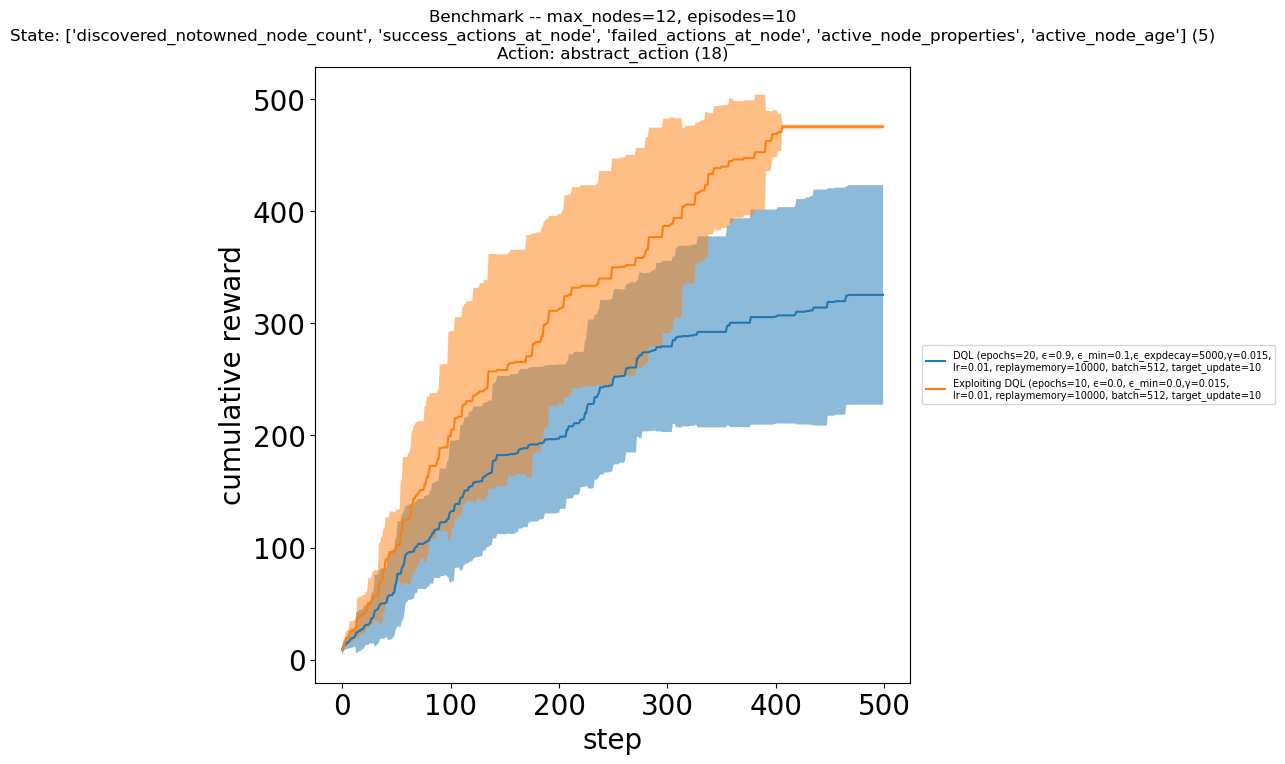

In [10]:
# Compare and plot results for all the agents
all_runs = [
    dql_run,
    dql_exploit_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

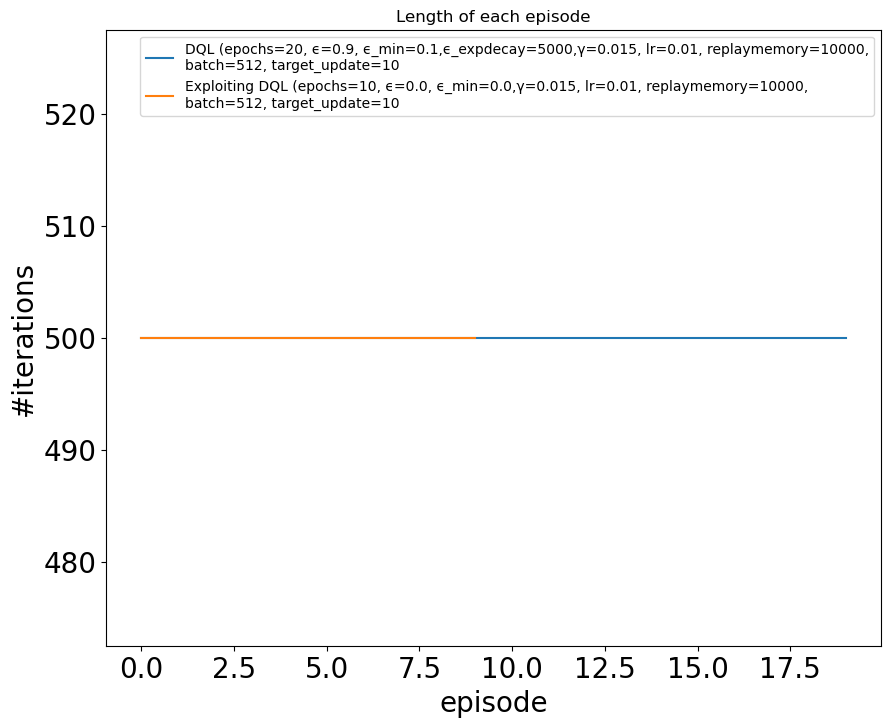

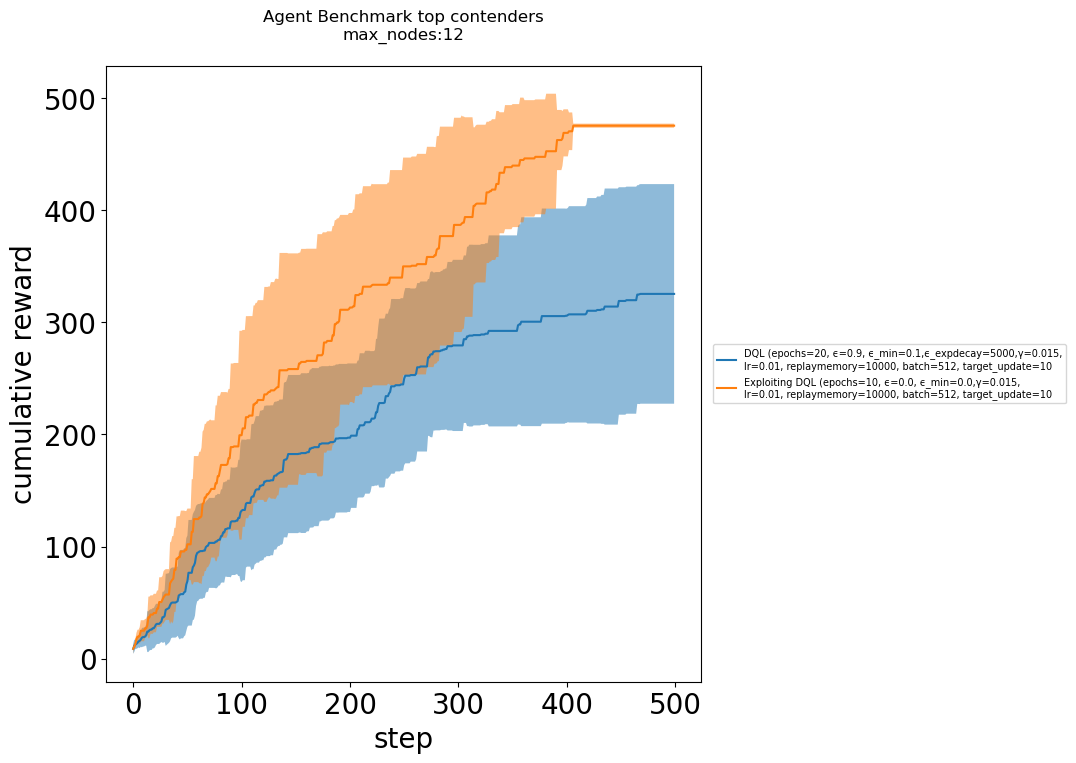

In [11]:
contenders = [dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

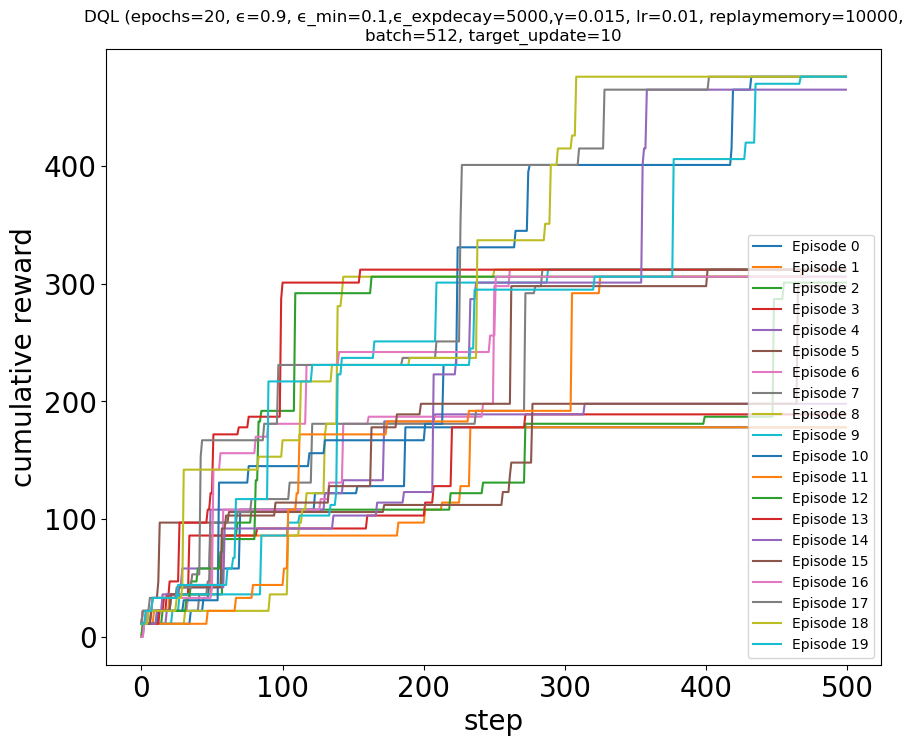

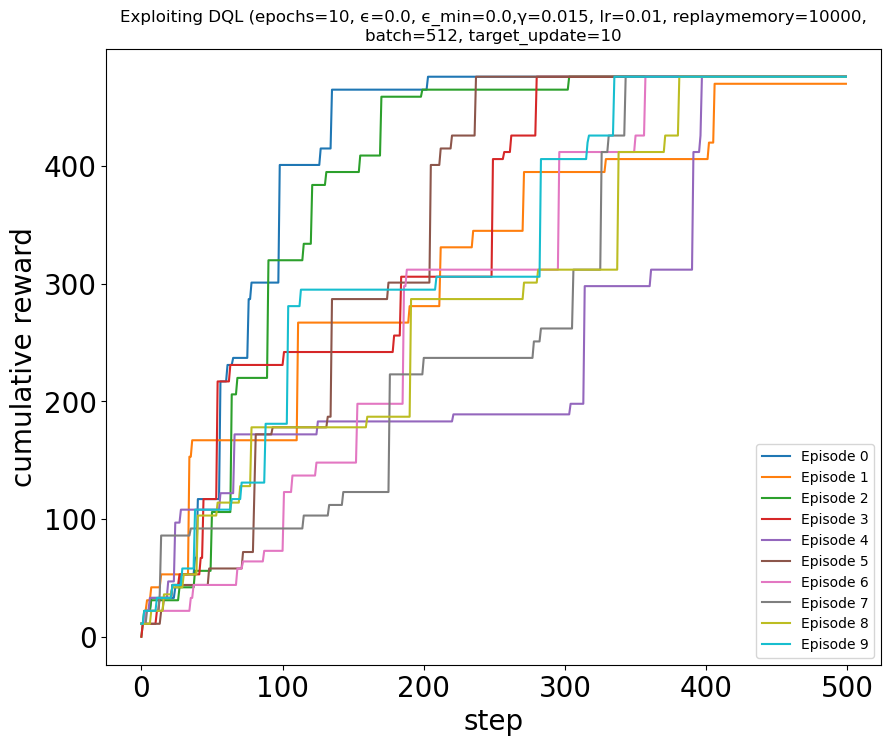

In [12]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)